In [1]:
import numpy as np
from matplotlib import pyplot as plt
import import_ipynb
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
%run KellyPopFuncs.ipynb

#Environment changes by only changing p and scrambling the x values 
#python code for the plot
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
import scipy as sp
from scipy.stats import multivariate_normal,percentileofscore
from scipy import stats
import math
import seaborn as sns
import pandas as pd
from IPython.display import clear_output
import sys
import matplotlib.colors as colors
from IPython.core.display import display, HTML
import random
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from labellines import labelLine, labelLines
mpl.style.use('fast')

Line2D=mpl.lines.Line2D

/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_76352/2415278089.py:24: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [8]:
x=(np.linspace(0,9,10))

In [9]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [10]:
def computeTrajectory(r0,x0,cmd,k0):
    B=(l-1)*(np.divide(x0,np.subtract(1,x0))+1)
    e=l*B
    n=np.subtract(p,x0)*e
    
    r=   [np.zeros(len(r0)) for t in time]
    r[0] = r0
    tau= [np.zeros(len(r0)) for t in time]
    fluc=np.random.normal(0,1.,(int(tf/dt),N))
    g=   [np.zeros(len(r0)) for t in time]
    sig= [np.zeros(len(r0)) for t in time]
    ks=  [np.zeros(len(r0)) for t in time]
    xt=  [np.zeros(len(r0)) for t in time]
    xt[0]=x0
    for t in range(len(time)):
        if cmd:
            #Mean fixed
#             k=k0*np.log(np.e/2*(np.mean(r[t])+r[t])/r[t])
            #Max fixed
            k=k0*np.log(np.e/2*(np.amax(r[t])+r[t])/r[t])
        else:
            k=k0
        tau[t]=np.divide(dt,(e*k))
        xt=(p*np.sum(tau,axis=0)+x0)/(np.sum(tau,axis=0)+1)
        gamma=p*np.log(xt)+(1-p)*np.log((1-xt)/(l-1))+logl
        sigma =np.sqrt(p*(1-p))*np.log((xt*(l-1)/(1-xt)))
        if t<len(time)-1:
            r[t+1]=r[t]*np.exp(gamma*dt)#+np.sqrt(dt)*sigma*fluc[t])
        g[t]=gamma
        ks[t]=k
    return r,g,ks

In [11]:
r0=1
r0bar=5

x0=.55
x0bar=.55

p=.7

l=2
B=(l-1)*(x0bar/(1-x0bar)+1)
logl=np.log(l)
e=l*B

dt=.5
tf=200
time=np.linspace(.1,tf,int(tf/dt))

k0=30

eta_bar=.03
r_bar=2
sigma_eta=.015
sigma_r=.341*r_bar
N=1000


htmapLen=50

def correlateResources(init,fin):

    return np.corrcoef(init,fin)[0][1],init,fin

def sim(cmd):
    resCorrs=[]
    gammas=[]
    
    x=np.linspace(1,100,htmapLen)
    y=np.linspace(-.8,.8,htmapLen)
    for corr,o in zip(y,range(htmapLen)):
        resCorrs.append([])
        gammas.append([])
        for k0,j in zip(x,range(htmapLen)):
            sys.stdout.write('\r')
            sys.stdout.write(str((o*htmapLen+j)/htmapLen**2))
            sys.stdout.flush()
            gams,r0s=genJointGrowthResourceDistrib(corr,eta_bar,r_bar,sigma_eta,sigma_r,N)
            r0s=np.array(r0s).flatten()
            x0s=genXs(gams,l,p)
            r,g,k=computeTrajectory(r0s,x0s,cmd,k0)
            pop_rbar=np.sum(r,axis=1)
            gamma_pop=1/tf*np.log(pop_rbar[-1]/pop_rbar[0])

            resCorr,init,fin=correlateResources(r[0],r[-1])
            resCorrs[-1].append(np.subtract(1,resCorr))
            gammas[-1].append(gamma_pop)
    
    plotHeatMap(x,y,gammas,r"$K_0$",r"$\rho$",r"$\gamma$","AvgGammasFlucConstant.pdf")
    plotHeatMap(x,y,resCorrs,r"$K_0$",r"$\rho$",r"$I_m$","AvgMobilityIndexFlucConstant.pdf")
    return gammas,resCorrs

In [59]:
r0=[5,10,15]
x0=[.5341,.55,.5672]
#G=.025,.035,.045
cmd=True
k0=25
l=2

In [174]:
def meanBehav(cmd):
    fig, ax1 = plt.subplots(figsize=(3.5,4))
    rr,gr,kr=computeTrajectory(r0,x0,cmd,k0)
    rp,gp,kp=computeTrajectory(r0,np.flip(x0),cmd,k0)
    rclr=['maroon','maroon','maroon']
    bclr=['#004D80','#004D80','#004D80']
    ls = ['dashed','solid','solid']
    a=1
    
    
    plt.plot(time,np.transpose(gr)[2],color='maroon',linestyle='solid',linewidth=2)
    plt.plot(time,np.transpose(gp)[2],color='#004D80',linestyle='solid',linewidth=2)
    plt.plot(time,np.transpose(gp)[0],color='#004D80',linestyle='dashed',linewidth=2)
    plt.plot(time,np.transpose(gr)[0],color='maroon',linestyle='dashed',linewidth=2)
    
#     for gg,c,i,l in zip(np.transpose(gr),rclr,range(len(rclr)),ls):
#         if i==1:
#             continue
#         print(i,c)
#         plt.plot(time,gg,color=c,linestyle=l)
#     for gg,c,i,l in zip(np.transpose(gp),bclr,range(len(rclr)),ls):
#         if i==1:
#             continue
#         print(i,c)
#         plt.plot(time,gg,color=c,linestyle=l)
    rpa=np.sum(rp,axis=1)
    rra=np.sum(rr,axis=1)
    gpa=[np.log(rpa[i]/rpa[0])/time[i] for i in range(3,len(time))]
    gra=[np.log(rra[i]/rra[0])/time[i] for i in range(3,len(time))]
    plt.plot(time[3:],gpa,linestyle='dotted', color='#004D80',label="",linewidth=3)
    plt.plot(time[3:],gra,linestyle='dotted', color='maroon',linewidth=3)
    plt.tick_params(labelsize=14)
    l=2
    print(p,l)
    plt.plot(time,[p*np.log(p)+(1-p)*np.log((1-p)/(l-1))+np.log(l) for i in time], color='k',linestyle='solid')

    custom_lines = [Line2D([0], [0], color="maroon", lw=2),
                    Line2D([0], [0], color="#004D80", lw=2),
                    Line2D([0], [0], color="black",linestyle='solid', lw=2),
                    Line2D([0], [0], color="black",linestyle='dashed', lw=2),
                    Line2D([0], [0],linestyle='dotted', color="black", lw=2),
                    ]
    
    plt.xlabel(r"$t$",fontsize=16)
    if not cmd:
        plt.ylabel(r"$\gamma(t)$",fontsize=16)
        ax1.legend(custom_lines, ['Regressive', 'Progressive','Wealthy','Poor','Population Mean'],fontsize=11)
    else:
        ax1.get_yaxis().set_visible(False)

    plt.ylim(top=.09)
#     plt.text(125,.085, r'$\gamma=\gamma_{max}$',fontsize=16,color='black')
    plt.savefig("AvgTrajec.pdf",bbox_inches='tight')
    plt.show()
    
def plotHeatMap(x,y,data,xlabel,ylabel,legendlabel,title,zmin=None,zmax=None,inset=None):
    fig, ax1 = plt.subplots(figsize=(6,5))
#     plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) # labels along the bottom edge are off
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.tick_params(labelsize=14)
    x,y=np.meshgrid(cols,rows)
    cp=plt.contourf(x,y,data,9,cmap="viridis")
    cmap=plt.get_cmap("viridis")
    scalmap = plt.cm.ScalarMappable(cmap=cmap)
    plt.vlines(x=20,ymin=-1,ymax=1,color="white",linewidth=2)
    if zmax:
        plt.clim(zmin,zmax) 
        scalmap.set_array([zmin,zmax])
    else:
        scalmap.set_array([np.amin(data),np.amax(data)])
    cb=fig.colorbar(cp) # Add a colorbar to a plot
    cb.ax.set_title(legendlabel,fontsize=14)
    plt.text(25,.75, r'$k=k^\star$',fontsize=18,color='w')
    plt.text(60,-.85, r'Constant $\tau$',fontsize=18,color='w')

    fig.savefig(title,bbox_inches='tight')
    plt.show()
    



0.7 2


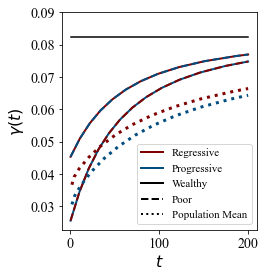

In [175]:
meanBehav(False)

0 maroon
2 maroon
0 #004D80
2 #004D80
0.7 2


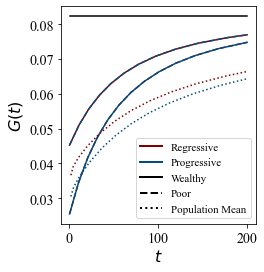

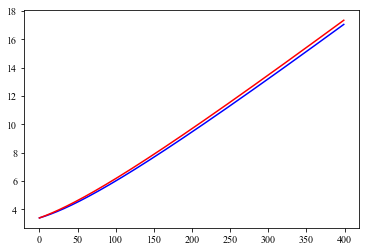

In [117]:
np.sum(rp,axis=1)

plt.plot(np.log(np.sum(rp,axis=1)),color="blue")
plt.plot(np.log(np.sum(rr,axis=1)),color="red")

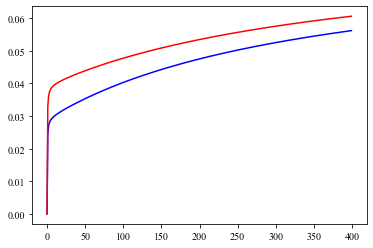

In [100]:


plt.plot(gpa,color="blue")
plt.plot(gra,color="red")

With Variable Learning Rates (Mean fixed)

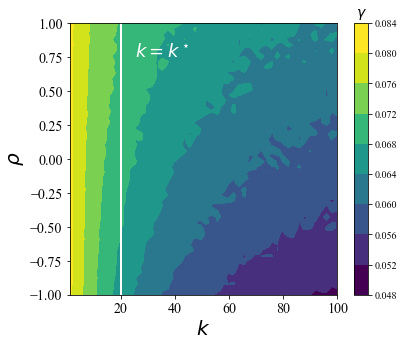

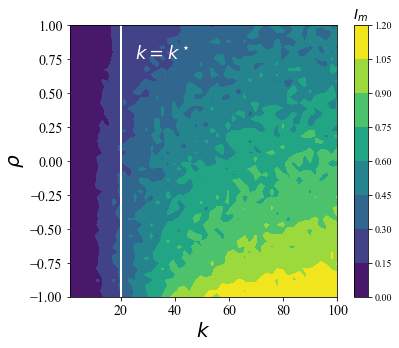

In [107]:
gamma=[[0.0809586881975961, 0.07875052649518029, 0.0767378854047127, 0.07497031760973825, 0.07325625454236297, 0.07180555978222923, 0.07041767383415323, 0.06919487150248836, 0.06781827094439145, 0.06688714345689407, 0.06576139166832905, 0.06463544676778347, 0.0637303866910361, 0.06308394978702547, 0.06192439980076511, 0.06145898551294271, 0.06062883686050418, 0.059744580909139484, 0.059215301513877265, 0.05914059584120829, 0.05868550858046569, 0.05787845977909229, 0.05776167390859202, 0.057324737167296726, 0.0568035706492704, 0.05699020589984529, 0.05625470058143859, 0.05560784327230105, 0.05543718193734877, 0.05503008218545943, 0.055324513028145866, 0.05441401552887613, 0.053756793669078526, 0.05366751879963517, 0.05427200463194342, 0.0542877316191247, 0.05339629246120094, 0.053223961189627654, 0.05247115680833383, 0.053567381383673604, 0.0520071374118111, 0.05243369293867495, 0.05190918957616845, 0.0526278489986945, 0.05226305560467519, 0.05112922587810769, 0.0513629808606135, 0.051577245144541886, 0.05109759561205651, 0.05084447480375881], [0.0809764774519433, 0.07876678817918283, 0.07679580943274028, 0.07500111708767604, 0.07329610068193212, 0.07186594778437731, 0.07048415000431811, 0.06926529991556762, 0.06793148590493948, 0.06682202619482626, 0.06591839721613844, 0.064753954129327, 0.0638698929582509, 0.06326852577431694, 0.062200579973463864, 0.06173676073478737, 0.06119574804586193, 0.06012410792225459, 0.06002414920401607, 0.05915000411442384, 0.058917069272255936, 0.05820813986407444, 0.057651472569981384, 0.057452673434362445, 0.057239075359774925, 0.05680683632049067, 0.05669757428097127, 0.05661250714236201, 0.055873125852744975, 0.055582315144586156, 0.055590364093219206, 0.05463350577406569, 0.05477500691713267, 0.054313333450921215, 0.054193022073514625, 0.05410627128595413, 0.0533450709924741, 0.05388984347556858, 0.053375419684218536, 0.0536569531894939, 0.052358489373926655, 0.0525486385247903, 0.05272921082353069, 0.052232435567285775, 0.05225346317581537, 0.05203222111057885, 0.05262876029011973, 0.0524797755402675, 0.05164720744031218, 0.05198051987115169], [0.08098056831016898, 0.0787758203413293, 0.07679861355916183, 0.0750920070405917, 0.07342018082651047, 0.07179768572194697, 0.0704140918335322, 0.06923074372508711, 0.06805420413723234, 0.06673161601987858, 0.06564385647654655, 0.06509328951189422, 0.06423620736387509, 0.0636985700551713, 0.062472802493630616, 0.0620586300138098, 0.06126845858331855, 0.06126144833903057, 0.06029731778699092, 0.059439877908303664, 0.058848365921140955, 0.05801886223419223, 0.05812816648019453, 0.057943547743173805, 0.057323495480774894, 0.05739889109675686, 0.0568429685910058, 0.05632883706570421, 0.05604969633809434, 0.05604513835216279, 0.05606659311078458, 0.055824938643089544, 0.055024886643178714, 0.05495209970656034, 0.05425988634226417, 0.054246311945972375, 0.053778069670244566, 0.05459398452043383, 0.05351181157133415, 0.05292745077842137, 0.05250160908940478, 0.05369451875673699, 0.05312000724200777, 0.05279572333131024, 0.052249245936055004, 0.05230438026751119, 0.05207217837757783, 0.05282290830590045, 0.05233675869510294, 0.052248448775291355], [0.08099020112489731, 0.07879762311171824, 0.07674082282130967, 0.07515486897320682, 0.07340270670378743, 0.07203910109346655, 0.07053398663562951, 0.06927895281675014, 0.06828413543204023, 0.06697123078719805, 0.06628060778760932, 0.06519240273701728, 0.06403340855816311, 0.06339721301997367, 0.06275535615592841, 0.06231597749909857, 0.06147238133297932, 0.060852483908482434, 0.06063622969017833, 0.05995057146794874, 0.059235968263407004, 0.059005205689387705, 0.058333117841210126, 0.058142480486337994, 0.05770503951187518, 0.05768578090760352, 0.056484000150161535, 0.05625516502173478, 0.056767871345319625, 0.05544166084283323, 0.05576553431402766, 0.055601154331120686, 0.05554631500046212, 0.0551064193361734, 0.0553252986550372, 0.05466407862042789, 0.05447460897268371, 0.05402847549293629, 0.054776062555127805, 0.05349003466734746, 0.05424108347092475, 0.05350230880973154, 0.05282971897346922, 0.05281467519162157, 0.05279903720502311, 0.05331922333143733, 0.052543941568425505, 0.05258748077663631, 0.05294336158745531, 0.05207221923067586], [0.08098569931877814, 0.07876924262293325, 0.07688232072167853, 0.0752134606112593, 0.07345245241110943, 0.07196810300359595, 0.07075851934025301, 0.06947118723827055, 0.0685437117391613, 0.06721026675444727, 0.0661465544513472, 0.06546826452668662, 0.06419281225886628, 0.06409061165405484, 0.06308125058523666, 0.06244605977012236, 0.06189532312180617, 0.06126046203584808, 0.06082223750728585, 0.05971456633661799, 0.05972215759419311, 0.05971379820011769, 0.058095456443030824, 0.058075616233863175, 0.0577426098952953, 0.057812040013957844, 0.05772170334390949, 0.057294623416388975, 0.05702250634616134, 0.0561576558204228, 0.056108931795378236, 0.05572064180341127, 0.05523996914653677, 0.05506106298780365, 0.05532195995787587, 0.05493832228085669, 0.05532891967229575, 0.055261717902939676, 0.054948082230724726, 0.05389664937783632, 0.05355236142942652, 0.0540360769886166, 0.05368341920866612, 0.05311072988299901, 0.053352976015680065, 0.05254528299539525, 0.053057361962537464, 0.0527085188788162, 0.05318929753285638, 0.05279161217223439], [0.0809884012954663, 0.07884167335197559, 0.07683641220070371, 0.07518563489304858, 0.07356734399576875, 0.07206254877471417, 0.07070158589489511, 0.06980277136865425, 0.06832579562564321, 0.06754315082543229, 0.06643847610758041, 0.06553234573391718, 0.06489912472252445, 0.06403192029145316, 0.06303947716559255, 0.0627674970830167, 0.061859478692554946, 0.0614036046864768, 0.06101914216360765, 0.060530068855218694, 0.05959379336982897, 0.0596695954306683, 0.05874866272505086, 0.058499054612853714, 0.05794944069475228, 0.05770370045123146, 0.05743513927331754, 0.057240887035095334, 0.05742930262167961, 0.05721086178457862, 0.056247784678391644, 0.05591212940402064, 0.05585192148486554, 0.0559020460347252, 0.055726212786387654, 0.05475642718875572, 0.05505782737774365, 0.05482101363617127, 0.05399075925563716, 0.05537802630525802, 0.05447695082189056, 0.05320113562579854, 0.05373044287298529, 0.0532857339294711, 0.05351746806971962, 0.05333363170626181, 0.05393286226652021, 0.05385020149259935, 0.05212135868850987, 0.05265769889271347], [0.08100045153990308, 0.07883467966685263, 0.07691943675021876, 0.07520174149926116, 0.0735363684621942, 0.07217841509085665, 0.07100582309738047, 0.06959332053321311, 0.06863328943196893, 0.06764736636298845, 0.06675151655210267, 0.06550798161443999, 0.0647667396777224, 0.06422570010011588, 0.06371258103750387, 0.06293014258863246, 0.06224156576932233, 0.06172106077773034, 0.060576793244004126, 0.06068405234856348, 0.06037602346205689, 0.05976240314757745, 0.05907415071754353, 0.05901398459122599, 0.05834391832885614, 0.058108325126127895, 0.058098186128749285, 0.057050447621811634, 0.05752573750261245, 0.057013177971851986, 0.05635670342760218, 0.05602791236420556, 0.056257530903605864, 0.05541967360973734, 0.055988387521047234, 0.0556774901903132, 0.0550177576320606, 0.05469315419913614, 0.05464527555120537, 0.054576908150922324, 0.05416024382072964, 0.05354275107292135, 0.054668317529528235, 0.054121327055239386, 0.05417489924228306, 0.053932502543398146, 0.05383482539684912, 0.05234099560148168, 0.05253538935062631, 0.05361657562387996], [0.08098360827754734, 0.07888547013273903, 0.0769707836260133, 0.07523825806911631, 0.0737676125509142, 0.07220674083607004, 0.07092133712113205, 0.06962738475284225, 0.06857201093071413, 0.06765417681211452, 0.06693116403488054, 0.06603907837550002, 0.06505684479001564, 0.06441287088768478, 0.06365003105028408, 0.06291877846676026, 0.06234339947882989, 0.061755538315790934, 0.061448437102554196, 0.061071788237777994, 0.06036100391236967, 0.06004423612127423, 0.05951024665149212, 0.059511273433364334, 0.05891878292083061, 0.05857937379525902, 0.058029903795078726, 0.05763140195676538, 0.057941269085648804, 0.05727507078443606, 0.05743298731969792, 0.05646542591027992, 0.05557469323677904, 0.056855193485124966, 0.05573203350825722, 0.05598168701158656, 0.05616554808650883, 0.05616174228406646, 0.05527038040245343, 0.05518501946307076, 0.054735465763724296, 0.0552410508162934, 0.054855449486843774, 0.054093971558061615, 0.05470635422150594, 0.05387189963624829, 0.05363927497995312, 0.053177220273743116, 0.054034737647854075, 0.05377547323956251], [0.08099393566696014, 0.07888295516884748, 0.07699533284964961, 0.07523757151603934, 0.07385632873418449, 0.07238675089928279, 0.07094001159166331, 0.07003849071750737, 0.06849186015277431, 0.0677109138911801, 0.06682238089523984, 0.06581798630583434, 0.06496890803532805, 0.06445129651945715, 0.06376451151085331, 0.06310292860187601, 0.06251871274289529, 0.06200227208574539, 0.06151885104740348, 0.061300784144767986, 0.06023060881132638, 0.06019327643218571, 0.060226049738540684, 0.05991498529619925, 0.05916411329152091, 0.05910472374381552, 0.05827579079661012, 0.05830174053511205, 0.05773842138055752, 0.057253082170278934, 0.05721958468065572, 0.05684944257198984, 0.05672625018089704, 0.05689652630778019, 0.05665525341947419, 0.05603011104339129, 0.05549317358725562, 0.055237801613093156, 0.05603963472771475, 0.05489933588133878, 0.05557329127671388, 0.054830648750840226, 0.055505222743979024, 0.05502987729237714, 0.05343958029353907, 0.05479110107410933, 0.0545105329452427, 0.05455169264465428, 0.055134204404765276, 0.0530917752093612], [0.08100280949162875, 0.07887860085022476, 0.0769156932903071, 0.07531557713897608, 0.07373850169942538, 0.07234405084895197, 0.07119441771080554, 0.06988121690152871, 0.0689499359886237, 0.06794218291478965, 0.06691607726550361, 0.06652236171372132, 0.06517691848775471, 0.0648755325701155, 0.06385267606408453, 0.063376492815307, 0.06295330945764918, 0.062092550007229914, 0.061425850190900015, 0.061344121484416134, 0.06087718481761083, 0.060789202083469926, 0.06004788332322304, 0.05953456910140045, 0.0592625585104512, 0.059223584522753704, 0.05824520513755441, 0.05896834554536652, 0.057933396486386124, 0.05829796155439253, 0.05800578245828004, 0.05679220824505585, 0.0577794590088309, 0.05683056764710762, 0.056903849593828514, 0.05645117841058212, 0.056992267888110154, 0.055711269209319556, 0.055966967727288666, 0.05515834181681279, 0.055962271291822345, 0.05531316793508303, 0.05478783653557129, 0.055024434471680435, 0.05493665724501131, 0.0546512548566897, 0.054400435792286574, 0.053641719859489206, 0.053962971939442106, 0.054372156584339644], [0.08100878811943454, 0.07890255097483918, 0.07706618253432214, 0.07542961027492487, 0.07371509986987718, 0.07250108183095792, 0.0713073708892725, 0.06998880848188971, 0.06921456852927425, 0.06824199836534789, 0.06733600478357737, 0.06626040302467845, 0.06590050792257153, 0.065020855433028, 0.06417165207929802, 0.06371112863666244, 0.06371863718896373, 0.06231710172357836, 0.062286064998526576, 0.06117596434984655, 0.061017051270237335, 0.06070656290055978, 0.06037543027928724, 0.05973786152772725, 0.0600533492995733, 0.059763331934146374, 0.05932005851438544, 0.05849812815169514, 0.05783916897322379, 0.05806395104739986, 0.05748933760676559, 0.05769630461583142, 0.05782991143129111, 0.05743319571563221, 0.05656671601897453, 0.05670203304988933, 0.05645717501586808, 0.056276472144733074, 0.05623660938208982, 0.05475584146714752, 0.05532040380546014, 0.055808330873742915, 0.05587563468614199, 0.05482916547894825, 0.05483807757746887, 0.0552332969577578, 0.054227254023541005, 0.0544391288680585, 0.054706286783002406, 0.054034146697900035], [0.08100823600907957, 0.07895607724283236, 0.077086055835462, 0.07531928999244915, 0.07376947598576312, 0.07236759907291108, 0.0710760036577861, 0.07022234164332482, 0.06916190772686584, 0.06839279133385, 0.06753354015289353, 0.0665431713908428, 0.06581219045292536, 0.0650037022950139, 0.06462152232926091, 0.06426864903997834, 0.0634370553795541, 0.06276544013890231, 0.06186012454226725, 0.061893337507598345, 0.06150126605090383, 0.061023265730731246, 0.06055220245465288, 0.06047521873011422, 0.06101061139085849, 0.05966288343330404, 0.05981896398060077, 0.058291313519760135, 0.059004139675522066, 0.05835175911359311, 0.05772104603104254, 0.05745583280963187, 0.05825505949321922, 0.05675370413827308, 0.057360508873386194, 0.05649865963116297, 0.05654835881757435, 0.05656829819299928, 0.056602431407517674, 0.05559462586219184, 0.056793078203054514, 0.056511159398314414, 0.05423136557672985, 0.05534378311761704, 0.05405901816764493, 0.05533665340695317, 0.05538207177392621, 0.055464214408300364, 0.05408340465374865, 0.05544004220438459], [0.08102053986017534, 0.07888945437262929, 0.07702530251493339, 0.07542766211649006, 0.07395905340451737, 0.07255931584258692, 0.07113664041942723, 0.0701891264204874, 0.06893250402711991, 0.06846954237178733, 0.06746010307324612, 0.06697402810120553, 0.06592138190271543, 0.06510321937598969, 0.06493416279721667, 0.06413623661399556, 0.06352644943890949, 0.0629795353550919, 0.06263086269383135, 0.062176511848329556, 0.06116809204230253, 0.061288426525228916, 0.061040299219133995, 0.06037633327239005, 0.06046252486108542, 0.059220445771125195, 0.059489909797217806, 0.05952642375510937, 0.05933931845121409, 0.05904068406936801, 0.05858598983427332, 0.05774265142545401, 0.057945705760532186, 0.05737403649897972, 0.05751980413730581, 0.056625036255459296, 0.05676094661297654, 0.05792772998717696, 0.05735843526780026, 0.056152019451338006, 0.05653708398867774, 0.057764054881393266, 0.055373977074524953, 0.05628731634950955, 0.05630430627952913, 0.05523729649773514, 0.05477320325216921, 0.056301555818023326, 0.057005351972373185, 0.05525593516859205], [0.08101010851402128, 0.07892420471214208, 0.07709132382604142, 0.07547666683661595, 0.07396170739844184, 0.07272205604410584, 0.07137256419019719, 0.07046424610198382, 0.06953833774339617, 0.06858153434529778, 0.06796045590128473, 0.06680805287752989, 0.06594918512487842, 0.06545460195301987, 0.06472945352141321, 0.06432249206254495, 0.06341081145273225, 0.0629340472129384, 0.0620599287800062, 0.062000330030145635, 0.06170200142774942, 0.06140580485398582, 0.06051808993237448, 0.05995402156286215, 0.0596966820939161, 0.06031710210491148, 0.05961438302068628, 0.05992950520457572, 0.059119059723937294, 0.05867531581499242, 0.05921254443813253, 0.058406044806289616, 0.058326265490684655, 0.05823784220238945, 0.057945994667536346, 0.05796114060748686, 0.057857902902536305, 0.05713737904661194, 0.056621848628108415, 0.05754981476076686, 0.05718181715009807, 0.05677426195316949, 0.05597634999345214, 0.05614357547252198, 0.05677113040967886, 0.055716312376925654, 0.054680085705831674, 0.055164678982346525, 0.05604988002445542, 0.055964819713024], [0.08100322116593456, 0.07896682007712391, 0.0770926471004775, 0.07539397415699996, 0.0740629346207007, 0.07277364674288182, 0.0715458899417733, 0.07065357504489402, 0.06944692592887566, 0.06849263782626831, 0.06786609115924834, 0.06683155880755987, 0.06610289424153516, 0.0656898466239874, 0.06496368639763456, 0.0651359099983996, 0.06410702449741995, 0.06299689026753778, 0.06283967136391809, 0.06251529840782154, 0.06189600584602697, 0.061547052886886035, 0.06136585806806313, 0.06091052956162894, 0.060366717116730695, 0.06021661665125271, 0.059397689896756804, 0.06017988138834705, 0.059895495803990596, 0.0590969878151557, 0.05882896902722319, 0.05823926613922588, 0.05888106412861424, 0.05841440245036256, 0.05800793137617815, 0.05840340361584787, 0.056781080074499675, 0.058012657521277156, 0.05733388535470124, 0.056765285151882526, 0.056504112892664916, 0.0570276863071242, 0.0570115156967654, 0.055640852703876684, 0.05662188149941885, 0.05667907971956898, 0.05502441682963194, 0.05737134334073456, 0.05489238211035088, 0.05584090282377232], [0.08101212658847005, 0.07897184891395002, 0.07711919318718027, 0.07545830757838486, 0.07411827450762379, 0.07268577105044285, 0.07174278895900334, 0.07083431784644616, 0.06976819493233276, 0.06885184823877355, 0.06794614009700499, 0.06683686402392729, 0.06594922418252, 0.06556881416777385, 0.06523815730026267, 0.06448747571950848, 0.06440440581276456, 0.06363194775392243, 0.0630724553963414, 0.06249418327900941, 0.062034790437998824, 0.0618244031679331, 0.06162281757994629, 0.06123968725516111, 0.06155510008429633, 0.06000507340577488, 0.061115722154374746, 0.060203543914173444, 0.058952704844936615, 0.05925032095365805, 0.058477362689096174, 0.0586492472454012, 0.05930233864838835, 0.05807252577930583, 0.05938400127260831, 0.05789376416864358, 0.057953421124760304, 0.05712622593429981, 0.05684132780830142, 0.0584719210881044, 0.05726373951472383, 0.05655321235184517, 0.05846877934675962, 0.056847345254304786, 0.05628911686254977, 0.05600068583566386, 0.05606419661744866, 0.055136605155879204, 0.05620445278067229, 0.05583026377018137], [0.08102991386145185, 0.07896375748814687, 0.07717854200663503, 0.07549048115095182, 0.07410830791722905, 0.07275706805682819, 0.07159224232772857, 0.07063929534178633, 0.06985798111272179, 0.06863118850416133, 0.06793808676936496, 0.06739433111493094, 0.06620658784705688, 0.06565683793653852, 0.06559659431852005, 0.0648823414085814, 0.06422552817704187, 0.06399177486740243, 0.06314847387632296, 0.06303206063472871, 0.062302808957010236, 0.06279484889072975, 0.0615965126969138, 0.06124666941748114, 0.060850439406596346, 0.06106055476632917, 0.05982389792540495, 0.059318118842179336, 0.05906420832925124, 0.05964856456328306, 0.05969504339940803, 0.0590641316442888, 0.05884471927905612, 0.05898818743602411, 0.05753441692032528, 0.057726853963285675, 0.057879522062601024, 0.058079799994861424, 0.0576328116444086, 0.056861764509748725, 0.05699903745216988, 0.05584206845761269, 0.056649877064648024, 0.056547420301651066, 0.0564396455345322, 0.05699931631069633, 0.05649852971492897, 0.055871547190698756, 0.05659161862675679, 0.056740530516402155], [0.08102802184055596, 0.07902390746868587, 0.0771664285369608, 0.07558607069924636, 0.0741641883840987, 0.07304168172375777, 0.0717254368207714, 0.07087698596667258, 0.06978632789887336, 0.06885612920632536, 0.06811523775040997, 0.06751569338255323, 0.06678475955048367, 0.06582363537320901, 0.06528375960168521, 0.06515107919062868, 0.06441286939812557, 0.06391143602086817, 0.0629128579584633, 0.06338530209169281, 0.06210229891128213, 0.06278939456373685, 0.06195338758487474, 0.06164958415844238, 0.06101538306808607, 0.06131166561065826, 0.06035712523785124, 0.060618351564817874, 0.06121140589161907, 0.06015725961990339, 0.06010053788434863, 0.05910104395881925, 0.05959103773278526, 0.05891892411280731, 0.05849148198107002, 0.05798370323838993, 0.058680637884107156, 0.05879149152589328, 0.058150350718144596, 0.05763543904879614, 0.05862391449202243, 0.057873079076279636, 0.05733899232610213, 0.05740299169951963, 0.05663107382747293, 0.057091422096627244, 0.0568930080478831, 0.056429357605989744, 0.05543313351611521, 0.056253716129311994], [0.08103886483782281, 0.0790375120931108, 0.07721917173641579, 0.07570980748818207, 0.07429437502988365, 0.07319445712040881, 0.07172908717995143, 0.07058918557727074, 0.06964077092292022, 0.06880797386308175, 0.06823162100642857, 0.06744204145025509, 0.06650730005822603, 0.0663232588914223, 0.06557308529461724, 0.06477510032656139, 0.065023878032321, 0.0644961485376372, 0.06394831262924786, 0.06362756105184723, 0.06331068006496689, 0.061951915530845246, 0.06242880469092436, 0.06121721082048338, 0.06191201426956701, 0.06146289046833082, 0.06083880600813719, 0.06062795508375241, 0.059682704560727745, 0.0596125773941684, 0.06029685647658229, 0.059563041759887934, 0.060291374217290354, 0.05880359886141121, 0.058807958002774906, 0.05911320973396245, 0.059487156366404684, 0.058431152151075895, 0.0573444782820105, 0.056966744003409626, 0.057217382579798665, 0.05748542754153181, 0.057507173979337745, 0.056843167380693053, 0.05652534386575073, 0.05766160183380068, 0.05633954202226125, 0.05641607561216769, 0.057660699986040544, 0.0576621454931804], [0.08103296659759474, 0.07902023317253776, 0.07725672836397532, 0.07574509091756504, 0.07433936856918406, 0.07316921431490474, 0.07168641958082958, 0.07091554357904115, 0.06989976781143738, 0.0692091644105282, 0.06826410559323512, 0.06750419023970135, 0.0669412187608834, 0.06667061525973816, 0.06605626869407775, 0.06569372086948172, 0.06453448581812551, 0.064071039077683, 0.06389974256036403, 0.0634944577957283, 0.063062727083543, 0.06281026523582912, 0.06230661273303437, 0.0625662741016706, 0.06121681383635833, 0.06151308523811605, 0.061175860110959226, 0.06193450854075985, 0.060948186165778545, 0.059279954974267045, 0.05955014180533893, 0.059393842537578644, 0.060586064509411626, 0.05869940088427794, 0.05964792159474383, 0.059374519066456015, 0.05774063526735737, 0.059240882979090755, 0.057897350823831795, 0.05850348524988586, 0.05761751431698262, 0.05784888111964136, 0.057729039566583505, 0.057218422475776784, 0.056475338586847466, 0.05725043550008357, 0.057142146893393794, 0.05804536129926634, 0.05653227930930428, 0.057127045090581564], [0.0810327395091378, 0.07901468151631436, 0.07723585635708291, 0.0756586338282252, 0.07439876324418193, 0.07292974127175372, 0.07198767314882766, 0.07103253208099236, 0.07012052973893991, 0.06919688173928507, 0.06839573787403967, 0.06787488331154864, 0.06727421098842061, 0.06650679378494515, 0.06600145198991125, 0.06539919526455658, 0.06528974314589121, 0.06466409769555509, 0.06387900398927449, 0.06327813771236562, 0.06256607036008631, 0.06345360518137383, 0.062226776691688405, 0.06164825788026103, 0.061964301746887544, 0.06118379718488065, 0.06180241051895685, 0.06065072887226473, 0.06083018707313669, 0.06010960965099232, 0.05951159865942775, 0.06061625008693718, 0.05915777574099947, 0.05974797745140191, 0.059081911684998954, 0.05941290976689312, 0.05911090180059475, 0.05962906996153442, 0.05973728580680776, 0.058801478980171455, 0.059124286487881914, 0.05807531222173116, 0.05793587174485901, 0.05767634156872444, 0.05815828409756741, 0.057335383575821144, 0.05843502190951079, 0.05735437679892162, 0.057947033285510346, 0.056682667048391595], [0.0810419760869817, 0.07905407444556048, 0.0773081766083831, 0.0756917538253427, 0.07443763583162535, 0.07318798143626258, 0.07192365433021676, 0.07124010047128022, 0.07013867770552891, 0.0694405791692677, 0.06852176329740202, 0.06797627974979031, 0.06766056572457345, 0.06680469194484681, 0.06606544680340398, 0.0655154106399855, 0.06481238597621163, 0.064634400482702, 0.06442698233474589, 0.06344275853693344, 0.06340794054316193, 0.06334618918414915, 0.06274069214996489, 0.062307062367401474, 0.06247308329121368, 0.06172707846925292, 0.06085665956190269, 0.06091149769055136, 0.06041325773456241, 0.060275125370672686, 0.06001218300616085, 0.0604001189348685, 0.06073220403655962, 0.059636658442823266, 0.0593515353722523, 0.05950229358825685, 0.05970576972795556, 0.059470691720131134, 0.05814985226800573, 0.05779974937017442, 0.0596373273838417, 0.05938571305402123, 0.05780373897011136, 0.0586730450014125, 0.05757154987447465, 0.05884488937773809, 0.05617168147002178, 0.057433822661896027, 0.05699793106424601, 0.058060884690398294], [0.0810240622820707, 0.07909122043758618, 0.07728841614808439, 0.07568552017708, 0.07446527471226908, 0.07323937639421019, 0.07237043936255438, 0.07118199614032414, 0.07010483704310352, 0.06963051283938311, 0.06880792657203678, 0.0678696681305687, 0.06715235446627689, 0.06674081934138346, 0.06652967884446426, 0.06521643689123519, 0.0653070451997364, 0.06511090793053216, 0.06462866126168255, 0.0640497465207914, 0.06331883705625488, 0.06364560775867001, 0.06332910468053081, 0.062072592080532236, 0.061364813860386364, 0.06193369051203037, 0.06160438656925183, 0.06123361720371381, 0.06162901464694226, 0.060008787305247405, 0.060724525610724306, 0.059982837956190735, 0.06017064007752352, 0.059634576785589734, 0.05964183929974994, 0.059569190833581545, 0.06000970795376812, 0.05936265358842274, 0.05962632444872482, 0.05912569609416312, 0.05851628074945449, 0.058043768486550004, 0.05745392538336099, 0.05845139340967747, 0.058085920332890124, 0.05742051627053746, 0.0578799806442564, 0.058576769801639825, 0.05625848060368222, 0.05732586452744439], [0.08104043460200865, 0.07908085819102002, 0.07729861817029862, 0.07578807930962404, 0.07453466803055489, 0.07337422110391019, 0.07235529800180336, 0.0709834773029598, 0.07030816573169028, 0.06970666257416434, 0.06886042997532961, 0.06811008863119386, 0.0676715480269597, 0.06671074014996248, 0.06739607520812167, 0.06590216641393944, 0.06532477084776618, 0.06495000179855151, 0.06424914238554597, 0.06382702375857804, 0.06396832780767923, 0.06343436307404159, 0.06334361471990844, 0.06295307991408268, 0.06339635635283208, 0.06263904245657585, 0.06150261448086737, 0.061833610682820894, 0.06116242579463176, 0.0615584700414856, 0.06207799947600809, 0.06114665126570409, 0.06071261083169973, 0.06050809654879811, 0.060171029318826605, 0.059470257630755814, 0.059482840838488614, 0.05949970190989055, 0.06021663310053197, 0.05944832709320885, 0.05993172317915119, 0.05927702356291019, 0.06044379719271343, 0.0591371508725815, 0.0591724552021387, 0.059135866364856626, 0.05880527731462018, 0.058956006616332754, 0.05834870782688702, 0.057904433749588397], [0.0810296501353823, 0.07906675687149252, 0.07734163998246944, 0.07578366052969153, 0.07454250425380245, 0.07329454277474037, 0.07213057176623025, 0.07133764197187563, 0.07058469108784504, 0.06982982775867314, 0.06870177889571726, 0.06848888585800887, 0.06826874089948398, 0.06690398748534185, 0.06700044507846772, 0.06613242151733278, 0.06513100560826655, 0.06518562359753519, 0.06497719691737658, 0.0640251373957764, 0.06384233928770103, 0.0636795582682427, 0.06273334250731473, 0.06345067074858222, 0.061958281873875316, 0.06325880122041933, 0.06202022841450468, 0.062036554578643203, 0.06076787576680976, 0.0610294935808718, 0.06032280015857134, 0.062019534201290034, 0.06021537248960827, 0.059842100521798225, 0.06142603634422294, 0.060599090171442827, 0.059590337291531736, 0.06184594904292382, 0.059408340366823686, 0.06004925094004238, 0.060310845559381585, 0.05903352803403024, 0.05940044303058947, 0.05907581058993528, 0.05903629227194124, 0.05785150119778602, 0.059395277306865266, 0.05743960029848765, 0.05706277662094239, 0.057365457599954255], [0.08105803258171124, 0.07909673674826022, 0.0773490522915731, 0.07584689136635046, 0.07444745101355242, 0.07344041281023773, 0.0724605232705829, 0.07151750515461773, 0.07063811281886997, 0.06984802252316726, 0.06866544085137778, 0.06892927841656901, 0.06791764430395743, 0.06719892877993845, 0.06694826028729618, 0.06672300866916235, 0.06590293881112326, 0.06482440401030233, 0.06510441618760153, 0.06441031441456184, 0.06411328014856789, 0.06378526618033088, 0.06374956443735158, 0.06350737859064086, 0.06323263791409268, 0.062277217063482944, 0.06296578621890732, 0.06161173420416583, 0.06247034467485172, 0.061259253365420784, 0.06159185176419087, 0.06131485987480379, 0.06096609423045174, 0.05966902035646062, 0.060110857869445165, 0.05908716621363299, 0.06030830509015128, 0.05876864249757187, 0.0598904983137573, 0.060093958375271525, 0.05916717586168607, 0.059508031454950185, 0.05903067896850163, 0.0585973957608324, 0.059007842570649054, 0.057303218286159564, 0.05893561895035446, 0.05913883930525791, 0.058047930639886135, 0.057659854360831916], [0.08105765662889726, 0.0791158466155099, 0.0774142249296413, 0.07596756879992224, 0.07445529128597693, 0.07355850563168494, 0.07262520967120722, 0.07152079302713078, 0.07101907157183739, 0.06997893378874703, 0.06906095455214588, 0.06887429068007436, 0.06787377862523085, 0.06715654866797471, 0.06670620983467665, 0.0660476206499197, 0.06612839785878703, 0.06536463097130388, 0.06504754087084265, 0.06463245623105948, 0.06453097515263542, 0.06426283641292814, 0.06357900172104064, 0.06298283549626053, 0.06266232666778992, 0.06284667400494325, 0.06263919404233632, 0.0623587138948449, 0.06138574991532575, 0.06140814600037468, 0.06119965472426889, 0.061439066398680034, 0.06167960579503274, 0.061079199729020935, 0.06141312832966508, 0.05983706891275681, 0.06141103747183885, 0.061372904853177625, 0.060690459410882414, 0.059409615308480886, 0.05860756542915099, 0.05901791568066899, 0.05914323815723948, 0.058956795402209244, 0.060149008773508185, 0.05827189500201526, 0.05934053091093465, 0.05785722452292588, 0.05876295813108313, 0.058007221876396786], [0.08105829374582849, 0.07911368710731433, 0.07737526380826064, 0.07587033523544051, 0.07465977932765315, 0.07351686646985671, 0.07252707727292783, 0.07129168816322139, 0.07083197206058313, 0.07011938408194725, 0.06952255359509736, 0.06874597938385206, 0.06831386095232023, 0.06706569656517687, 0.06672375665833517, 0.06633141794036136, 0.06560583360374325, 0.06619448257009491, 0.06523414827424968, 0.06625187271282182, 0.06446658365167075, 0.06357272662269986, 0.06424906430803955, 0.06315846191931714, 0.06305470731707534, 0.06255074822739835, 0.06222734230686418, 0.062333698365283734, 0.06265007280080277, 0.06178142113415588, 0.06160868362058014, 0.062242392737906195, 0.06113201809843353, 0.061760702585823196, 0.06187770734037931, 0.06201573927607074, 0.06097331495767121, 0.059838559390425074, 0.05898661752587425, 0.059023141836403205, 0.06151597066484658, 0.06001482815631781, 0.0608041506269945, 0.05962803349515544, 0.05794711797107369, 0.05943349028164096, 0.05824345211596378, 0.05834019420169599, 0.058996246100308465, 0.057939858245196166], [0.08105310496842609, 0.07911846601041535, 0.07743814639715425, 0.07602971253228481, 0.07455951783694369, 0.07350342359769167, 0.07267768555191698, 0.07178849874109199, 0.07101906698356106, 0.06992545160891223, 0.0694743590726853, 0.06902690938103714, 0.06798182587241264, 0.06832924255884834, 0.06712463785733835, 0.06617388921086131, 0.06608462790508161, 0.06565757011456479, 0.06486071877810383, 0.06451711171214104, 0.06557657779312652, 0.06380808003359136, 0.06507025467856938, 0.06363539436826873, 0.06312863072294406, 0.06251488532765262, 0.06321840364083073, 0.06372095934412564, 0.06231836184451734, 0.06236476440342707, 0.06195312809146446, 0.06187742822523801, 0.06200034374401032, 0.06079614652166483, 0.06191069134200764, 0.061144970696613864, 0.060138845595502595, 0.05974500853364305, 0.06014243642497548, 0.0615106783905139, 0.06057447675164454, 0.06139357677664492, 0.059726312659847035, 0.0607822647931151, 0.058761813274181486, 0.05839475930524615, 0.05914429022689142, 0.05970965840270027, 0.060077804678034356, 0.057994627297503015], [0.08106489074915793, 0.07911305716320635, 0.07753892474433031, 0.07608054813984302, 0.07478748568878049, 0.0736416022728503, 0.0726279178086161, 0.07182451253153216, 0.07101327883610696, 0.07019163307987436, 0.06925989344798836, 0.06881115870983029, 0.06824854679548639, 0.06829349425242538, 0.06721647245202649, 0.06680204549151497, 0.06552305656563398, 0.06535711708189243, 0.06585571260717839, 0.0648171015737056, 0.06411251143217019, 0.06436849013238218, 0.06364489200068044, 0.06431444148868476, 0.06390492536268097, 0.062408935949937384, 0.063207764313102, 0.0630340040390722, 0.06342637669675451, 0.06264812176480614, 0.06241625761561976, 0.0625628789078834, 0.0629248463648968, 0.061283458831065084, 0.06155281157059938, 0.061472142444625295, 0.06108024552005543, 0.05984979657282315, 0.06059897161645824, 0.06098201433168755, 0.060246231784813045, 0.060866247018924034, 0.059977838260410844, 0.06083588682395017, 0.06035501808490584, 0.06041178961152174, 0.05896113119009718, 0.05933756862261779, 0.06152984534933482, 0.06028848899300413], [0.08106591593664803, 0.07916045293892482, 0.07748611766562237, 0.07594732407154696, 0.0748577346419418, 0.07377119634448553, 0.0725907394635577, 0.07175159355732537, 0.07121246190287744, 0.07025569840485452, 0.06943079112419273, 0.06899784397580024, 0.06796221807436639, 0.06754185847050169, 0.06756941460486347, 0.06724194951471826, 0.06676619577177155, 0.06710337381811732, 0.06598134046758422, 0.06557320214973474, 0.0654725160679833, 0.06500803757129148, 0.0645026016437514, 0.06449968252380515, 0.06398146440336079, 0.0629679334686625, 0.06296669895368609, 0.06213702318987758, 0.06242142157057418, 0.06220374812588975, 0.06209594416929675, 0.062473396269899846, 0.06196842900288014, 0.06213360589705505, 0.06027751930125092, 0.06113809773622314, 0.06047073490359622, 0.06178618525128351, 0.060145125099812576, 0.06080951363311555, 0.05935983713462901, 0.06013308933583839, 0.06096939120957398, 0.061209488232143436, 0.06020962067920218, 0.05981860838907368, 0.05915336881391859, 0.058458005046507604, 0.05934759237716247, 0.05919433054009146], [0.0810783046488522, 0.07919236593947833, 0.07747227470255834, 0.0760399569274935, 0.07477363705752597, 0.073728035606057, 0.07272648393114872, 0.07238617662222527, 0.07113474394479626, 0.0707386026381226, 0.0697425700783001, 0.06937289966426012, 0.06835845781434839, 0.06785533726194137, 0.06737385271051848, 0.0668577885203293, 0.0670631055177836, 0.06626387218157985, 0.06591018248332842, 0.06541022148754133, 0.06446787705496881, 0.06495234716212166, 0.0646006913261792, 0.06381567749830824, 0.06314541168259347, 0.06351132642112135, 0.06314379625911391, 0.06325011389820741, 0.06312893553926706, 0.06342118362898856, 0.06266418594792235, 0.06259693942580805, 0.061119767699935025, 0.062216056953632734, 0.06188458958508126, 0.06082300459514106, 0.060713758801395956, 0.061603566936624964, 0.06213920026559374, 0.06015863264421206, 0.060603629564239814, 0.0608060642570899, 0.06052599202182675, 0.06025225270249996, 0.059819637144106735, 0.0591932187216372, 0.05981495487486143, 0.06115399220087613, 0.058924509343064924, 0.059508144310892484], [0.08107609290714102, 0.0791692349567013, 0.07753739998817209, 0.07621941297989542, 0.07506148657264898, 0.07370884410263655, 0.07293797201232129, 0.07206623715006329, 0.07123536100330091, 0.07030435248533282, 0.06962882064946312, 0.06919761275390914, 0.06883227395585605, 0.06792291766561125, 0.06744531700370632, 0.06701389143501844, 0.06654285252185609, 0.06592494470982882, 0.06585877445938171, 0.06606530089377677, 0.06528615863556445, 0.06547695592742275, 0.06398210313281305, 0.06449521451762542, 0.0641948604697291, 0.06315808122129413, 0.06261918005508255, 0.06302803557300735, 0.06266607919834927, 0.0627865931457163, 0.06317367720681938, 0.06145938850232925, 0.06244661621044696, 0.062130681137314604, 0.06296062112255413, 0.061791558753638294, 0.06198386810045757, 0.062155206558453094, 0.06170307445485684, 0.06142280720161688, 0.06329761317788447, 0.061205095012638426, 0.059649557456911396, 0.06190737644780157, 0.061243559553024025, 0.06105253556666676, 0.05988815248704735, 0.06097353286765219, 0.0589345736517929, 0.05976262520697736], [0.08108036059954296, 0.07921580438033254, 0.07761800948697235, 0.07625059392578575, 0.0749810957884109, 0.07390219841669064, 0.07291652566550072, 0.07234209241395033, 0.07162108781247142, 0.07059870284260548, 0.06997171135967892, 0.06932535072898612, 0.0696080439165338, 0.06821694970806692, 0.06799504113057404, 0.06742192859619234, 0.0673614943625866, 0.06643351014723678, 0.06621101315017441, 0.06641102628315919, 0.06578016312435651, 0.06507766490119479, 0.06471951592279285, 0.06483874169744495, 0.06420259059246866, 0.06479604939715801, 0.06407430139845423, 0.06489638022134259, 0.06271787567879399, 0.06305091753924925, 0.06444087378595777, 0.06327028045052073, 0.06245250341701193, 0.06319938912488433, 0.06140057228348317, 0.06242795385116203, 0.06157366645926631, 0.0612412585318421, 0.061249342897546355, 0.06224628671535344, 0.06103667265623374, 0.060999563403104536, 0.06257232102499126, 0.060278814647867794, 0.0606508934933196, 0.061445142207722424, 0.060153258977501185, 0.060688781429038066, 0.05998870479883696, 0.060778450567109676], [0.08108096100907763, 0.07913612444994188, 0.07763482698074083, 0.07616914701026724, 0.07485574496154287, 0.07384506023096664, 0.07332269838296884, 0.07202533967848304, 0.07142816345737775, 0.07076830836526211, 0.0697869714900632, 0.06946002219985319, 0.06891927455708036, 0.06829158924837062, 0.06797370587432608, 0.06771535191503278, 0.06637453953087372, 0.06668461434361767, 0.0669449029356227, 0.06576340913662865, 0.06615929031728082, 0.0646013826356047, 0.06561436149136167, 0.06502384038627172, 0.06516401770065636, 0.06380815517857387, 0.06353535681589778, 0.06422385866292986, 0.06392019293082485, 0.06280252521143599, 0.06445347967550764, 0.06321792528924083, 0.061390042538958724, 0.06131168732458265, 0.06178570709063814, 0.062448908363172004, 0.06210305060610944, 0.06113972734510658, 0.06267668760302735, 0.06363550496369122, 0.061466673553150226, 0.062030295086877525, 0.06022669828264187, 0.06055788644027735, 0.059997083634895934, 0.06046433165011773, 0.061325745534254454, 0.06098820142606291, 0.06091476142776709, 0.06041989792073948], [0.08106648195179599, 0.0791878904864541, 0.07770798714366416, 0.07618507191652223, 0.07492755137059448, 0.07418695480816921, 0.07333553542821646, 0.07232860685281602, 0.07144998328286482, 0.07084109234036799, 0.07018444357328846, 0.06951119175119387, 0.06897112645156718, 0.06866111625081428, 0.0680769312540278, 0.06793373811527913, 0.0672687857729252, 0.06701203232514985, 0.06662244039443835, 0.06609781694076679, 0.06582851583908636, 0.06561518359570903, 0.06497674699733118, 0.06524599384652763, 0.06535199945024457, 0.06384894178676993, 0.06448528365048158, 0.06379047427205084, 0.0647442995197933, 0.06335804410421932, 0.06333382607196442, 0.06303092633359988, 0.06232338443831395, 0.06326897055094202, 0.06236511276277791, 0.06288010685214783, 0.061746109690590245, 0.061963605203953734, 0.06104456948764761, 0.061176507139040937, 0.060469805112685134, 0.06225335141565687, 0.060867176149627465, 0.0607947090076714, 0.061779472278639745, 0.06046508363325506, 0.060839293703655095, 0.06050489117688482, 0.060337411501186475, 0.05996080131903889], [0.08106718398715605, 0.07915972550364056, 0.07770541747013046, 0.07623027645755545, 0.07503916210741529, 0.0740472536055768, 0.07318982890560524, 0.07229082124728155, 0.07143481354924656, 0.07093239020603456, 0.0701721333965499, 0.06968299870669639, 0.06903652198738877, 0.06902102345754138, 0.06870143087306818, 0.06766845969340221, 0.06727481278135057, 0.06649410899362782, 0.06706943132220851, 0.06579327784720228, 0.06632653311943314, 0.06583681751111718, 0.06553605315551686, 0.06486535990788282, 0.06412666496710642, 0.06460934101496442, 0.06541436606873431, 0.0652829080482979, 0.06381295303283546, 0.06385116525009986, 0.0646046884876014, 0.06403049818838878, 0.06383399198898221, 0.06197727038974753, 0.0625784600486456, 0.06070404629414024, 0.06321031277456607, 0.06165926200874153, 0.060715705736670705, 0.061427646053790336, 0.06257801973632629, 0.06189216414164612, 0.061015157014820666, 0.061192661049854984, 0.060895409236595484, 0.060988428297315704, 0.06086656719988955, 0.05962940355756696, 0.060731386208080024, 0.06029324448294172], [0.08109608384017106, 0.07925776652164056, 0.07766016637027216, 0.07625489749127733, 0.07524092083293378, 0.07408272538119925, 0.07307632227731188, 0.07228788297895901, 0.07200433776179614, 0.0710254681830449, 0.07030113414322471, 0.0698193994519058, 0.06969817816695499, 0.06887925369221728, 0.06782065203053485, 0.06771710939939007, 0.0679928997194523, 0.06741933600827821, 0.0664753211766328, 0.06674608716926966, 0.06622443323148704, 0.06624010397452491, 0.06494891495086777, 0.06547249387373742, 0.06600470559681479, 0.06487986878865959, 0.06402046751592941, 0.0651590556484361, 0.06373469758144844, 0.06350422278190487, 0.06357820227644362, 0.06577760146036997, 0.0644017567401097, 0.06451100331447765, 0.0632864093356176, 0.06288832885457236, 0.06310698931222465, 0.06158526784579643, 0.06120586097742251, 0.061395321649279445, 0.06209317625327804, 0.06283687798385268, 0.06333061375406399, 0.061064895519374475, 0.06200768526933977, 0.0609814210044075, 0.06099024170170388, 0.059865732376203046, 0.06130626327167546, 0.06237356762976527], [0.08107865891859559, 0.0792945026778683, 0.07753391943842139, 0.07650675019329962, 0.07511259451078649, 0.07453285763902569, 0.07332499495755081, 0.072546657195904, 0.07193590893408205, 0.07079917564624029, 0.07030024856733785, 0.06959843681906373, 0.06959295339212615, 0.06906622146179998, 0.068696124772364, 0.06828710255071596, 0.06753635721465, 0.06712654425827949, 0.06730938516095174, 0.06635698338916143, 0.06618873801513832, 0.06595899490549714, 0.06552054315420691, 0.065300628126768, 0.06432980568915564, 0.06608977181721563, 0.06500662080551532, 0.06490951682932823, 0.06402853914515153, 0.06380551465206732, 0.06349438167751328, 0.06382631389048207, 0.0640688332317689, 0.06404147888663951, 0.06370489156941801, 0.06365997393616178, 0.06359237146248828, 0.06363119169157935, 0.0630543492843895, 0.061906353309323245, 0.06311235480460017, 0.0623472977911199, 0.0615239938987181, 0.0626147826610823, 0.061622741020881416, 0.061333806637507496, 0.062421517387601676, 0.05981699093731151, 0.06197827365863114, 0.06045120438159069], [0.08108542696637282, 0.07928477445131259, 0.07777219167648729, 0.0763625697413989, 0.07515444325000348, 0.07413511160577776, 0.07329310039811182, 0.07259618231849091, 0.07175494057827025, 0.07144739938113548, 0.07052165633641007, 0.06959746021057421, 0.06998203679937638, 0.06952301052852101, 0.06865657885307332, 0.06866321886460204, 0.06787961414475707, 0.06695863611331601, 0.06686948942879001, 0.06642472316939418, 0.06729725828938311, 0.06585483009771002, 0.06635015058659981, 0.06564706025623035, 0.06438719696025184, 0.06543318433369266, 0.06460630808081466, 0.06419555956019071, 0.06480241224500388, 0.06494399020568202, 0.06404409233234977, 0.06341527833424986, 0.06260152254340072, 0.06367157800011511, 0.06371532449140502, 0.06358576149688148, 0.06315674079471385, 0.06317861418743129, 0.06334855984936714, 0.06191142341029652, 0.06289928000040355, 0.06172228956821356, 0.06122163369316656, 0.06167211604782506, 0.06273285455363314, 0.06081453076282441, 0.06146564663879779, 0.06305082837002718, 0.06349206550655595, 0.06071337439337511], [0.08109244331154353, 0.07923635256655982, 0.07772327763688332, 0.07628786872573366, 0.07527269854160326, 0.07433625133646149, 0.07334351284536142, 0.07268309546776261, 0.0724415511698017, 0.07127316648048689, 0.07045696780745252, 0.07047982393882937, 0.06925356129150584, 0.06916228659793669, 0.06900869401402131, 0.0685855751810765, 0.06797747503814525, 0.06759946576130843, 0.06796090588123047, 0.06667326397339556, 0.06741999105043804, 0.06695519586902388, 0.06599919699350693, 0.06607846859506065, 0.06597753424133765, 0.06505361847501642, 0.06418834297536855, 0.0648211011130494, 0.0639861044912825, 0.06383271384823032, 0.06367226910417112, 0.0629088344362632, 0.06399984484575859, 0.06266957348435111, 0.06366419339010189, 0.063030110195981, 0.06221239571518176, 0.06172013604853072, 0.06325712333045545, 0.06278637560394841, 0.06203724328447909, 0.06299982450052431, 0.062876686456231, 0.06166708768364371, 0.06252606621455158, 0.06121993742995757, 0.061401252586133784, 0.06230550317833619, 0.06330156086667338, 0.06051048230246765], [0.08110392120966653, 0.07930900751145827, 0.07778263835839988, 0.07645344228527166, 0.07531046331218094, 0.07450366480987206, 0.07351150908783959, 0.07254344024236485, 0.0719796249070255, 0.0711575166676759, 0.07046474187205186, 0.0699322191223357, 0.06940588640811096, 0.06904286473238946, 0.06851080133475837, 0.06890442846105299, 0.0678095149825647, 0.06848822891778056, 0.06758602032549049, 0.06721895528575417, 0.06662839353068331, 0.06739892923748741, 0.0665059664678176, 0.0649613449127614, 0.06663018121601823, 0.06597482954325853, 0.06612659507884396, 0.06518862405655652, 0.06447645539197143, 0.06472094828327343, 0.06492043444105412, 0.06448286826716917, 0.06468951760297595, 0.06358007805668468, 0.06365299180364889, 0.06291322791520985, 0.06475444490696072, 0.0640268531550723, 0.061918267098074756, 0.06268064863839565, 0.06286739629980838, 0.06338265660092271, 0.06323849428176317, 0.061888665004273806, 0.06168501595137326, 0.06300391119867306, 0.06175747880588691, 0.06189532024994695, 0.06216451714178138, 0.061554638768233014], [0.08109287942132014, 0.07930244409000886, 0.07776508944758267, 0.07655252971649486, 0.07512155590576657, 0.07437516786200138, 0.07335588007539261, 0.07302228827148291, 0.0722102168385761, 0.07142009373295258, 0.07060476287097792, 0.06979902208298111, 0.06977552593155414, 0.06927857245094812, 0.0687988837337414, 0.06875070994296469, 0.06781805348405164, 0.06865452619940583, 0.06807667579037928, 0.06673224807039571, 0.06649001142722483, 0.06714901174374097, 0.06557848836561975, 0.06551834374671309, 0.06545538721253909, 0.0658386667179551, 0.06520698651840266, 0.0651429835901083, 0.06617328611294751, 0.06418677290886952, 0.06360993780852392, 0.0646980563678018, 0.06422400160786135, 0.06407773893782764, 0.06363839486756336, 0.0636874130212265, 0.06331416734453651, 0.06407610052742554, 0.06316251423317795, 0.062487748924383545, 0.06311631893996933, 0.062426422835135685, 0.06316499425678361, 0.06444750363739545, 0.06150412826061806, 0.06125425675921491, 0.062418741274155386, 0.061042517600666736, 0.06169108593359071, 0.0628838180606274], [0.08109505673092542, 0.07933554729634525, 0.0777809249102532, 0.07645445704504032, 0.07524834748433458, 0.07420373636265401, 0.07363551245628978, 0.072890233203993, 0.07176197710663822, 0.07161944185085249, 0.07081495313925441, 0.07038598578874644, 0.07017497998543754, 0.07001644422170444, 0.06867980981277258, 0.06890081977085669, 0.06795190009725201, 0.06760245778201718, 0.06703096025070134, 0.0662996447391038, 0.06648982604668277, 0.06707063493549999, 0.06704574359563224, 0.06673621040790553, 0.06523359125540347, 0.06635805900200242, 0.06532743693374184, 0.06621235081757951, 0.06586439497646117, 0.0650405603134265, 0.06500007430970524, 0.0637815315941078, 0.06404045137313964, 0.06334523150844053, 0.06382149273792549, 0.06446283368545538, 0.0636346163587904, 0.06335741180131377, 0.06451992131553473, 0.0634053782582629, 0.06460550420771861, 0.0625454346153955, 0.06269295257559711, 0.06290102683927391, 0.06230015350981434, 0.063333617418598, 0.06290282449768084, 0.06258730400182903, 0.0628376244069543, 0.06182110722950329], [0.08109959788657857, 0.07924660597448191, 0.07774866577378496, 0.07642647645124939, 0.07561688476974902, 0.0746127293772181, 0.0739818507961964, 0.07321479558310129, 0.07244986205153231, 0.07158722210422203, 0.07105309382986431, 0.07043150438598693, 0.0703210962827082, 0.06958620528660278, 0.06901733472815601, 0.06945565695190413, 0.06795813681467129, 0.06780168435114058, 0.06770389348583712, 0.06800176436220748, 0.06633765423674329, 0.06751138249810926, 0.06594792933519297, 0.06738688713801672, 0.06657859873152253, 0.06622285853330462, 0.06690169571713965, 0.06526468377359416, 0.06451978191417146, 0.06558174393294426, 0.06455318861680202, 0.06485739597779065, 0.06307837237737733, 0.06359300939904135, 0.06430226719950231, 0.06347008011180495, 0.0634895177557002, 0.06338004388793282, 0.06386627062331905, 0.0639152614135729, 0.062196093623071075, 0.06280813184343813, 0.06226287644387461, 0.06245909450313473, 0.06305351379982133, 0.06404936923188491, 0.06267458491701673, 0.06262425024295858, 0.06508011552331529, 0.06171941278487181], [0.08110383919263202, 0.07936317297603154, 0.07781502683795802, 0.07653039414283705, 0.07552221054153826, 0.07458229843095014, 0.0733615396971282, 0.07273257371047383, 0.072322927311272, 0.0717387116634659, 0.07126268619096114, 0.07043449139028235, 0.07011194017158581, 0.06953418287641319, 0.06958766122207967, 0.06929921174835624, 0.06863592359654003, 0.06762218892014886, 0.06803295300777544, 0.0676700150217205, 0.06673691810984671, 0.06719606748232299, 0.06629261625608607, 0.06698081722744521, 0.06636701747774469, 0.06543909136825969, 0.06730024686506218, 0.06472156789496285, 0.06531670803803125, 0.0671783733169513, 0.06540987552398485, 0.06364679405690028, 0.06480367381804512, 0.06438320027547843, 0.06412032699931965, 0.06440376048032465, 0.0639110498510801, 0.065562326981549, 0.06342771634587362, 0.06270886688791513, 0.06495090448620774, 0.06379681546579766, 0.06337061045933028, 0.06392306224872812, 0.0633337074583987, 0.06287535503993294, 0.062803150354858, 0.062114260119956806, 0.062458673047395975, 0.06208567551223593], [0.08112510606680598, 0.07930877748189424, 0.07782943868405451, 0.07674826464209492, 0.07565141088580832, 0.07463194602219017, 0.0739569182436266, 0.07339918926944505, 0.07182341786663583, 0.0713722415621487, 0.07130278354542254, 0.07022891329743526, 0.0704875678978117, 0.06993840020612703, 0.06936781678633837, 0.06886923856769298, 0.06845547343292087, 0.06818042317227212, 0.06767330924593583, 0.06767002630548362, 0.06727081903532761, 0.068032938798185, 0.06707735693911743, 0.06666500967778143, 0.06586495714419681, 0.06670932999375541, 0.0659190809284801, 0.06597057616536328, 0.06465426539331945, 0.06580741333147791, 0.0664507085087637, 0.06376533722016153, 0.06495926720526486, 0.06370970496190619, 0.06568831287763258, 0.06491379199588862, 0.0660114810962944, 0.06274123468809983, 0.06490690205479085, 0.06589200518864108, 0.06313268525565668, 0.06298625913797876, 0.06415908275504523, 0.06312177218399713, 0.0636534202281854, 0.06443677517323196, 0.06323181886612612, 0.06432028107241228, 0.06475470355411143, 0.06217830574649974], [0.08112197689549216, 0.07932079974660196, 0.07794182696534904, 0.07652190544227162, 0.07547686564382865, 0.07488900421338827, 0.0737211733835915, 0.07268938964614499, 0.07239554170440989, 0.07151447380340654, 0.07138161476146197, 0.0712553286724185, 0.07054691444756184, 0.06992379439404192, 0.06971065806946293, 0.06974408616447289, 0.06891214275675635, 0.06813816058398975, 0.06743384905519968, 0.06810932166406855, 0.06767270678581153, 0.06707060433246131, 0.06662752464895184, 0.06772340434914409, 0.06606384695852995, 0.06591496574453123, 0.06562383564955312, 0.06656986470160049, 0.06587463863599081, 0.06599421681719694, 0.06556971196169505, 0.0646347768812131, 0.06546143763920494, 0.06436016035318817, 0.06510256778369582, 0.0647769614571917, 0.06438559024675267, 0.06496760519823087, 0.06505069397445333, 0.063978363898011, 0.0651037343494956, 0.06468190260035064, 0.06262441617308896, 0.06351700238128101, 0.06387377380836902, 0.06474721632615642, 0.06177063917189345, 0.06260808365503079, 0.06457923741613085, 0.06446029272897934], [0.08112428096458896, 0.07933476219714906, 0.0779005372546159, 0.07677579971348958, 0.07551481201443856, 0.07463002253464625, 0.07389981752077994, 0.0731502013049869, 0.07257452318603697, 0.07156414660158193, 0.07136254850694998, 0.0713716754954548, 0.07052612198483865, 0.07000331291085518, 0.07006797778703343, 0.06960229612524255, 0.0684341409686698, 0.06826734263869483, 0.06824012412189394, 0.0680292454086865, 0.06743869204167129, 0.06772899779089295, 0.06763275923592973, 0.06825498085498972, 0.06657627759958258, 0.06613932509622504, 0.06664579509497036, 0.06709758931070177, 0.06616942128254923, 0.06524015225140779, 0.06492538489753519, 0.0654506000472473, 0.06504920805978676, 0.06446709517612093, 0.06475888667017948, 0.06453633508907394, 0.06489158456862827, 0.06514114386319549, 0.0660529847694053, 0.0652281503708985, 0.0652777889879135, 0.06595253125553098, 0.06332221449532716, 0.06316823308990546, 0.06344699162566, 0.06365786924306964, 0.06379465582144081, 0.06328485693312104, 0.0602890766695581, 0.06282169992364281], [0.08110826383083125, 0.07939404356369975, 0.07790294829349477, 0.07673814838281125, 0.07572237036142339, 0.07460949295398392, 0.07386502237320915, 0.07324510220298307, 0.07296935872315283, 0.07173403620278573, 0.0712612118169665, 0.07174429138227248, 0.07028168221435714, 0.07019624666281545, 0.06989081897010675, 0.07029587247517748, 0.06886299341694162, 0.06899777948442451, 0.0678925855610674, 0.06845809287868053, 0.0686481064370994, 0.06766698265690972, 0.06784730721967784, 0.06682841006039188, 0.06725498590646675, 0.06637081939010883, 0.06742468325093322, 0.06722980578602016, 0.06680747836436025, 0.06608901075706969, 0.06601636856454907, 0.06517465611517803, 0.06518363541354401, 0.06525335352209549, 0.0652294819018934, 0.06336916669134053, 0.06407496179732056, 0.06395307455958486, 0.06472910237309719, 0.06415120224030738, 0.06315430853828823, 0.06476637506057824, 0.06431163065558224, 0.06171456703136854, 0.06262537164597058, 0.0641777462294545, 0.06476146230879848, 0.06384783649381477, 0.0626618915502758, 0.06450144790351915]]
resCorrs=[[0.001060143198143626, 0.009207734207487772, 0.0237822582850592, 0.04483674584215047, 0.0651684177582934, 0.09763236817761756, 0.13574780312779533, 0.17637442643942347, 0.23667918342731253, 0.247954136052996, 0.3489767267811509, 0.38585330662552186, 0.5188867058030784, 0.5938458566132016, 0.488020492078862, 0.7094985856548637, 0.7193819705328666, 0.7544051275964628, 0.8364907048274766, 0.9811580777851633, 0.9675797275150225, 0.892134566650232, 0.9365598351288364, 0.984863584244652, 0.9909159843031128, 1.0714471777119365, 1.0441442007456867, 1.0386596524224132, 1.056710459261646, 1.0856474656510313, 1.1507188306492684, 1.0759969682859594, 1.097225537556762, 1.119285462183019, 1.1812625624023865, 1.1655932201585342, 1.1546012926332843, 1.1384286071023855, 1.14710370437856, 1.1430448355844978, 1.1688611475366788, 1.1840818819438996, 1.1622204693304503, 1.1576256246337568, 1.159626244350242, 1.131211013704659, 1.1566003692082432, 1.1458283993477647, 1.1803937119695203, 1.194944047948356], [0.0009860640131668097, 0.0102575335326065, 0.025545898902644026, 0.039108732643516, 0.08421347876331375, 0.11460694075156919, 0.16722168293441486, 0.2039248055533881, 0.2567747209386815, 0.25869462989478353, 0.3768281346908958, 0.3575365548054281, 0.4858510084310449, 0.540092665525855, 0.5852583018602187, 0.6970378418516551, 0.6834128320124107, 0.7162526400594234, 0.818118637301289, 0.8208952041622735, 0.9484135937279224, 0.9838079273057028, 0.8901573058540483, 0.9987289378851196, 0.9621752319904433, 1.0319876217976232, 1.0689243841310017, 1.0525415722105402, 1.0923040150424352, 1.093257094894643, 1.0348525852078985, 1.0848824495738048, 1.0349582277523144, 1.0931131577409414, 1.096124528738138, 1.136953233666799, 1.0787780953438664, 1.1290213697792368, 1.1436236074342752, 1.1211793590234764, 1.139780735755847, 1.114486662422929, 1.152335955396865, 1.1390913167164012, 1.1373891062715928, 1.1437155478788719, 1.1458708730080631, 1.1617992749541095, 1.1571424976309903, 1.1883822101397385], [0.0013096101043802433, 0.010403981145408081, 0.02804464731341627, 0.048906085457653736, 0.08721198375472572, 0.14222994014225498, 0.15032690527372572, 0.1422237643825528, 0.2834977955850442, 0.30293135644116476, 0.32790170665371665, 0.3930504403015348, 0.5168979677398018, 0.5168485491089392, 0.6062725755761593, 0.6795417208659816, 0.6820083256255898, 0.7014350672183294, 0.7525194519238717, 0.8979558494198494, 0.8816224139142422, 0.884592861135527, 0.8831673111629101, 0.9172760367641338, 0.9706817989560412, 0.9222394470945672, 0.9596675579132545, 0.9987204040374908, 1.083948416425966, 1.0708429690228194, 1.08066898738944, 1.0795781773397395, 1.077911823192228, 1.1018690141349068, 1.1101294438756053, 1.0717350185412826, 1.1133351100543925, 1.1396829510919033, 1.0332126252159752, 1.092160826951341, 1.092453822840459, 1.1481887539376918, 1.1146482779683613, 1.0997947085825384, 1.1430333508308625, 1.112043857994981, 1.1290619638471406, 1.1071151363491283, 1.1478730582720318, 1.129581774399671], [0.0012751737841085742, 0.011629460746893638, 0.03298623921610011, 0.061564480316345316, 0.09539863091603651, 0.15408874518892235, 0.14569707710146096, 0.1912320716151369, 0.3107068519324898, 0.26789958269643466, 0.38501143839703766, 0.4808625983872352, 0.445995432807914, 0.5142464868146095, 0.5175289556560123, 0.5702677948564319, 0.63252448220299, 0.7355926548865204, 0.7621679517735007, 0.7870210903873875, 0.815031140368049, 0.8746110349454016, 0.8118267908540664, 0.8967108779808723, 0.9550004626315288, 0.9284522135220947, 0.9349339054765113, 0.9392908024701005, 0.9999663156117257, 0.965118759411288, 1.0077329171591403, 1.073627135492856, 1.036341444528287, 1.0008207978451777, 1.0022114062322351, 1.090979765319064, 1.075745699362019, 1.0583161933081937, 1.0399764616763563, 1.095154032758454, 1.1101758328263232, 1.023390792177108, 1.0716840608911873, 1.059851590262599, 1.0963248169809432, 1.0571462092743469, 1.0788149343701248, 1.1207755571256346, 1.1203139685421497, 1.1226591486809894], [0.0015159485747981982, 0.012661739371522596, 0.03651197573296139, 0.0469214680205714, 0.08719286575718621, 0.11583494949105044, 0.1653263307562305, 0.23451666907089053, 0.2564470230517102, 0.3074558145821812, 0.36882990674319105, 0.3615742832958423, 0.44183027251457985, 0.5431824096751121, 0.6198551004614892, 0.6579071448060247, 0.6805038230523577, 0.6433446682538784, 0.6346811712693354, 0.6789760021991349, 0.8755714566280619, 0.8400707887133784, 0.8305137988273809, 0.8423767683772623, 0.8828614149652284, 0.8649804379328543, 0.890315416079514, 0.9720833683929146, 1.031532664817004, 0.9565839782991222, 1.0117658103763008, 0.9493510051881408, 0.9775880644201267, 1.0260897561192528, 1.0470933866582075, 1.0163453779627662, 1.059301074944761, 1.048685787238958, 1.055680365183838, 1.0650565691689302, 1.0392609629933183, 1.0513419319186896, 1.084297957274721, 1.0283805519823652, 1.0722225688137903, 1.0902958548023454, 1.1146250991508635, 1.0735553736972498, 1.0853655716134205, 1.0786293249587087], [0.0017327816073337, 0.012601026525490333, 0.03489016593102645, 0.04720796932951343, 0.08763783299330397, 0.1537991841005757, 0.18887600177145403, 0.26268583378679766, 0.23308228630897854, 0.29577609107575453, 0.3559473808885082, 0.4273836142602988, 0.41126252181474743, 0.47441848802084285, 0.5143972181083094, 0.5427843075073459, 0.6435512072428439, 0.7702257048521651, 0.6551159302733685, 0.8324121635394852, 0.747419139788043, 0.838737809447201, 0.8274110722962661, 0.8864928091717043, 0.8307946359111031, 0.8538783120794596, 0.8737738615634751, 0.9331277410129147, 0.9626901242258237, 0.9748215568051234, 0.9903253469016152, 1.0225128028810122, 0.9883848999601476, 1.0411854372929887, 0.9970413716293459, 1.0174970641597818, 1.025252305612998, 1.0232967005743692, 1.0518456732262078, 1.0465657705806293, 1.0492363436908565, 1.0272891185008381, 1.0223149092482273, 1.0584934448524408, 1.0530822732594693, 1.0772106412907914, 1.0785454139585455, 1.0879644096757342, 1.0397037044652193, 1.0197397999456763], [0.0018088031956942086, 0.013234534727970981, 0.04082552325481459, 0.07059734068138879, 0.09947622187450977, 0.13556432313992184, 0.18079091984465423, 0.23216192480068665, 0.28583239866624865, 0.3871689409660273, 0.3685613191738024, 0.40124210840738606, 0.47892659637509516, 0.5447444999927837, 0.559517980102946, 0.5353561386446742, 0.5746368260504372, 0.6176424750285118, 0.735550919922594, 0.7907542487139649, 0.670710617451363, 0.6435427094258103, 0.8740736923995965, 0.814565083003777, 0.8061058912074653, 0.7939967554716018, 0.9212610380281501, 0.8547623689231133, 0.8755179148486774, 0.9245989601580178, 0.9002184614126733, 0.9669894492742764, 0.9459701803042315, 0.9462962557362866, 0.9438188706154969, 1.0259559546446373, 0.9615234983595793, 0.9513475664914425, 1.0214920444440685, 1.0027995390105853, 1.0160767383636764, 0.99490345851699, 1.049344796170212, 1.01240426490367, 0.9877778618495353, 1.0290267673353808, 1.0664196970657644, 1.0366863710664866, 0.9825409411000531, 1.0627836384232134], [0.0017232466487202558, 0.016408525045829347, 0.03704065858826855, 0.07140686918749295, 0.10358985155448752, 0.1418733008411489, 0.17564204975647146, 0.2141958565849703, 0.3270971463962008, 0.34468470130029094, 0.314488200004151, 0.4312021569208635, 0.4335550123847941, 0.5758428362313874, 0.6120532197361419, 0.5829586021232079, 0.6401776543769875, 0.7277738622765799, 0.7063996180791416, 0.7285792399570996, 0.630291153984047, 0.8010747751133425, 0.760537959761078, 0.8237415352835826, 0.8079781376134738, 0.7589578967709405, 0.8753774008315474, 0.775461021048207, 0.8288495910548828, 0.9843169251264244, 0.9477124656814475, 0.9574772131931737, 0.8878672560457216, 0.9654260410169937, 0.9752050599298057, 0.9832360062902502, 1.0440023236146252, 0.9941126229813935, 1.0052767553959823, 1.0017227817924674, 0.9905822886553294, 1.0195354711238174, 1.0127399333036768, 0.9940510891487424, 0.9946329557403133, 1.0402154432384192, 1.027429334888591, 0.9507158747355797, 1.0589539671687085, 0.9951632028616013], [0.001709659288693266, 0.011165159983737682, 0.03587433470010826, 0.08106895106024647, 0.12473909522029136, 0.1096550144420847, 0.19023277278127382, 0.19327485536038203, 0.2809686241710173, 0.29985817395890624, 0.37553899027588633, 0.3868144235031197, 0.4496090688937796, 0.48426700108127385, 0.505051437270259, 0.5530697491180052, 0.672915767078202, 0.6609603893799219, 0.6800214696549854, 0.676540930017188, 0.6413498958365039, 0.7644460858526073, 0.7275286991238428, 0.7618559362834756, 0.7558991150606518, 0.8757918716571264, 0.8875362455829886, 0.8288380499293859, 0.7646980216517854, 0.9044697791085006, 0.9349074161748525, 0.8716901779882398, 0.9022291033765963, 0.8869209780636159, 0.9185544663343447, 0.8865410840039761, 0.9569546841503387, 0.9923883639445262, 0.9749972194776273, 0.9973206521346313, 0.9389687755482451, 0.9570973787236092, 0.9469248126642936, 1.004441043018998, 0.9969347094853176, 0.9822515575240265, 1.0284596292013037, 1.0204232180870687, 1.0502420051828947, 0.946577110069296], [0.002042949787434245, 0.017172086765271155, 0.04042870845790114, 0.06970529277367199, 0.11328449212503344, 0.1346994192423132, 0.16889622225523504, 0.24352721180194736, 0.3025383803320033, 0.30542980632179006, 0.37002940059779355, 0.3628255996840236, 0.4970984452841587, 0.5220689573720035, 0.4998595218736259, 0.47976083109702705, 0.609534074123876, 0.6324299131388152, 0.5809431249470576, 0.6685539490326236, 0.7840457837848217, 0.7166786703654884, 0.7142190131568233, 0.8111988106074735, 0.745769131431578, 0.821645880550356, 0.7807291358728612, 0.785184455480756, 0.8962026965502595, 0.7816557115186262, 0.8584386426304512, 0.9022923068674282, 0.8960914629033363, 0.9261398862731078, 0.888026339525428, 0.8952905359017901, 0.9843474155311439, 0.8679449726525481, 0.9661068857838776, 0.9434534002204715, 0.8946099662690374, 0.8588477944512043, 0.9677927569373971, 0.9796944136028821, 0.9739665675522085, 1.0090124815386816, 1.0210732383625125, 0.9745022245662994, 1.010765416752589, 1.0073145004783313], [0.0018196394197876886, 0.0150088696590982, 0.035460211251164164, 0.06646904342552962, 0.13418740290497577, 0.14207535972077534, 0.18265093483317674, 0.22923886030956298, 0.2775084596884416, 0.3071002037926397, 0.32818151696171494, 0.41025921868188686, 0.4181398829269739, 0.3819143764810491, 0.4930011308852613, 0.5781755434990228, 0.48521976444315895, 0.6724182247879459, 0.7726584273525933, 0.6719764181212675, 0.6512103822480482, 0.6267432442790597, 0.7180507010095158, 0.7391398424551882, 0.7479610765039529, 0.8091391409516427, 0.8341945374116989, 0.7824386375242245, 0.7806104998414398, 0.8212743771410816, 0.8706076885002049, 0.9173743839320533, 0.9178591690322992, 0.8912254409986008, 0.9189322249940173, 0.8108953125640085, 0.8818998472412997, 0.9159299979906306, 0.895490356984019, 0.9208396840377562, 0.941472652229774, 0.9657500603433942, 0.9808356047175449, 0.960218729196483, 0.9501858833018547, 0.9166370392372264, 0.9282482039984776, 0.965241215188932, 0.923606032964675, 0.975453097021123], [0.0019363154831549823, 0.016643591567593763, 0.04005228222472201, 0.06546720350211399, 0.10917279408863889, 0.16975119240976966, 0.2534210668825976, 0.22078456486738596, 0.2846829902943888, 0.31630302727448534, 0.3412781148376587, 0.4650741947396646, 0.4438000457444833, 0.4215075514040586, 0.51766323034853, 0.6354924159208912, 0.3450509207337027, 0.6634758573616273, 0.6536816814243227, 0.7270096738823212, 0.6874544477078245, 0.7291787718445468, 0.7698872484196531, 0.8093811161078068, 0.7614714115655543, 0.6683904319464311, 0.8395524911912661, 0.8302296891634371, 0.6363058710374095, 0.8638645844300386, 0.8193923995017146, 0.8024429191895963, 0.900312179319454, 0.847142004079437, 0.9051934665591836, 0.8713703566632754, 0.9453762391263939, 0.950755197917663, 0.9406562119057307, 0.9135175947535155, 0.9513818687188332, 0.9744248636560855, 0.8865735975332789, 0.9667996717023413, 0.8927048743620387, 0.9528236773504195, 0.9148158715845276, 0.9654870330198935, 0.9377723524611358, 0.9841162281388143], [0.0018083032117465203, 0.019093080634153048, 0.04060508571492327, 0.07653473895558616, 0.11835113561683652, 0.12759905276852324, 0.16694358578514035, 0.2554653868606537, 0.2898783506126694, 0.30142997546571404, 0.39148547847883786, 0.33789933202545874, 0.3861808814141743, 0.527878259401928, 0.5133962455048205, 0.5618702239273936, 0.5819581422265467, 0.5906203385554197, 0.6572254280993355, 0.6296131003103285, 0.5363367353995171, 0.6865163024847066, 0.75599742759049, 0.6499476491859755, 0.6800556215074965, 0.750837814866516, 0.7668461240164637, 0.667097674778449, 0.8094569886705452, 0.746428998370669, 0.8783686789394304, 0.8877637585936542, 0.8610663135276642, 0.8598646276345225, 0.7705958398500248, 0.8547746174900313, 0.8774514390223803, 0.7422651008583718, 0.8106357266860893, 0.8420297747235372, 0.9558370073489656, 0.9728967885403754, 0.9273813242307556, 0.9112837881049329, 0.873437706733718, 0.9225873406221913, 0.9522360764286878, 0.8999398735171313, 0.9764859475451694, 0.9386235397977125], [0.0022632309831152053, 0.01695892841951152, 0.04703722555907208, 0.08454838221723437, 0.12614953424265452, 0.1499901608240235, 0.18595632738240697, 0.21598505481262142, 0.28401578590697807, 0.22967120786180262, 0.3744273499290297, 0.3535400956169138, 0.4060414990855953, 0.4074636623144413, 0.48865506117000324, 0.6229373164197607, 0.5107527000942306, 0.5010228466603893, 0.6479154194303527, 0.6098630898278041, 0.7376612903315597, 0.6235567287878079, 0.6756397988646026, 0.6993256720094938, 0.7095231449872725, 0.796788094902133, 0.768503939293863, 0.8079111582052045, 0.7924705105003874, 0.8533818220304332, 0.8465521909062532, 0.8057878584084865, 0.8550804985148996, 0.7491513320558045, 0.8894964287410818, 0.8392025526984036, 0.9292534795480841, 0.8539322652955914, 0.8971956244130465, 0.9248850522318497, 0.8400217272110686, 0.8020936143473566, 0.957332202025544, 0.9422971089895397, 0.9601609413932104, 0.9570026176360992, 0.8133713746758564, 0.9046816957388787, 0.9787368211558128, 0.9456619414038724], [0.0019443550582273206, 0.016866452248246344, 0.047686978225812915, 0.08797272136793721, 0.12170513363690871, 0.14672885041728534, 0.1608918356564617, 0.2099955267935676, 0.20670879873149017, 0.2804643570763773, 0.39338672086012205, 0.466724582757741, 0.4484516727616854, 0.5149680338545026, 0.5476309494846989, 0.49962977461649793, 0.4865007431067493, 0.5457614514437374, 0.5511849384024281, 0.591856179201738, 0.6190678940258094, 0.6055113432464321, 0.5926919866702243, 0.8423847457205267, 0.7074722024455895, 0.6779369759434442, 0.8143314473152441, 0.7810788855830952, 0.7061979521692956, 0.5998336566962287, 0.7728331583121785, 0.7251463649306255, 0.852954327796903, 0.8233679396891775, 0.855953334412761, 0.8707365076314221, 0.7762044052844597, 0.8618570981203911, 0.896982305367827, 0.8666366062480553, 0.6179998811692053, 0.8725899578254308, 0.7967771817231427, 0.8801535978104412, 0.8870249682954316, 0.9514780199690774, 0.839500987765245, 1.001164874673982, 0.8901486796546602, 0.8558656328729151], [0.0022049155795684783, 0.016077693531293402, 0.0437846793500315, 0.08084203891977626, 0.10618935341441982, 0.14022337613201385, 0.20347909136318765, 0.16191844724540916, 0.25646002877433416, 0.3543002158644103, 0.3980291304663376, 0.37522490869239333, 0.43992914211597633, 0.5402126230066073, 0.5028870328659519, 0.5233281521773727, 0.5190219006838794, 0.5423600320737412, 0.610191376372184, 0.5837075592569934, 0.5277476472482001, 0.6745358793154123, 0.6580113587124432, 0.7148041994194011, 0.753405646149665, 0.6406521984403215, 0.8188082623218692, 0.8280738936584389, 0.7274497552269703, 0.7711226608400441, 0.7436879880704166, 0.8142747382448929, 0.7256054404198014, 0.7684965430647183, 0.8772784721757338, 0.7601271405429179, 0.7838218595258344, 0.8834754298629246, 0.6526531414497676, 0.8237497004100186, 0.8365515040312799, 0.7187602199392419, 0.817491524515397, 0.819911266332454, 0.8452246567613673, 0.8057722986472755, 0.8184601578167128, 0.8303199389345175, 0.8497385463308107, 0.9317938914170225], [0.002112481956454859, 0.01590249995404125, 0.05240250383904965, 0.07734722037721597, 0.09506064062470976, 0.10896285209666312, 0.19532012964021606, 0.25949054666259797, 0.27613572740234205, 0.3055399613418378, 0.3197276565290975, 0.3980976930201128, 0.36557239795862917, 0.42386779389749085, 0.501458809651768, 0.5003171537687834, 0.5173305346767723, 0.4819138032797977, 0.5829658180033113, 0.640245150186761, 0.6067156201576862, 0.5724048538771958, 0.6730982312762196, 0.6200881002215686, 0.6730086581366725, 0.5022827562877992, 0.6790248071011533, 0.768086905389962, 0.7530642390169128, 0.703560270206032, 0.8368715357744768, 0.7969292811599424, 0.9024685302573029, 0.7552773420964713, 0.8647955797452135, 0.8238121556540172, 0.8222434580726776, 0.9075337902649864, 0.8260528658300901, 0.8663530151162219, 0.755742605546377, 0.8138207197467296, 0.8191215118279329, 0.897533463453478, 0.8657615784075274, 0.885401031795054, 0.8856882320046058, 0.8604912889090893, 0.8843109456452831, 0.9392942469753583], [0.0021289928490570986, 0.017794655166071482, 0.04862549961114204, 0.09073315388151848, 0.12279394828280565, 0.1375779322034898, 0.1713528825486087, 0.19625717482734606, 0.32589557762433985, 0.27841073633232494, 0.3391736270000819, 0.3849108834089884, 0.44502749155275234, 0.41099895929079444, 0.43138571624579525, 0.500532051137901, 0.6288906399738828, 0.5880183182742353, 0.4935773205287174, 0.6683680556792113, 0.5546002908315967, 0.6163895633692404, 0.6502697095799206, 0.6818475160303044, 0.7610813604718664, 0.7250458159700675, 0.7212586504304831, 0.7033216835377015, 0.7423987851334317, 0.7577089361161181, 0.6853334686036723, 0.8055660402823773, 0.7411803362242749, 0.7836914963106549, 0.7437433107395459, 0.7018236538822415, 0.7850606911960261, 0.8783581222198664, 0.8553875769474449, 0.8673619100358276, 0.8316935689135193, 0.8953918840116707, 0.8544688137655585, 0.7722946880059898, 0.7678072592521399, 0.8124440104110191, 0.8533833059661787, 0.8940509533142724, 0.7844214494237924, 0.8351156828163235], [0.0020372006776745444, 0.016636666726909888, 0.04553711351492695, 0.07594927885860858, 0.10728360305206819, 0.14819923575940208, 0.18118023545883, 0.23662087987058777, 0.29251148675532057, 0.273481982786809, 0.3727980278481072, 0.327837448541773, 0.4709374723993194, 0.3459322634311143, 0.4923378041226518, 0.3413948175496563, 0.5274887834512698, 0.4911065286959153, 0.6301157444723009, 0.5721760883831328, 0.6274808283178348, 0.689516569030775, 0.7004287390330783, 0.709931706133467, 0.7065731922214369, 0.7232604693844298, 0.6194322811775212, 0.7829195049321188, 0.6874323936405436, 0.7603659814530455, 0.6748349910521968, 0.7952242980342472, 0.7088850246735773, 0.7642226062800557, 0.8735263116016638, 0.7625294546977627, 0.7394568339860009, 0.7378359684937899, 0.7459441596752501, 0.7829992864618229, 0.7816194074918351, 0.7924874875792822, 0.8823145259022542, 0.8660138175002309, 0.7963352367545254, 0.9062182003875472, 0.8387524381601907, 0.7621214341310336, 0.842745652593181, 0.9181226437996409], [0.0021986825710029745, 0.020149755687167703, 0.047702999548875136, 0.0745569094356926, 0.1293430845941026, 0.12733120492977912, 0.14661655972566545, 0.2262904457160121, 0.2775157876964356, 0.30416199193762095, 0.37497832300231604, 0.32352268723966304, 0.4352948972932831, 0.47161067907215226, 0.4121966399980891, 0.5553933152160457, 0.5137803794939172, 0.5457335921343677, 0.6094982319929465, 0.4872937950315732, 0.5541447931125641, 0.40479020459748716, 0.5750926812108583, 0.733153715180614, 0.6998697607132152, 0.6014338139601785, 0.6978790753247753, 0.6591760951958263, 0.6786280185639886, 0.7591789496672419, 0.6715826236647708, 0.6927132463280226, 0.8065280363139196, 0.7384151003955397, 0.7561228725326499, 0.7655910203011915, 0.6314571575980557, 0.796505727872843, 0.6744686531202099, 0.849138675592146, 0.8566946458881882, 0.8803721436490816, 0.8883109739673632, 0.8578026279499885, 0.6838347777794448, 0.8632393335040707, 0.8337376503208928, 0.8649483201058835, 0.8357661962713439, 0.6965227973561523], [0.0020827336804244423, 0.0194059176050404, 0.03853247128212611, 0.07676534302661586, 0.11256260195978496, 0.1646509111161375, 0.21142287828000705, 0.2009369294885266, 0.2705091062063505, 0.29279882078041874, 0.3443808315422766, 0.34335992157531137, 0.3884890108650294, 0.36701601005052575, 0.47310968320961344, 0.4825425810098337, 0.572434632304181, 0.4722885861065178, 0.48416580817575283, 0.4848895605123059, 0.5403299913353832, 0.5490999905771279, 0.5849824956032417, 0.6063648299285046, 0.62403463122973, 0.6572417081163933, 0.6774694241693777, 0.5996681297758808, 0.7238357106097707, 0.6710976683774759, 0.6684324705193355, 0.7838241626815216, 0.7730800853814378, 0.7322322731431001, 0.6874119092312487, 0.8063423284602252, 0.7160497235327035, 0.6719968008272765, 0.8348787160850369, 0.816448038660905, 0.8575636892670315, 0.8461535572291208, 0.7695529504165378, 0.8578882766308882, 0.7734538006591923, 0.7470236957878309, 0.8512905692656463, 0.8469033098450922, 0.8434362405390455, 0.8662220134745844], [0.0022911373862168904, 0.01952611235881041, 0.04907233643108355, 0.07750628783353464, 0.1046223005042749, 0.1555057062209877, 0.21652693304508897, 0.20365659942849268, 0.23745209633505604, 0.303632798044682, 0.29806280004541874, 0.3721117132940682, 0.272371136375524, 0.5285857387451582, 0.48815835137917407, 0.4271157378926336, 0.41314934752269317, 0.4552546452840741, 0.6179702203439823, 0.4812741538530194, 0.6814904281044627, 0.6601483373916901, 0.5361809967548454, 0.6697761291252691, 0.580233755090106, 0.6594429592105159, 0.5852287342064562, 0.6227215937175186, 0.6682108248527221, 0.690288815423566, 0.7625208415202902, 0.8030300511658377, 0.6854698576820206, 0.7380169417222234, 0.7487198341479278, 0.6567623172464554, 0.6607836333236577, 0.7423993489076703, 0.7228459469944492, 0.7653688665957097, 0.7604707100911599, 0.802244425772223, 0.5705237275579387, 0.7870326022736542, 0.8350427093562787, 0.7997979965429824, 0.6867454384003706, 0.8322270226239409, 0.8362552035181828, 0.8888122728497262], [0.002720428086486204, 0.017005560509555706, 0.04606479057706092, 0.08912499561212006, 0.12447273316548346, 0.15102106555904393, 0.15708384774324802, 0.2255190689557628, 0.24183746548830898, 0.3132535869339266, 0.3390049409122988, 0.24149992169053347, 0.40558808999040197, 0.3568103793933781, 0.35823382780679547, 0.3182094127484585, 0.44592097459546765, 0.3904492425646854, 0.4635072613915546, 0.5732760705715535, 0.3885913206367697, 0.5788845711782882, 0.6591090002956208, 0.6279236233818846, 0.6247886753266596, 0.6798029495289424, 0.7494667081874256, 0.6759872035060948, 0.6692775834737394, 0.689121520614455, 0.5651081182663562, 0.5981473647463846, 0.6430839521370182, 0.6144257134432207, 0.7954352863627059, 0.7481796300162025, 0.7836625101591684, 0.6068418541617442, 0.7765286366394306, 0.8253967867825566, 0.7235213631751443, 0.7843578592282036, 0.7903037209484253, 0.7843466570636487, 0.8065704728043077, 0.7349386286514888, 0.7882980050237411, 0.5961767191035514, 0.8834992273759535, 0.8392426563461771], [0.0024960553112773898, 0.017066783498676852, 0.045475310412295133, 0.07317887071683915, 0.09770605286245682, 0.14424113052965892, 0.1670351570206331, 0.20811496579322797, 0.25526473481341716, 0.2650713183336374, 0.26630241248274356, 0.28344045421997033, 0.3417737552939727, 0.4929688956186383, 0.449892378439929, 0.4333633226017163, 0.4434129747314841, 0.429952865223034, 0.577088150931635, 0.5238396377289678, 0.6234119463152885, 0.5546034047925377, 0.6304041835663553, 0.5263740478398244, 0.6043225095926515, 0.6423730700435107, 0.6774705267905587, 0.630455080018655, 0.5988185287063656, 0.5800146159357895, 0.7154780535407972, 0.7178178900458567, 0.7178324784780459, 0.7782296068564313, 0.7696358493124489, 0.6795431168392437, 0.7005010996890884, 0.6733787542173788, 0.8072010943988883, 0.5909586761139336, 0.8114001303266775, 0.8141421805525495, 0.6496832371630001, 0.7385777693548101, 0.7330861298669844, 0.7325464619980917, 0.8269091772684001, 0.847927112596917, 0.791810819617131, 0.8097392441489099], [0.0024765197687738327, 0.02035329628935556, 0.04243424103899829, 0.07707589535748205, 0.10432414483288432, 0.1298990544436408, 0.2068181914892948, 0.22602510917451124, 0.24487347353696243, 0.20645499507204934, 0.30475844752698955, 0.3631099964218458, 0.4323704485197194, 0.3791088187941156, 0.3577393900800042, 0.5241518137119752, 0.4670176029630825, 0.48018539811362626, 0.38812116702375055, 0.608139064235441, 0.5694557745679445, 0.6459857820441149, 0.5994030314068785, 0.6067002899949447, 0.7075548899992272, 0.538066041771994, 0.5428037710325331, 0.6010578068700245, 0.688493720554696, 0.620098850647088, 0.6107811767917815, 0.6994633612647565, 0.6647313840354703, 0.6271137111239344, 0.7400778024431932, 0.6680506687886334, 0.6753054887383002, 0.7132800354279496, 0.668210057156692, 0.6942211733564079, 0.8284506819627113, 0.657691333034474, 0.858152001909451, 0.6392596131328718, 0.73455605962478, 0.6526518450502825, 0.7712933701725733, 0.748978950099993, 0.651223691154881, 0.7035371540318291], [0.0021276295729121264, 0.021391104623141866, 0.052844841790948505, 0.07115290702942911, 0.11131642393319019, 0.15239274998825114, 0.15255957767016326, 0.21505937283882703, 0.22673333750929414, 0.2870316659787905, 0.338285663350672, 0.33352467186390844, 0.32277118851598463, 0.42627518987233104, 0.34661972083988635, 0.46592083363117753, 0.4674373459046248, 0.43249830589590066, 0.5158942484443753, 0.5193929199634688, 0.5084255771121262, 0.46549831546283826, 0.664111917421319, 0.45055716582903216, 0.5588486552945493, 0.5961380702941, 0.5792660785133252, 0.6093294961978848, 0.5714328577725573, 0.5785382342892182, 0.6422768315761508, 0.6044962107802241, 0.6571289379010758, 0.7034358672227038, 0.7661612099019759, 0.6811084296994914, 0.7393654514542294, 0.6688754525281915, 0.627467594145807, 0.6473360075226441, 0.71529425328136, 0.8532125304637158, 0.8679758097764931, 0.6899139948404883, 0.8107990918015632, 0.6204644274350626, 0.8000216717752019, 0.7821606021846391, 0.786293079608023, 0.7839994957199632], [0.0021463575897917586, 0.01710738141707091, 0.04493813019852566, 0.0597273074454342, 0.11692546736545173, 0.13563904997028642, 0.14947933638785704, 0.22047144175100497, 0.22419594854310987, 0.2932614986539467, 0.26166075518009335, 0.3476312256884363, 0.36616074310290725, 0.3639595576848178, 0.38460212088655055, 0.4506637279386103, 0.4006237640256268, 0.5058786686418026, 0.39619020602189103, 0.526579393162774, 0.4680302313127723, 0.5169215879650537, 0.5100543674392567, 0.6064675646761808, 0.4329038893702114, 0.5363435934802672, 0.4874119426782001, 0.5748661631185041, 0.616861450234597, 0.5433453723263564, 0.4755621957440128, 0.6674102322670232, 0.6638238514217276, 0.549864508502682, 0.6074802984386709, 0.5648555230686522, 0.750026613693622, 0.7921323006499214, 0.720463828365974, 0.5637320799371417, 0.7331622594185152, 0.6611542741190013, 0.7406773105934246, 0.7644699056715801, 0.8313810230493293, 0.7087028996971948, 0.8305455611587583, 0.8125033133957412, 0.7027292304792159, 0.8499394904498485], [0.002033019250010426, 0.01600317713269528, 0.050081997261482214, 0.07018000081100173, 0.13433434051073434, 0.1412088666219321, 0.16317274166541396, 0.231706079210387, 0.2156717563267062, 0.3122788733519527, 0.3498087504169275, 0.322896453477176, 0.34534778504402397, 0.3739527781982094, 0.3078659224378243, 0.46940419505585684, 0.38413063259872804, 0.4252235434353323, 0.49302138811454865, 0.44471469039031863, 0.45093272487261793, 0.42041052401776524, 0.4896800581543431, 0.504474135832919, 0.5885310166126732, 0.5295950518594924, 0.5055507226464404, 0.647793326347369, 0.6176922186374267, 0.4832378312262726, 0.6888335631325706, 0.6978112353073269, 0.6899511036155845, 0.6854329853476604, 0.5596249250112837, 0.6678157945015997, 0.7188012537143242, 0.6701642541316644, 0.6383814095579974, 0.8129772878405125, 0.6360994211835734, 0.7054209700895768, 0.7047587128794134, 0.6951696840097291, 0.7292886672799161, 0.7285966460949558, 0.6904148944599431, 0.6710610189732367, 0.6568657098130617, 0.7367401447598503], [0.0022437100765715368, 0.018792496648372015, 0.0459245122983708, 0.08281683154371067, 0.10475512241539275, 0.1468126918670335, 0.16412671869213447, 0.19928273333193203, 0.23584523396105028, 0.24839762512349717, 0.27166713968428247, 0.3199784423745684, 0.3676453256489949, 0.3088086319629566, 0.35912624742415566, 0.3149054739074665, 0.4979265761804006, 0.437944074458553, 0.46730745832890463, 0.5370709516151845, 0.5709888755534835, 0.4390667584886837, 0.5873985919088431, 0.60369187694703, 0.5072857453334693, 0.6181756177286217, 0.5599352496787524, 0.48626652666648085, 0.5779278209828889, 0.612654327012517, 0.658935940938933, 0.6918093600841062, 0.692204923009602, 0.5277795894044768, 0.6571838158933758, 0.7015090123724868, 0.631279934728067, 0.708400375213433, 0.7180914653825015, 0.6183198089778594, 0.7111454063991736, 0.6995798320765991, 0.6763037800830782, 0.6904595280586929, 0.6930208760985279, 0.7538797698905485, 0.7784742755599421, 0.7054894028728705, 0.653563219256154, 0.5932934804283496], [0.002345808244797798, 0.023297010832560083, 0.04442553029173457, 0.0772785818315258, 0.10744909856109697, 0.13143061842986847, 0.20740009000941362, 0.1967155318210192, 0.26905359449696886, 0.2100604548738645, 0.26443927697725356, 0.28561881631367825, 0.28606967072821465, 0.3298110916546867, 0.3096943830914649, 0.45369709830085336, 0.46219515472667727, 0.38938097104965874, 0.5215632954278135, 0.48344407951680335, 0.38376473109227316, 0.6006526666998719, 0.431262216588838, 0.5000362315874891, 0.5451948900381365, 0.5259703229774078, 0.5172527773323141, 0.6162125908689569, 0.5629280758926619, 0.6195646523538643, 0.6845257370781185, 0.7025236039485996, 0.6560536669606909, 0.6689050199676221, 0.6276721247141357, 0.7480898906361875, 0.6978678330658294, 0.6170237933925287, 0.5336352070944468, 0.6255246574240334, 0.6774842022167059, 0.6841744481578389, 0.7365292232088577, 0.7732455828339411, 0.774091710313238, 0.7474203116242646, 0.6013372233034666, 0.520888440114229, 0.6654140474887258, 0.7995429591220157], [0.0022500855280337406, 0.018854765398641504, 0.04451983414115834, 0.06645933608114118, 0.1036863248165818, 0.10070120316249831, 0.1669922686126597, 0.1941002417130151, 0.2152478849010404, 0.25166177020017555, 0.3151838308074125, 0.2643734880312414, 0.31975882823358504, 0.3122588844284009, 0.4624463028634589, 0.40234299800318807, 0.47002024432896106, 0.44546795498969816, 0.4785047799054887, 0.4362613233873488, 0.45353815256049235, 0.4995998825505754, 0.5062882500662034, 0.4719806820188883, 0.4574214980503506, 0.4916367737662909, 0.6453220843406486, 0.578373851688243, 0.5303459945775484, 0.5782580022667285, 0.6043266425022856, 0.5812626434794927, 0.64708610567658, 0.6155419560654639, 0.6313543831253212, 0.4626847209657171, 0.6052788832982129, 0.6104292032975245, 0.5798050060044027, 0.7375457182477896, 0.6179767345570752, 0.47320947394608637, 0.7122921667914677, 0.7043298328951253, 0.7610523585319603, 0.7479996218339531, 0.7286965604973658, 0.7493106472073194, 0.5750241270854499, 0.5392125558452997], [0.0020394330553966666, 0.018647340191006223, 0.041851127487698814, 0.06639838256856545, 0.10871955411487699, 0.11872656358921796, 0.18749427495038273, 0.12065466349402287, 0.21726392287488638, 0.23343825674093666, 0.20936372128633873, 0.24018996867262388, 0.3008479732023732, 0.35422524633778973, 0.4289174788299348, 0.4283921437467726, 0.4706860473709352, 0.4157490154786274, 0.40603707389707233, 0.37932644728817466, 0.5252887153679162, 0.5128146210158917, 0.547695265704101, 0.40415625709950065, 0.4600616470692789, 0.3639227476309326, 0.4887165888229795, 0.46074926581962206, 0.4393856005849135, 0.7174711767147706, 0.48523695550446244, 0.5188878644070898, 0.4916051405879506, 0.5570937140149275, 0.5504858198697896, 0.5572629255020698, 0.667775520018202, 0.7153349287842907, 0.5703588591239592, 0.7700337257305662, 0.652005127987975, 0.5939655722889317, 0.610457135963496, 0.6850752242489105, 0.4990325322562944, 0.629820103195755, 0.7003453759106879, 0.6246562573742804, 0.6435023528000421, 0.5895534286782965], [0.002033889416043766, 0.019303588026697405, 0.04627602475504278, 0.07415435297540296, 0.10662655783945296, 0.13275734715664012, 0.1352893602308124, 0.14395646818314956, 0.1886104296985377, 0.2660623407172922, 0.2772547632200444, 0.23457186323651025, 0.3194578293954803, 0.32599142519439217, 0.365974477313849, 0.4227182794633757, 0.4666991180295772, 0.4339426299749515, 0.40788210166367367, 0.4457032738497475, 0.4434341828363263, 0.5135537522178824, 0.43701998168401623, 0.5419897794430464, 0.5394365116223256, 0.4776357002825282, 0.5676880751816871, 0.49612145534284324, 0.5189958966176196, 0.44297252218523364, 0.6697281945680005, 0.4482541750427287, 0.5883021086808449, 0.590279690760695, 0.6241520802415566, 0.6500166498838342, 0.6294871957578989, 0.6415687475366089, 0.6141804683761514, 0.5206204635774382, 0.6457243251079534, 0.5810939300368714, 0.5200179355817336, 0.7290813146445528, 0.45134527926060697, 0.5851760421108327, 0.6598086408999613, 0.6460624311658191, 0.6403394509083444, 0.7438010997988523], [0.0018564903220539275, 0.01710752517552827, 0.043988627776700095, 0.07709020599089167, 0.09799933503386438, 0.12060909313794654, 0.13408678261566853, 0.1755524806613199, 0.18104314787857811, 0.2155862063143833, 0.3012875278762711, 0.25776558174037534, 0.29905943537196733, 0.34445209126114296, 0.2858531880798294, 0.3493311627141875, 0.3863605933916763, 0.4742252486719495, 0.3710419381240737, 0.4658427353416509, 0.5169921198124563, 0.40387799891893694, 0.3983129530627477, 0.5495703783717503, 0.4597955699992271, 0.49613930327807676, 0.5542464489955834, 0.5430611501236587, 0.5290796324386002, 0.545288291612603, 0.5845974771882083, 0.6324342962681295, 0.6232022013639804, 0.1933709269995263, 0.5866217135422511, 0.5343716235591253, 0.6240477867300309, 0.6340107627474318, 0.5085251142888438, 0.5580617007401093, 0.5313063004580884, 0.6645494672279235, 0.5254946377540703, 0.6405770845952726, 0.6547006632088913, 0.5854272741507907, 0.5058803008498037, 0.70857968673668, 0.7075807040237909, 0.6916015319991492], [0.0024388883165867847, 0.01723095297211774, 0.043977429260285805, 0.07699700507220986, 0.1075273775912472, 0.13001493275005926, 0.13250507370529896, 0.19349517377136594, 0.15673913155042185, 0.271966303370195, 0.2576164428238298, 0.31738586850003936, 0.3516706079996522, 0.3498072251246206, 0.35510377849569275, 0.39232919156591317, 0.36372793400766323, 0.47059441894943743, 0.34438202769691284, 0.47410021634886557, 0.433718867252894, 0.5300396309477085, 0.41801538651217196, 0.42216406412047547, 0.40510591641500027, 0.4613089700591265, 0.6297446831741992, 0.5080822821492419, 0.5914936664018682, 0.5754030167637263, 0.47046412457057907, 0.5683424866196576, 0.5308563039696494, 0.5580833728927717, 0.6153369394952739, 0.5746619821561443, 0.6565495658034595, 0.7209075199468715, 0.6703739596189773, 0.5940685385440057, 0.5418443906988558, 0.44826693433341513, 0.559134539276888, 0.5465733285580716, 0.6300323236679147, 0.5849527438876019, 0.6920307050732779, 0.6736052722655173, 0.5374246492949926, 0.6052986604912725], [0.002271538368109227, 0.01858280542743218, 0.03286921479837268, 0.06061441529491307, 0.10071976665695381, 0.10860415281206459, 0.17316702034682185, 0.16311111270274492, 0.2050155567434201, 0.2362451521080846, 0.3250746708663158, 0.24514397773085894, 0.2702011954829058, 0.3557453414224907, 0.37780791276639547, 0.3738464202235745, 0.40650932849334764, 0.3823281547983234, 0.3577180279157818, 0.47606106494304634, 0.35057120591837254, 0.43878525730228446, 0.4994831336927966, 0.4911711837205679, 0.5042608963157866, 0.5685915165473533, 0.39903732165675876, 0.5903577821017688, 0.48200427665211865, 0.5117215188851072, 0.5987192976617172, 0.5807569239976744, 0.5221777011425808, 0.594949403026412, 0.6265029701933922, 0.5805441914252754, 0.48466529471826025, 0.5008589345449749, 0.5027269201585034, 0.5478594785431896, 0.6150643322264616, 0.6530232560915035, 0.5795477820357151, 0.6777795020720792, 0.5934329847470221, 0.6413001419901718, 0.5759694983625352, 0.5967329237398975, 0.564687244603452, 0.6094010323622194], [0.0019592842250210074, 0.019439782097453118, 0.03718222588767928, 0.0608042585818217, 0.08655355164865997, 0.1137335859362143, 0.1498061109451525, 0.20012575029352275, 0.20014623453977276, 0.2100117224983108, 0.28333501594914035, 0.21832661027118028, 0.2549932835049734, 0.2933871872460695, 0.29527231201105586, 0.30220088902202136, 0.47184851914879655, 0.344617606038211, 0.42632650578198905, 0.2733193484911922, 0.4396581251872814, 0.451552578815409, 0.49095362289497035, 0.4063917756268901, 0.4027304108590892, 0.49092164704462427, 0.4968323428841639, 0.5325036728357722, 0.407314376416114, 0.3913428051087796, 0.49747354174921876, 0.5118231152338504, 0.6169033498639152, 0.47204986328238774, 0.4221106193195828, 0.5536520967986657, 0.5099388954332773, 0.5600953190840745, 0.42998410451115676, 0.5507040899836427, 0.6046072677643397, 0.49812473788964307, 0.5750634265180371, 0.5429255248962416, 0.5093435787620577, 0.6260946515475709, 0.7410157747475029, 0.6731547626866553, 0.6361904656890705, 0.5853643784133225], [0.0018035953515764813, 0.01754550405339772, 0.03890116125979115, 0.06129546277888265, 0.0796759437637169, 0.10820288282940105, 0.14564226685846737, 0.1929057857741111, 0.2136521069477174, 0.1845184888002488, 0.2454566856489213, 0.23994655896047046, 0.33285974580944644, 0.3075962512492818, 0.2800474606902983, 0.30767305816808743, 0.35691535131729557, 0.39301516849276497, 0.3321170800107921, 0.38370537026142004, 0.4221092008522179, 0.4005752626876583, 0.5229748078054374, 0.46260155334051, 0.4777035543629212, 0.3882661335726598, 0.5243885836415523, 0.5731220089101295, 0.575207757763415, 0.4658243743513465, 0.4658934923310123, 0.1965804394715166, 0.5908114842188499, 0.514908180047617, 0.5005493639035449, 0.5135190543071595, 0.5910764768403942, 0.47535710174721324, 0.5811926857432297, 0.4888806204116709, 0.6200678357040864, 0.6580661040240878, 0.5528263816059099, 0.5023706436600752, 0.6189430635165212, 0.5312279447023834, 0.5088538009956509, 0.5810531024562862, 0.6851316588850545, 0.501065244787104], [0.002028306266856794, 0.014659994383518726, 0.03362999583773685, 0.05558145422005811, 0.09873998936554518, 0.1169561796701144, 0.12302640036188173, 0.1853131964463257, 0.1876705413249662, 0.20969919988180574, 0.2687383447580237, 0.2639592553188538, 0.2094953162186326, 0.31862988713539475, 0.3055486377604484, 0.41127076248686045, 0.3377308694468384, 0.3459503392465051, 0.43627808176296845, 0.4204489620042897, 0.4021966426534406, 0.38308592360779814, 0.5474475131806174, 0.4518312885446679, 0.408619223139865, 0.3835095397033834, 0.4238666377296306, 0.46980374387144874, 0.3979668744470515, 0.45582777720373413, 0.47656166334188876, 0.5363171329171206, 0.5392637427461251, 0.44603620874991157, 0.4683806492077556, 0.4270018433342053, 0.5072693761278995, 0.4579359414399117, 0.48975068728525695, 0.5032324238995878, 0.32436058100169773, 0.6138133435286535, 0.5218696264155276, 0.6165819124593777, 0.5305326871777725, 0.5979697949636364, 0.5745719887587499, 0.499742532714214, 0.6100915246114531, 0.47960508462200135], [0.0019400516735597062, 0.014592822469921884, 0.034470678509451735, 0.06164362281975988, 0.09163497575629087, 0.10702097742395933, 0.15618151103353972, 0.14348132642025224, 0.19390746729381814, 0.19233231182018207, 0.25752040193404824, 0.1962924065232039, 0.2479671925554695, 0.28151200634606277, 0.312445934097194, 0.2856429062355378, 0.28544557069410503, 0.3301950385251815, 0.3581863193697269, 0.42763030807650804, 0.4245552951290057, 0.35707726894700575, 0.3892843963266115, 0.36908952344804924, 0.4304253031357328, 0.3711117556260277, 0.4376995003444615, 0.4277550583237013, 0.3697412479799834, 0.3820412103300357, 0.35009279177433406, 0.49233659455988255, 0.46724788225952607, 0.6486501102655522, 0.44380515629931083, 0.5352528589027628, 0.5410160420804362, 0.5055940840131821, 0.4285966465653466, 0.4580189228703728, 0.4092582504949034, 0.4363903566745745, 0.6201111129308681, 0.6430096161717505, 0.46287788635135085, 0.5475292439055646, 0.5871210706487698, 0.5178167355291827, 0.5197850173036725, 0.6405001423400233], [0.002031145161811909, 0.01557022870888869, 0.038003825685332226, 0.06331286633671385, 0.09625907072075501, 0.09988026775329761, 0.12392624900365645, 0.14057882459615523, 0.16734437020247928, 0.19178043010616486, 0.18545638427926492, 0.19985161575948007, 0.23395166152419544, 0.25809499244372214, 0.2488054899957738, 0.3019853827765573, 0.4202820256622998, 0.2722486957336251, 0.3596292316158385, 0.37109611522244357, 0.3418140450498418, 0.33720366815003766, 0.3212490169449459, 0.48619044540986844, 0.4939106459514424, 0.34190522647112354, 0.46014516752326917, 0.45332794282535005, 0.41438293223958056, 0.5394423351974182, 0.5665746208168271, 0.5105148429022353, 0.4730181514376116, 0.5046975816102341, 0.5046403565809492, 0.6420602139955371, 0.5016406858766337, 0.5399541511285904, 0.6189051736421274, 0.42626951446209516, 0.5273583631883865, 0.5288520426616312, 0.47575922911730373, 0.5678655067388023, 0.492362090236252, 0.5601498788609244, 0.5123788737398707, 0.5260017755250934, 0.5728909702413173, 0.5077547379568407], [0.0015416005327237858, 0.014411275238506716, 0.03398576128664521, 0.051168911051056365, 0.04472529022696581, 0.09120630724165324, 0.14596862864145377, 0.15530833138881572, 0.2032858128260009, 0.18777486108665808, 0.20713039894484853, 0.21551276815034937, 0.23370103713340473, 0.21769544376707994, 0.3293099230933504, 0.2880203879737794, 0.27187329910994396, 0.32390827030059244, 0.25230103718226904, 0.454773168929968, 0.43069312283448735, 0.36172626121756435, 0.44705940085115714, 0.32113072090872496, 0.4067893625890364, 0.4043162124008195, 0.4671089962562628, 0.36714017948284894, 0.3725626997056203, 0.5048649954587892, 0.4362658251030155, 0.3778485567157356, 0.5470000703262801, 0.5002098563669799, 0.42601788222642556, 0.5026503009352152, 0.520459551384022, 0.4507491213366994, 0.4480358669103801, 0.49664788476153354, 0.6112692660238201, 0.621167303059394, 0.6454622085670405, 0.51100453756632, 0.5067987846258531, 0.5260639332575066, 0.5979231089667953, 0.47080188868055584, 0.6748244815663386, 0.6144377789478438], [0.0017383199850109499, 0.013806278741310463, 0.035237383029358305, 0.07000434249413379, 0.06861286750939533, 0.10314757589081724, 0.13915255653462888, 0.12424599497674071, 0.1799693207759181, 0.20310972959801576, 0.2141387926092836, 0.19394882786441636, 0.2279058549760441, 0.2925871420845704, 0.2794524108346417, 0.278438681904577, 0.33563002628218797, 0.23527951508972522, 0.29822325895999324, 0.28391470190781687, 0.41870842722508284, 0.4299456647780535, 0.3864920042399804, 0.31864956150097024, 0.4800485192433708, 0.3142243155548643, 0.3897324398679455, 0.3523252526275782, 0.47401167678192946, 0.42151124215075475, 0.4406353972697107, 0.47886834299168723, 0.44640214717197746, 0.48840841335076024, 0.43691731937570355, 0.4273660538741404, 0.4463317326672459, 0.517167614873445, 0.6160189832943674, 0.4688123562042146, 0.4433066171590424, 0.47030909784122676, 0.5288112759602142, 0.48802845229612746, 0.44239731004561234, 0.5054250325502695, 0.32699998211518044, 0.39266155891802246, 0.5905956821275519, 0.3718101670881788], [0.0018211196738286972, 0.011181576413732297, 0.03372747114942576, 0.04518825205313992, 0.07925659883610392, 0.09487916906711558, 0.14988017173185564, 0.10384098964046506, 0.1677818685573551, 0.20311821172614264, 0.1900681187115859, 0.1760580401022095, 0.25623841807781955, 0.2536262334601872, 0.22630563220152944, 0.35198110104368563, 0.251575187193705, 0.3352232583871658, 0.26049994492750195, 0.32668983145833164, 0.39770980451920857, 0.34100233267782243, 0.3842556480403766, 0.33323391408936553, 0.31929574172148434, 0.36749006144094176, 0.3573524179991674, 0.5217320655184847, 0.47715002188532074, 0.360989907687589, 0.46648804926714194, 0.43175985292648955, 0.4613596963539852, 0.46741039015635477, 0.5295890342665086, 0.5302959452430462, 0.5016352447958002, 0.43151792655842935, 0.519527837433626, 0.3875905464696252, 0.5663490159343907, 0.5553676313985094, 0.4807094708439472, 0.48298007966885526, 0.5797487144195386, 0.3900525341529725, 0.5490504618122717, 0.49861953481565646, 0.6039487271712206, 0.5840820094582684], [0.001654124506653476, 0.012078520865027365, 0.03327866020790926, 0.06598270471970114, 0.06962012393741457, 0.08909190459222771, 0.10859272390444741, 0.11612680256780372, 0.15021187663746327, 0.2372242064527298, 0.16221983399367879, 0.25701129670632694, 0.24371896419634198, 0.2498101961183815, 0.24934778942340807, 0.24015140279482206, 0.29873961768286084, 0.24277906378173364, 0.3123792271872454, 0.2780121137645132, 0.324422016511993, 0.30995756500139426, 0.3768098108096135, 0.3567778458387938, 0.3406637304265362, 0.4457031464007283, 0.44094492513110894, 0.42893488691419235, 0.43886725978892627, 0.4069679482435521, 0.3842011824437276, 0.38862787592376224, 0.4185850302795595, 0.3962106522033213, 0.40405998542401866, 0.4702257355232272, 0.5161309064095877, 0.5390880975787196, 0.5299116382430064, 0.3934184583918008, 0.3551671999224646, 0.5186074339784232, 0.3969708907014666, 0.3572889207001574, 0.4843165142969985, 0.5846211016086924, 0.42177022732830916, 0.45616676703637504, 0.43664664780182805, 0.550662168610563], [0.0015277505568996874, 0.013663136571633205, 0.02984820242041808, 0.05039562648764262, 0.0845264512322994, 0.0967750206534066, 0.10598407085753969, 0.11380874293807608, 0.1552596435823005, 0.19422412133511358, 0.18018533649825375, 0.1664889613275683, 0.2360302652554368, 0.21123623027062366, 0.27950546314305236, 0.15943646169111447, 0.27702614917780544, 0.3273553480853201, 0.2588037031398732, 0.3035389031618415, 0.3079596032942661, 0.3228131459654088, 0.3335453334444126, 0.2957009166871195, 0.2932722749332096, 0.3445123283892867, 0.3781307601488485, 0.3866186357268956, 0.3102144831133088, 0.3462226315988495, 0.3849519028180991, 0.3726031002758742, 0.3936477373013054, 0.5162543918845, 0.48884229717554895, 0.4683088129069962, 0.388494676806046, 0.4162980129593211, 0.49282093420721484, 0.4309631516692951, 0.5135696759160847, 0.45174838025611197, 0.47494757529409637, 0.46126724360241667, 0.37153713202715644, 0.46678216489894686, 0.3772990531621149, 0.6048979722081258, 0.4651966315993795, 0.4198046670655531], [0.001310775141559417, 0.012599854849972503, 0.030005042390219616, 0.04931461788412961, 0.08391315639527375, 0.08101530990271155, 0.10337667573450526, 0.1133056611409834, 0.1567690285296941, 0.1587481112637461, 0.20216350180224862, 0.24240858547707467, 0.22595515580724768, 0.27874849020522785, 0.23841513593468122, 0.2702795921489438, 0.21235646649602524, 0.21065708318584464, 0.31001219148793213, 0.419375257203186, 0.2546263677053522, 0.3675565670122922, 0.421959167281149, 0.3108404810393629, 0.4066177122524869, 0.40319352729728253, 0.4645965191446445, 0.4856285601482526, 0.4212631309618434, 0.46760413099577225, 0.43370299233915033, 0.3712843524447468, 0.4637026649557323, 0.37839349286215485, 0.3284105861994323, 0.43718199651756984, 0.2907614596813608, 0.3687051425779283, 0.5109541620036546, 0.36889048418837733, 0.34634722639704796, 0.3787578357121909, 0.47729184072031794, 0.4583152639744942, 0.6081114626124795, 0.48090875273487255, 0.525377790107659, 0.4552257967327539, 0.5146792547733625, 0.4955604914168439], [0.0014080738272864712, 0.011912516492012415, 0.030460415562024834, 0.044736169250432556, 0.06770688267756986, 0.07861287017095009, 0.11841263787282164, 0.12760959232780233, 0.15964445528854776, 0.1665690922797426, 0.1932255631761709, 0.20663116811773574, 0.2637783707425977, 0.2625211696836388, 0.2408715061601816, 0.2771410731043228, 0.27507429174720777, 0.2877373352378061, 0.29227474999520686, 0.2578600508256649, 0.3084537407604383, 0.31357028596578307, 0.2961111562582306, 0.3962583705305638, 0.3327476661281308, 0.41365797130155046, 0.3016229071219475, 0.41844760143061, 0.30735985409222066, 0.37776887770687184, 0.35912728910436154, 0.41936750056910954, 0.3821410909577386, 0.5135144873303271, 0.497770420668715, 0.4013355114046897, 0.3958492626334924, 0.3863837350061625, 0.39428728209091, 0.41280516292450475, 0.46037172784934355, 0.5021912927540731, 0.49951330148873374, 0.3945246526257953, 0.5047473329700949, 0.4525870499127542, 0.4167140502196124, 0.38923035590413047, 0.46722112109620717, 0.5155683453585855], [0.0011617693522756323, 0.010642678930938287, 0.02335440371644637, 0.042989403956880445, 0.05519406984234265, 0.09146090860099432, 0.10125412420822433, 0.11703926976337486, 0.160569576209163, 0.20391091243533532, 0.167948462122804, 0.189980988281778, 0.21774253839364754, 0.21627410387051582, 0.2606292509917001, 0.24653715365447793, 0.23778317820923622, 0.2628498603573711, 0.23063472293295095, 0.2975379969178218, 0.24998067330295526, 0.35296079649648715, 0.3247705077846531, 0.3722217374435761, 0.44595252159087395, 0.2729643157981322, 0.3584705215130418, 0.3879805827184829, 0.34100349428112653, 0.3208597523933754, 0.3204898916034282, 0.4111798817345186, 0.3243729207409435, 0.35687737438733735, 0.5031486236757479, 0.37229482853491647, 0.38383368477174673, 0.37687237026386833, 0.485885995641841, 0.4759812759328448, 0.37638109044575774, 0.4736187961718318, 0.5602713468831231, 0.35493163616159606, 0.5539784520966721, 0.4390895398155332, 0.3401684950894597, 0.39758187933880995, 0.45357182476847824, 0.5352138589993836], [0.0012540505346244624, 0.01048727722665832, 0.02319870347517672, 0.05119796748996086, 0.06724162513455822, 0.08864107545064825, 0.11076274087638271, 0.10713802951769791, 0.1719155549496122, 0.1279740606359243, 0.16059010445068034, 0.18167329061306137, 0.18187470660352345, 0.19966237230068895, 0.25677465593795334, 0.21472108129852063, 0.21889349835701788, 0.30906974846184476, 0.30045896637698344, 0.2769326192701219, 0.2692098964843962, 0.3802203857958647, 0.2771012184414896, 0.3167314080733923, 0.24043573470315227, 0.3643815633696388, 0.226591442554555, 0.2866634954616707, 0.40728682375897296, 0.41151605566738514, 0.36459021913561696, 0.30783443119395737, 0.41388333108643904, 0.45012367395458686, 0.4470979576199172, 0.5073810608387076, 0.36416123639236686, 0.5052259183397898, 0.455962155217596, 0.3086211237983475, 0.4378340782167488, 0.4573508536558827, 0.5233137109997477, 0.46817121190320354, 0.3556059494588354, 0.4742086490669861, 0.48021226146876117, 0.5846628892748039, 0.39579337313252283, 0.3772685920432002]]
inset=[[0.09541855506225286, 0.09136053947287445, 0.09187718827923451, 0.08862559523172106, 0.0857539214794071, 0.08211311850806549, 0.0812960175861371, 0.08098792926807061, 0.07673686370556652, 0.0749526858302492, 0.07702358332547495, 0.07543082345878183, 0.07367586295695186, 0.06927240722471545, 0.06934662556791613, 0.07135690613675107, 0.07051185029546847, 0.06737155510393246, 0.0685516160033806, 0.06694258397931777, 0.06698530123037795, 0.06415130551795153, 0.06651572844878274, 0.06289358779051211, 0.06340477597791186, 0.06349456572374738, 0.060633364723912696, 0.059595709594731754, 0.06037825532232604, 0.05892103756264251, 0.059681713059940175, 0.06227279144503509, 0.06315220505582493, 0.05951318060778121, 0.059906468548357926, 0.05746376969659209, 0.05998280328717993, 0.05920174386365667, 0.05663503276512159, 0.05923220317232209, 0.057938814674512375, 0.05552785426839301, 0.055806436935490866, 0.059663098938016884, 0.05447323763425129, 0.055379632628275284, 0.055351351799242804, 0.055690160607953065, 0.05454937110210647, 0.057178120070930566], [0.09190434117183098, 0.09120396109627185, 0.09251241027501327, 0.08578511607704535, 0.08588995005097692, 0.08452806624951816, 0.07999306374720071, 0.07974203674855707, 0.07730606739192071, 0.07906511635472345, 0.07773570830923453, 0.0781420215975977, 0.07407470565979388, 0.07129587752973096, 0.072147827998146, 0.06944926403960575, 0.07190265568915026, 0.06717789840217767, 0.06901376029191524, 0.06549161518150459, 0.06493216379665513, 0.07072797861765313, 0.06490926591881158, 0.06561431211568365, 0.06353389743586206, 0.06253253415986584, 0.06330475646557962, 0.06282312971573073, 0.061909053532829016, 0.0614067235359726, 0.062144099168076075, 0.06091875211239102, 0.060425617805447356, 0.06002672998951761, 0.05970939658613541, 0.05833889061010674, 0.05829392089928452, 0.057862250900727163, 0.06293879294817459, 0.05792474108461287, 0.056895840886381256, 0.058948258491010784, 0.05718135729062768, 0.056886572656427, 0.05709864991715743, 0.05638005717195425, 0.056984778076101944, 0.0555482787615532, 0.06012243168794213, 0.05421491736459753], [0.09385207161634984, 0.09202908594760269, 0.08932576281499681, 0.08810891729500901, 0.08389426161275053, 0.0861834016649069, 0.08151606740408232, 0.08063445921085752, 0.08033891361670852, 0.07754147567869234, 0.07746392854126198, 0.07386748466010115, 0.07621138468784967, 0.07182789618972099, 0.07148826566471664, 0.07071968451659606, 0.06989502898081844, 0.06779155781397497, 0.07027842243130514, 0.0674462567419675, 0.06660556571280553, 0.06641455592485435, 0.06619584644128232, 0.06612784891014174, 0.06246447694461755, 0.06427329843586767, 0.0627196468088393, 0.062038977236543266, 0.06121579703199755, 0.06139047295437357, 0.062496926302482755, 0.06118470276260717, 0.06331691531931001, 0.05922935818480421, 0.059160304122871425, 0.060646485204759064, 0.060664951466546865, 0.058610600492611846, 0.05783154097727098, 0.06165063712305949, 0.057158202526557934, 0.05767613720089473, 0.058870344735028085, 0.05769011107495756, 0.056447451994207504, 0.061097137207127776, 0.055569092521839815, 0.05557876079549734, 0.05692850949896543, 0.05912774990675659], [0.09074614625450517, 0.09271022725754349, 0.09299947997725153, 0.08669632006440356, 0.08473379631967339, 0.08392519624395087, 0.08022250816247067, 0.0781358891793159, 0.08068965497882546, 0.08154152784898325, 0.07612260792781497, 0.07451664296508517, 0.07248560495498123, 0.07147250416073485, 0.07174397208527837, 0.07181798700083752, 0.06845474174731905, 0.06809221165525148, 0.0709159021839164, 0.0670926799018162, 0.06739699523220306, 0.06662510666704918, 0.06534119881070796, 0.06533076957628024, 0.06331075572781011, 0.06719166268183913, 0.06282436476171273, 0.06147446033534666, 0.062425310824634296, 0.06162783519272511, 0.06368382336194708, 0.061626103342188605, 0.06008092168392767, 0.06331565267554567, 0.06353079748676414, 0.06033976263889893, 0.058351723168450755, 0.0721125583141018, 0.06020376356192594, 0.06032233463486067, 0.058799380430256135, 0.056320093839958264, 0.06111652612836736, 0.057316518453498375, 0.05723789127157199, 0.05661998817714734, 0.0583857246391929, 0.057554797058344154, 0.0558433357472072, 0.05843322919281784], [0.09306880705514602, 0.09016262166431807, 0.09094781791509175, 0.08693391703594644, 0.0854829717127124, 0.08371821313153394, 0.08947956890997434, 0.07991601442468454, 0.07949256834594368, 0.0748455102157688, 0.08330425064163904, 0.07319911048970103, 0.07273275307139439, 0.07679852787042073, 0.07473309188426056, 0.07357860728513502, 0.06988220489813528, 0.06929221127213357, 0.06729398805365781, 0.06802262059797956, 0.06658472628666463, 0.06672973308345205, 0.0664721766535451, 0.06456666557510951, 0.06643532961259992, 0.06507363871766132, 0.06590304066083999, 0.06635204825308995, 0.06556017989608504, 0.060774328863100247, 0.06265418687199188, 0.05975147555769314, 0.06415841950365883, 0.06638698519929496, 0.059825606764730845, 0.06260378157512407, 0.06037462702343463, 0.06267810631762318, 0.06212362047559012, 0.06008021072779633, 0.058960172782645336, 0.060252550205943625, 0.0637913213278818, 0.06033725518813821, 0.05798824061458171, 0.05757741139443707, 0.05857572740214167, 0.0583317260201987, 0.055466413119280925, 0.06070291631686792], [0.09540557912195105, 0.09063013086504816, 0.0890927488499961, 0.0890403365091804, 0.08501766213885655, 0.08739747310165914, 0.08176605247094085, 0.07820809198048836, 0.07773746910069165, 0.07812498164440647, 0.07704079407704288, 0.07591264294925462, 0.075389050624909, 0.07244200095704063, 0.07694210406568053, 0.07323737315394455, 0.07415363383560966, 0.06883793461961514, 0.06873230053237459, 0.06822847124853021, 0.069128185617875, 0.06891819240404094, 0.06537025793524172, 0.06713905634601991, 0.06612447928702157, 0.06737612443644383, 0.06651514607380962, 0.06394338266525881, 0.06649624165438411, 0.06380986107661205, 0.06133666869073579, 0.06295630876351573, 0.06390869829465129, 0.06126920790908285, 0.06281821631824334, 0.06087247054991037, 0.06318811712080245, 0.06315365539879292, 0.06100863040241587, 0.06111406871112261, 0.06180144140837362, 0.05906610466736093, 0.05861311765645093, 0.05919243028097082, 0.060732280347527916, 0.05704031402835473, 0.05771054828105432, 0.05492621416564819, 0.05713912176359753, 0.05598406217186412], [0.09489955055945061, 0.09435240610430314, 0.08849045858475912, 0.08440618517089593, 0.08629843128225426, 0.08637205779665338, 0.08189215334816499, 0.07892020114809803, 0.07892852999746258, 0.07749280913469676, 0.07728441339061673, 0.07817888686933314, 0.07474438844672114, 0.07359997714586529, 0.07645932995825694, 0.07204679022206889, 0.07481671594648097, 0.0696212747505659, 0.06902643582260831, 0.06809806639471688, 0.06864819997617476, 0.06678627356367658, 0.06674082830988015, 0.06744326043259043, 0.06562552454032894, 0.06533210711274035, 0.06541106808566474, 0.06557308180960902, 0.062499213268056804, 0.06139299906959049, 0.061466330513537344, 0.061976101819336396, 0.06293454835094492, 0.0803503411435146, 0.06249776058310281, 0.06439530262859339, 0.061014023819090185, 0.06123931035814538, 0.05874191998019888, 0.05984370310695135, 0.059283004294295026, 0.06055780984312008, 0.05714659498408738, 0.05826753632593944, 0.061135040490336544, 0.05921748943141261, 0.05783386966154651, 0.0584696212919951, 0.056500212465429404, 0.0582394503246319], [0.09735261501926534, 0.09228831165701952, 0.08950420636699341, 0.09085485933452805, 0.0858097845241001, 0.08426784707049542, 0.08101368867248908, 0.0818239316642248, 0.07883216502133397, 0.07959018968885129, 0.07652610296872717, 0.07723226008213614, 0.07618831611771533, 0.07217247019916585, 0.07258027065790075, 0.07171620119361896, 0.0723791043551771, 0.07367145911177495, 0.0706564827562342, 0.0677157785097526, 0.06689215749797882, 0.06686974258166244, 0.0679709541263337, 0.06880810666175237, 0.06799044239430065, 0.06547691182915484, 0.06916330436504305, 0.062206591202216506, 0.0635762939954897, 0.06666243338853807, 0.06605378913996603, 0.06317765740434589, 0.06220764401770103, 0.06537797240636169, 0.06278395988443557, 0.06372014616330698, 0.062218466019117305, 0.06019568175335955, 0.06148222209170916, 0.060711058439293926, 0.05919278248674125, 0.06199458874425918, 0.06122453195302869, 0.061555979419031466, 0.059660730218470834, 0.0594076152514717, 0.05636706167233654, 0.05974784827693601, 0.06150079966435935, 0.06010564248657966], [0.09594271366080102, 0.09602315827600358, 0.09215498168681405, 0.08926801404635254, 0.08522438240725917, 0.08472568977147098, 0.07985804472863936, 0.07955056626479076, 0.08106976781033742, 0.07928343211471196, 0.078490094484567, 0.07713287454506777, 0.07882446215252575, 0.0726256813716233, 0.07385681034392094, 0.07422282459515658, 0.07079594617790701, 0.06877210953219234, 0.06955114820736095, 0.0697338004032439, 0.06860215376787673, 0.06708995581535883, 0.06588988234091014, 0.06726983071865546, 0.06460790931065341, 0.06599493443278807, 0.07069072914225907, 0.06859446099910821, 0.06568287031609585, 0.06558971617581312, 0.06430477882647481, 0.06403254650535142, 0.06286135835274635, 0.06218833957925103, 0.061543166864394934, 0.0628535786091818, 0.061417002921984126, 0.061313504522498494, 0.06810087467825497, 0.06226128784075884, 0.061111335622915396, 0.059899121897816085, 0.060997135808661826, 0.05925796955670414, 0.05999894471202402, 0.06623321780371354, 0.05758567754086213, 0.059471338745424276, 0.05934588093579925, 0.060387534778558245], [0.09445945159526138, 0.09780573452742443, 0.0870609077712399, 0.08711543951397696, 0.08685937672421248, 0.0883538138563533, 0.0836679031644049, 0.08034282360720733, 0.07962572577770824, 0.0789782873407627, 0.07677313731645366, 0.07526980688035205, 0.07864693435131334, 0.07782203839407928, 0.07497614092158267, 0.07359633975305208, 0.07548354462854392, 0.07118718390256715, 0.06902805195289531, 0.06954049658768768, 0.07211736190256222, 0.06666872714837144, 0.0674655250555563, 0.06903175800479013, 0.0686477587617323, 0.06510066362919685, 0.065795821100592, 0.06769096721133117, 0.06529769870360783, 0.0662178873876551, 0.06780363242266328, 0.061189362721368594, 0.06568027672754251, 0.06670095072641238, 0.06757919532835374, 0.06373891822411734, 0.06207459542441601, 0.06033947309493632, 0.06247901069086687, 0.07231964789303703, 0.06262120518113652, 0.05910532321919423, 0.06211649926951944, 0.062458377545213696, 0.05783093949610918, 0.06125820978493505, 0.06206358600054768, 0.06066417595531382, 0.05742325748619779, 0.05996948791180113], [0.09545975805329768, 0.09024086628698261, 0.08986536097369745, 0.08661328339633279, 0.08342044557425565, 0.08583298709989726, 0.08315820225443254, 0.07927845552901185, 0.07657770158234165, 0.07818098029631465, 0.07600061292756483, 0.07785186243807218, 0.07492940926241358, 0.07455641506644932, 0.07559994210113784, 0.07300363789625994, 0.07644751227136413, 0.07302373919786781, 0.07397777040862027, 0.06994394948190663, 0.06898990494333207, 0.07843402046880485, 0.0676673925053244, 0.0642498969891262, 0.06707761180831198, 0.06443027705057977, 0.06373978619261537, 0.0643617583276993, 0.06415569044592885, 0.06432083060752455, 0.06532459502441193, 0.06336957929815125, 0.06610576453635442, 0.06432117674162843, 0.0657538429918165, 0.06305289680213465, 0.0626812891108621, 0.06345116588480111, 0.06142052799350027, 0.06195671077591677, 0.06712288798055935, 0.06060527434954066, 0.06283319758117506, 0.06049599612422637, 0.0621011713824868, 0.062256526289487926, 0.060281864916991675, 0.06042054242608178, 0.059560875843686766, 0.06077280729571382], [0.09418631969659487, 0.09411234538223343, 0.0886461761568164, 0.09042161696599489, 0.08555316737170993, 0.08545313481157323, 0.08559632634859106, 0.08196213203329937, 0.07835220358898855, 0.07945218926222818, 0.07593451865705522, 0.07779528981469006, 0.07792963756248508, 0.07804181957762749, 0.07444621817455838, 0.0716996240553976, 0.0742875712682801, 0.07475384739231117, 0.07034223574533059, 0.0733307549632496, 0.06837113515121114, 0.07040005146488802, 0.0671489226970802, 0.0760967399818038, 0.06673884616803302, 0.06666918196703202, 0.06710839319887238, 0.06443346404440414, 0.06387244218845325, 0.06513949151865292, 0.06650188393181908, 0.06529187756193401, 0.06594393730156393, 0.06484108633285264, 0.06352798641660803, 0.07153429506991979, 0.06496767150496548, 0.061368038774269044, 0.06248029933857554, 0.06303052622927968, 0.06736514804882869, 0.060301641661679034, 0.060692908857070876, 0.060541809066535286, 0.06247110198562478, 0.05925531745922674, 0.05984618554609023, 0.06282544261965498, 0.06276769656860504, 0.0606545394807873], [0.0949115715759246, 0.09127270704330233, 0.08802354176137592, 0.08762398511949039, 0.08408147899530338, 0.08368504322582988, 0.0825418077819781, 0.08231996803253147, 0.07740283404813533, 0.07784787781640247, 0.08430646843862503, 0.08107835957169474, 0.07725657002538797, 0.07502765859526452, 0.07624143857012404, 0.07521726791527328, 0.07413612651756511, 0.07346443312703087, 0.07102562642683727, 0.07006323069113252, 0.06885617611924931, 0.0821387937590997, 0.0697580141046364, 0.06924744936983859, 0.0705960282264234, 0.06862808205847647, 0.07645702729765154, 0.06608843938968764, 0.06767762525388715, 0.08261091680575136, 0.06684315176705256, 0.06495578284888466, 0.06434485597477994, 0.08189583329035718, 0.06555889102073692, 0.0623349112330303, 0.06260214088839106, 0.06345700618368284, 0.06431915482547765, 0.061834944150250516, 0.06524613853893244, 0.06192071930650047, 0.06049340971194034, 0.060583482982359785, 0.06356583602117262, 0.06491613618542529, 0.06194163466159945, 0.06360117751387559, 0.06208525685541764, 0.06014027242749224], [0.09663038606215764, 0.09167478975312898, 0.09014647186997085, 0.08771939069276251, 0.0884171784067774, 0.08696345298915949, 0.08516116590794705, 0.08433331165256627, 0.07866879780589214, 0.08040421682667473, 0.08051324918978671, 0.08119205575265481, 0.07814128235712098, 0.07400204645079797, 0.07142532063093189, 0.07749738009734461, 0.07377602077091554, 0.07166420042616568, 0.08305132370514988, 0.07021870736741034, 0.07200841699238908, 0.07385396902165234, 0.06873278232509326, 0.07188112213367497, 0.06896780461343843, 0.06845463505216867, 0.06818448697405419, 0.07100885028007482, 0.0646277499238959, 0.06708821803938442, 0.06680571470515285, 0.06816174454176888, 0.06240477929428926, 0.06305384291607156, 0.06978651515125166, 0.06373405643108489, 0.06851093603430747, 0.0642188027298156, 0.06270011406307624, 0.0657351334082065, 0.07013129360443272, 0.06505120469294223, 0.06114154200675077, 0.06384821302064632, 0.061726124215277206, 0.05995610422939209, 0.06211121610850799, 0.059158414216409105, 0.06714975680403866, 0.06356522024586875], [0.09877511535690772, 0.09385062683268412, 0.09123816211010712, 0.088359123667567, 0.08421011341216453, 0.08283362195542048, 0.0848407706092446, 0.08028887005902723, 0.08004444422986914, 0.07905996553403194, 0.07599738426548654, 0.07652836195673539, 0.07932005673701784, 0.07687259128319647, 0.07607628529927143, 0.07467398138374298, 0.07546615205657119, 0.07177586284697274, 0.07411824606936909, 0.07078017530862975, 0.06862542922456058, 0.07100675579678904, 0.07365611621084761, 0.07701650368972097, 0.07093287575660166, 0.0656526905611223, 0.06852334284248393, 0.06571809202626987, 0.06850181538433565, 0.06365811158870824, 0.06653465893785543, 0.06613743595628174, 0.06597417205435317, 0.06550880270586254, 0.06318579264630995, 0.06572606917888288, 0.06555092248630319, 0.06390763359741655, 0.0626500572104907, 0.06506799036852058, 0.061571164091938864, 0.0643780095301054, 0.0623495951534659, 0.06423847804020558, 0.06758575368712226, 0.06303581899518138, 0.0718661116091162, 0.06351723186662647, 0.0697985384802187, 0.06153351060194334], [0.09164108314248105, 0.09302472436381447, 0.0899157345072967, 0.08960629395794968, 0.08718373888421276, 0.08891221580992918, 0.08486647639977431, 0.08194181649570169, 0.08087848783346824, 0.08112306548295788, 0.07831112151134648, 0.07746735340919955, 0.07676339840542558, 0.07369925821015498, 0.07531801851821779, 0.07407806048489439, 0.07250248911115421, 0.07222826659904641, 0.07057235262913095, 0.07341162163961379, 0.0784697361829155, 0.07225598265518468, 0.06928172792330753, 0.06799643945749201, 0.06861536323171893, 0.06630089449747602, 0.06432642211803485, 0.06926766766845105, 0.07375334113770576, 0.06672876581938467, 0.06621452417383757, 0.0700372915389882, 0.06376626972706408, 0.06492478472347853, 0.07000421108653948, 0.06371857625685315, 0.06252170872419911, 0.06493148606259957, 0.06335426684517927, 0.060720031389566595, 0.06504929712788995, 0.0622712329003583, 0.067361869371729, 0.06142152363173403, 0.07114005306057983, 0.06579584214631906, 0.06601375711346626, 0.06018869062825069, 0.06616916159863409, 0.06292586937997245], [0.09335942632696634, 0.09210951262625351, 0.09374293216610012, 0.08758967795003422, 0.08937027061170141, 0.08255523517793611, 0.08323011404913747, 0.08488003127653623, 0.08031281019774243, 0.08403476202461674, 0.07736212768703193, 0.07702293311779318, 0.07393251658662074, 0.08068540907821456, 0.0790078115132372, 0.074338007896331, 0.07348850629454864, 0.07595816777485476, 0.0738761378283002, 0.07050170506141586, 0.07152534853656062, 0.07077070882080762, 0.0672854567250955, 0.07039594201815386, 0.06823941109541287, 0.06684886438654827, 0.06735564624763676, 0.06819030766008384, 0.0684848657198688, 0.06610246333498684, 0.06842372410832717, 0.06593536597711938, 0.06802486221892491, 0.06558667281588236, 0.06357687685348305, 0.06897238898560414, 0.06825463295891993, 0.06535451684933413, 0.06251587480661185, 0.06496319817747978, 0.06492128050439934, 0.06299183442116672, 0.06267430193284197, 0.06544687409574379, 0.062232071457483114, 0.06451395952449308, 0.06688449664110835, 0.061942508012971936, 0.06518122756215801, 0.06496846893959332], [0.09655664071671238, 0.09259985538814089, 0.09772904858516032, 0.08733357088722064, 0.08484435227559993, 0.0815217847128382, 0.0939699838941401, 0.08159529053848597, 0.08383880709433238, 0.0853430974980892, 0.07773885176114081, 0.0783685612610193, 0.07826353011730589, 0.0765906293048826, 0.0756156598054884, 0.0752743061606181, 0.07576734200311479, 0.07383180053852778, 0.07324124246065698, 0.07408298050637223, 0.07128072311703637, 0.06968678108566291, 0.07295513990287193, 0.07103126258539741, 0.06820945033508624, 0.06944552814293943, 0.07258078375372568, 0.07025991856820926, 0.07132336805211828, 0.06738637806214812, 0.06744400609078027, 0.06946119013467031, 0.06678393654381726, 0.06688432828773568, 0.06406004986689742, 0.07075684447093535, 0.06933544103465963, 0.0681069793006453, 0.064900015987237, 0.06499442246687714, 0.06532519722989172, 0.063627123556285, 0.061037387089571786, 0.06394698989296287, 0.06753678771276278, 0.06286808434436898, 0.06265308053441877, 0.05966901129316355, 0.06161258198438918, 0.06396752695882117], [0.09632641837282194, 0.09410380005845716, 0.08891011186380586, 0.08741003397739475, 0.08939766185291541, 0.08461729719545401, 0.08322672751461443, 0.08449434789377273, 0.08107672713797928, 0.07785629474266888, 0.07671941753189601, 0.07927494813079204, 0.07670854168541869, 0.07850075817006733, 0.0771417833481684, 0.0734032455014533, 0.07343089951182707, 0.07636293515315343, 0.07826294798386522, 0.0731123908621951, 0.07619986423201527, 0.0687100656458836, 0.07657980601626471, 0.06885851812198573, 0.0684510093596269, 0.06544535811432677, 0.07049050677458892, 0.07028211087454195, 0.06684651082345823, 0.06824491320342843, 0.06951377140544936, 0.0695651657574936, 0.06519095654647691, 0.06460505312816603, 0.06425095318784767, 0.06461285397851808, 0.06912317373755157, 0.06572655908357194, 0.06220172289632566, 0.06247956687279006, 0.07047345038284498, 0.06186225642659778, 0.0661994880041849, 0.0605958963668478, 0.06361677326953748, 0.06365329457087092, 0.06374774131882639, 0.06311088873584454, 0.06323791342125598, 0.06135069357519602], [0.09559859216655633, 0.09598618094979124, 0.09227086491178955, 0.08749289437797483, 0.09018259225083469, 0.08844017990013478, 0.0856715153771346, 0.08214954756931961, 0.08147715619818018, 0.07862147834526124, 0.08032405392326887, 0.07893066610637217, 0.08014917068570197, 0.07811969391632465, 0.07622651405872824, 0.07473009106656917, 0.07490400073004037, 0.07313870982561337, 0.07064772856154608, 0.07992471962442901, 0.0751155911179523, 0.0741923363053114, 0.07210538073427782, 0.07603108038219994, 0.07072896778462112, 0.06617603251940368, 0.06820832970086299, 0.06952465350588796, 0.0669096512316138, 0.06621138063814244, 0.07003260041022082, 0.06842905306928836, 0.0666510039165932, 0.07002993540341694, 0.06660458858564412, 0.06809374793289774, 0.06711676319563636, 0.06674347475706262, 0.07256693948653274, 0.06457045289911277, 0.065850347034589, 0.06322540323580404, 0.07763851368825904, 0.06872559790551223, 0.06033121331637994, 0.068186180076354, 0.06236629520967761, 0.0630833998322539, 0.0659563744827867, 0.06274739093119287], [0.09225727197332673, 0.09340650254155582, 0.08875404987409242, 0.09017568307182398, 0.08497303621289792, 0.09439888146200452, 0.07973463692179887, 0.08269052821807264, 0.07964371161733923, 0.08579225318003468, 0.08222313179126882, 0.08058267215398292, 0.08429547695060602, 0.07720273468578591, 0.07604350081003268, 0.07613133460140308, 0.07520150947703803, 0.07583368146450833, 0.07294034886342388, 0.07744577658959902, 0.07149988511923992, 0.06951392067940218, 0.07099700499791835, 0.07126636278502155, 0.0737911463215074, 0.07197694865479805, 0.07388338698079953, 0.06817359350693929, 0.06865703950861836, 0.07029428963811747, 0.06402226934087411, 0.06734901323216497, 0.0646756347529735, 0.06668401935272292, 0.06662483633948102, 0.06395337916797872, 0.06789712340593868, 0.06692494219497196, 0.06715150983056571, 0.07624153439155217, 0.06917479276058128, 0.06538157868104331, 0.0671434820930078, 0.0648998827851222, 0.06518979442353807, 0.06203121579007573, 0.06770166812264057, 0.06362279244598486, 0.07078754891902252, 0.0663129439269365], [0.09625724704792679, 0.09059328447748648, 0.08731417106527728, 0.08752221803221723, 0.08458124742353322, 0.08396228795083985, 0.08356471893409814, 0.08143399022757379, 0.08359078591895125, 0.0786680117845894, 0.0778597624868477, 0.07813347355832828, 0.08358469485812307, 0.08218183286565768, 0.07720838617952791, 0.07799747424113825, 0.07488541905695364, 0.07519953985121848, 0.07213410611872294, 0.07231995613395391, 0.07756235355695744, 0.07425526028238467, 0.07413725396189882, 0.07237825296952571, 0.07159174581954751, 0.0668406650858644, 0.0710361439356411, 0.0724570161290381, 0.06957252415713758, 0.06826854305144038, 0.0696302126029226, 0.06589711096740082, 0.07583091131787703, 0.0763703348047343, 0.06732526981258159, 0.06803014333992416, 0.06730291668975628, 0.06549957837552002, 0.06613939833123303, 0.06734763287897082, 0.06496964815441529, 0.06706772948307126, 0.06814899985367104, 0.0668105001876467, 0.06527372536994715, 0.06348041740459029, 0.06348670904513193, 0.06166278635146911, 0.061683054655875084, 0.06427445861137918], [0.09365224555850414, 0.09443456288172336, 0.08823140766358774, 0.09256334449370071, 0.08536134191883758, 0.08666589483007842, 0.0842927842082899, 0.08237468213121157, 0.08380604409877485, 0.07968345723519897, 0.08024030750605927, 0.07621758116334354, 0.07689790883105667, 0.07882356835756844, 0.07938625816232305, 0.07565185003224614, 0.0763495791946494, 0.07512499135411976, 0.07490793103600019, 0.07149840538832936, 0.07416346273522562, 0.07298846345381414, 0.07114580799676719, 0.07285190483294716, 0.07172105661778992, 0.07121809372402915, 0.07175403645539417, 0.07362232648671058, 0.07047412115638747, 0.06862719951647339, 0.07057849551727503, 0.06662064588487812, 0.06977816665444507, 0.06731314294820584, 0.0647406609077002, 0.0680684043571994, 0.0692857888908208, 0.07781051872147829, 0.06383836249438814, 0.06926983670128162, 0.07349022171848939, 0.06729630750369191, 0.061859676936142444, 0.06296254180963597, 0.06362400683443949, 0.06564675736925037, 0.06654321997737164, 0.06332096912887225, 0.06827287292807079, 0.06224928721364119], [0.09646607651986948, 0.09537542882745852, 0.09287575935273377, 0.0921575461559852, 0.08598550540011185, 0.08440276265943478, 0.08385706831271404, 0.08394500317385611, 0.08041873025793646, 0.07969517885476064, 0.07879870235822783, 0.07590725833230563, 0.0784734789864606, 0.07750763423076777, 0.07688466390470854, 0.07749935369190751, 0.07477864235395075, 0.07525199648960157, 0.07194473151516464, 0.07809902611451863, 0.07177327118620934, 0.06896830901854573, 0.0699761704905014, 0.07131974061086908, 0.07296745632621215, 0.0700646118555468, 0.07215263907853375, 0.06968313921383362, 0.06984330181959517, 0.07075750772904985, 0.06711229538548057, 0.06834299430328439, 0.06887333882329295, 0.06746434585896414, 0.06659127972068557, 0.06796780433710335, 0.06470631942930276, 0.08068678513451634, 0.06688311491062567, 0.0671293052061153, 0.06741042908555428, 0.06891066569214066, 0.07557870076343193, 0.06153441349345756, 0.06460630191375917, 0.06838269328211846, 0.06656387477370503, 0.06635281158937718, 0.06687390084654853, 0.06750868073870733], [0.09432047727528714, 0.09192836268125047, 0.09131403627516604, 0.08962823695223199, 0.08729822332203599, 0.0842941175553629, 0.08375357102414867, 0.08518496995906427, 0.07825186326252602, 0.08284324268711261, 0.081951177146959, 0.07898688816123675, 0.07955543153710867, 0.0770191463867727, 0.07822459957613366, 0.07620438364523144, 0.07474248674120147, 0.07627282816766173, 0.07723011635922827, 0.07203272980446694, 0.081026602478291, 0.07010560981031898, 0.07670359160375662, 0.07322207666408194, 0.0749813983906815, 0.0699785008872201, 0.07334567257404616, 0.06948992617826939, 0.07059503430715036, 0.0694247011524452, 0.07005025172605815, 0.07251639363358954, 0.07024001149219733, 0.06623056736722296, 0.06803697963025662, 0.06739691891811446, 0.07020482240475874, 0.06842795771243097, 0.0711613026743977, 0.06705868835864093, 0.06663715781192187, 0.0800573594325432, 0.06241118939953686, 0.06365103484179499, 0.06466889300941243, 0.06362709810376821, 0.062596769708841, 0.0633725723419451, 0.07125435325320303, 0.061707381953279905], [0.09412323592901775, 0.09153200416982153, 0.09024976415980605, 0.08793243448920907, 0.08895577245462773, 0.08828289066223667, 0.08635140158169946, 0.08819690467338587, 0.08250635477955602, 0.08031952973907215, 0.08039854479298683, 0.0804038580572422, 0.07861285819651108, 0.07932281536018498, 0.07447976922738116, 0.07765065147943127, 0.074362514199152, 0.0754234104792317, 0.07458123023815709, 0.07238205930775235, 0.07317550532570928, 0.07464790242396382, 0.07365725089072175, 0.06946025658665604, 0.07193284482741447, 0.07178945509308375, 0.07068441720700058, 0.06918020978206, 0.06691438689450109, 0.07068581711062794, 0.07090593377717545, 0.06680471280207785, 0.06942687754712809, 0.06603155857917674, 0.0683093267630372, 0.07509560407749497, 0.06599523913525207, 0.06703190297077337, 0.06592490201533895, 0.06765678528438637, 0.06776173327993745, 0.06609427097164348, 0.06504518663314149, 0.0672048212074045, 0.0686178618776417, 0.06573387786578921, 0.0642306773504823, 0.0632635406706809, 0.06707093504981573, 0.07011541569575375], [0.09957958446555296, 0.0955407557928757, 0.08853009428202208, 0.08792482819869908, 0.0832341153866704, 0.09299208282326334, 0.0827196996869531, 0.08292130518838965, 0.08316459130318382, 0.08560211825921865, 0.08177562121007194, 0.0819548302738674, 0.07770014841411663, 0.07968303516146878, 0.07892249524386195, 0.07912954018790833, 0.07425732526600856, 0.07442931228759894, 0.07834153983829732, 0.07302549284677522, 0.07733408332796601, 0.07531407061976811, 0.07073281914660888, 0.07425188379533584, 0.07243792160952987, 0.07113624817535467, 0.06727368341112995, 0.07149893500364697, 0.06735172494993098, 0.0704792777682578, 0.06644335620092631, 0.07531721031478288, 0.07030404207099455, 0.06910970116872953, 0.06982384093896812, 0.07155861879123757, 0.07219336272230056, 0.06602514874739919, 0.07268767745422959, 0.06890801750197519, 0.06559965663076357, 0.06581664941201497, 0.0706786453982375, 0.07044957568795444, 0.06631092464518998, 0.0701765415823141, 0.0730756110580031, 0.06603615549777601, 0.06650101615849546, 0.06335723134706095], [0.09168747061046173, 0.09135140206063219, 0.09078228638797593, 0.09070404734877294, 0.08813993704966612, 0.08628452262400328, 0.08657516434290427, 0.08372407343016748, 0.08345259672066468, 0.0832736346505323, 0.07851763615959696, 0.07572757056178711, 0.08048846801185523, 0.07780585839947421, 0.07751762244336181, 0.0795248388870457, 0.07677196611238893, 0.07743669555158646, 0.07261931956099638, 0.07518533553268253, 0.0731076307314015, 0.07214975205725781, 0.08457438168133109, 0.07108972755575196, 0.07000863472494107, 0.07219218740808582, 0.06988847345437871, 0.07465148235617361, 0.07064914882608654, 0.07202791085672548, 0.07428144303411785, 0.06930909774483164, 0.06710181050348826, 0.07196628276157117, 0.07052531629806523, 0.06912126100330261, 0.06590038294427746, 0.06613559217061901, 0.06662988488146251, 0.06882520137888484, 0.0644340853813139, 0.06726252166696342, 0.07028765352613835, 0.06651198506720946, 0.07010765176464602, 0.07049113168130688, 0.06912379938309006, 0.06553094673066111, 0.06550992466512306, 0.06449968371831087], [0.09452544773294325, 0.09021773486782099, 0.0958292045401687, 0.09230398716528214, 0.09372127982277638, 0.08557534033464126, 0.08446349355795524, 0.08447668048923111, 0.0829438956545862, 0.08017804296380492, 0.08330266986309495, 0.07910066924482755, 0.08035198365995846, 0.07943185045748734, 0.07844424816662655, 0.07594384882160016, 0.07436323543956232, 0.07591608315857236, 0.07465554155087337, 0.07393289638017496, 0.07258450725197013, 0.07407036672507734, 0.07382623918068944, 0.07894512256845558, 0.0741590663674939, 0.07421111906695972, 0.07118663378069764, 0.0702009819915334, 0.06870878642207058, 0.07174703333571589, 0.0715627464733166, 0.07524430646117293, 0.06913584697913246, 0.07260937213185661, 0.06768024688250286, 0.06731770182951606, 0.06820871639047825, 0.06802325546001856, 0.06625790736287249, 0.07152988309403582, 0.067579984765135, 0.0643573378829103, 0.07110914800154254, 0.06621616231823087, 0.0687937301441805, 0.06571536668643939, 0.06416955432751023, 0.06622329441561471, 0.06639944519544912, 0.06856490760795417], [0.09387826518410297, 0.09385423823039307, 0.09611611331353466, 0.09118210282636045, 0.0920119203617427, 0.09175625392808469, 0.08500458582962266, 0.09334453385254926, 0.08182918092780962, 0.0803135148118931, 0.0820399857512413, 0.07861278456261162, 0.079445697508889, 0.0778100863168891, 0.08183303568107735, 0.08141759541364024, 0.07807783291158185, 0.07729462078638537, 0.07533237526014512, 0.07849045914790133, 0.07588623002258209, 0.07483974668790297, 0.0738333871816803, 0.07551152831656766, 0.0738876638092618, 0.07108883735310997, 0.07232361623641975, 0.07547500482012719, 0.07197730696484844, 0.07178741988729198, 0.06789631600060812, 0.07040694900327683, 0.06797036548922222, 0.07354254228140594, 0.07490369170317679, 0.07429359841188386, 0.06619822587337874, 0.06966124670552656, 0.06795233234802094, 0.0698952387581351, 0.06853187497078012, 0.07004917883353604, 0.06548470520815099, 0.06828730987907541, 0.07065562675067576, 0.06739990435841195, 0.06585492112228558, 0.0657405542963716, 0.06547160173673872, 0.06853880033109742], [0.09476633024213918, 0.09395061203000837, 0.08679535735041624, 0.09098133802225718, 0.08610640343106685, 0.09107377838797673, 0.08588481848060747, 0.08296274420938204, 0.08502730905544581, 0.08651929942631821, 0.08159320760202109, 0.07910268420906902, 0.07623281946414975, 0.07629565018264566, 0.08059386861536445, 0.07818796851582648, 0.07922185632025254, 0.0829698981231794, 0.08146769163002224, 0.07512133883430559, 0.07739074484017588, 0.07345861397464383, 0.07592632523682558, 0.0722613638769008, 0.07414316498743052, 0.07296189971913107, 0.07246426746499263, 0.07441247222714387, 0.07060280960221076, 0.06935959314803729, 0.07362765584027596, 0.06716675073849404, 0.07656762565479443, 0.07264404789038757, 0.07111352310961837, 0.0687772077726234, 0.06740053353689106, 0.07007880295927064, 0.06811316365747395, 0.06754613862175528, 0.06469897907103335, 0.06920960407381455, 0.07151358763435549, 0.06905381242009803, 0.0645280324372725, 0.07045839291676967, 0.06751799791582296, 0.06385775507274798, 0.06683035768862725, 0.06835720492279194], [0.093721097581103, 0.09237697298307614, 0.09173801450045059, 0.08779632193135654, 0.09294457977521417, 0.085772072282785, 0.08364902284231979, 0.08403382036144481, 0.08581965974235596, 0.07953074488298426, 0.07940962649909182, 0.07902770102585964, 0.08387514739311301, 0.07678562564301085, 0.07540345943721474, 0.08388928850582787, 0.08214054875313004, 0.07489915909624525, 0.07318346845046711, 0.0740456521819747, 0.07378853926338806, 0.07223245344235057, 0.0749159217552706, 0.07372270850800076, 0.07876802569771987, 0.07691523334612983, 0.07320566529708314, 0.07377778439507258, 0.06975736510370935, 0.06891325734961609, 0.07477003152480521, 0.06878093080947932, 0.0742256142617352, 0.07394520565543855, 0.07562249659185596, 0.06964565144307266, 0.06734548976664038, 0.07071905097246908, 0.06915736286205375, 0.07249369559308896, 0.06913651486144537, 0.06660414202362457, 0.06672034315277033, 0.07114000104742663, 0.0675297491633229, 0.06767993821786795, 0.0645967940865434, 0.06639776724325222, 0.06333560246470878, 0.06388847544934435], [0.09126922284458022, 0.09336053606299953, 0.09185939309290433, 0.08654610109302159, 0.09098771465867926, 0.08659153079399545, 0.08874304641885766, 0.08541086186839439, 0.08194890374808585, 0.08256738024095096, 0.08061906394000566, 0.07751156509264057, 0.08078984602530596, 0.08163741036008311, 0.07919627061826855, 0.0834314666982513, 0.07790069160111482, 0.07670668378017766, 0.07784229976803107, 0.07526899030283843, 0.07334275296732211, 0.0739169861019289, 0.07551596303619466, 0.07356869200730778, 0.073939281122037, 0.07491160606299065, 0.07201303448228999, 0.0736693473192684, 0.07193885053637608, 0.07293909992027743, 0.07842661747158605, 0.06898255633775337, 0.07012136033194434, 0.07979929856988874, 0.06814824938827525, 0.06447664420620029, 0.07246389128588343, 0.06794706044653724, 0.06714947494874415, 0.06616875139550782, 0.07234052349600247, 0.06651782508021252, 0.0661393173557583, 0.07042554397785934, 0.06913205140131974, 0.0652270138125792, 0.0674251930039122, 0.06837433103769668, 0.07261372469849592, 0.06473541264494781], [0.09668825668139264, 0.09364890049017348, 0.09081717352714731, 0.09311493862907938, 0.0884497541235119, 0.08884908909364878, 0.08392242660172236, 0.08436135687411721, 0.08338761673254093, 0.08309374883615042, 0.08097529932774818, 0.08292467432840715, 0.07901847712768968, 0.08157009597419643, 0.07890092435142831, 0.07751213999141908, 0.07383952432686414, 0.07690734881729203, 0.07617007488175696, 0.0752563499043087, 0.073680704464266, 0.07200516314600815, 0.07350486127572126, 0.07231828796264715, 0.07134320339509213, 0.0739004978174035, 0.07336147264556157, 0.07034007507638983, 0.07151187864686709, 0.07244341317235899, 0.0740608073649683, 0.0735627953311799, 0.0802442828159285, 0.06960318879133713, 0.07250805232229678, 0.06902653560211965, 0.07685239448550835, 0.07002553832813621, 0.07123279179402722, 0.07047919263149884, 0.07075684317661621, 0.06908285493183534, 0.07037126808130871, 0.07550623086496941, 0.07143810717541936, 0.07450843361984708, 0.07209988511781905, 0.06856885455977985, 0.07238385465264047, 0.06794748722610304], [0.09457147570597055, 0.09315631455335918, 0.08930760855114203, 0.09438039835979706, 0.08761059879230144, 0.08610210255030036, 0.08685078485212636, 0.08187650129423028, 0.08143242607259898, 0.08355646555502545, 0.08393855423738032, 0.08078867693102143, 0.08014581192983337, 0.07695405969379525, 0.07780076399605801, 0.0761568320164718, 0.07562370198577609, 0.07728742813033054, 0.08127873017813379, 0.08409233334696653, 0.07943816251212435, 0.07806819226450462, 0.07515350312235582, 0.0754815337573718, 0.07675889919274437, 0.07315647170733819, 0.07521128959151589, 0.0726943530590881, 0.07422437546959919, 0.0726616854326122, 0.07499165741816778, 0.06937694120304788, 0.0717176090761204, 0.07215365117560966, 0.07481588275172683, 0.0704710208760466, 0.07297719689219496, 0.0696899649009077, 0.06958816966507529, 0.07050078012396697, 0.07034418102566696, 0.07054082013336044, 0.07605561089027331, 0.07207836977588604, 0.0696169719360727, 0.0684051020333414, 0.0701928261456303, 0.0673261858176968, 0.06490527520510889, 0.06492268973958269], [0.09798714541517517, 0.09143895126981635, 0.09088656412372352, 0.09035753636901772, 0.08711328793727725, 0.08735251614619488, 0.0874527115842841, 0.08234840295376199, 0.08396821180416332, 0.08987042987715806, 0.08120708480358678, 0.08264423051215826, 0.08005468013884869, 0.08200346086473456, 0.0819868813796937, 0.07928154442692453, 0.07834147897140505, 0.07676743138734657, 0.07292392378050755, 0.0745424478753825, 0.0780415844001813, 0.07746233237918944, 0.07813168447572162, 0.07401877434960566, 0.07420094715903605, 0.07800144229535069, 0.07313070594645332, 0.07331960079125106, 0.0857815780846403, 0.07179314670665746, 0.07209061235792436, 0.07310616227038785, 0.07283033919690449, 0.07080923753871454, 0.07301240948871812, 0.07435112382138863, 0.07652793404435478, 0.07108346860355248, 0.06970292483370095, 0.06821520232021606, 0.06856407943660457, 0.07032983053573905, 0.06841189605314064, 0.06874524594662104, 0.06642999943450908, 0.06770856095150996, 0.06729139711707939, 0.07600360660869272, 0.07003161248190654, 0.07595872943996407], [0.09760702374973698, 0.09128027273410198, 0.08914120936983878, 0.09254930086409498, 0.08679075855917827, 0.08380551171766153, 0.08466402471967246, 0.08754424130171519, 0.08449252096576931, 0.08259131013596487, 0.08005776084050373, 0.07802191232471388, 0.07926992377499388, 0.08245249592020393, 0.07811251920628291, 0.07986593336749698, 0.07641340848069601, 0.07800006114569413, 0.07506980928070253, 0.0761720962628143, 0.08261923511639294, 0.07432228137220075, 0.07215717169528757, 0.08421447306776095, 0.07632535414223393, 0.07576544787329656, 0.07455430436443483, 0.07293578513974049, 0.07074666305094936, 0.0713358784177286, 0.07962359075592297, 0.0714952287267863, 0.07415389144742417, 0.07681710782079967, 0.06854049189290343, 0.07312645313730838, 0.06905513841255531, 0.06616192736758465, 0.06939765237321303, 0.07034656704721087, 0.06923898281147947, 0.07543681213150753, 0.06917589801530168, 0.0673059680187922, 0.0710167770459673, 0.06947781038857222, 0.07027537345310692, 0.0662041724764028, 0.06858928200250029, 0.07339114833866923], [0.09405453563493564, 0.09168525866790002, 0.09357904449483627, 0.09798155053712031, 0.08819841951320939, 0.08660916635395294, 0.08979587372032627, 0.0819578557167617, 0.08804454644785788, 0.08164746157288252, 0.07950489640014967, 0.08439830645038306, 0.08209550912027812, 0.08391285586197948, 0.07888646437411391, 0.07568100801376337, 0.07925852165143932, 0.07751699642797276, 0.07452874973166809, 0.07806284159612341, 0.07199472913157193, 0.07409125198061654, 0.07537971133944384, 0.07426437348877159, 0.07264288338550279, 0.07429879781744744, 0.07435698245441005, 0.07316182230583272, 0.07279914690424683, 0.07687774669311685, 0.07044678687357482, 0.07747026793134454, 0.0695476875069716, 0.07897302424945496, 0.07578978908325701, 0.07250029310034223, 0.07505350709518786, 0.07175348728490569, 0.06955781046958646, 0.06841205731814429, 0.07096676650294133, 0.0687888795751347, 0.07082955745745885, 0.0680079668367639, 0.06608111151980148, 0.07106040113900068, 0.07134355072158542, 0.0700732666453727, 0.06924192108314983, 0.06730314587356315], [0.09598529672307635, 0.09682158078091858, 0.09523217825100921, 0.08937967110748522, 0.0879937952419678, 0.09137626388426082, 0.09111564420181392, 0.08496007712706506, 0.08268644056399435, 0.08015985128261478, 0.08578179026452794, 0.08190458265272497, 0.08083334952112063, 0.07709266285546285, 0.07971883055307517, 0.08471482415834695, 0.07681552540215, 0.07671735046386503, 0.0744782960530438, 0.07548766538981021, 0.07524163306327168, 0.08353446159807254, 0.07493759742736425, 0.07863247676816659, 0.07371539721079813, 0.07536674125663016, 0.07901459333973673, 0.07322609023129642, 0.0748361019958139, 0.07294914318766263, 0.0749549876753812, 0.07219927949471294, 0.07472577955889641, 0.07800800241149361, 0.07409079353616599, 0.07091102010554906, 0.0725528837259408, 0.07177270378969332, 0.07075905113878028, 0.07456327099805225, 0.0694245472276726, 0.07419178373284965, 0.06597649204498313, 0.06804376070895445, 0.06896445842053112, 0.07095514726695196, 0.0704532104935448, 0.06947876004160873, 0.06684827461631666, 0.06677480284878518], [0.09405378266805955, 0.09473257201292212, 0.09385111677181439, 0.08917175640938765, 0.08564086777421638, 0.08741291661223866, 0.08767731786229739, 0.08371763970701288, 0.09116352960673144, 0.0799492069241844, 0.08303868510203012, 0.07852656577034745, 0.07725158990041871, 0.08711979423025978, 0.07919063092902641, 0.0801540493385849, 0.07721716244233517, 0.07886672554662413, 0.07691221434527364, 0.07786223231439642, 0.07593182263839783, 0.0771226048951495, 0.07448631194429513, 0.07443355867112927, 0.07863427156778961, 0.07723117869571809, 0.07957090005041877, 0.0822308000750775, 0.07496246574516481, 0.07278741575226548, 0.07499790644674036, 0.07170447190874796, 0.07859467598618099, 0.07312673184787101, 0.07991087785064352, 0.0703658373422208, 0.0721243496956442, 0.07057601266469612, 0.07509228854666032, 0.06937534496373048, 0.07231724929735392, 0.06682505392128023, 0.0734918836181632, 0.06695632275124126, 0.06702208267465073, 0.0673993526565048, 0.0722663357143282, 0.06777233861792038, 0.06551165863113793, 0.07428427951200493], [0.09564032257322097, 0.0938470006180006, 0.09247218866388476, 0.09218569213865886, 0.08595871684384425, 0.09087051444701331, 0.08678072815144287, 0.09340058898172757, 0.08299873491565805, 0.08129879957583644, 0.07975107564504656, 0.08265816652668133, 0.07809685950983589, 0.08345187895960444, 0.0873989669168437, 0.07808483700029072, 0.08756994799906012, 0.078293144096145, 0.08120208945073211, 0.07479201681470167, 0.0757020288750976, 0.07673351326747539, 0.075009875324452, 0.07679037889582191, 0.06999014599368439, 0.0723008360271029, 0.07283485216799453, 0.07379765239702596, 0.07575505406321362, 0.07266075439741329, 0.07052289828180625, 0.07372705637631144, 0.07271946091477864, 0.07431303795715846, 0.07486154980663018, 0.07148492458129983, 0.06991086780825871, 0.07450731918335056, 0.06744777568942911, 0.07633864889525233, 0.07299868895548045, 0.0731162209266657, 0.07086366196127268, 0.06985557652991643, 0.07480309058437683, 0.06579273479039084, 0.06830248456019838, 0.06717797846348204, 0.06636724015327473, 0.07183471678871847], [0.09449337550527714, 0.09387825499793077, 0.09045969210828425, 0.09167995416739688, 0.08604803835541619, 0.08430891422797003, 0.0878181760752837, 0.08507611508072203, 0.08339923322341042, 0.09181198164585508, 0.08158344059662326, 0.08777994991897617, 0.08263569513149475, 0.07881431139749716, 0.0816106659116595, 0.07880126896552732, 0.07841964283896556, 0.08889260279232432, 0.07558929057304573, 0.07122250337835491, 0.08199928505924042, 0.07364702555624614, 0.07380125098238648, 0.07670393062569035, 0.0750433027614624, 0.07397561313456497, 0.0714784208207422, 0.0711085245879942, 0.07740728092747688, 0.07151247260431999, 0.0722242345558659, 0.07173474917928586, 0.06976184471709539, 0.07438709729631797, 0.0794775390848024, 0.07090558132009728, 0.07327012417331666, 0.07265188811126053, 0.07093817734781792, 0.07236831689066665, 0.08017281021007876, 0.06969191045968258, 0.071765651049145, 0.06894148128822426, 0.06852723432369172, 0.07209516758225681, 0.07028414060623374, 0.07024857290994097, 0.06953471579480297, 0.0683609966601916], [0.0941745607749336, 0.09256930956469436, 0.0898515625352264, 0.08975410867269823, 0.09066136484248988, 0.0888418899443465, 0.08735840691569756, 0.08742474252852266, 0.08217185801842426, 0.08674662844635313, 0.07959940585321051, 0.08796235491199424, 0.08665837541592429, 0.0819368244342821, 0.08441634410270277, 0.07752190554223408, 0.07998224455715014, 0.08337185557126789, 0.07874408912023274, 0.07427502017626135, 0.07808319428096142, 0.07730567753956355, 0.07432090649332543, 0.07551267639128194, 0.08006032469450901, 0.0809409420072602, 0.07596468423530629, 0.07641489196292739, 0.07363382499507046, 0.08191845333888581, 0.07221743026808991, 0.07809733639874075, 0.07007855941832554, 0.07473034691075667, 0.07513602411600606, 0.07838349491320984, 0.0800946399452857, 0.06960348322209828, 0.07183962449178935, 0.07303877280883186, 0.07488580799689715, 0.07066574212968925, 0.06846372567222077, 0.07042729803636365, 0.0674786350948865, 0.07432189757179951, 0.07360474108978926, 0.07031584513123933, 0.06640205035887675, 0.06924479654152607], [0.09492362076695826, 0.09055223512351752, 0.08924202669910768, 0.08899369311413872, 0.09357356935799387, 0.08490536407184462, 0.08679628890791123, 0.08564268090014414, 0.08556601024190716, 0.09839759807004655, 0.08022545455794516, 0.07911433538513415, 0.07999361477936252, 0.08498711048936503, 0.07714510554812395, 0.07652061078952556, 0.07879370808114261, 0.0902788019023137, 0.07889947714585004, 0.07796841935869175, 0.08291981628107546, 0.08080564306216119, 0.07524876473359429, 0.09574989294743672, 0.07295493723717346, 0.07539054050804951, 0.07208008968971365, 0.07441207222561387, 0.07253521095874288, 0.07314874048568756, 0.07625764828146918, 0.07271667441369244, 0.07395457756478538, 0.07717163144118529, 0.07857791803342265, 0.07453118916222184, 0.07353253546315658, 0.07264967369150409, 0.07337836496279691, 0.06795783317985918, 0.07892040191666616, 0.07220925792431838, 0.07262021802608387, 0.07102717457248668, 0.07082701139130541, 0.0690536033471227, 0.06778464800242429, 0.07933807063455223, 0.06694720159426566, 0.0780438826760151], [0.09967532548648957, 0.09111297946779329, 0.08820332706492989, 0.0902219981559507, 0.08748883143674056, 0.09093117918176102, 0.08844387286562416, 0.0869537522775569, 0.0861890436178213, 0.08680451280524615, 0.08198495983686613, 0.07950760428340707, 0.08325786863076845, 0.08297595499497494, 0.0785810096154403, 0.07878321426315843, 0.07818459193596404, 0.09195342613096726, 0.08855388558577808, 0.08381104477469893, 0.08101761711317705, 0.07198599661774821, 0.07682440345096611, 0.0756688238012209, 0.07596811081880957, 0.08077668130220352, 0.07358899946783555, 0.07978079421650039, 0.08274639068110698, 0.0788152215707307, 0.07209655893152699, 0.07272117600267351, 0.07755306302902473, 0.07192486971504086, 0.0731997574931129, 0.08003236657939997, 0.07581518703864154, 0.07123059691137433, 0.07127308277078914, 0.07313012966264189, 0.07313876037941208, 0.06937187211908073, 0.07208896679718055, 0.07013857110750027, 0.08699911393952063, 0.06651566124159822, 0.06986438272703734, 0.07624253943733325, 0.07225672961330226, 0.07276650637745782], [0.10179670922933567, 0.09394373815712476, 0.09164263787978368, 0.09158105502924258, 0.09152803833172357, 0.0872869548236055, 0.08304521654347978, 0.08849057866499747, 0.08247728388111357, 0.08211946706077455, 0.08124068195155257, 0.07723351389723002, 0.07909856177595186, 0.08412974597711464, 0.07795028036559536, 0.07725528963726637, 0.08029541923270339, 0.0783717649075094, 0.0785604601341794, 0.07797277826479423, 0.07921359359751667, 0.07929820425419512, 0.08335242559146343, 0.08011838622464558, 0.0755320691753152, 0.08377901979369824, 0.0742264010492252, 0.07688099775810142, 0.08102575526914761, 0.07520545658904722, 0.07574427869553901, 0.07406592620542807, 0.08115586033309655, 0.0709899099922173, 0.07221098371504088, 0.07375384406601794, 0.06835364809277587, 0.07890201869314585, 0.0714627592333963, 0.07717802676993091, 0.07702769185725447, 0.07059547365486918, 0.06993241101995942, 0.06783753995612564, 0.07296963566404358, 0.07077495749203316, 0.07278215569468287, 0.07724266481163804, 0.07283474512750965, 0.06830160627122175], [0.0966466235293135, 0.09959707038186323, 0.0920939834522294, 0.0940136097920912, 0.08967506486021573, 0.0865942310636308, 0.08619915767338891, 0.09336439331970434, 0.08364364446339655, 0.08442978436042556, 0.08995727210993568, 0.08632747789675697, 0.08325313578983497, 0.07955504875338872, 0.07696382930552098, 0.08115178860681528, 0.0816445261116462, 0.0771187904948842, 0.08036647080974767, 0.07558285656183626, 0.08117928802199886, 0.07623266265545253, 0.07886878220810668, 0.07434182859106155, 0.07854375916936172, 0.07690676790620592, 0.07532550723951205, 0.07973193142879308, 0.07032468307428104, 0.07304127792001594, 0.07176941196780579, 0.07862202826660655, 0.07376451899852617, 0.0711202675739353, 0.07619048245527894, 0.07497890852513908, 0.07333964400452822, 0.07157415286370708, 0.07969919665220426, 0.07092324872970981, 0.07519915512117253, 0.0722724620137326, 0.07346681934270839, 0.06950839431315935, 0.07296224623950365, 0.06848577420740559, 0.06961805361963609, 0.0721104815043045, 0.07185054216428287, 0.07398561945110112], [0.09463200340494007, 0.09489736550108832, 0.08877535573058434, 0.09005038656670906, 0.09112104444933004, 0.09011209432752752, 0.08863111516523371, 0.0863775619311995, 0.08979416578181214, 0.08482560428145243, 0.08406434978926658, 0.08576443541616305, 0.08464520760482264, 0.0832402002590843, 0.07994429342632835, 0.08056959257605086, 0.08020747658099929, 0.08071898562559207, 0.07941187143465109, 0.0927149394164744, 0.07521367046970542, 0.07668251699765191, 0.07680679443652379, 0.07286999323106141, 0.077552724720667, 0.07442878637384816, 0.07378634692754456, 0.07226058660673695, 0.07403757170084178, 0.07544278554303123, 0.07045306931695419, 0.07539935576801667, 0.07493242313589762, 0.06848890508363766, 0.072186155100376, 0.07240833860402383, 0.07185914612808225, 0.07538380836859182, 0.07515019618857532, 0.07808177852661188, 0.07501209805616425, 0.07668480752725508, 0.08277655218184285, 0.07043527648978797, 0.06850642575338908, 0.071501242349724, 0.06789168029389153, 0.06981871128205393, 0.07113540544412394, 0.07619886351476375], [0.09619180009726536, 0.09122626361501336, 0.0921316339044332, 0.09142705152325516, 0.09330911070142119, 0.08723484170005985, 0.08706361221447077, 0.08599052063986554, 0.08202596596708744, 0.08272753217747734, 0.07965622408396705, 0.08215909786052945, 0.07849199633674409, 0.0809414984311578, 0.08196980424975392, 0.07930622166230414, 0.08453384495269338, 0.07802241161296236, 0.07922717735246267, 0.07734749187015993, 0.07689779107750948, 0.08208208611749938, 0.08273313889421147, 0.07884276368433132, 0.0845363858138724, 0.07536441966397227, 0.07639386259545212, 0.07507986577975646, 0.07354251155995373, 0.07204447211684385, 0.08096485824073436, 0.07775290858081459, 0.08647545265277368, 0.07498544393065618, 0.07346788573221943, 0.07037178798565631, 0.07420310312040607, 0.07371770928256435, 0.077990547687317, 0.07345017328171276, 0.07569196938778613, 0.06973863994401616, 0.07123417170146958, 0.07586440762436408, 0.07689143103343372, 0.0711840681830337, 0.07351315097034593, 0.07105092053684427, 0.07913954952070885, 0.079402335713738], [0.0950020950824397, 0.09810338066847461, 0.09060905445713507, 0.09416161230262698, 0.08789980457300617, 0.08790772593772175, 0.08651598499045678, 0.09101344375520042, 0.08375464421731207, 0.08231598628526994, 0.08434049653841809, 0.08492038718425737, 0.08422236161423202, 0.08142646307999014, 0.08277930730980333, 0.08363409360832572, 0.08083141816417003, 0.07932811980238881, 0.0772205180566263, 0.07587943117735027, 0.07723749179713651, 0.07655992945264471, 0.07526881725900168, 0.0789203796223146, 0.07404839030008682, 0.07932407552655964, 0.10386347823761412, 0.07759092418515681, 0.07468182937942036, 0.07183258314869292, 0.07669971339897944, 0.07224028628877811, 0.07757874689031037, 0.0790519737387957, 0.06953134814480592, 0.07190821642092332, 0.07089412131450433, 0.0761282595608021, 0.07114301904071926, 0.07280340098624737, 0.071764860496896, 0.0727607806095989, 0.0762538130899407, 0.07669665964823105, 0.08227522778372516, 0.07628659064575248, 0.0827260166607627, 0.07114608672274797, 0.07296750197265243, 0.06882450029847229]]
rows=np.linspace(-1,1,htmapLen)
cols=np.linspace(1,100,htmapLen)
plotHeatMap(cols,rows,gamma,r"$k$",r"$\rho$",r"$\gamma$","AvgGammasMeanSet.pdf",.05,.08)
data=resCorrs
plotHeatMap(cols,rows,resCorrs,r"$k$",r"$\rho$",r"$I_m$","AvgMobilityIndexMeanSet.pdf",0,1.15)

Constant variable

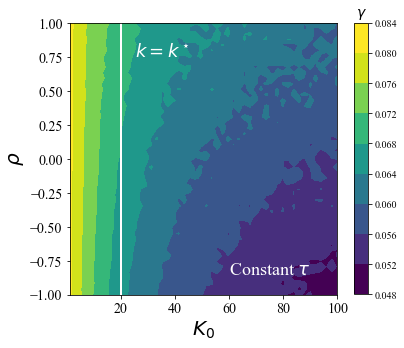

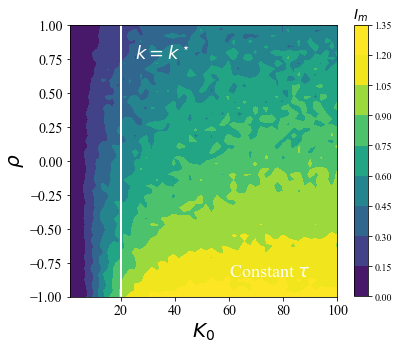

In [118]:
gamma=[[0.08083372103240648, 0.07836700952577298, 0.07626103104307647, 0.0742407051164459, 0.07245129099023498, 0.07076831583376197, 0.06949233828754772, 0.06821878776756062, 0.06718913255871609, 0.06554049771317709, 0.06468106324618036, 0.06349183699703236, 0.0631969284719402, 0.06184927322245628, 0.06081082763030423, 0.06052257480080232, 0.060004677428187166, 0.05935552608438049, 0.05902404318344593, 0.058373329666978585, 0.05763646428977867, 0.05795085365935911, 0.05681424957965765, 0.05669526131126349, 0.056250354970107774, 0.055592569626891686, 0.055259533374432734, 0.05439463734618235, 0.054963270815227, 0.0538515343212421, 0.05413640176927968, 0.05364865130120638, 0.053840741157134595, 0.053130451402109674, 0.0530512642760772, 0.05318886474017677, 0.05214713828225282, 0.05261721040834178, 0.05201594929989416, 0.05201929586207848, 0.05194892357239754, 0.051430612673158946, 0.05259601075541168, 0.05160097670625939, 0.05263631662741603, 0.05047123400270569, 0.05183798786853113, 0.05096280245520946, 0.0514550080751061, 0.05006675593180709], [0.08084176970697358, 0.07836424655576624, 0.07611449641512495, 0.07438930463306935, 0.07258059963251555, 0.0709339202553333, 0.06944149800194764, 0.06826484686835123, 0.0668032010514332, 0.06560752318240418, 0.0645543793212992, 0.06384567478066293, 0.06262566632419185, 0.06221887287492274, 0.06153829881197659, 0.06071828206868651, 0.060163303388689214, 0.05921019686036552, 0.05895062149267449, 0.0584689056384868, 0.05770150824977839, 0.05674625848819595, 0.056604301163578966, 0.056369550275619205, 0.056465527421641015, 0.05580769416718128, 0.054940016271981515, 0.05514203404950742, 0.05542184084702459, 0.05455683242040242, 0.054668427677558376, 0.05439404485800808, 0.05331342648431254, 0.053590301942147034, 0.05321759784489115, 0.05311773948572658, 0.052266358266199325, 0.05208138750793612, 0.052272823346403235, 0.052316789338649715, 0.05245571442644166, 0.05251838132136978, 0.051526130515005965, 0.0523125047915218, 0.05130051891550715, 0.05099546482916385, 0.05077833965645532, 0.051233121491960056, 0.05099058007892412, 0.050056191890531475], [0.08083652093171428, 0.07846396898975022, 0.07634137443704392, 0.07427690381470532, 0.07276141757910277, 0.0711880944883605, 0.06978144082036107, 0.06812031465524056, 0.06698304016536483, 0.06618623088499238, 0.0648824082348096, 0.06365581312595127, 0.06299590440138407, 0.06246825470673167, 0.061714688614290386, 0.06087019747581854, 0.06011099191200601, 0.059727649699555706, 0.059141673972469624, 0.05860002399168818, 0.05829596165439983, 0.056980042355582045, 0.0571553456454521, 0.05698317535254572, 0.05666267401374005, 0.056111836274405115, 0.05634268614112151, 0.05486282819273471, 0.055007763563040844, 0.05478220138881845, 0.05437978212053181, 0.05410994586455844, 0.054140770241224566, 0.054068987190704514, 0.05263186725306996, 0.053709167616402764, 0.05341454818151198, 0.05228628515330046, 0.053122919739806714, 0.05130548105683163, 0.05278802630870751, 0.05240938183498625, 0.05245335389549873, 0.05210002987057957, 0.051757467022312556, 0.05096016408446638, 0.05165896041881806, 0.05065501859833982, 0.05087162231261636, 0.05121683407246369], [0.08085452083811566, 0.07841920729575798, 0.07634282258384383, 0.07441418113161125, 0.0725367378830884, 0.07103194556099225, 0.06972826955592584, 0.06829936637443491, 0.06698190807536311, 0.06601729481139308, 0.06494759356850224, 0.06398138837636876, 0.06335303567408093, 0.062248758824627874, 0.061801325467286984, 0.0607320722249439, 0.0607549242848427, 0.05998458380145695, 0.059110774476386164, 0.05872588575376321, 0.05769712702378407, 0.057633483839145586, 0.05691023436110892, 0.05700754114732787, 0.056195138097654466, 0.056565081477740864, 0.05588663850737584, 0.05558111559337196, 0.05466196486023438, 0.054695270393093, 0.054631787294040945, 0.05420055520502885, 0.05385629546449181, 0.05455976891951506, 0.05438374305105833, 0.053704864541144655, 0.053909775529164136, 0.053645315744372625, 0.05267083297348937, 0.05215964250220591, 0.052432183989995565, 0.051714504027783555, 0.05158911223450702, 0.05166278725614688, 0.051218156254595304, 0.05086285564122498, 0.05109152227140246, 0.05130031756687905, 0.050684022726211204, 0.051608557931925064], [0.0808577998326248, 0.07847976905280594, 0.0763030363218435, 0.07428975843674682, 0.07264875416820832, 0.07106520770258386, 0.06988362701879205, 0.06840264431505078, 0.06720447841704999, 0.06584275311217146, 0.06504474519323955, 0.0638241251537159, 0.06318360876630455, 0.06251416365555938, 0.06206002838156189, 0.061075054348616965, 0.06024083298231649, 0.06004551812927747, 0.05942846351112361, 0.05908709733507868, 0.05877035606105441, 0.05829298292493454, 0.05748307404440452, 0.05712401797885466, 0.05651380162734129, 0.056446827429598015, 0.05586313083765352, 0.056159416664664424, 0.055577100759500946, 0.05498831982534792, 0.055860395249290935, 0.0550741572961424, 0.05383279596911982, 0.054096847991987065, 0.0540936256333051, 0.053579707236615974, 0.05429771225264506, 0.053229714236088535, 0.05289403328874494, 0.052340158858060565, 0.05316886006164511, 0.052176580820014896, 0.05329580712915262, 0.05236522845529698, 0.052294346575653974, 0.052114407102319814, 0.05192047636213931, 0.05199615673727277, 0.051854649696512496, 0.05055261588406736], [0.08086262883370524, 0.07851936289601046, 0.07632859679571587, 0.07451887827695955, 0.07269201707922489, 0.07105963495914368, 0.06963231297061943, 0.0685215731761553, 0.0673063693820911, 0.06611484688164422, 0.06492137998371363, 0.06416966682858906, 0.06338648209094556, 0.06294316713926766, 0.06190997286472611, 0.06093414263865419, 0.06066660719606281, 0.05976408583009724, 0.05955331297590633, 0.05879804104930303, 0.05852214502165471, 0.05810619147071324, 0.0572920850522828, 0.05776680360883799, 0.057024425243765484, 0.05625237052353575, 0.05662446617353212, 0.05625434252870632, 0.05603655208097012, 0.05553316880658365, 0.05503969111385635, 0.054775915897200884, 0.05464724616565574, 0.05466942600243803, 0.05365923203803982, 0.0537653349180611, 0.05348741904719633, 0.0520826885524645, 0.05380852373398245, 0.052680217238108056, 0.05284862430098719, 0.05185510322664156, 0.05148883208435602, 0.052338909536566045, 0.05235263186975723, 0.05237855656007739, 0.05267458239244875, 0.05189694758809295, 0.053161680173817956, 0.051653996211700526], [0.08085983802084609, 0.07851454685889342, 0.07636649932717007, 0.07450599329023035, 0.07277801520423685, 0.07111225715820294, 0.06988670621114092, 0.06861395568081081, 0.06754445361618314, 0.06639502453587759, 0.065617804528238, 0.06429299190776824, 0.06355205314185859, 0.062479730680755935, 0.062039925871750105, 0.06129349979018286, 0.06021786171819835, 0.0600641934967697, 0.059757648215025806, 0.05952237218442972, 0.058331639278421575, 0.05812331098438148, 0.05784917739678567, 0.0573144769339331, 0.056840580345117034, 0.05642815119026704, 0.05639244477356581, 0.055884783484428414, 0.05561756255292788, 0.055407102134005425, 0.05560704937067472, 0.05495619736201914, 0.05450143231948566, 0.05445980038743659, 0.054487361275282295, 0.05292941491468785, 0.053596714383862064, 0.05281512597694411, 0.05262570019162489, 0.053231563449803954, 0.052495522250661175, 0.05392357419808023, 0.05261917484188289, 0.052840688085435794, 0.05162137164367028, 0.051194004906212974, 0.051863455130852325, 0.05160415408016544, 0.052254756599085905, 0.05132716549041588], [0.08086750440292924, 0.07846016476814797, 0.07647740696188138, 0.0745520837754812, 0.07286814066726724, 0.07123763414743536, 0.06994809394775074, 0.06860601750159777, 0.06762558389794926, 0.06623372855570812, 0.06508009310533323, 0.06448904731692473, 0.06364059758960655, 0.06316126860172283, 0.06197185816204742, 0.06136858438397627, 0.06108211882438593, 0.06068292031024628, 0.06058365700374114, 0.059455164881348575, 0.05934782725194518, 0.05798503859430395, 0.058132584035799593, 0.057957249696478794, 0.057370242624931934, 0.056786061483772854, 0.05700779558300232, 0.056755164722278116, 0.055855697258353675, 0.056000913396094844, 0.05516951022880025, 0.05541515411898777, 0.055420637284193365, 0.05540791064739816, 0.05414376521770832, 0.05423667930923459, 0.054524650989102044, 0.05307075872782313, 0.05415556720869692, 0.05281539609557957, 0.05337811186596794, 0.05320435795852535, 0.053454926702168795, 0.05307086211382622, 0.05267442134240022, 0.053624500334752724, 0.05280109452363135, 0.05224418360189396, 0.05130397344074573, 0.052237746548951844], [0.08086893113270603, 0.07847776280579112, 0.07648416584702843, 0.07463837772720436, 0.07273384156294505, 0.07131629530392271, 0.06993109677917028, 0.06871105134160971, 0.06749974562262226, 0.06660726546683632, 0.06557350828891095, 0.06437325119094123, 0.06377120919082711, 0.06291658266419993, 0.0626195193075464, 0.061572107952211186, 0.0609212806439228, 0.060469633632768895, 0.05965553992859371, 0.05952483141387005, 0.05900483442470244, 0.0585028208016526, 0.057741173028256265, 0.05734413772992945, 0.057906256427282234, 0.0572893116177187, 0.057324283685497614, 0.05585013783839545, 0.05591989316553954, 0.05624139049190918, 0.055969819741613504, 0.055890688741596695, 0.055089469757749, 0.05507526716086385, 0.05429727790709439, 0.05395772385731262, 0.053849043681719215, 0.0548965029796421, 0.054018863101268785, 0.05255964900752386, 0.053315903088072866, 0.05435326538674925, 0.0537207665255833, 0.05229073149845849, 0.05350507759366881, 0.05404577268676101, 0.05248402875046155, 0.052950929471598, 0.05205155779475788, 0.05193633929953036], [0.08090921198846188, 0.07859322735416621, 0.07645578353965078, 0.07455656458465225, 0.07298522246752386, 0.07135877472179847, 0.07027105773235809, 0.0686839338733476, 0.06777309099819392, 0.06660158583753845, 0.06558306438708575, 0.06463775325661877, 0.06384981822084372, 0.0630063934766045, 0.062427211833324, 0.06141856066868945, 0.06159665383952481, 0.060338539891407895, 0.06002549163484596, 0.059316123573825534, 0.05914411572369294, 0.058785251192401286, 0.058245852358264225, 0.05785881040074666, 0.0574603943900836, 0.05747106976837426, 0.056973402435232856, 0.056134715228053925, 0.056660203718457654, 0.056407686679601526, 0.05753530454453753, 0.05539995070476179, 0.055550998309956176, 0.05445361324882609, 0.05521305966466515, 0.05501394593938912, 0.055194868096229116, 0.05472815933321615, 0.054225917001671585, 0.0541110702212227, 0.053646080562777546, 0.053308254466816044, 0.054006092607318514, 0.05317195722354451, 0.05326194859077879, 0.05312592005476272, 0.0529702312186506, 0.052062775116439045, 0.051955703403109135, 0.05285736926416748], [0.08090287311426791, 0.07857027039066253, 0.0764432164356595, 0.07455095175936446, 0.07312464195964286, 0.07122192279858569, 0.0699782374617772, 0.06868561564137089, 0.06773171815192658, 0.06674644377073265, 0.0656388837020194, 0.06488575476060505, 0.06413423679657371, 0.06314692271245952, 0.06228852541517719, 0.06183414619296792, 0.06187223699868278, 0.060749612008433956, 0.06054537913043426, 0.05905104143938633, 0.05944361502603845, 0.05950755710540625, 0.05823698538778358, 0.05838405749882733, 0.05754893773626926, 0.05749178789114218, 0.05648248135836557, 0.05770032723465343, 0.056494285114987594, 0.05614379278693779, 0.055972024918053746, 0.05611171814789847, 0.05587385305996999, 0.05546087602413476, 0.0547896383850157, 0.05541552654923046, 0.055567578438426385, 0.053983710813361035, 0.054082326425037186, 0.05378118453011891, 0.05362953513071484, 0.05325373570733661, 0.053396805021123143, 0.05347844524727324, 0.055262004779050536, 0.05367050259443449, 0.05245772329865736, 0.052182009417754104, 0.05276059142950931, 0.05267910916035007], [0.08091133189176736, 0.0786278133704847, 0.0765350390551831, 0.07470714706976371, 0.07302061648116012, 0.07145833863764202, 0.07014265319596957, 0.06884120363675526, 0.06772129501131786, 0.06658916898673797, 0.06575576612226257, 0.0646192053672792, 0.06380727364948094, 0.06321806275922498, 0.06283953712767111, 0.062232690262393135, 0.061244590867708004, 0.06072326086048569, 0.06058664609604983, 0.05989122882832838, 0.06009665077675226, 0.05863246742236268, 0.05829773379049833, 0.058181690786706985, 0.05775443121233666, 0.05662403487716856, 0.05643389688998807, 0.05641234865279838, 0.05760567607233211, 0.055767393520565436, 0.056288008279586584, 0.0559827152025347, 0.055215196006471436, 0.055730637076039785, 0.054234998269532896, 0.05444073644194614, 0.054592512574196665, 0.05431801324227559, 0.053296510627686214, 0.053789619730595234, 0.05461236836066621, 0.05391712894411497, 0.0547932819975905, 0.053180501609848996, 0.053233585637861215, 0.05251519775545892, 0.05336976903363387, 0.052876994665653564, 0.052675783161125256, 0.05278394223252199], [0.08092096954698393, 0.07864688890873095, 0.07659403567534791, 0.07478112195973138, 0.07310808642369242, 0.07155913613308092, 0.07024600535648311, 0.06865712656497543, 0.06804339781795822, 0.06676079045592034, 0.0658474114923297, 0.06490063961300278, 0.06415492946969362, 0.06341663582905091, 0.06285310952597163, 0.062312425863093664, 0.06225044390771824, 0.06126315051619843, 0.06051398113530049, 0.05977155205133789, 0.059166505705332106, 0.05869743025834282, 0.058971326402110724, 0.058186932374568484, 0.05866202669334479, 0.057827083151840666, 0.057089056016878484, 0.05683297690425431, 0.05770546721617655, 0.056629881828550145, 0.05698040196835721, 0.0562851027169633, 0.05487790957971805, 0.05599398944587191, 0.055864094809704466, 0.054933108413624386, 0.05481025386476345, 0.05451677336211118, 0.055122780091423726, 0.05420372597914654, 0.054904197208448226, 0.054434624009541334, 0.05392577105569536, 0.05394407236656031, 0.05287316672779543, 0.05479650958961278, 0.054945357885850074, 0.052851461155466996, 0.05278963742057842, 0.053811363150691786], [0.08090845506360561, 0.07859122351471398, 0.07660183177690168, 0.0746538931272566, 0.07332043741960362, 0.07165666517991862, 0.07015369027656526, 0.06887857145472769, 0.06813750521987022, 0.06672875769899324, 0.06586158174004127, 0.06473158956552885, 0.06416131072953667, 0.06357013009118412, 0.06309283719845438, 0.062385488254927055, 0.06173443058140866, 0.06101829569856788, 0.06068914309402304, 0.06025977329230425, 0.059826956475470976, 0.059516787273564915, 0.058490090285554, 0.058716346250443426, 0.05819666386665234, 0.057893338840720655, 0.057842307475931644, 0.056724821983512454, 0.05660261427234067, 0.05699069281274326, 0.05720566960123771, 0.05584687070358577, 0.05595927253204808, 0.0560052312088439, 0.055952926229170925, 0.05570981341008349, 0.054706022491158954, 0.05417115894262493, 0.054615991856859065, 0.05435366112828316, 0.05300491110201141, 0.05488472401360351, 0.054919581153161236, 0.05386763417238329, 0.053451698566270196, 0.053514485598544444, 0.05524903189467409, 0.053335423232885246, 0.05360109834749974, 0.054733802765719486], [0.08091237294633427, 0.07864055132051224, 0.07658792983513597, 0.0746787720706804, 0.07319403852765151, 0.07167641426098269, 0.07037005610249414, 0.06937588231451813, 0.06812056278351017, 0.06688613768158386, 0.06616414010267156, 0.06498639797613787, 0.06453993742468579, 0.06353064745780423, 0.06289453235774523, 0.06237019295148401, 0.061405317349252954, 0.06108931715244101, 0.061490815458163726, 0.06008265560150044, 0.059820592778954, 0.05990050947103983, 0.05950455763495271, 0.05821219488451059, 0.058128156616627846, 0.05838943216432169, 0.057147110481578944, 0.056922835314170445, 0.05764017893063435, 0.05751462044192822, 0.0568703453814501, 0.05639403434840082, 0.0560847535566158, 0.0564262994066756, 0.055735562012996426, 0.055559254731614834, 0.05558449353745909, 0.05486774507706154, 0.055166349247034514, 0.054318992413095554, 0.05522408665303629, 0.05408660198049742, 0.05596860022987076, 0.053335474029163915, 0.055192432301288445, 0.054130077333773625, 0.053949119204034605, 0.05413454098055719, 0.05386024403748247, 0.05470182680551988], [0.080907019814851, 0.07867174324873628, 0.07664393347286884, 0.07489502087641717, 0.0732311465610605, 0.07190325059321154, 0.07038915908278699, 0.06922231253699064, 0.06811547214169333, 0.06691140116811024, 0.06591788583555375, 0.0656108009315255, 0.06456247782123505, 0.06389332786170603, 0.06317646879821412, 0.0622183910546099, 0.061675061362035245, 0.0615313016071799, 0.0612416063834715, 0.06048726993068386, 0.05948152631866187, 0.05910376187897377, 0.05930321200046275, 0.058826417173858676, 0.05827054025502498, 0.05865991410264747, 0.05706533992688181, 0.05770486001743495, 0.05817140993461933, 0.05672591748723702, 0.057084354473922135, 0.05723574392695773, 0.0558514637074618, 0.05653975179472074, 0.05647672971025965, 0.05570434031230485, 0.05552227099744817, 0.056249380304768296, 0.05485278161490086, 0.05622627891930603, 0.054969522972116505, 0.0557472488502116, 0.054859601490861415, 0.05565901580108498, 0.05468268814050302, 0.0535242030744499, 0.05409085568099983, 0.05454347263067451, 0.054831386225847226, 0.05328754786008059], [0.08092056438555842, 0.07870199592937487, 0.07670810542426444, 0.0748896393415117, 0.07328316393484943, 0.07187637708321477, 0.07032192963685786, 0.0696167649187314, 0.06812034510858793, 0.06740569386874648, 0.06652370752274156, 0.06564596077946526, 0.06454170949719275, 0.06424181433309481, 0.06337805961076272, 0.06238810436827154, 0.06207489505796408, 0.06176102351412329, 0.060975351217629384, 0.06068154095725217, 0.06013507843641209, 0.05972207760820078, 0.05957915625527174, 0.058508436464870396, 0.058810153145448095, 0.06022002810451364, 0.05913490837773677, 0.05756292696785705, 0.05773621608286945, 0.058288141464847294, 0.05716616530437051, 0.05567505576749225, 0.056679407350674754, 0.05555340032630349, 0.05840278236506536, 0.05608504809181146, 0.057210399044015516, 0.05468890575459999, 0.055802562215052705, 0.055942026836452864, 0.054231830127420944, 0.05640024917975429, 0.05474105233051127, 0.05426067384918789, 0.054926820188405355, 0.05464302300677029, 0.05367972093286429, 0.053829361483011394, 0.05610885018524203, 0.054661391751583834], [0.08094053043622626, 0.07870748638341356, 0.07664787234198435, 0.07480130024420552, 0.07326009847863066, 0.07197880919661148, 0.07048255870625432, 0.06907953941874527, 0.06845181798563231, 0.06734427621326848, 0.0662040763865331, 0.06527909611709971, 0.06452180040037447, 0.06382918034276708, 0.06330410555463423, 0.06279640735161782, 0.062272133119536055, 0.06182626994825142, 0.06166747283953366, 0.06077946114841549, 0.059630452002863085, 0.06044800361324793, 0.05930264868043666, 0.059715578260253484, 0.059520446243428025, 0.058728053294589674, 0.058435072726054894, 0.05755703989921528, 0.05813844151760951, 0.05740600728994697, 0.056912712215638143, 0.05664449590144619, 0.057006481641396815, 0.05678296378447025, 0.05629706724663431, 0.056420035684435724, 0.05524748552346436, 0.055572498304702844, 0.05513337448609221, 0.05497114428082228, 0.055793855271750986, 0.05436833415387098, 0.05444930123705126, 0.05587766142531136, 0.05413142310016209, 0.05614254278724592, 0.056522412396209795, 0.05484397114552824, 0.05344094959314379, 0.05522406360961618], [0.0809389721181159, 0.07863390432404285, 0.07678502379880912, 0.07484045597108839, 0.07332125791667755, 0.0719790502812083, 0.07086361078047324, 0.06952931081060743, 0.06821468395353451, 0.06738282029148496, 0.06634636982582283, 0.06555708351174643, 0.06480932995139907, 0.06377999062533325, 0.06349109640616775, 0.06274791077331109, 0.06249934715532078, 0.06189885298664444, 0.061088882132527646, 0.06118918395704647, 0.060381965320126345, 0.05998012651599778, 0.05961726526531908, 0.05925772775168147, 0.059249731516649015, 0.058550471321783426, 0.05802615766874209, 0.058501520223592306, 0.0577573540083065, 0.057434305351114594, 0.05796914312828872, 0.05758575222463241, 0.05651833407100174, 0.057063248429710924, 0.0560347096589704, 0.05706024257795477, 0.05615663254118209, 0.0558931647725253, 0.054731131906791845, 0.05476766274541074, 0.05451671275750493, 0.056038616305941286, 0.05471473608935796, 0.05553566170049056, 0.055032504135999305, 0.055076031280756145, 0.05408017532197449, 0.054345847733723585, 0.0542166649276456, 0.053598795993807534], [0.08093521265365887, 0.07873151608106269, 0.07679413854358896, 0.07503194920249716, 0.07353717716444597, 0.07193749499478273, 0.07054060205499638, 0.06944753481341896, 0.06863224675351837, 0.06734774653527136, 0.06663311317698017, 0.06571308443216055, 0.06507758250369548, 0.06396392164346947, 0.06390727161435285, 0.06302382914545429, 0.06214977434582775, 0.061841625318235956, 0.06161415966936918, 0.060589901246495215, 0.06063197720267567, 0.06024625546072942, 0.060767008003305194, 0.05892492809386776, 0.05862399946647409, 0.058918036342954894, 0.05816659934482804, 0.05773734215214847, 0.05875596210591766, 0.057766722897768526, 0.057365267780908086, 0.05740659207911897, 0.057191447431188924, 0.057035724799904076, 0.05727457754572925, 0.05675497089722578, 0.05651874902649081, 0.057050141946658285, 0.05545804006439917, 0.05506828612103472, 0.055442019997755054, 0.05597973160536013, 0.056015369155488916, 0.05574515083044572, 0.05421277675525245, 0.054421241850459955, 0.05605367537271155, 0.05445133315144075, 0.055306363341477045, 0.05374004678684055], [0.08094849285333104, 0.07875682242392708, 0.07680294227341554, 0.07509870989722489, 0.0734431078689987, 0.07208092940699326, 0.07096680578820778, 0.06961180827916875, 0.06851947448189943, 0.06766277120153863, 0.0670944016050824, 0.06595776018879368, 0.06516711397628104, 0.06503548280716383, 0.06408995532022664, 0.0629239032049391, 0.062164476438112175, 0.062191289830253585, 0.06114796393176079, 0.0608246533922949, 0.060756153962159595, 0.06012625390148662, 0.059647733974032724, 0.05914226477389455, 0.05983376290098359, 0.05844970710028735, 0.0587629558797056, 0.05796952608246435, 0.058365726280584944, 0.057538887786730476, 0.056935192164926145, 0.05860273570519594, 0.05746326369731317, 0.0565653018661367, 0.05614234948013619, 0.05648819902599003, 0.057678309369271805, 0.05596666289658999, 0.05607646967961912, 0.055869204116042306, 0.056126401615266594, 0.05585706161544807, 0.05445897749416903, 0.054673689236530494, 0.05592677575438418, 0.05466467652384558, 0.05538652961453026, 0.05482158442805233, 0.05512143403244722, 0.055647378828836074], [0.08095037004780992, 0.07876514614637763, 0.07686302909034351, 0.07513118695768141, 0.07349805276264106, 0.07214463517236046, 0.07085786771969713, 0.06919969273782094, 0.06847539432583673, 0.06771520789196585, 0.06661893456214991, 0.06589073974623982, 0.06548409627090401, 0.06459183481870526, 0.06370006886944765, 0.06367315546336222, 0.06198862379139114, 0.06219223486100089, 0.0615245634415379, 0.061865323661006236, 0.06088663687689298, 0.060924833108180185, 0.059882323721385675, 0.06027299067217024, 0.059788498905727856, 0.05913334933094907, 0.06010698842013694, 0.05794674947249974, 0.05839368569745541, 0.05776542071917486, 0.058506222603522694, 0.058472350753564176, 0.05855629801735589, 0.057451404968259505, 0.05699703944139788, 0.05633065476453722, 0.05673549803538542, 0.05647244615741541, 0.057668214835985235, 0.0559542564099871, 0.05727865587795601, 0.05726265856556235, 0.05671182797160733, 0.05523384799581762, 0.05556180130834922, 0.05726183114440403, 0.05677344071234525, 0.05600442474213508, 0.05513974877733662, 0.05486417407394432], [0.08096271687672568, 0.07877650476858043, 0.07693383424095844, 0.07525685987779247, 0.0736701376045213, 0.07241940391354604, 0.0708889705277401, 0.06972230861868028, 0.06828312995958133, 0.06777196074868547, 0.06727540891420009, 0.06585930556133607, 0.0656462367119422, 0.06456061402488458, 0.063577050405788, 0.06375104758128682, 0.0635905747133061, 0.06247128608133297, 0.06268669931438887, 0.06079185273150337, 0.06088970987117622, 0.060985445004298255, 0.06017515009467891, 0.06002380707164203, 0.06011556791168609, 0.059047549494847446, 0.058561959147495186, 0.059349803795218814, 0.05936670248162978, 0.05792236450075542, 0.05875102408117572, 0.05709916934537988, 0.05782166040014068, 0.05842289654813655, 0.05647141147110881, 0.05692147771888428, 0.05743574416673278, 0.056911932553550273, 0.05592510078121778, 0.056937327321488616, 0.05682387052425853, 0.05771667647462924, 0.057674175090356605, 0.05519059448080961, 0.05530645253645254, 0.05852286192356714, 0.05595269506436145, 0.05579940052704806, 0.05546784396067121, 0.05562193264906311], [0.0809948042870027, 0.07882900727445576, 0.07689199638727698, 0.07512252197688016, 0.07376379057647416, 0.07227244837192134, 0.07114433958443966, 0.06995726159140828, 0.06892230740187483, 0.0677384980527951, 0.06703349525962984, 0.06587770258208735, 0.06543240448000018, 0.06484474486308969, 0.06373902831689249, 0.06420714730153015, 0.06285358299974708, 0.06299136976485593, 0.06224163318446157, 0.061785695639743454, 0.061099184733626584, 0.062060768786668954, 0.06121312313621808, 0.05957003605035276, 0.060234534668581315, 0.059318803409831145, 0.05892044395476499, 0.05913458988625112, 0.05874338318274507, 0.05810967806856894, 0.058125853599094786, 0.05813211827399119, 0.05776088735621703, 0.05869631629978843, 0.05670376796246691, 0.05814423537630791, 0.057851766866730145, 0.056479417153256196, 0.05621137846308555, 0.056216878885499456, 0.05503669036431612, 0.055913132111963, 0.0555624236780226, 0.055399516275975835, 0.056117597049227856, 0.05709419140124797, 0.05561406629904924, 0.055459034662128814, 0.05550202915360267, 0.057469870972775054], [0.08099278072551806, 0.07879781772775522, 0.07691562628523754, 0.07520556064899521, 0.07385298689750783, 0.0722099543819227, 0.07117820166495639, 0.06982471865309078, 0.06882534712293578, 0.06786056560244794, 0.06674239887355106, 0.0661948951373707, 0.06551536523214489, 0.06512588284379241, 0.0644595894150158, 0.06305216921259821, 0.06316300725303128, 0.062437784344797964, 0.06213193974237033, 0.06259536649600213, 0.06127942391493014, 0.0614689656426796, 0.06007716025140239, 0.05885433429380742, 0.05946307912356597, 0.059881397217348295, 0.05978119155995561, 0.059445951303138136, 0.05852663961529939, 0.058976540625550467, 0.05947689224479136, 0.05835164991439941, 0.05903295877781556, 0.05771951066477159, 0.05818496171089011, 0.05810151912560007, 0.056738314263520676, 0.05798849374491659, 0.0583286066100536, 0.056011027412928044, 0.05567389282007211, 0.05754843756077537, 0.05589070664561631, 0.05513531634197299, 0.05748133894866067, 0.055712534530790184, 0.05517409733279255, 0.055881876146744704, 0.05475255907936375, 0.05552183946376256], [0.08097458284050262, 0.07879319224881048, 0.07699912905125643, 0.07527190980021971, 0.07369893516029236, 0.07236091427759578, 0.07098660525066118, 0.06970955780503885, 0.06891440872788983, 0.06814724703314878, 0.06738611834885752, 0.06717975251160628, 0.06570666831874174, 0.0652564399079769, 0.06441341834586885, 0.06339115045642604, 0.06319134022574875, 0.06281325536647114, 0.06123434745590747, 0.06138236679632568, 0.06138670384527847, 0.06077144355898297, 0.060460351359429655, 0.06039877428621024, 0.060805648597927336, 0.06085337531769683, 0.05958650467114962, 0.05989109958362428, 0.05932403030612333, 0.05906834529672127, 0.05865836012918573, 0.05911253921204322, 0.05788370298857899, 0.0578408313779119, 0.056790431804861305, 0.05911763557333494, 0.058924785188698, 0.058340958989611356, 0.05748023467790726, 0.05693723022564798, 0.05677324774519372, 0.056971176908184214, 0.05665220440921022, 0.05643186542610765, 0.05687516145801058, 0.05582166295144221, 0.05548516397057963, 0.0542025539131277, 0.05702980478288684, 0.05688959910395151], [0.08098225347217128, 0.07881259658537541, 0.07699398745335423, 0.07533527461063842, 0.07386078763599309, 0.07251454282213472, 0.07112638448908547, 0.07034860705012792, 0.06900955979406966, 0.06850390445585555, 0.0672570722371189, 0.06692587267122627, 0.0656560293984648, 0.06496596489111361, 0.06388090521236783, 0.06372671445031046, 0.06399396960971605, 0.06311283374049441, 0.06262809296465223, 0.061330860268499904, 0.0612711679972906, 0.061123566693603366, 0.061082412325423885, 0.060756008629923704, 0.05937669275400472, 0.05979839348445434, 0.059953566152481534, 0.05982618472246665, 0.05878046907956658, 0.05894307069765598, 0.05836038191108314, 0.05773669656189576, 0.058423645790863496, 0.057425694488011256, 0.056941999836148914, 0.057514962077455184, 0.05821664761246956, 0.056731032542484926, 0.057470406173902096, 0.05755003778976782, 0.05725883785468064, 0.05779898959716242, 0.05708070070345476, 0.05648138160245954, 0.056587428788459945, 0.056717767379398945, 0.05567750339094791, 0.05673318404898747, 0.05649243519787202, 0.055158841596051715], [0.08099247665836005, 0.0788855501937779, 0.07703935999103693, 0.0753286760784828, 0.0738846031942771, 0.07259687731170082, 0.07117509819347793, 0.07001921586426127, 0.06931279054516097, 0.06843034919223295, 0.06698986561090117, 0.06619363581389569, 0.06574919042386873, 0.0650622751904595, 0.06509510568441038, 0.06399555791419195, 0.06311397169450357, 0.06305749967694597, 0.06264963479061036, 0.06195672410977232, 0.06089571375030728, 0.06192372003843813, 0.06074715054556468, 0.0605350906702935, 0.06047909317838442, 0.059564005743543626, 0.059462413276547645, 0.06121066451791661, 0.05953181732475914, 0.05879287132836435, 0.060031511279901924, 0.05824967791573445, 0.05898803938898633, 0.05850588603673533, 0.05839765541159936, 0.05874595927621758, 0.056789485594149, 0.05711032269245814, 0.05882452012782834, 0.05694408672642995, 0.058137539023167484, 0.05969064347581018, 0.05779734113963217, 0.057714083339108234, 0.0556309592174415, 0.05625376105636043, 0.05721837820861359, 0.05635637119679198, 0.05865520826296361, 0.05678194225882484], [0.081010276673774, 0.07893860352665798, 0.0769640307294009, 0.07533248863462781, 0.07395290531637523, 0.07228770552927023, 0.0717177843606075, 0.07035982691766683, 0.06896937380588282, 0.06810237648300181, 0.06740084903340691, 0.06664720290780389, 0.06626265724717786, 0.06623185720329546, 0.06478792080506061, 0.06372337873262095, 0.06413330031557538, 0.0629926004953261, 0.06372171860659338, 0.06272374352090992, 0.0631340803496374, 0.06219243302230769, 0.062494679113432657, 0.06129643944416221, 0.05975873411085383, 0.06139430711679655, 0.059529864098490454, 0.060430311435673366, 0.05868991998949486, 0.060778199981815155, 0.059438397936902664, 0.060283399748267553, 0.05853435914742684, 0.05882649622391609, 0.05866241666238572, 0.0592981327507882, 0.05878962924093033, 0.058537566505312846, 0.0577651659651582, 0.05630444750415227, 0.05718464224197452, 0.05697537533136478, 0.05832739519935906, 0.05718661433696934, 0.0567712858901261, 0.05669295914348795, 0.055687015526562224, 0.057001054138335415, 0.05511341719015567, 0.05561288984458346], [0.08099998324437652, 0.07894733048073942, 0.07703883020322694, 0.07527260552085538, 0.07387908163135382, 0.07253590711744373, 0.07137025818860863, 0.0702574564493677, 0.06941809883080165, 0.06819869099194305, 0.06727048738012871, 0.06708667716589928, 0.06707217788033053, 0.06527299647212867, 0.06468735346671421, 0.06422990386376017, 0.06362977790524475, 0.0639548379801944, 0.06270975053068104, 0.06256935387183446, 0.06268469418082419, 0.062178667682625345, 0.061249001930229106, 0.06258854056550953, 0.06120083193759445, 0.06002414149431412, 0.061015195088904454, 0.05952391453144526, 0.06013409332920116, 0.059250773070470227, 0.05943973724579549, 0.0589415538707538, 0.06028033036901191, 0.05844769466619796, 0.05843176444610025, 0.05982800326333105, 0.059327005578545505, 0.05830686589809306, 0.05916852165343398, 0.056938926143447754, 0.057431468875239346, 0.05668820791401027, 0.05685322243633852, 0.05665731177569589, 0.05701090749693242, 0.056604799384344186, 0.05779641802786001, 0.05710192094233633, 0.05654097441880979, 0.058100391642619646], [0.08099153495145268, 0.07886414911066573, 0.07713079342960862, 0.07531029670248217, 0.07400552486959412, 0.07254996979842242, 0.07156919942122766, 0.07044565143468676, 0.06969181872819258, 0.06885954165386364, 0.06725388135146103, 0.06661992180706201, 0.06649566076781493, 0.06554213059135222, 0.06516388578560849, 0.06450169151940563, 0.06401946723261269, 0.06360993806383416, 0.06216082611572022, 0.06260257750928575, 0.06301640048051295, 0.061766581626841364, 0.060987522901017895, 0.06207668759125689, 0.06078726722988564, 0.060618526509341165, 0.060896050420668035, 0.05930150242557253, 0.06037040421689507, 0.05969176646223472, 0.05903759701025733, 0.05840388153373722, 0.05882462357612209, 0.06073452602482554, 0.05911831767868199, 0.05897221500801428, 0.058500181781318286, 0.05866465223722869, 0.05752965579461111, 0.05786617021318616, 0.05752119522363751, 0.05816456149259431, 0.057554029396800585, 0.05698252820831742, 0.05851397878765208, 0.05627874149697746, 0.05766042959700802, 0.05675540805546184, 0.05794191576490972, 0.05789700230844752], [0.08100364320046756, 0.07899805356513108, 0.07721127683770056, 0.07555779268436717, 0.07403312178696318, 0.07248619263236764, 0.07138259756487163, 0.07036259577008404, 0.06986512498311905, 0.06829301554340093, 0.06785798508814436, 0.06656097903132259, 0.06678484499078712, 0.06517283976215048, 0.06525011818194122, 0.06430213884391572, 0.06459655690627954, 0.0642231008281607, 0.06316354254472263, 0.06205033835582728, 0.06230888115280496, 0.06296141310690954, 0.06191715657632207, 0.06144356195942188, 0.061044504088870646, 0.06130098642653808, 0.060899603023583826, 0.06048325765409396, 0.060569872587341235, 0.058971302318699376, 0.059495215018836554, 0.05900531013855737, 0.05935416351275025, 0.060187685728512554, 0.05715637775300847, 0.05908190560612526, 0.05903711259086, 0.0586442955457796, 0.060035906843180234, 0.05892597943788653, 0.057855057835720015, 0.05784842571491243, 0.05856318002243252, 0.05634777836072354, 0.05835791436495026, 0.056323169151229834, 0.05664310086789236, 0.05693511649361823, 0.05573999292869136, 0.05664365358279657], [0.08102101947944036, 0.07897233012321782, 0.07714866070587563, 0.0755844846482405, 0.07389381535924706, 0.07297324657180469, 0.07142462529784029, 0.07053337899095734, 0.07003820811103864, 0.06884313761374414, 0.06792968121912513, 0.0676934932293426, 0.06661018002202831, 0.0663174504409165, 0.06475646956606332, 0.06391633019214414, 0.06435246248558595, 0.06363447065747936, 0.0631634921048459, 0.06297989635110297, 0.06226305449968192, 0.06229940150515735, 0.06114530462238194, 0.061969509757625114, 0.06164826025828974, 0.06257698988866109, 0.060777571952411895, 0.05973891038973835, 0.06031812119353715, 0.06125108024752799, 0.05977352957545347, 0.05948417529887218, 0.06074386213572986, 0.060122347485921254, 0.059683387506082555, 0.05974343870367762, 0.06069192090740467, 0.059391133771870566, 0.05917469540811411, 0.05853869254735196, 0.05970733402582851, 0.05751679886902574, 0.05846892767655018, 0.057927101410893383, 0.057633376685629054, 0.057554325026667796, 0.05774854508203225, 0.05705960650978002, 0.05736271408500505, 0.05806342590292359], [0.08104180810770967, 0.07898068422680014, 0.07721189631292444, 0.07568049271934484, 0.07414934582751591, 0.07295360006779425, 0.0711832309346311, 0.07058999507760726, 0.06950251032503289, 0.06922526678845144, 0.06807998426167938, 0.06745320216706639, 0.06644039878308246, 0.06606923812266235, 0.06536873260908004, 0.06552643612115841, 0.06488138304009797, 0.06411047208699955, 0.06355991335032139, 0.06291042530590994, 0.062082493469428186, 0.0622751118742859, 0.06138812801184595, 0.06150711657419634, 0.06186126885636404, 0.061912569499112474, 0.061064865524307406, 0.06171012703238285, 0.06062592923828913, 0.06099964725963204, 0.0589933790679694, 0.06018730170863948, 0.05896402576688696, 0.058572744069384425, 0.05895244426964386, 0.058737913549653645, 0.061199946593471694, 0.056997042397583415, 0.058816004243514096, 0.05879088781000789, 0.0582259333365495, 0.0575943170627576, 0.058225119870947174, 0.05695207236490818, 0.0593261980501301, 0.059833217784253934, 0.056940900201567446, 0.05859047802029453, 0.05688056801918412, 0.05670737053144794], [0.0810287346878387, 0.07901671017919414, 0.07710775677363009, 0.07557552882412374, 0.07418853646438806, 0.07267289949433611, 0.07158165892319136, 0.07070686822547152, 0.06978443765638154, 0.06895907135361923, 0.06825562364652779, 0.06750145743627031, 0.06640788997614235, 0.06647444931896582, 0.06506681009777442, 0.06535917783525877, 0.06425959933594372, 0.0637391022750513, 0.06406289242228712, 0.06298745893177733, 0.06281848909221656, 0.062402443531417044, 0.062027315362650895, 0.06257169045872334, 0.06259719425781583, 0.0621847932456499, 0.060557034707786464, 0.06128521827490256, 0.06103878723224205, 0.06146269077338585, 0.06025085057349885, 0.060548139244347966, 0.059517231611784016, 0.06049898169403153, 0.0581592236675889, 0.05872781309493481, 0.06054712172171565, 0.05923577005233156, 0.05867332959301964, 0.060198911691286695, 0.0576176751626965, 0.05953661356189677, 0.05771703599719964, 0.06032420533143637, 0.060376636641940006, 0.05748074582851148, 0.05689320186845772, 0.05754290530566818, 0.05712732986130222, 0.058872002718138694], [0.08100885612952366, 0.0790137955671968, 0.0772331615129393, 0.07575133744722445, 0.07427731570521379, 0.07288659492616073, 0.07159469079461021, 0.07080600626320523, 0.07003020807247147, 0.0691903309120787, 0.06790343523806451, 0.06755094495416612, 0.06740860163169499, 0.06588936398133995, 0.06564387016419077, 0.06487034050496901, 0.06545873972889771, 0.06371631699822346, 0.06506025437578046, 0.06431330938509475, 0.06328245582177144, 0.0632374742412886, 0.062067332303129504, 0.06189183141432786, 0.06063995848207486, 0.06152419428832618, 0.06198067445687182, 0.06040551925637088, 0.06188553953286632, 0.06184210678497721, 0.05956480944407742, 0.06152196087293254, 0.061219206386866225, 0.060283854468615096, 0.06089146789861303, 0.05854589608373183, 0.05795582724997477, 0.05893296979820289, 0.05836646228210761, 0.06098370142150229, 0.0591656838109479, 0.0581107816736926, 0.061962194114069585, 0.05627903624633242, 0.062026456181373694, 0.05886351500505274, 0.057875996179700295, 0.05735589972794842, 0.05805647630831333, 0.058862034370370984], [0.08104455768593974, 0.07901956644619629, 0.0773342805138901, 0.07580276957692393, 0.07453405463580508, 0.07304762076871926, 0.0718377493406633, 0.07095459760399814, 0.06999804080766948, 0.06946155529652227, 0.0678982463601667, 0.06748896855187747, 0.06749403164606937, 0.06708904990823655, 0.06586659062023072, 0.06534138716238429, 0.06563750639679967, 0.06374191396466185, 0.06451421664630363, 0.062968895934979, 0.06272827886692425, 0.0635641864363008, 0.06256034921999133, 0.061636805356289466, 0.06089698579552221, 0.06262473245972365, 0.06220785520479748, 0.062275331246598446, 0.06074084391356449, 0.06163300136055656, 0.0615615402497119, 0.060404475138612926, 0.06036868005420543, 0.059408881710752204, 0.06032501192040732, 0.059004551708298936, 0.06041373358790327, 0.05896454047236353, 0.060516114229283144, 0.057399279490396665, 0.058290099109064845, 0.0616436047122422, 0.059836806953130525, 0.060658442217615564, 0.059879486873889914, 0.057070979767207625, 0.05892616789144351, 0.05826966972079662, 0.057960817851114975, 0.05769490009649677], [0.08105097897545518, 0.07905923820503896, 0.07732081976175172, 0.07575720845894672, 0.07433369006947686, 0.07289530124874065, 0.07198400563305722, 0.07078406183565447, 0.07021747190564638, 0.0688542394316989, 0.06842339367538645, 0.06784148074046759, 0.06708480106781298, 0.06671046760249155, 0.06576524275730135, 0.06562056779669598, 0.06567378882158659, 0.06390764835028798, 0.06450859837924351, 0.06352145273923708, 0.0641931862482786, 0.06364079238712216, 0.06251338534205933, 0.062223986689186835, 0.0626964817209857, 0.06075638078252501, 0.06455790076570551, 0.06268632717160243, 0.06242395237425958, 0.060391868935759055, 0.05979840265718246, 0.06011501821652718, 0.05869825452201544, 0.06129199793477244, 0.05901668207910595, 0.060328696433659755, 0.05901442589979678, 0.059807345852397636, 0.060089013598986316, 0.059467357272932474, 0.059807088800510916, 0.05997683569593326, 0.0590906023548226, 0.05926403670568511, 0.05988055807639893, 0.05826588486214032, 0.058352049121098426, 0.05853186040583424, 0.05704685549893761, 0.05849971510955542], [0.08107572929047022, 0.07917044372207208, 0.07726889980894815, 0.07546553814536894, 0.07424200034604796, 0.07322686392424677, 0.0717799728012674, 0.07075098128517397, 0.07029747830152361, 0.0686988775253603, 0.06824684464642988, 0.06797497442073569, 0.06712642590069356, 0.06610563868542613, 0.06628668523189843, 0.06588838709712536, 0.064869915527413, 0.06427399387642187, 0.06383543705509906, 0.06256639149566265, 0.06306906869502325, 0.06277435410554971, 0.06383485471993043, 0.06261095123810327, 0.06291169977896002, 0.06250438617051816, 0.06123649141991748, 0.06177533897561475, 0.0634055914049544, 0.06018198488224492, 0.061523286882744097, 0.06181986068555874, 0.05982712157130617, 0.060611461809153805, 0.060175788637704695, 0.059721101750507107, 0.060239810783880396, 0.059853897172749235, 0.05877021313637503, 0.06013541899973902, 0.060414729633048066, 0.05993650685406023, 0.05783515889015156, 0.057812743970867615, 0.06030805472186331, 0.05937410281672974, 0.05943678612425932, 0.05940773331534549, 0.057320581431134374, 0.06125583167820487], [0.08106489450974001, 0.07910108109531307, 0.07733182686104821, 0.07580913184400426, 0.07463683827788326, 0.07318565736924176, 0.0724408518167329, 0.0712961474851493, 0.07036856757224773, 0.0699426078966145, 0.06823970752155692, 0.0684535694085389, 0.06714552461629611, 0.06685195201799965, 0.0662426706028939, 0.06520545301690386, 0.0654097179521301, 0.06452578303812694, 0.06427401434199766, 0.06329731144921337, 0.06259359045394655, 0.06463099304766734, 0.06274592224961446, 0.062393354751137366, 0.06229477247776852, 0.06220831129719123, 0.0637090357813008, 0.06184563183603999, 0.06099088190224151, 0.06239528585248567, 0.06086600685870221, 0.0610927815960304, 0.06004977779630826, 0.060972496781830955, 0.0603841684767767, 0.05906178858954874, 0.0594805685176311, 0.061580701756277424, 0.05986056648937295, 0.059306559134457384, 0.05904991025772214, 0.05919884579428115, 0.06122615401893423, 0.05975669550001124, 0.058202055878455776, 0.06131208149481179, 0.05834111638260481, 0.05776849263246632, 0.05790715777259819, 0.06133547741991321], [0.08105139132425887, 0.07917966034998526, 0.07742443087554574, 0.07580357731783828, 0.07448517435472718, 0.07342004888205156, 0.07198598970518776, 0.07118419907710304, 0.07017715712150129, 0.06954070419913096, 0.06871939527716525, 0.06756510370126734, 0.06771147889798776, 0.06659963350457304, 0.06602174379533195, 0.06645474312509057, 0.0655910259344218, 0.06566283356456183, 0.0647966994602451, 0.0642743720593011, 0.06290538057537566, 0.06427998590955115, 0.06372350195840563, 0.06338267736043127, 0.06301479496181141, 0.06265071991785039, 0.061587602515918806, 0.0605233854972933, 0.06352908576688095, 0.06277430042073863, 0.06048552748229408, 0.060984814457966365, 0.05960638091924898, 0.06079683393211619, 0.06321676593525412, 0.06026235544994839, 0.06247154029710776, 0.05910176734570618, 0.06089117985464323, 0.06025814692799772, 0.06060485474226091, 0.06000707349614595, 0.060318039217776884, 0.0604323434173932, 0.058612371372660545, 0.05886928447957732, 0.05953167747871085, 0.06078485744747291, 0.05753201894095183, 0.058365714686957], [0.0810762384633639, 0.07923228019213693, 0.07748165022823159, 0.07577334462915326, 0.07460369896416406, 0.07337226662492541, 0.07261584113870179, 0.07147960252444555, 0.07072266423269681, 0.0698056864936928, 0.06860759685247467, 0.06812067172821404, 0.06711186698858364, 0.06611566836090846, 0.06626542760498018, 0.06606642424052957, 0.06533877650593031, 0.06575264537693647, 0.06384770663255285, 0.06491955162383527, 0.06556746666169175, 0.06417650929045378, 0.06443919655760562, 0.06178218695296276, 0.06230807380603762, 0.06123205478492264, 0.06258989922086781, 0.06281355046789217, 0.0623764530633277, 0.062211094035787194, 0.061479944360590566, 0.06076668063795249, 0.06174161001308973, 0.06111284744839385, 0.05901904355838579, 0.06034048687645788, 0.059901315511022186, 0.059639685219004535, 0.05967191877892424, 0.05925941249282559, 0.06020993959712267, 0.05860004702768376, 0.059958869985082666, 0.05898402498566342, 0.06101444800482964, 0.05877501013231932, 0.06277257404711248, 0.05838519568724758, 0.05868230573838799, 0.06092445569536977], [0.08108957018879073, 0.07911399425290731, 0.0773603358683251, 0.07586112518331757, 0.0745256558223678, 0.07346569056960163, 0.07230884824731296, 0.07102822395609086, 0.07018530234046585, 0.06982650891304142, 0.06890367011302259, 0.06809349342051917, 0.06771910131889845, 0.0664924553260173, 0.06761412262993056, 0.06619030943779743, 0.06635720761194226, 0.06618853713467533, 0.06487676354448149, 0.0658249262568371, 0.06328123891586505, 0.06223703376886383, 0.06315618118949796, 0.063826550788498, 0.06322716892839746, 0.06279311721376703, 0.06321624423158623, 0.06160795433832651, 0.062314150023106654, 0.06146533709383317, 0.060530615494140315, 0.06106867438806108, 0.0625331335764406, 0.061205329637199705, 0.06131080312993173, 0.05993240737788825, 0.060787210673837855, 0.06062158827219689, 0.06093265132518409, 0.06187629597259118, 0.06242290445359238, 0.061577177522944074, 0.06072093874613163, 0.060757656183171256, 0.060781102968833406, 0.06029304977470588, 0.05846033187939307, 0.061871057171492716, 0.05919099913236951, 0.05791555846787128], [0.08107525254161567, 0.07919798197995452, 0.07747662021654496, 0.07588461456614433, 0.07460336355830996, 0.07356957549598424, 0.07227761552709311, 0.07104327592353019, 0.07030020092353423, 0.06957204156497056, 0.06852309650429328, 0.06846203269627807, 0.06748468943679409, 0.06689197759823315, 0.06588327737049328, 0.06771396850054698, 0.06629378375914625, 0.0657106268717661, 0.06476807985907812, 0.06556325586739972, 0.06387862022139795, 0.06378416090085746, 0.0643175555947873, 0.06353889926823063, 0.06460987354149714, 0.0627041741471868, 0.06268648997556571, 0.06246493743620366, 0.06227699618677776, 0.06062174601180434, 0.06147173436763563, 0.060937067108493025, 0.06269690592735036, 0.0630392608985713, 0.060014325892424426, 0.06173259603894857, 0.061670998741662555, 0.060107686460967695, 0.05974764535307446, 0.06082421469134256, 0.06076737541535755, 0.06063597502235724, 0.06132552442828488, 0.05885901182059648, 0.059074271292090086, 0.0621162290785497, 0.05980960457354652, 0.058623610512607414, 0.06060928085008531, 0.06046492603165612], [0.08110582804219299, 0.07920483964322801, 0.07754047300075953, 0.07592473757824621, 0.07458774547220269, 0.0736689486342925, 0.07258923859779207, 0.07180035776840227, 0.07026254391034165, 0.06975260381040783, 0.06927738556606619, 0.06915786092775383, 0.06793512710962808, 0.06700343197827872, 0.06722136448779513, 0.06701623396414469, 0.06558375293084806, 0.06557068115485715, 0.0652900461701193, 0.06423641140006059, 0.06469075002453636, 0.06576813316577901, 0.06277047885949935, 0.0636366278954897, 0.06406189983564725, 0.06161893152655263, 0.06414670225068701, 0.06306235750597838, 0.06257350573591865, 0.06252574534719747, 0.06260528667036397, 0.06058744070202447, 0.06141155440467176, 0.061812475497037306, 0.06178675656149965, 0.06293519471683125, 0.06089434460059015, 0.06367335370729738, 0.06083555443777042, 0.06268237469216999, 0.06160392187254973, 0.059608751719304354, 0.06069335810655867, 0.05864875197060693, 0.05835968549391307, 0.057913884768116985, 0.06043554015966941, 0.060849384825908674, 0.06160380434413817, 0.06030541424477503], [0.08112758596197965, 0.07924142157394204, 0.07759383125108504, 0.07596882981942026, 0.0747980056377036, 0.07356041248701414, 0.0726749626472441, 0.07158374499426363, 0.07070499883409352, 0.07007471175021085, 0.06872852216217193, 0.06862874017344654, 0.06817541065878677, 0.06708417084872512, 0.0676390911312895, 0.06631554513940165, 0.06706619189428104, 0.06451435829110644, 0.0661552834713454, 0.06532212104984242, 0.06416834973716587, 0.06353606208325209, 0.06332564902222218, 0.06367993502239809, 0.0641216168267724, 0.06670316326271261, 0.06298026271513714, 0.06343966033040264, 0.064218756092173, 0.06255202584023885, 0.0637176344956578, 0.06205618148332599, 0.060607705848308976, 0.06125870076285551, 0.061742250722491544, 0.06345669795894648, 0.060348198307419346, 0.06133062402069978, 0.06071824888580195, 0.059635989956441926, 0.058677274984562405, 0.05859059777927481, 0.06030715827600999, 0.061294329390040474, 0.05855295135391238, 0.06132310017716255, 0.06291387870931815, 0.06089773508358306, 0.059865201784714696, 0.06190020134225813], [0.08111683437513754, 0.07918621646377295, 0.07744544603963327, 0.07614915550794367, 0.07471165174985933, 0.07366704387361943, 0.0727178393593073, 0.07160992433781271, 0.070706141651245, 0.06969983130844383, 0.06857046944360741, 0.06972043614518475, 0.06755621131708073, 0.0676873091946608, 0.06728095532411262, 0.06650474850700051, 0.06587740079393481, 0.06580832118931074, 0.06566639117672254, 0.0650637002346352, 0.06300321212137773, 0.06440812279896374, 0.06502012331736888, 0.06444754397530045, 0.06510962781607915, 0.06357251258045514, 0.06401610372734108, 0.06479816301822043, 0.06259182252647619, 0.06259840132247953, 0.060898293325849145, 0.062404951211235814, 0.06449771277304236, 0.06247220147476375, 0.061970240363533505, 0.06351367709525987, 0.06446256087990274, 0.059590442591057335, 0.06363520966394275, 0.061957789116135656, 0.06417064718112267, 0.06375986054024306, 0.060005984869312114, 0.06126949733033911, 0.06065633568675658, 0.059284637474574915, 0.06081170798867245, 0.05939056704826082, 0.058698529838060697, 0.06150538343586365], [0.08110934020838424, 0.07918600055675834, 0.07760308352173848, 0.07592143452111191, 0.07474207526503736, 0.073907115265814, 0.07274011082702846, 0.0717697631683001, 0.07092765343177099, 0.07032337325283418, 0.06959502816764848, 0.06953493883274932, 0.06859053593567319, 0.0676276891800741, 0.06746525058275742, 0.06612002083592783, 0.06592149291077325, 0.06637128109919702, 0.06639454168077027, 0.06515506020015867, 0.06549269514209027, 0.06622891237518999, 0.0642091522424843, 0.0647378515993855, 0.06236839993425787, 0.06323551725211722, 0.06333249573408681, 0.064920511197332, 0.06344691991820776, 0.06509925754680716, 0.060697506360883446, 0.062303443908795275, 0.06391439058450439, 0.064737876307925, 0.06182324851914217, 0.061707635220452035, 0.06345883247199892, 0.06334569847217525, 0.06167723308637314, 0.060704378787023304, 0.06160681318859321, 0.06052956088705029, 0.061174522029610844, 0.06073977905070081, 0.06201335567871964, 0.058624442828626055, 0.059224913023293246, 0.059933166238322205, 0.05766696892994095, 0.05903196795319362], [0.08112247171195205, 0.07934820400072627, 0.07774406847979885, 0.07600964493252726, 0.07493289726376674, 0.07354810658785736, 0.0731224154678536, 0.07169462704153146, 0.07101341618457242, 0.06949716156875972, 0.06967740776317316, 0.06922597404716242, 0.0691599531781441, 0.06793105442090387, 0.06769266676863388, 0.06667599623722777, 0.06671711976430116, 0.06627848192377729, 0.06571747309509354, 0.06485581528400361, 0.0647721492508617, 0.0667036806319623, 0.06358885527337836, 0.06299723669157982, 0.06330149318323175, 0.06555498807825952, 0.062288650855272326, 0.06398275723100015, 0.06333599324498272, 0.06421434697754867, 0.06223900698347912, 0.06263181056232592, 0.0636794519244491, 0.06149940716000768, 0.06317692593811905, 0.0603002149480435, 0.06090378243462121, 0.06008611882496477, 0.061815141108737044, 0.06078377714823065, 0.06106479240661364, 0.06036059258351723, 0.06261657031405485, 0.059180551058832645, 0.06085396879874643, 0.059344469157021164, 0.06007119602609663, 0.061041763089926676, 0.06053202810793633, 0.05947490499958208], [0.08113984447151783, 0.07936467536477322, 0.07758585034262745, 0.07618383838922922, 0.0747718990000347, 0.07406640640207164, 0.07335449982424345, 0.07231093585159334, 0.07132519895632697, 0.0703287796704313, 0.0696887208577817, 0.06908493447710638, 0.06770627877641829, 0.06732032276822861, 0.06754341998324913, 0.06677358824871986, 0.067146458783324, 0.06717404311376035, 0.06540430084272877, 0.06484892533612129, 0.06519473787385487, 0.06433660365643676, 0.06517384728290469, 0.06426814736412886, 0.0651442377009631, 0.06377616679042379, 0.06438003515574382, 0.064926721303723, 0.06425443302106389, 0.06240335888573582, 0.06362963111558793, 0.062167385737450655, 0.06558098741250222, 0.06251191700966699, 0.06398252913912388, 0.06235908679383378, 0.06411637630173872, 0.061225940909066384, 0.06215071608966164, 0.06178675792166669, 0.06186128405392013, 0.06219505964767842, 0.06214318371610837, 0.059917778691532995, 0.06349408446192534, 0.06233123403333443, 0.060159758279523454, 0.06194235737451282, 0.06190360108861957, 0.0588198406049462]]
resCorrs=[[0.001967392622931996, 0.016831019293536142, 0.056060718655761455, 0.12757442555827692, 0.253237745787702, 0.43077333399770323, 0.5161478630207719, 0.7010738190087353, 0.841922015961688, 0.8908629736858946, 1.0032537661394174, 1.1019245743470036, 1.0821337719177657, 1.2052907710239678, 1.1756357484701592, 1.2263013337748117, 1.2267898141721902, 1.2376079300861986, 1.2611022855721885, 1.2733161704069684, 1.2773140698434922, 1.249202348033669, 1.2639970413805741, 1.265079752101324, 1.289099133938607, 1.2932422199714844, 1.2672167573306858, 1.281743586780507, 1.3186164658292716, 1.2971481276332701, 1.2980546141524418, 1.2789237064423866, 1.2628913190660187, 1.3037281755931998, 1.2787976834387207, 1.2507991078468126, 1.2168634543857981, 1.2153311197105918, 1.2651992800777259, 1.2625117785540578, 1.2957456880409428, 1.2613681315632914, 1.2470307574530355, 1.2583971723955232, 1.1816180181860112, 1.2506570348800232, 1.2235813419403128, 1.2244447013624955, 1.1808501311219322, 1.2228835381484524], [0.001873931634114423, 0.02095149836262933, 0.06923948631935462, 0.12114688566221299, 0.23213403417894674, 0.3990022430984943, 0.5704156813255259, 0.6750415814080528, 0.7432749468510412, 0.8873263398010433, 0.9953194269485653, 1.0025864086239396, 1.0565712833185217, 1.1515540939081945, 1.1699672475105056, 1.1959144115536862, 1.1878041263136039, 1.1892311142512604, 1.1965879693637334, 1.1821989976944258, 1.2147170734317312, 1.2544351628826738, 1.260039959270145, 1.2546504840329715, 1.2398486587093436, 1.23700283215541, 1.287156267270072, 1.2845944675739904, 1.2107505990826304, 1.2713379490437209, 1.1922898741731363, 1.2564308959919224, 1.2394956983161425, 1.1846678139520062, 1.261504820944812, 1.2447470697448697, 1.2465410236175096, 1.2702980504603874, 1.24319682326338, 1.2185539706539987, 1.1912821354047805, 1.160965043974284, 1.1788921454076462, 1.2381145138791954, 1.2638742214666245, 1.2011487891514365, 1.220395025999751, 1.2339038405428902, 1.2352456324533279, 1.2670596835711425], [0.0021372172819600355, 0.0227566328002069, 0.07695704336909259, 0.14611790050523954, 0.2932634925210591, 0.36085901944573573, 0.5443584984879997, 0.6122028307911749, 0.7910896447641378, 0.8354485267409877, 0.9719137409692308, 0.9596073108746142, 1.0733581371461811, 1.0633687234683231, 1.105574859301233, 1.1437026096383596, 1.187547798761739, 1.1341078036026238, 1.193483076936063, 1.1660509996350428, 1.1908695603143362, 1.1827003954965298, 1.2386095911947481, 1.1937466818001399, 1.2097720409932502, 1.234799230582547, 1.1985803631353251, 1.2548878594450992, 1.2261791209381399, 1.1972655215864516, 1.191468097637186, 1.1906617093189646, 1.1876908316372272, 1.1892605236695397, 1.2280323531238186, 1.24503177344571, 1.2479035685703428, 1.1970813090306045, 1.2018484774506812, 1.2357553219306496, 1.1932667757353193, 1.1262079347429437, 1.1582381320062305, 1.136447137657318, 1.2051996119611719, 1.131858797341989, 1.1935542595258226, 1.175934740164419, 1.1815155693426658, 1.1643003376271275], [0.0022045265785266555, 0.02407341340341096, 0.07810535443672884, 0.17296582229912805, 0.25838505604812545, 0.3691664847447155, 0.5538675362375303, 0.6457744167331596, 0.7591454074423579, 0.8274150802990757, 0.9238413211293103, 0.8995130428184949, 0.9907982973006665, 1.0346640278176777, 1.0707817675807088, 1.1301052956026645, 1.1338041245013994, 1.1369555568896663, 1.1361751759076466, 1.1491926485866473, 1.1382675853002737, 1.1083591692307522, 1.198221429343184, 1.1647840942933307, 1.183755111872789, 1.1555052300500632, 1.2182725114803519, 1.1671918764681148, 1.187559791554685, 1.2446054695520115, 1.1489163318792412, 1.2040169690872808, 1.206652113173074, 1.2172468677164618, 1.1818450262311138, 1.212235678871145, 1.1479069620680122, 1.1754940379819452, 1.190765126025017, 1.2297649039782634, 1.152591478188934, 1.1578639587138584, 1.2154715439478487, 1.1598154042952422, 1.2169345789033783, 1.2016434732797665, 1.167001526958063, 1.1451566360192351, 1.1881115950174872, 1.171310469854701], [0.0018758875054391, 0.023890285192881167, 0.08009017473552593, 0.1508601593915866, 0.25747878990605566, 0.37605044299728496, 0.5933423586171094, 0.6233616376340825, 0.7476996606141195, 0.8042464540866651, 0.8795688611968984, 0.948213945338559, 0.9995014565344646, 1.0297416225659395, 1.059012373342032, 1.135933503161859, 1.0688342780746347, 1.1463928904143939, 1.1425168631339353, 1.0551066149231791, 1.1287184628490643, 1.1610512842845595, 1.1380057207057785, 1.1665485772870332, 1.1437191350252793, 1.1777839394459075, 1.1785054752890272, 1.160678740606018, 1.147040740934904, 1.180095680020696, 1.184922993378126, 1.1767415130941152, 1.1648473820388634, 1.1590500116376092, 1.1244462927712293, 1.1532978714902822, 1.1023278671574759, 1.1776290588736822, 1.1510940601460906, 1.1877257349391144, 1.1808062280834108, 1.1840019753311906, 1.107878621205082, 1.1919578922616856, 1.147039872989836, 1.117216238694869, 1.1957730577713246, 1.1143939768511073, 1.1661704197685154, 1.164318554513993], [0.0024296657679343525, 0.027270920014903388, 0.07966727968898568, 0.17044913205033196, 0.3123128437161763, 0.3827319462440799, 0.4565689457655855, 0.5994989990236512, 0.7415385918864761, 0.8813179369033615, 0.8369276920600641, 0.8899603668348517, 0.8847659083231142, 0.9943788103676571, 0.9685187376334222, 1.0684117158280146, 1.0361256377354213, 1.0618919087115177, 1.1128227340920758, 1.0695410892010422, 1.093974895643635, 1.1044442345605603, 1.0795384655534142, 1.1101407862124926, 1.0973263424674948, 1.1759265586543377, 1.1254190217349656, 1.1656687639278855, 1.122923041936454, 1.0984747775209707, 1.1251080204935002, 1.1054061784726081, 1.1227110582014739, 1.150528893005253, 1.1261751998198228, 1.1749537731465634, 1.1448389134305041, 1.1700726323768555, 1.1365012755486443, 1.1573179230120703, 1.1247873000149347, 1.1565625874765098, 1.170876844480802, 1.126654555584315, 1.1413214847489348, 1.1639575312877328, 1.1730795528210693, 1.1106647993594485, 1.0840421383003167, 1.1293132282837364], [0.002387761335785221, 0.026797007689418284, 0.07627597839639944, 0.1484629093908152, 0.27606619350229633, 0.34131488381980823, 0.5530662428248537, 0.5632478001251027, 0.7033339850115896, 0.8158572022534901, 0.7655426587405681, 0.8799873204410852, 0.886360883829004, 0.9541158296275225, 0.9733179200891238, 0.994729116903467, 1.0436598360447404, 1.0794745119767157, 1.046320961912283, 1.069551312314126, 1.1098430545950613, 1.0969152980510144, 1.0712132143201645, 1.1301941861674987, 1.0916490547646163, 1.1257872470527799, 1.0944982562096666, 1.0414405417318287, 1.1213205234436012, 1.1291584346641756, 1.058709991504066, 1.1060234194287246, 1.0802481822837744, 1.123003060034853, 1.125812147428833, 1.1372391347456474, 1.104320336387824, 1.1217797973649493, 1.1103124479042081, 1.1043456811929806, 1.1211788755591443, 1.13845861792361, 1.1179040421016915, 1.116957433765496, 1.153069700157095, 1.1285476291214471, 1.115389160516134, 1.108724729679781, 1.0619109781892209, 1.135674445056028], [0.0023690313504075577, 0.026493297112344272, 0.09707536056347399, 0.17456902247903938, 0.2552754016006705, 0.4080919671990013, 0.5163577237699215, 0.5782536585623863, 0.703367815378241, 0.6874982601876638, 0.7668642847026739, 0.8693680929808749, 0.8929184020768011, 0.9901914214919689, 0.9911798935693202, 0.9615826451435022, 1.0337032790348963, 1.0041612976163137, 1.0405156000190683, 1.1039809184640286, 1.0354754703125537, 1.0763285684482378, 1.073745339388775, 1.0844503091849342, 1.0777594590755573, 1.054352042555236, 1.0381278711378783, 1.0701929240055208, 1.0782946362737993, 1.088427832476783, 1.0886528769747772, 1.1049809310548413, 1.1246538556737655, 1.1171989591517322, 1.1040733918820766, 1.123277318207132, 1.0979292352069168, 1.1018417688724162, 1.0991892874488955, 1.15333105771097, 1.0980569849759354, 1.1085451997306521, 1.1107170259555528, 1.1151200923039721, 1.1307412558868597, 1.0880734804924133, 1.0754982328882297, 1.1321101856231683, 1.1270531445790706, 1.084880986179892], [0.0026701705963140254, 0.025890917085572673, 0.08776457164688745, 0.15598743026175932, 0.2875808028159249, 0.40752487382590796, 0.39676161047161107, 0.6043419824966347, 0.6730446323383364, 0.7326116570637005, 0.7884202184425222, 0.8736793367963496, 0.9295207922945357, 0.9186821109077188, 0.9219474260421734, 0.953244630511564, 1.0292221840860247, 0.9843092311156943, 0.9909874986838398, 1.0076049794301445, 1.0331363538487353, 1.012472519395205, 1.061374612160674, 1.0382537890796077, 1.0931269825576553, 1.0551237016717503, 1.106887454970485, 1.0474029018466786, 1.0389796735977381, 1.0791685276615686, 1.072726257727007, 1.0591115607021047, 1.0971766786806538, 1.0766914643177732, 1.0608560929410282, 1.0774968332414132, 1.0397860554326035, 1.0934105643208998, 1.0646900167432125, 1.1038507623840805, 1.0749541540445435, 1.097429464425038, 1.0458529851580722, 1.10113925033233, 1.0866504879887617, 1.0731650741389318, 1.111615209255802, 1.056693110417464, 1.0913884741938944, 1.0955909451418842], [0.0031751720899175773, 0.030100569254894682, 0.09608292030540733, 0.1596300402365739, 0.24403245293453046, 0.3800324159838119, 0.48634495448616677, 0.5620680516038026, 0.6940197324952866, 0.6946225019888874, 0.7378004619409815, 0.847648313278305, 0.8852805484665149, 0.8702472563741107, 0.907984499190136, 0.9532544192247571, 1.0033799733853785, 0.9800143804219645, 0.9837569088060771, 0.944360319718893, 0.9930594440908447, 0.9679400881488412, 0.9972156190279018, 1.0208789091996198, 1.0228061229049357, 1.0206697337582145, 1.0178319721139206, 0.9996870454786428, 1.0527834822437196, 1.0463958901201158, 1.014183376145285, 1.0344927589991801, 1.082882214185906, 1.0499660885028708, 1.0521042833297645, 1.0663037227176537, 1.0360283263184937, 1.0411570290195653, 1.0680879260007974, 1.0521059509636468, 1.0540100014024874, 1.0329268418544815, 1.083182487855505, 1.0446202292600815, 1.0564039556934437, 1.0957904308036908, 1.0630036605875743, 1.064407573725959, 1.0774641384456243, 1.0262121797279407], [0.003154542361005541, 0.02897700031488415, 0.1006658621863794, 0.155726295990959, 0.30864006812232747, 0.3732091279285322, 0.4723024823419377, 0.5866317787305596, 0.5847717756605113, 0.548747028002564, 0.7675324800761648, 0.8213795604660371, 0.8138534152514258, 0.7604702458594359, 0.8032208521639732, 0.9709267993080548, 0.9526801373269849, 0.9867926290883029, 0.9303664877004608, 0.9804766721211943, 0.9625439013484205, 1.008284341092037, 1.0300063748130217, 1.0184711155254578, 0.9971653188637427, 1.0243017006590618, 1.0309142048161677, 1.0369085024404037, 0.9916670029896215, 1.0307954843420317, 1.0185218660259783, 0.988229335363436, 1.0438623762874037, 1.0417448119509196, 1.0543936942993264, 0.8685493919235594, 1.0628545744874043, 1.0629204510854011, 1.0810870460059792, 1.0878353563523353, 1.093970342749586, 1.051983185762991, 1.0491206275256446, 1.107767626753936, 1.0558791769387537, 1.0686424400715477, 1.0563209921321488, 1.0678302152888473, 1.0939742630355576, 1.0418842695395132], [0.0028763267542069038, 0.03053776955426546, 0.09291785886701132, 0.172779682862799, 0.27765295987350536, 0.33461852660916525, 0.4323046950270075, 0.5339425756134288, 0.5584868741251183, 0.6605816147133263, 0.7628486635026099, 0.7265970952309861, 0.8234045410369891, 0.7790740714160247, 0.8518028022691968, 0.8314748938733909, 0.8980038086621345, 0.9476419131020546, 0.9861935583536715, 0.9376013859920391, 0.9734856101410722, 0.9781265482554446, 1.0371844004972546, 0.9844384979871617, 1.0163355300785062, 0.9740700392126664, 0.9938177533527219, 0.9588497520512704, 1.0061005828424123, 1.0054909250966557, 1.0583036481231443, 1.043296239908024, 1.0795627652805817, 1.0356878231693667, 1.0433474652673083, 0.9827142600585709, 1.0705721516989908, 1.0307141801441526, 0.914506527817107, 1.058735407021781, 1.0080270353633376, 1.019811677067818, 1.0173759972896348, 1.0256088210663639, 1.038393506063092, 1.02102157928704, 1.0280825264780997, 1.0418205161391727, 1.0775238166080294, 1.0478473978434077], [0.0035872515325384713, 0.03439765488103241, 0.09873586963438319, 0.17812992000371342, 0.29016269954539653, 0.41470763959033563, 0.384484409290367, 0.5035712592348336, 0.5378154844298978, 0.6673187016141358, 0.7060610515094472, 0.7450912857650331, 0.7609427120464457, 0.8585297095539866, 0.855896751115607, 0.8208583561681162, 0.8837503634935164, 0.9169698746681885, 0.9814767108719592, 0.9434028315336348, 0.9441244761574256, 0.9609547740932134, 0.9523574639417676, 0.9777871523066948, 0.9293363652564788, 0.9923521594418238, 0.9908036439786728, 1.0037179165546113, 1.0214388623901234, 0.9509491543548801, 1.0009713863686958, 1.0112816565182343, 0.9742151759855524, 1.0493230875017143, 0.9878565876501861, 1.019019826397145, 0.9682288056143505, 1.0289055278804062, 1.028325070805177, 0.9619499930170294, 1.0050801817177641, 1.0273421072142175, 1.0068232561897221, 1.0286207407196617, 1.0420020642906895, 1.000676839110139, 0.9666251796515541, 0.9956073647200112, 1.0290536516190694, 1.0330394221355257], [0.002791566942197843, 0.03051530303768657, 0.08339932433313435, 0.15986452116770355, 0.2830821060261979, 0.3849083591009601, 0.41225679462889053, 0.5296805009966168, 0.5176272086293237, 0.6173122828754005, 0.6930533615493639, 0.6649758584727272, 0.8126302703981925, 0.8530412509777967, 0.8327374026256149, 0.9134121616544636, 0.9029710485493878, 0.8569318502058738, 0.9261868543416701, 0.9093857840371807, 0.9416409075140865, 0.9245925750443167, 0.9591092174762155, 1.0156871864752526, 0.9137716703218763, 1.0102734104070936, 0.9601083892672687, 1.0113207814609848, 0.9576206083957086, 0.9417112061248413, 0.9717319699765778, 0.9950237719318046, 0.9600043013173303, 0.9672246148499661, 1.0225347770464683, 1.0517988662259015, 1.0223489731269997, 1.0221081978717126, 0.9394186947753105, 1.004590507595947, 0.9957425100573271, 0.9978365500583687, 0.9893835470193388, 1.0421897879777746, 1.027265103706644, 1.0511578987923682, 1.001263033572359, 1.039833761280583, 1.0288459545971964, 1.03334154266481], [0.0033257619509153846, 0.03169791581360537, 0.09216017040508295, 0.18450423070446842, 0.27380748247662756, 0.32272878339172884, 0.5259752268056415, 0.4768960481028448, 0.5840567156601426, 0.649753360461812, 0.7166794443194684, 0.6598020787641374, 0.7711829910182766, 0.79830203838371, 0.7136027762423915, 0.8121905779394696, 0.8101284518436962, 0.9139728652226982, 0.9294670451577453, 0.9654429108025114, 0.9406593035372338, 0.9270542150227923, 0.9703502405769706, 0.8405994911955307, 0.9434008468934679, 0.9492832121100651, 0.9260573027106208, 0.9869521200763547, 0.9479397434467045, 0.9505152500940947, 0.9822677912013097, 0.9275263050476156, 1.0065914689918931, 0.9862971215672756, 1.0175726831468, 0.929024371399618, 0.9593647929912794, 0.9797802452949989, 1.00928517735256, 1.0018574043688875, 0.9136871250093717, 0.9912546980540428, 1.0385316271516276, 0.970046670129539, 1.0135075608488842, 0.9637861022347156, 0.9924148393669209, 1.0053089786311085, 0.9908595604464157, 0.9821646945251237], [0.003119620024507941, 0.041884674635901065, 0.09149092567608064, 0.1618430992321932, 0.2733429778024098, 0.3419026050232382, 0.5069613593271649, 0.47482473108236356, 0.5179317795067359, 0.574216747840709, 0.6752905957840869, 0.6438998053567366, 0.6760673564110302, 0.794346547575717, 0.7788747682778298, 0.8042542208126034, 0.7930003804385912, 0.868889863609718, 0.8349992053557818, 0.8879963794435707, 0.8702099226520701, 0.8789389233903302, 0.8354311396138678, 0.9145544733107285, 0.9489518262405526, 1.0005165852757079, 0.902594759904446, 0.957120964520505, 0.8956863284413693, 0.930286872256616, 0.9826580995521541, 0.9562505690157798, 0.9378715563225636, 0.9859083547463067, 1.0179030828590852, 0.8746563343220616, 1.013513218873834, 0.9654598462559041, 1.0201589678307044, 0.9815492143264336, 0.9384476053896663, 1.0245788330335464, 1.0130816208303857, 1.017439107863699, 1.0144251487226814, 0.9893209727030098, 1.001282688158637, 0.9317536644025106, 0.9803712045550359, 1.0353414376976966], [0.002765165515594248, 0.03366458998356103, 0.1007932728444938, 0.17526291970164976, 0.24205956313241173, 0.3275290967502432, 0.42162783387895253, 0.531600794383397, 0.5249023218640476, 0.5993134368638982, 0.7232876146068041, 0.6361670941559157, 0.710895017874527, 0.7935363710350133, 0.7305949329825357, 0.8718747613134642, 0.7590872518691644, 0.8732135723526007, 0.8320861779849817, 0.8787317249816322, 0.8916887876482356, 0.944120861944227, 0.9378494189873555, 0.8539357802589538, 0.8684810045282475, 0.9367936940324576, 0.8232661226942555, 0.9580962325887408, 0.9674388484778398, 0.9937581393184441, 0.9324390121745825, 0.9112676903091741, 0.9611317287591541, 0.9609422092855447, 0.8965320328089907, 0.9212563588423305, 0.9624311519332779, 0.9869427666315402, 0.9796344338643651, 0.9640369260900475, 1.0161387498534933, 0.9786305109392623, 0.9836156778031451, 0.9934248384522091, 0.9668371052683685, 0.9783615840859387, 1.014165670129955, 1.018869436471215, 0.9573323916157681, 0.9983676578763823], [0.0032549461435408267, 0.03969090371861894, 0.08291348466112458, 0.1440971053865432, 0.2545284092307192, 0.3353106621505316, 0.39671943399847, 0.4891657246965134, 0.5896137049498271, 0.6252165156825091, 0.5760737254866511, 0.6743026814325652, 0.6985658107887422, 0.7310654981268934, 0.7465875899869185, 0.7546580459276135, 0.7724311283477305, 0.8113075352507922, 0.8631252086252994, 0.8154774307188951, 0.793964556256167, 0.8629507879572312, 0.9112682455196112, 0.9147658631595366, 0.9133280906392924, 0.8744301563182734, 0.8712711248147896, 0.980247269551894, 0.9393873388368058, 0.8694882039954499, 0.836208209502211, 0.9286403154926232, 0.9399105358681501, 0.9051769975104597, 0.9884675969420361, 0.9276553828416437, 0.9482033584560712, 0.9730953571060109, 0.9782052895172791, 0.9909442700108958, 0.9504102198998513, 0.9746330970930679, 0.9711271109028607, 0.8948906051890749, 0.9648633510499958, 0.9714089903733517, 0.9378126397182622, 0.9783938212892266, 0.9435042036731259, 1.0076606863926987], [0.004204457610400336, 0.03520486429492764, 0.09191155713638499, 0.17681149032129329, 0.23440962311667102, 0.3550662086697206, 0.4375538438880294, 0.4221054977471438, 0.5733798853456842, 0.5062112181205152, 0.550783748891817, 0.6104133121531752, 0.6028039013547843, 0.647347694915898, 0.7937460134051564, 0.7587030002153776, 0.7823752321561446, 0.7858778336198667, 0.8209959675957488, 0.6812310599391652, 0.8206776255255277, 0.8475814620586439, 0.8362694286979875, 0.832815895189184, 0.9328428725211655, 0.8488289865266435, 0.8097761029449485, 0.9185865526803964, 0.8197788018219775, 0.9237500300039445, 0.9761714925697714, 0.9470058261060856, 0.9324811031253906, 0.9159405948809319, 0.9267398355513975, 0.92138684122758, 0.9102133190370285, 0.9133971744373428, 0.9645294955138389, 0.9604876317106927, 0.9327376436181376, 0.9072779441721986, 0.9087216539756148, 0.9670979850211364, 0.961212129295604, 0.9650374750002296, 0.9996577577713215, 0.9432740347219801, 0.9467627788663419, 0.9092831659120078], [0.0030752196287544553, 0.030830458735015664, 0.08322429131192621, 0.19033918261978144, 0.2785275509538876, 0.3631805093239937, 0.4366715622264177, 0.4663421169009567, 0.528064150826113, 0.5616909064988498, 0.5858576182903175, 0.603689100712237, 0.6296137379792319, 0.6397648036148871, 0.6369420449942302, 0.7380101364334889, 0.7764769524150772, 0.8350966390189701, 0.8324698524167067, 0.780008978118243, 0.8140541564618089, 0.7636104028422006, 0.8263812595531899, 0.8759530134099281, 0.7880795765169741, 0.8877851332917686, 0.7669296161686742, 0.830193624157031, 0.7911346729901398, 0.8088865192205786, 0.9228281034002666, 0.8488891021856195, 0.867238589750408, 0.9480554214839856, 0.9754329056391015, 0.9473069983284039, 0.913606095988797, 0.947643205171913, 0.8818067050210947, 0.8940223389209393, 0.9381926713853782, 0.947089755056203, 0.8790990183679832, 0.9631151780491028, 0.8919702853517888, 0.9230187939893835, 0.9009066978069262, 0.924914183417204, 0.9742157340169113, 0.9364294904876577], [0.004216582380816236, 0.04089588863749516, 0.09586870975593309, 0.1872167467023348, 0.24104244207512115, 0.3005964087203451, 0.49970939775491807, 0.422067372278509, 0.5203752453413941, 0.5045372093762546, 0.5498083497033992, 0.5806377210489421, 0.683291718750856, 0.6377404235215582, 0.7486687357859239, 0.7624599437085477, 0.7252494716004884, 0.7707682895335034, 0.7298074812289792, 0.7379671806583472, 0.8217750818891035, 0.8865732009099911, 0.8649901878067127, 0.7507099272714586, 0.7787751262474043, 0.8019945724897202, 0.8103342856783577, 0.8948784040821395, 0.8816368455317178, 0.8735776160113207, 0.9491458790682188, 0.8631180127257656, 0.7729519015330202, 0.9390226928412623, 0.8636703598143115, 0.90770075801486, 0.9429023930258099, 0.9457409124544368, 0.8015154470921699, 0.9100822561372229, 0.9129404472816187, 1.002053352142008, 0.9110341245221241, 0.8974392441431219, 0.9517228678302517, 0.8612638428736196, 0.9692653448720621, 0.921304514922666, 0.8939103896673247, 0.9581629880509512], [0.004078682379287879, 0.03285416785958639, 0.08744763545783285, 0.1614121544293482, 0.2614883059756241, 0.3372661307205441, 0.3820041228995893, 0.3955785546792965, 0.48457091195653546, 0.516620699509043, 0.5982617473711365, 0.729226842588804, 0.749679823761977, 0.663698868907302, 0.6607646221039771, 0.6746860954435522, 0.752324839250668, 0.7285953254190899, 0.6818020441675311, 0.5388055624015362, 0.7226822507743702, 0.8320278141915445, 0.7163040636650575, 0.790811862805648, 0.9111728094251718, 0.8122811221199243, 0.8668079146690958, 0.8379237135245808, 0.8888830728256338, 0.87151541201318, 0.8986100241623881, 0.8240444764567226, 0.8882867222734182, 0.7985278547757989, 0.8618803531378053, 0.8991607925283677, 0.9096129588950237, 0.923781009462258, 0.9100276043989377, 0.956236538266302, 0.8957401719725885, 0.886607642779452, 0.9295033556734664, 0.8843018385159696, 0.8527205256802228, 0.8918046515218043, 0.958791078702254, 0.9087502072242231, 0.8618182685893341, 0.9340804029354772], [0.004053985025214923, 0.03617664841624646, 0.08457281595438548, 0.1526299474306141, 0.20004974916700458, 0.3483210442787743, 0.4377760732720736, 0.40470422521862126, 0.5011786106351068, 0.5135412781430988, 0.5889670794919324, 0.5374112965783981, 0.6437023821135328, 0.6097789137750009, 0.7086236942032992, 0.6280607181195563, 0.7080562060728725, 0.717686726557565, 0.7396532032956336, 0.8032870126731018, 0.8760315204594259, 0.7846110146186085, 0.7353977561707801, 0.8371638783748724, 0.8134963561857814, 0.7649832265714429, 0.8470986530192254, 0.7758537401662424, 0.7189626208025641, 0.8949795183323191, 0.9235814924285379, 0.8572901355592346, 0.9025365374334059, 0.9027359888856865, 0.8606986750533888, 0.9261555840622754, 0.8657257548199069, 0.8993717052448383, 0.9306216195589163, 0.9368871329751748, 0.8729064213679043, 0.9456624200936902, 0.931946238663578, 0.8168997144608875, 0.9612306048788345, 0.8711111467054856, 0.9185723717280146, 0.9459714348185952, 0.8444731969108564, 0.9215358628195793], [0.004370083617459386, 0.036156383373950995, 0.09248200548861107, 0.12894031093101987, 0.23668183174144608, 0.30573897798506366, 0.28084351102266636, 0.39562615542991786, 0.4681903599272478, 0.5687599890708495, 0.5215956331482952, 0.5111568710103029, 0.5792524481405528, 0.7709806644288099, 0.6693794722849831, 0.6214856876883093, 0.6873001826502725, 0.6856682405886034, 0.7332714719768614, 0.6871003431186792, 0.6504439340773172, 0.7761733632143768, 0.8694992396361072, 0.8489908428225503, 0.8269831133005187, 0.7453528297917666, 0.7530593689662428, 0.7827816119975857, 0.8490907977913111, 0.8286798853129886, 0.766144489612299, 0.8377514004855814, 0.8390860607909899, 0.7676409743298884, 0.8749046540295036, 0.893584219007359, 0.9247393429615388, 0.8642903074070252, 0.9159165799726361, 0.864571511577565, 0.8937842835305628, 0.7715624233491706, 0.8373103177667672, 0.8674390442019467, 0.8800274562403871, 0.9264036277010183, 0.9353971926322338, 0.8990543322345622, 0.8879679089896213, 0.895795466915638], [0.004313769385918875, 0.030614263743951375, 0.09502147938798522, 0.1574599464260943, 0.21332308144802614, 0.3200567999526198, 0.3750721288568668, 0.41215333624822503, 0.4775690755280054, 0.5018662702826504, 0.4828930650533618, 0.523298879602275, 0.6155650738305926, 0.6142569819368044, 0.6608834924122766, 0.6068539357119507, 0.6508021657902889, 0.602416303392069, 0.6134795412634977, 0.7784914224300006, 0.6822052125320954, 0.8467132460821034, 0.7408795595332361, 0.7298899651475648, 0.69521703643436, 0.798532769481478, 0.8911157423852317, 0.9057444552516802, 0.8609460765646895, 0.7649596481414759, 0.8254997326987349, 0.8009606522996734, 0.8430910553293559, 0.863779595449896, 0.9229032790027512, 0.7920446159634557, 0.7218046809384218, 0.8862812462886522, 0.8416071740381006, 0.8850979997161436, 0.8538560237628632, 0.890620335859029, 0.8016561735414867, 0.829019368993599, 0.9342636374716268, 0.799755910059617, 0.8244345473842983, 0.8933757071507271, 0.8266974579856374, 0.8933353512019863], [0.004248898150895575, 0.03415337887505243, 0.07696152527446165, 0.16546595866650637, 0.20537028412780567, 0.28735313696936604, 0.3163071150944824, 0.4499102400208925, 0.4166008033674121, 0.4720516677346731, 0.4994032260960256, 0.590001311481458, 0.586429926341278, 0.596624510763985, 0.7526067925850197, 0.6146702246971996, 0.6527740415303975, 0.7025592238789458, 0.7198171737049152, 0.7422394339625293, 0.7828589728689263, 0.7414366785878006, 0.635488603028185, 0.7087965248159311, 0.6293846541212753, 0.6984305348022588, 0.6808701526909624, 0.7594927829338535, 0.8599574052855541, 0.7874022738089231, 0.7654318774176638, 0.7590861172502664, 0.8817280814715789, 0.7373060177124432, 0.786958039839074, 0.7656740680948251, 0.9330280148373973, 0.8164644514248889, 0.8799924532192865, 0.6577607399618091, 0.8180704370285454, 0.7931504498249613, 0.7648547694319827, 0.7739407110914962, 0.8815503241535783, 0.8277509887439491, 0.9038461462676997, 0.8323146722357184, 0.8585869382869087, 0.8817027006017731], [0.003692979957767961, 0.03398011704292092, 0.0838272094154473, 0.1726307280533902, 0.2520114469223602, 0.2583394397629091, 0.35931613428099907, 0.3521725518802975, 0.3159635279661622, 0.5858467633795352, 0.5015320966191696, 0.5557106543481978, 0.6395442735159096, 0.5699774617068947, 0.6877529794723123, 0.5970643833603042, 0.6955065380111284, 0.6781411059214046, 0.6840166433821234, 0.6565303124362774, 0.6727391803890528, 0.6500553365908129, 0.6902587812283651, 0.6371820720624257, 0.6889396630608735, 0.6839702043210389, 0.7825570385326583, 0.7012405891388205, 0.672344483359895, 0.8333233703256858, 0.7840030878729392, 0.8282616936922693, 0.8341402007068042, 0.7030819864833718, 0.8159913643600682, 0.7449080247901906, 0.851789180132616, 0.7824949594789582, 0.8397546213052465, 0.8242114846972617, 0.7988174375333232, 0.8812805382822869, 0.9046657626555801, 0.7813961823570132, 0.6614929811298211, 0.8321414174749506, 0.759390048640279, 0.797148085106911, 0.8803784365131565, 0.7944140939375641], [0.004263975268217757, 0.03879395601849389, 0.08276896743435758, 0.12842416885746843, 0.18167339783047998, 0.27126095730748745, 0.3680167511555358, 0.3623650422313647, 0.47499616312616066, 0.45464638144504277, 0.5557953463921013, 0.5591730415224361, 0.5520101669148623, 0.5488472597133913, 0.6952770750098651, 0.5815466043417906, 0.7067145408411435, 0.611035577719891, 0.6967372362437934, 0.6908014243864433, 0.7862020896159765, 0.7572342746355278, 0.6377938147507786, 0.6226257502883035, 0.7450330450834791, 0.7291007344934701, 0.7275001513967075, 0.816835822282103, 0.7169903700426961, 0.6977120302970325, 0.7191295052802329, 0.7921701204846816, 0.8527260960228452, 0.8174970327561273, 0.7583473985068789, 0.8936510378815058, 0.8149369363887189, 0.8227656946944615, 0.6072417063787958, 0.8298301398136299, 0.8087386659209758, 0.6381653776336493, 0.9001754544256252, 0.8692522023571606, 0.774770574685887, 0.725489815250939, 0.7920081852922879, 0.8619546299750092, 0.853696427246506, 0.9220389789800066], [0.0039046750207448744, 0.03784341737623709, 0.09422477116502537, 0.15036127738771876, 0.16163407730796475, 0.2944053343356857, 0.29194068368996196, 0.3011592466155104, 0.4004526385298779, 0.4249622346545262, 0.40938777603342114, 0.5058663897685112, 0.5258957968439655, 0.6294933679744601, 0.624298505884268, 0.5264164904990216, 0.6426792217546282, 0.5987678464605248, 0.7118406409275271, 0.6547846723683326, 0.732884186742913, 0.7029191943732771, 0.7551752116113601, 0.7719939799657302, 0.6495523944797333, 0.7479181291300621, 0.6384058095297089, 0.7254629014377523, 0.7062482845673826, 0.8356242759398984, 0.8115602749362499, 0.8078008419044602, 0.7828685380464414, 0.7565873851469752, 0.8414130577934267, 0.7790809854905785, 0.7537147205670099, 0.8355758768085956, 0.7698682913397253, 0.6619651185146622, 0.8201762573878141, 0.6464509655240005, 0.5517672520887579, 0.8569214586897742, 0.7733331019073357, 0.8599376426459033, 0.864205763769693, 0.7452867282255222, 0.622518238336641, 0.8114450965794765], [0.0036342531987202387, 0.03910315698313804, 0.06471038686902952, 0.1230481683786836, 0.18986208284935147, 0.2722297559944459, 0.24715890037234134, 0.2978925844737822, 0.35205872317726494, 0.41302037390867097, 0.452597570345468, 0.5563263233003201, 0.38563924279702744, 0.550179798171059, 0.6051522182441205, 0.570405662102651, 0.6299644789339001, 0.6617539067472221, 0.6445823475219723, 0.6202478753639897, 0.6755328794469373, 0.5918372267718592, 0.7640055255001674, 0.4638243718750462, 0.6640794240591816, 0.6480777870058829, 0.5513215716359788, 0.6779297579629009, 0.6539323531314031, 0.7939369496098546, 0.7193059255823943, 0.6588558514404107, 0.8144759475182392, 0.6964148538403401, 0.674509938594648, 0.8670962108339155, 0.8145264119104023, 0.7987134207732147, 0.7968442256540773, 0.8285804645857229, 0.6197476248605731, 0.8289467977785813, 0.6519706126170476, 0.7927336222751921, 0.8035862480259337, 0.880919024588964, 0.8664073084281216, 0.7768528854010557, 0.9188776013008539, 0.7996476912790408], [0.0036386403278777513, 0.030456306504728303, 0.08634139379753825, 0.13434333429912393, 0.21170516720912091, 0.23755538728475667, 0.24944836775936763, 0.33076244414257305, 0.3428447483805228, 0.49299528535772696, 0.5278253193152682, 0.44193566472919266, 0.5702044719069659, 0.553859002409524, 0.5063660119085458, 0.4783184763839663, 0.5828454933410159, 0.5739328382904941, 0.5931695504210017, 0.7036148062821249, 0.5797403156202736, 0.6487883964082899, 0.6385644955342926, 0.7833592573415824, 0.6358827342898787, 0.7592046747613392, 0.7928525549440928, 0.7378708164053295, 0.6210489272885633, 0.6320635941892586, 0.6776592671309614, 0.768061775378198, 0.7518559103132936, 0.7980540891168003, 0.6024020038133522, 0.8693169620682851, 0.7544263136363893, 0.8524473605252055, 0.7418749626119103, 0.7737618771764474, 0.8517526132087332, 0.639120106606843, 0.7520225139055019, 0.6995868269851149, 0.7341675108846875, 0.8377662476285966, 0.8017282167776555, 0.8834485281062805, 0.8609698935464861, 0.8123022099359847], [0.00409741805305075, 0.043382654811564114, 0.07872689089906015, 0.13194513336376923, 0.26418932965151043, 0.262004833377534, 0.28519473386467176, 0.313879305647048, 0.31904657661421987, 0.3651472647071824, 0.5535335973921591, 0.5685678471633762, 0.4619979729506276, 0.39676543088443084, 0.59352771033813, 0.6750357847447419, 0.6700547983653801, 0.727472304623396, 0.5485244955377405, 0.6682480089205234, 0.6889137492894353, 0.7140395167791497, 0.6450481131508281, 0.6335033678987281, 0.6979298833799701, 0.6890116185485371, 0.7202682238181541, 0.7105086042820189, 0.7946611306210132, 0.7094817502118653, 0.8373312788828207, 0.7643922872095915, 0.7608581377082639, 0.722707147521823, 0.6759891681065969, 0.6748895392458577, 0.737889116627656, 0.6971672523957447, 0.7253315815496625, 0.8062376078969203, 0.7192634570016005, 0.8009085340804525, 0.8718720840862167, 0.794278789083455, 0.7654932047798868, 0.7320463207043466, 0.6916316449509357, 0.7464430466971286, 0.747304480954722, 0.7003038940421646], [0.003767428325211264, 0.033749234288871444, 0.08176584870290537, 0.12059173986890304, 0.18927086369368806, 0.2379347194419723, 0.25626038214105495, 0.3873475012755664, 0.2869941758749667, 0.3867169577066, 0.4688021343946659, 0.49014413126448186, 0.3999136708582406, 0.4104756203399337, 0.5507172305135986, 0.5006971492943069, 0.532270993003319, 0.537063729219597, 0.6265223821777817, 0.6508877149172128, 0.7474021087372823, 0.6772380883524167, 0.5093486752417463, 0.7014251862512564, 0.7020585159045312, 0.5389509340525097, 0.6661975871580024, 0.698453072036076, 0.7249231631608639, 0.8034384604364725, 0.5999919483802997, 0.6552777849770222, 0.6818901989423727, 0.8639316840069453, 0.5793448032674995, 0.8091478179073762, 0.7795272746345896, 0.840906840667232, 0.7077366186673265, 0.774400515492315, 0.7903321180330245, 0.7517970058223602, 0.692403612824092, 0.7138973619385689, 0.8505337781558351, 0.7501352783690332, 0.7812115150946373, 0.8386042597492442, 0.7464850173670183, 0.6842563488108983], [0.003747954499622952, 0.027195335365353124, 0.08488329170288822, 0.15007148111080293, 0.1609194482417371, 0.19270848276442631, 0.2688236032424407, 0.32964486313077623, 0.338659115842481, 0.3930112631664374, 0.36461752190358476, 0.37871244413353367, 0.4422905372908451, 0.5672086833216714, 0.5164288247320574, 0.4916618409248187, 0.5529752044594409, 0.5333786673176377, 0.5748953015156342, 0.641312344001618, 0.6538284855503664, 0.6612438415264859, 0.5972818726126012, 0.6098236725842654, 0.6904628761809767, 0.6589430716293435, 0.5715238095648951, 0.7340452761867665, 0.4728642924209716, 0.7557093182988217, 0.6578065735544514, 0.5109988151179385, 0.6378485292190025, 0.6314516426899714, 0.7719006196470564, 0.6867480781462413, 0.7367421305152121, 0.7156191206792344, 0.7113850859185216, 0.5635255840754465, 0.7023120937668512, 0.8477603241951039, 0.729791593174827, 0.7581805465410639, 0.7231817787691732, 0.6902330383719739, 0.769702792147546, 0.7482410395859408, 0.7427363199475207, 0.6026274673142217], [0.0037252270489388506, 0.029794621816610745, 0.07363078883311569, 0.13310122146642311, 0.17448269984438636, 0.21972724653921483, 0.2867796880564969, 0.3509628411303126, 0.3031704806844018, 0.38073626243902214, 0.41329444915898705, 0.37843425142165654, 0.4969539393705442, 0.48947466113959215, 0.3841859167601298, 0.6170268579288549, 0.5841820937132188, 0.5467966015094055, 0.6388294964718423, 0.6395700925197277, 0.4945548563069323, 0.7077467969597526, 0.643796641027925, 0.709432901484506, 0.7373359186931594, 0.6084177044293212, 0.6873359707800659, 0.6733121048472182, 0.7485915924966164, 0.594885463819127, 0.6776731654706543, 0.7716873945039419, 0.5882750842788262, 0.7177945449774106, 0.7728038073708684, 0.7161866664248041, 0.7856304783095409, 0.646701560114894, 0.6307846011956457, 0.8066656056146126, 0.7762200077471926, 0.6933908003830564, 0.7285533619887119, 0.790046585565267, 0.6588511336773677, 0.8048419293555206, 0.7781919711907147, 0.6633297745290351, 0.6886453249718957, 0.8185220997081792], [0.0032134534242928003, 0.026959307434686997, 0.07275031648676189, 0.11672469481503978, 0.16308206142663562, 0.1776001586792123, 0.25920814357866984, 0.27543192722395027, 0.2674931306454472, 0.4183224869192944, 0.42203212896527187, 0.47071133481993055, 0.4862496592594424, 0.47050246012699304, 0.5084296988755432, 0.4986119704189317, 0.4674259896271842, 0.456979089425797, 0.546612404559466, 0.6169021502318792, 0.5771784552685555, 0.5639416173869674, 0.6940415286149009, 0.5963143792200035, 0.5409241381327601, 0.6437387635203622, 0.617535549213744, 0.6036489230796811, 0.7156939982498642, 0.7390230139538005, 0.5770083136079243, 0.5974436020751531, 0.7778519397040893, 0.6054045341242207, 0.6451244125299338, 0.6014656571150311, 0.5610980995134187, 0.6520648262422408, 0.6363617110876822, 0.5653861763172783, 0.7287021521520327, 0.7644089232169006, 0.78806460824636, 0.7429471297077304, 0.6190378941733214, 0.803417563910082, 0.717014228077168, 0.6720809754283095, 0.6579756613198746, 0.7665128664974463], [0.0030480010708175964, 0.022243990643623812, 0.06740802758457931, 0.11180049096817579, 0.19636498404173663, 0.21295690186082616, 0.2684421306275422, 0.32016331518138763, 0.31750273120985595, 0.40453857601066956, 0.45550641205870346, 0.44219182505986776, 0.5012748658770165, 0.3841493687938391, 0.3930373737752537, 0.5396601717936093, 0.5301440154603685, 0.4836474200277451, 0.4882644016310236, 0.4978700265179494, 0.6079190902961236, 0.4106965302454335, 0.6688415164612107, 0.5785274569463401, 0.5287865259434664, 0.5397791963518124, 0.6508279775859573, 0.4765345446452456, 0.7199710644596522, 0.7587328058133156, 0.6558817962209179, 0.6452637835717392, 0.661097031308967, 0.5955828529234057, 0.6386618408601921, 0.7206243743383052, 0.6543835389206916, 0.7184852203823489, 0.7635324103601887, 0.6138442737142957, 0.5767505934975539, 0.7633161677921365, 0.6258555223996347, 0.754761569003395, 0.7512449139801491, 0.48704875238413914, 0.8013733900712792, 0.7586394640902758, 0.6611124604654566, 0.5768757882480111], [0.003874321175961204, 0.025815309698128064, 0.05777294536322364, 0.10910068417835805, 0.16247420436340976, 0.22269320338808318, 0.24184483551813807, 0.22257640500153342, 0.251174648936733, 0.4158094499327518, 0.3376496312126239, 0.34782440746612064, 0.3446176277996785, 0.523215625434162, 0.3448348829046777, 0.49871933953346137, 0.6053240472146595, 0.5291237761627257, 0.6161050576589064, 0.4479765756952475, 0.6476041047453505, 0.6951355337882457, 0.6202244468210555, 0.4925701783410279, 0.6243998693468404, 0.5864799416163375, 0.35744466838848166, 0.7123926452565659, 0.6678043834428944, 0.5884666783562382, 0.5070607759740091, 0.6976303674767256, 0.7066166592804148, 0.6318967046625065, 0.6121583980415415, 0.5988646769034716, 0.6322117667960578, 0.5872211081695917, 0.6738665565403985, 0.5844649020201056, 0.5703288599107694, 0.7990955549806646, 0.7037686060579991, 0.6559877661907068, 0.6965614212527049, 0.6305760124272518, 0.6866518904628152, 0.731272069569177, 0.6536584773648059, 0.6584914434457215], [0.00378812428907771, 0.03065249805816528, 0.06557817511691078, 0.11779517857269395, 0.15423535229269192, 0.2448461149969956, 0.25281778782837283, 0.2643804324548211, 0.34119828648960615, 0.2661194520566549, 0.4189205558610165, 0.44636540314810214, 0.3970703223939438, 0.4375956019194317, 0.5099466084231613, 0.4638497615964562, 0.4430694585868429, 0.5307158581917071, 0.5247694686086053, 0.44598749293913664, 0.6131505611138042, 0.5004080007122289, 0.5058720301897599, 0.4715309399506008, 0.5623721377739341, 0.6336604911968697, 0.5180111940505141, 0.6309978616195144, 0.6079956052644546, 0.7096044394792909, 0.47724148478896333, 0.6291396630342879, 0.5073848149280638, 0.6842323035794167, 0.6301078077330378, 0.6542957039416326, 0.7146456554861386, 0.6600248290559728, 0.5861858135722113, 0.6313705127021653, 0.6937236677838581, 0.7629142092366075, 0.7753334483280658, 0.6198768999608171, 0.7273461316235388, 0.7434844687470898, 0.7965329870685615, 0.6654473018349722, 0.6303280844198216, 0.7056564095671735], [0.0032294803490616752, 0.02380903707252835, 0.05988656019360983, 0.09257918757152828, 0.15235275261020575, 0.18020535363703483, 0.3179963644534781, 0.29087831130691955, 0.31520916155321765, 0.3228244977991006, 0.2749474629336852, 0.45485028576662256, 0.3995269883123058, 0.4450794249452771, 0.4773974666817359, 0.3591029749647028, 0.5144515271899329, 0.4721451988047015, 0.49551358387429756, 0.539495704233935, 0.42328637524219015, 0.5191286955405541, 0.43616983798848785, 0.5735958319388541, 0.5172500518967569, 0.6110128589849463, 0.6236639561967741, 0.5775202090572238, 0.6145996957799542, 0.6651375681017201, 0.6470439186821091, 0.7394658803071947, 0.6800561596636856, 0.6252051747293133, 0.6776917676937102, 0.5933713433526383, 0.6215093780590266, 0.6156127549409647, 0.588276239180755, 0.6608017594083149, 0.557021278401157, 0.574705220874532, 0.6204094495976793, 0.5147651233345862, 0.5613188252147738, 0.6887606267012489, 0.5995507122086828, 0.7171911418135681, 0.6972280420871351, 0.6427343276685513], [0.002772765962280266, 0.027361124978464435, 0.053118339690093164, 0.09427740417861963, 0.12729622826549014, 0.16547849361626332, 0.23911586748227898, 0.2479938554425416, 0.2917722009657846, 0.3871237625109143, 0.31207786257037684, 0.3629345380406921, 0.3525259279981442, 0.4630289950399711, 0.40399819507882706, 0.38676439145659425, 0.4873390486108158, 0.49700882639591515, 0.44552651065818427, 0.46624311499363624, 0.4805421810301257, 0.4918721396658392, 0.7058647057490803, 0.6026900405335511, 0.5124997283814059, 0.6824014568354606, 0.5618293094347484, 0.6021378321404429, 0.6250458624785107, 0.644661339759147, 0.5802266719881417, 0.5644767037634405, 0.5265156104480982, 0.5391243647403842, 0.5224831062385675, 0.6313288137318156, 0.655362988020026, 0.4663858764843327, 0.645006758325737, 0.6764928069361482, 0.6008653662022411, 0.6071091517915576, 0.7939521095222732, 0.49523830363639965, 0.659421219520479, 0.5226289947410254, 0.7273592985322289, 0.6596865427314185, 0.6599964441405477, 0.7566131901496639], [0.0034111936682190702, 0.028172735202535937, 0.06617701148201394, 0.08053829647886535, 0.12701078666283727, 0.1681408071067646, 0.23744093314602832, 0.3015662023440444, 0.2789094687682262, 0.3350648049637104, 0.34609472099271943, 0.30333443804170135, 0.3141561757942506, 0.3414817739910857, 0.4576974393462243, 0.56894457570058, 0.409860701350938, 0.3398135668186296, 0.36107470697420485, 0.5081039124654431, 0.46231743647052914, 0.5646456493850639, 0.5855554739496595, 0.4301552795980568, 0.5182740474123785, 0.4972680358278927, 0.6800427884572413, 0.666689697937153, 0.5974307603456112, 0.7296543435042928, 0.47118260078931473, 0.4143717504149874, 0.5987913001470797, 0.5288667427171514, 0.4706775899296606, 0.6031078809712166, 0.6943820407244387, 0.6537932424874628, 0.5355677882661654, 0.5320612255510921, 0.615331934922768, 0.5805796855457571, 0.6615760963014945, 0.7042306651613703, 0.6793347733340684, 0.7619215722856089, 0.6754257171350804, 0.5037199688532309, 0.6860213997649942, 0.6957789249025441], [0.0027200138234664273, 0.02416954648903824, 0.0641131451261091, 0.09080252982429948, 0.12483493140742952, 0.14592188423931518, 0.1864771075840872, 0.19505181452510312, 0.24648499398153212, 0.25166108992643144, 0.45313814783242956, 0.28134478953470277, 0.36041321889564804, 0.349784088813193, 0.4006561415985044, 0.40310446348176854, 0.6060954750465244, 0.5455367546277594, 0.4235854351830044, 0.48305841598555066, 0.4128730164914709, 0.5203823409572967, 0.5961857798724896, 0.5259749551000006, 0.5024929807914079, 0.49864689636241954, 0.5517469794080611, 0.46297480146342584, 0.45074686432209055, 0.6312781287749903, 0.5135799371410938, 0.478283796362981, 0.5805305524438393, 0.5268113531071306, 0.5605974620994848, 0.6245641080952251, 0.5407607769434783, 0.4881941551902922, 0.711245670804812, 0.5852041298506044, 0.6068965883666185, 0.4696945922214405, 0.3941612418112531, 0.6254033854597016, 0.7083771566975892, 0.6296595949002649, 0.5812739325764575, 0.6446862174488623, 0.5070104170213974, 0.6238258394094842], [0.0020273480193367943, 0.021222260505604384, 0.0751933542469706, 0.09364766672354463, 0.13264349896026484, 0.19024340048830113, 0.19907333345684852, 0.22026768462077206, 0.2562000814498213, 0.26132857824539324, 0.26447159018569144, 0.42212731944704984, 0.2700961799297973, 0.3435699490160642, 0.35254070486167577, 0.34606287946420033, 0.35635432233678177, 0.5021316958179527, 0.5637113084548191, 0.4692622044648731, 0.44693730946791577, 0.4916066568413002, 0.5994402074123084, 0.44753056269741587, 0.5732866266356782, 0.4852647226581368, 0.6529065018414759, 0.5871478896509847, 0.54615890992329, 0.5497564363768637, 0.6500643120086389, 0.5281948111626855, 0.6082375099533264, 0.6617522770004818, 0.523991309284967, 0.5481189367768248, 0.5737309144882732, 0.533222399290374, 0.5350758308442147, 0.5972676369844101, 0.762461596466496, 0.6675378780101661, 0.5591707194356323, 0.5759826173593139, 0.5337526754142963, 0.6733249736335185, 0.6821714555387806, 0.5950921421689384, 0.6278569430243452, 0.5703581735921263], [0.002573038343380296, 0.020710981775262316, 0.05439746588621164, 0.1349796671519531, 0.14222541980207604, 0.1830969882044926, 0.23017850768247616, 0.2671946956334975, 0.19579567840471956, 0.25304817372539457, 0.29049596939242783, 0.2968573096236331, 0.3181552455067086, 0.3159996326511144, 0.39044938130628093, 0.48890365326574015, 0.4676346782741132, 0.49357718296461695, 0.46576152713065955, 0.46458970091793794, 0.4852468556843651, 0.5229595616993585, 0.4800209878596693, 0.4471724695739282, 0.447845421956822, 0.42096917342420037, 0.5202364003704136, 0.4854692157649829, 0.5487059340697068, 0.6330063621617767, 0.6981860856431734, 0.5800331873367721, 0.5922196078349458, 0.5718877538898683, 0.6107390789373239, 0.524806730135451, 0.5213351574888632, 0.6166532796454745, 0.6861779953578088, 0.6023106491982042, 0.6989085275414159, 0.6540207393386335, 0.6013446895045373, 0.6220346672840966, 0.5582159644146747, 0.5765883396123275, 0.46393423049845006, 0.7045175771631449, 0.4578596126463155, 0.6633764445676569], [0.0023250308153525134, 0.023294420463111587, 0.044490800056433466, 0.07848840182125272, 0.10701942356767102, 0.12892544901502645, 0.20159759797287224, 0.20186633082281547, 0.19032228739709212, 0.2459824062615047, 0.2298736101935661, 0.30610562395137697, 0.31897985822311814, 0.30404081795251225, 0.34840124176570164, 0.48435017143415005, 0.41567852685646134, 0.3042275408577848, 0.45783845151473956, 0.5604854631734832, 0.5034894457713214, 0.39064331324871315, 0.481077638768283, 0.4807869675974962, 0.4603807250825802, 0.40083832892214366, 0.5519569275537841, 0.4342280578303783, 0.55823481474538, 0.49423942367168683, 0.5718948761121525, 0.5140120459868476, 0.5180557114132296, 0.45231875676034905, 0.5749370556621175, 0.5637054277029181, 0.6218185583956901, 0.5324075198083421, 0.4798301249979754, 0.5523736912269607, 0.38215184772966126, 0.4127610565502683, 0.5957015716410325, 0.5711058729444989, 0.5709067239638606, 0.7156907886317039, 0.5205028559064556, 0.44717018734431424, 0.6895884445259076, 0.4543687997533714], [0.0028490454739567017, 0.019246334959513556, 0.04675812047009964, 0.07274325661422687, 0.11800404667413489, 0.11736980873868441, 0.18325255083860592, 0.21961147787687174, 0.17861165035724602, 0.2761566844527966, 0.23946371388985133, 0.29364351599942873, 0.2856722220998922, 0.46930931381470375, 0.3662369255367278, 0.37482433987874786, 0.3620447099542452, 0.41325448874646453, 0.26736231227863116, 0.3111397338099985, 0.3882861794249086, 0.3758901259262052, 0.46290734735471906, 0.4539606176713774, 0.5407026673097791, 0.43247780758672283, 0.46834111742702533, 0.5005233995284685, 0.4693376106098699, 0.39205934732476455, 0.6419675833743128, 0.48628913762655124, 0.4631749192004433, 0.6474376152669704, 0.505177097246404, 0.5888193998962341, 0.5016618847894154, 0.5238856459943253, 0.5491621912385418, 0.4770665605348484, 0.562288279979871, 0.5488453611907174, 0.6190957412461832, 0.46315352541896504, 0.6982642416291334, 0.45092316628391915, 0.46000029240300244, 0.6542100057605007, 0.5882947642113309, 0.5620704644061901], [0.0019071792848435187, 0.021472409321070973, 0.03945237200178442, 0.06634087913376718, 0.10479878136097509, 0.13484421453872952, 0.1802527700561365, 0.19398199662393878, 0.24069197665598974, 0.19479069437919316, 0.21621743303993957, 0.3652128772541534, 0.3221983281255948, 0.2942488702227877, 0.3041172526761122, 0.3109531200361808, 0.3966629246118548, 0.4271131102514578, 0.48870835638282883, 0.5606262283892136, 0.45441642745785804, 0.4683818934313754, 0.38118692543383137, 0.5675894522274745, 0.3754369830450669, 0.4428730793917398, 0.5904750028633539, 0.5054127199280778, 0.5534065886163311, 0.39663649898318454, 0.3913420518131694, 0.5532480206177649, 0.34404666299069364, 0.36885981711925453, 0.39455656904422054, 0.4453702007507061, 0.5211999900757149, 0.6089209422147757, 0.594639029454376, 0.48978408901287174, 0.5107966345202724, 0.5651112354079999, 0.511075773843499, 0.4462546930686333, 0.49730387824995803, 0.4726683944792295, 0.5557758823742626, 0.5617929019374588, 0.5323132369396204, 0.5105582256786804], [0.0023956024591728076, 0.024064830531995485, 0.035720259984497904, 0.059692871217100985, 0.09141520287376947, 0.10242039189441654, 0.19322760579227127, 0.18437956294291014, 0.24766967584400146, 0.21482294031958005, 0.23968733071833592, 0.2800412472863467, 0.31180125893210675, 0.26807661412879313, 0.39782045098796026, 0.42673860862915014, 0.3928921763885511, 0.3369090811294295, 0.31134570643590453, 0.30978149429555946, 0.3443672590418482, 0.38380745646878234, 0.3783665489346886, 0.4008499277164379, 0.6136846192462688, 0.4339186582609186, 0.5450097020764093, 0.4473027876444795, 0.4310874034248887, 0.55374056631136, 0.48327400357409145, 0.5400543580408932, 0.5477509744741438, 0.5505923327269694, 0.5921783643505272, 0.49875075311951456, 0.49272897622988143, 0.43672649531883934, 0.5532476552645211, 0.39423289377627535, 0.6207108193284727, 0.4400652962246586, 0.5780875566306841, 0.5398616699641721, 0.5043611127293631, 0.4287093756320195, 0.4351747741476616, 0.5695172773080022, 0.4829955518427532, 0.47089537372507695], [0.0022570305692937165, 0.02580275974138524, 0.038680684252605735, 0.0805635806375754, 0.0728794850660609, 0.12510235302274275, 0.16028440402264865, 0.16552869204253462, 0.2831589598684734, 0.23744854053767783, 0.2232037450118579, 0.2860679313063963, 0.24836953283279573, 0.3343052828290092, 0.35273148518096376, 0.43736453795775954, 0.38689669963019746, 0.4289482577681195, 0.3860156067890097, 0.3230107955759022, 0.34930485512250997, 0.4571858685635777, 0.4142031576898777, 0.34079630139296946, 0.5125350158674242, 0.5433576824652079, 0.5176648438442168, 0.5051206071956194, 0.4537840086753858, 0.39683587335538384, 0.5152314908884632, 0.5812660446335325, 0.44694838057669184, 0.5648498497911696, 0.5366557589229142, 0.546274335275869, 0.5230231405853263, 0.4570013139134359, 0.5389690686858435, 0.44168473007220155, 0.5098153175547115, 0.549723646823016, 0.5798392005272412, 0.5628801572764293, 0.5514050394526491, 0.6018141143249113, 0.4910857358929114, 0.5546715266877801, 0.46526471162782745, 0.39835748252096426]]
rows=np.linspace(-1,1,htmapLen)
cols=np.linspace(1,100,htmapLen)
plotHeatMap(cols,rows,gamma,r"$K_0$",r"$\rho$",r"$\gamma$","AvgGammasConstant.pdf",.05,.08)
data=resCorrs
plotHeatMap(cols,rows,resCorrs,r"$K_0$",r"$\rho$",r"$I_m$","AvgMobilityIndexConstant.pdf",0,1.15)

Max set variable 

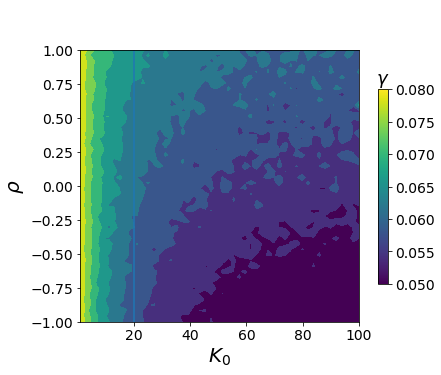

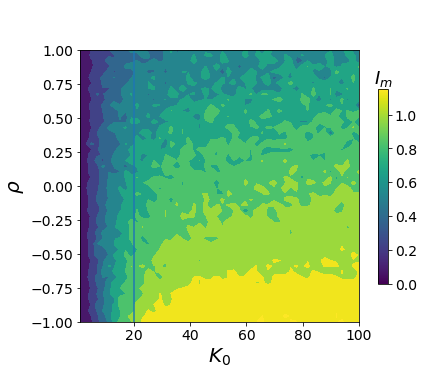

In [46]:
gamma=[[0.07965812912738379, 0.07484877527498023, 0.07136347314541372, 0.06814181722600669, 0.06559401497932953, 0.06430341930453869, 0.06207428098018932, 0.06061920525077077, 0.05926653800101189, 0.05812093880279126, 0.056989113969308204, 0.05620111132528174, 0.05515009441783815, 0.05503809335277301, 0.05421863858237571, 0.05411137173216614, 0.053727687196107654, 0.05285183776688197, 0.05192001269813771, 0.05196831879550895, 0.05168401282469894, 0.05127335677990149, 0.050152288093004586, 0.052349929543223574, 0.05048623302756987, 0.050734019615881365, 0.0496521875290361, 0.0499653628651277, 0.04980038051325902, 0.05008206199265258, 0.04958487829924695, 0.04944646125093576, 0.0488441785275841, 0.049476347936270086, 0.049431074919701654, 0.04834402713092997, 0.04767767108379487, 0.04682585556308835, 0.048542374646221895, 0.04864530826530495, 0.04824146165770054, 0.049100912104786, 0.046049464758213726, 0.04689192461886228, 0.04694670028580274, 0.04688341712436214, 0.046660071071294926, 0.0474546060737688, 0.046686384927576395, 0.04802797423348449], [0.07939827945429218, 0.0742859576850901, 0.07120509943096451, 0.06824793371217626, 0.06538765845820294, 0.0631549790435359, 0.061910537973761594, 0.061308038761489825, 0.05922068571854572, 0.05761075847321087, 0.057574402208254986, 0.0559584193476385, 0.05575786070581529, 0.055328776676722084, 0.05467102242073335, 0.053890528055673945, 0.05328728186786082, 0.052597341201565756, 0.05141839438187292, 0.05178655835379047, 0.051450262278809514, 0.05165741727195306, 0.0516650651768189, 0.05177945647953231, 0.051094410375332314, 0.04994377174928201, 0.050653629116205495, 0.050996319360727176, 0.050445436375238795, 0.04972337424326806, 0.04983396549044894, 0.04932921504295068, 0.04918630746378877, 0.04962618562842705, 0.04902607631237253, 0.04822049974442197, 0.05028261009316477, 0.04758709654243311, 0.04814365288423236, 0.04852075081303597, 0.04805536480288708, 0.049758672529562314, 0.04688690938117438, 0.04799145755058261, 0.04879196310699457, 0.04747842202519139, 0.048146614327959705, 0.04759076572328223, 0.04873308684391986, 0.04795639333125919], [0.07962508524562467, 0.07451790547889925, 0.06932504687103375, 0.06719631711255648, 0.06553174030004644, 0.0641357822411534, 0.06162158514717899, 0.06032843345904764, 0.060251801988742096, 0.05785533671144832, 0.05732234534600075, 0.05585330776130715, 0.05513734101328761, 0.05376202618461211, 0.054613933214016176, 0.05469912851735745, 0.053874088407559, 0.052930501050417224, 0.05313638548823799, 0.05270598408925447, 0.05124554591194684, 0.0520127981893516, 0.05208600161726274, 0.05036267843275931, 0.050905942153374045, 0.05061411325785323, 0.05024487771472197, 0.04996243694780022, 0.049465096449942306, 0.0486914837832719, 0.04866378121466688, 0.04853307078822127, 0.05003763545517445, 0.04925795823041516, 0.04800909184897316, 0.049252958304119104, 0.048834669557947005, 0.04911171497898576, 0.0486198296857906, 0.04824629179379048, 0.04852366521263804, 0.04764154796192886, 0.04860332900422715, 0.04803044494532212, 0.04814745811950145, 0.04822052432679461, 0.04770416902174173, 0.048496350674822025, 0.04682412927488958, 0.04825947305050887], [0.07943952303129821, 0.0746707906184043, 0.07122344166704912, 0.06693029215268527, 0.06494800304885932, 0.06359401524182891, 0.06203668581875606, 0.059840997286334234, 0.05940927190855628, 0.05948258209831253, 0.05768441417443691, 0.05701689181911789, 0.055695427708980394, 0.05632851180998381, 0.05368817016934447, 0.053132881755914615, 0.05403063590852555, 0.05292208048438255, 0.05208901910693073, 0.05249574592233669, 0.052111910030226964, 0.051650612294070176, 0.05125765469306895, 0.05172199782849377, 0.05063784167566977, 0.05134896267094845, 0.05054365069735514, 0.05003274027496001, 0.05027708667266984, 0.05042816360353491, 0.05014452064446223, 0.04878133373065941, 0.048307134116463236, 0.04899938337189514, 0.04969651445974366, 0.04990575999879963, 0.049473227214233216, 0.048640071174701094, 0.04915952814835547, 0.049063467312080736, 0.048004450208403306, 0.047314876919202144, 0.0497752247597935, 0.04913517728670457, 0.04860833657549669, 0.04853338257220881, 0.04800999926994064, 0.04786427733855086, 0.04753820318487227, 0.047505157114435335], [0.07913522663111885, 0.07415644790063343, 0.07128140945772309, 0.06681695474153863, 0.06574158671519931, 0.061511227674082625, 0.06286760868615195, 0.06098581843583265, 0.059509546950045504, 0.05828626223400647, 0.05828519059354962, 0.057432125700644265, 0.05628991298763152, 0.05438261066260957, 0.05540390194178099, 0.05397708920891691, 0.05419305557537864, 0.05380135444413431, 0.053466856547791985, 0.053181250013226905, 0.05290843235326112, 0.0529708904366631, 0.0516543771193648, 0.0507313318439604, 0.050838891846660114, 0.05101436725785364, 0.051049478451209655, 0.050707654697592426, 0.05028503774056457, 0.049260113763362944, 0.04884429121981092, 0.05039352245446668, 0.04946009457768464, 0.05004230858178973, 0.0500038533811027, 0.04985304839111657, 0.04977629106932313, 0.04976558354933536, 0.049468609119880054, 0.04953875588608085, 0.04862230736848847, 0.047482252429553305, 0.04938908968397182, 0.04757140237975558, 0.04958352122039813, 0.04996816524439028, 0.04894006994239461, 0.04895695403168461, 0.04793333265753121, 0.04738950815444651], [0.07935103938114026, 0.07478604188703476, 0.07017187905021158, 0.06842023681081108, 0.06492755561834594, 0.06398974298321664, 0.062100786945020324, 0.062272165606652025, 0.059066336428296236, 0.05906982145765431, 0.05910635475094174, 0.05562511314821708, 0.05698922467712466, 0.054766688867050856, 0.05562526939969997, 0.05438805554587896, 0.052731378196934936, 0.05389678481368112, 0.05400039190821282, 0.05271754412130817, 0.05228033364974286, 0.051740790578801626, 0.0513471118794954, 0.05213267256732047, 0.05096434775233486, 0.052041001711404036, 0.05082266241089903, 0.05068601064285076, 0.048979824429386955, 0.05058314504808483, 0.050191162971851576, 0.05069112926395596, 0.04990408672488737, 0.04976511727977548, 0.048944526684643386, 0.049888865639633996, 0.049675722528347885, 0.04901511894075683, 0.04768145481757276, 0.048485782860218686, 0.049585316238132685, 0.04984159588818951, 0.04772461276986992, 0.04777777184138481, 0.04850350441188268, 0.04864158332995456, 0.04876431532710322, 0.047677144604999104, 0.04906495910502523, 0.04886983243775405], [0.07946401368151033, 0.07478495327506886, 0.07193653124790282, 0.06861056996892112, 0.06588498649680286, 0.06449963471588852, 0.061703435051991655, 0.061412452139720956, 0.05988854321659378, 0.05859259512725852, 0.05769022133310382, 0.05725590094907806, 0.05661590522818887, 0.05566741524039791, 0.05520136553194651, 0.05460340649383286, 0.05442224964921467, 0.054174515206813566, 0.05364222395823109, 0.05364616994533385, 0.05146654837257909, 0.05305410066191026, 0.05226949132644311, 0.05255334034572408, 0.051906505397631135, 0.05072352067205986, 0.05033943449102208, 0.05161705686752513, 0.049851844423672756, 0.051239688672830644, 0.05096960861723472, 0.04981493525419596, 0.04921245376190534, 0.05108401604978074, 0.04937418234674201, 0.04851671429955119, 0.049166284854118364, 0.0496061763589771, 0.049723141192348504, 0.049989874986437276, 0.05041795135229496, 0.05057949288219114, 0.04910961071775977, 0.04761707424845165, 0.048279105487949066, 0.04760520011382011, 0.04931575992533569, 0.04860829958622333, 0.04898398622520023, 0.05000234347476701], [0.0795099078464047, 0.07508534487275974, 0.07158743097756633, 0.06664484162180297, 0.06745675294739831, 0.06372997442896511, 0.06267176775450571, 0.06054249925184114, 0.059958022323479805, 0.05910570486832897, 0.05763718835938799, 0.0570315090649291, 0.056080546894680595, 0.05637193485132401, 0.05543694606526788, 0.05474625933139954, 0.054464295576824084, 0.055157653647757626, 0.05390220156712926, 0.053795023025437094, 0.052989160194748426, 0.05269679142754624, 0.053314365391931746, 0.05207094567645193, 0.050792330491917725, 0.051340884675582225, 0.051340316637163465, 0.050916954562923104, 0.050966938545441584, 0.050892863695288004, 0.0502497484567719, 0.050491822595735925, 0.050784592031569924, 0.049533908543686514, 0.05053527178834671, 0.04930143281995582, 0.049019173524430276, 0.04966202495874516, 0.05082440538311112, 0.04859503541342365, 0.04936818426299774, 0.04964890517069712, 0.04834013429830431, 0.04965130133344785, 0.04945941616957951, 0.04974095281881378, 0.04762466598009464, 0.05004968980369363, 0.05006505747581046, 0.05006825155963208], [0.07876293509167902, 0.07501723228164169, 0.07022876290166784, 0.06805028457370095, 0.06668231489773467, 0.0648325657386363, 0.06260202591742782, 0.06065118870680707, 0.05983437054873059, 0.058473516971691265, 0.05813859580286918, 0.057828243218666656, 0.056212143580334335, 0.05659248463462909, 0.05368482986382425, 0.05450535832439808, 0.05434821467584568, 0.05428874292950554, 0.05269594182355539, 0.05379828172248241, 0.053764617415911556, 0.05197424629847185, 0.05268708630650146, 0.05238698588124616, 0.05303636088097826, 0.05136600150571409, 0.05069653876149948, 0.051539358763585445, 0.05222519856541118, 0.05070123070047553, 0.051931997773511374, 0.05151490781020165, 0.050798043302944976, 0.05078986039006156, 0.051106169838836826, 0.05136581523240547, 0.0501877767797774, 0.04971681575161733, 0.049882575192782844, 0.04934890469254248, 0.048755845055923154, 0.04956862482106799, 0.049214783139391434, 0.04878409178220903, 0.04933631870237463, 0.049510124745044896, 0.04927038525458291, 0.049573830793468734, 0.04838437526496086, 0.048366049608848896], [0.07965606114075541, 0.07449720605659621, 0.0716254170477322, 0.06862597442456991, 0.06586784259458044, 0.06469597251034599, 0.06350694511661022, 0.06082684468114745, 0.060190234427897206, 0.05998016720754251, 0.058958848430597746, 0.056843053627758204, 0.0562253103952991, 0.05627229379400264, 0.055745172307759605, 0.05515349853817518, 0.05515112073929779, 0.053978572868314124, 0.05314286441711863, 0.0534250212062242, 0.05357350599560745, 0.05350140931625397, 0.05294721556888837, 0.05284056427815944, 0.0508739088179588, 0.05224019995731833, 0.052610321131049825, 0.05188458690810765, 0.05177984591087121, 0.05263168827868886, 0.04987359669298938, 0.051147173423818755, 0.05114985142216155, 0.05085812343304147, 0.05156206489705454, 0.05001737035743085, 0.04982904753730605, 0.05025520533382327, 0.050691721063197095, 0.050924355932677925, 0.05017102786560966, 0.048872412264976434, 0.048607782939348664, 0.04974261724122488, 0.05017929163914342, 0.04975465595959436, 0.04838362293294471, 0.04751157368516651, 0.04944198211054567, 0.04989555629640073], [0.07953441243878137, 0.07452752283880958, 0.07165598646362827, 0.06934475183435003, 0.06566890786813685, 0.06371530610332674, 0.06289718250859641, 0.061320121855946826, 0.060672647712344444, 0.06015216574411993, 0.05883409479038128, 0.05666980669315198, 0.05678844243991932, 0.05549968287954577, 0.05520819096748761, 0.054740038636670166, 0.05479607377474854, 0.05458721391366637, 0.05453452959664265, 0.054114916365471145, 0.05284070009556847, 0.05415418244143729, 0.051697445264090244, 0.05194164655986023, 0.053296630014407896, 0.05136141425353457, 0.05173000102173361, 0.05212779860860971, 0.050880740455192495, 0.05011689754580652, 0.053137341166705675, 0.0528258306926337, 0.05101565691695537, 0.05170411878297283, 0.051265964511636536, 0.050503597109411213, 0.05094376547842494, 0.05000499076581354, 0.05030695050777885, 0.05021579907531378, 0.050664635390072064, 0.0522433708853435, 0.05038455937123373, 0.04917873411436101, 0.04870385355528162, 0.049131283944030026, 0.048331264887401394, 0.049431299648440875, 0.0495758666577437, 0.05039969858961528], [0.07962066295340689, 0.07572721185919712, 0.0720669020985792, 0.06920068938813848, 0.0650881981071316, 0.06405285572199662, 0.062316316773927086, 0.061112677407755625, 0.059533416739746076, 0.059301613331575694, 0.05968549835687738, 0.05766220558365348, 0.05727689730973178, 0.056810097591263375, 0.05585755285188332, 0.05569498419694554, 0.0560951875974141, 0.05414756382284152, 0.05397535761614709, 0.05530516208719982, 0.05341968548834285, 0.05245592082794749, 0.05379878346143823, 0.05317345638016241, 0.05169986284869401, 0.052806110731698476, 0.051473377976156316, 0.052475689404496206, 0.05078566945185546, 0.051550828061373156, 0.051609584133062374, 0.050923383010327734, 0.051848899883480994, 0.049659690227108144, 0.050166940120641955, 0.05120100960998136, 0.05014370346974322, 0.05125068714460115, 0.05071078476024197, 0.05190218499039637, 0.051093205030178446, 0.05166019653763728, 0.04921197225437128, 0.051037395587481396, 0.04902519220372694, 0.051958243089524354, 0.04747570043093639, 0.051012403529753336, 0.048554934969773964, 0.04973761901505885], [0.07950481821919338, 0.07485876110611327, 0.07169410284743181, 0.06847676202661607, 0.06469823809122914, 0.06375514625393197, 0.06285569986796657, 0.06091659889110512, 0.06206572872776328, 0.05788472866970997, 0.05769974121263461, 0.05691831382572672, 0.057115307080555795, 0.05710670577356705, 0.05561064957123939, 0.05598259292891985, 0.05571061668228823, 0.05583370317081603, 0.05508003470747884, 0.05328475298922041, 0.05212332343333775, 0.05458265089256832, 0.05304827109297459, 0.05300337448856725, 0.05234908248228078, 0.052579711252571264, 0.05273933756589501, 0.05179512229181778, 0.05270221808962423, 0.052606312492932863, 0.053652040395440546, 0.051831742852858236, 0.050789721336062, 0.05235600390537343, 0.051838191596649735, 0.05229079112560827, 0.05222699819644012, 0.050717908724407616, 0.05109272192149814, 0.05047966433060644, 0.04986503351583887, 0.05070559922815401, 0.05273668248602777, 0.04917223519308458, 0.04961243089894812, 0.050910280086574056, 0.05072333141225789, 0.050139522622210685, 0.05017122745566557, 0.05074330550090905], [0.07964743620350584, 0.07371181238416873, 0.07182762972918744, 0.06961223511900604, 0.0660924701368351, 0.06585929908682203, 0.061882849638515904, 0.06236020932389781, 0.06097038628738683, 0.05909351528043307, 0.05780950420339109, 0.057391129366802504, 0.05692787459254078, 0.054847870692445, 0.057040678224388616, 0.05564404387061106, 0.055036012042066366, 0.055893541961766956, 0.05405147850695304, 0.054051429878203834, 0.053293918239614345, 0.05406555988822878, 0.05477732869904849, 0.05283590080403987, 0.05326604886427452, 0.053655158069549895, 0.05193420991582484, 0.052655913857822444, 0.05382132459426717, 0.05242650336264603, 0.05181293845197732, 0.05285347467674477, 0.05145609518652806, 0.051939139071972125, 0.050275679589045844, 0.05303925030041091, 0.053622972136095515, 0.052304563150074306, 0.04947041983744201, 0.052159676522762544, 0.05132100065269234, 0.04918458276571154, 0.05071649254486571, 0.050971951470660186, 0.0501889266156174, 0.05007659706440896, 0.051200465088337116, 0.05013151671248969, 0.051955370881976284, 0.05087037494425602], [0.07904847456100285, 0.07476354476370309, 0.07208757506938457, 0.06827540246347656, 0.06623078484632415, 0.06564080528895155, 0.06310655301811387, 0.061032741345797906, 0.06096331643365706, 0.05879005800010947, 0.06010474546625218, 0.057008242560766975, 0.05667891019854217, 0.05753740695586025, 0.05686608143030287, 0.057643392518637385, 0.05670772114557432, 0.05573246340172032, 0.05526139352971979, 0.05489198354154397, 0.0544354005323897, 0.054013146435112284, 0.053439459060334205, 0.055858164329475636, 0.05157994531449209, 0.05281574935596734, 0.05213082218939693, 0.05212391735289105, 0.05247728729872281, 0.0527243295662597, 0.051657715499526996, 0.05363213660841872, 0.05168302935815119, 0.049662254039666315, 0.05187666876280419, 0.05051469128283736, 0.051212834413644284, 0.05226748347886227, 0.05415538401476085, 0.050749027806099925, 0.05136814599026383, 0.051379784588436755, 0.051630468549611334, 0.052093483006093386, 0.05056959524252041, 0.050886368506194816, 0.050844233690371075, 0.0500504307547853, 0.050651393451710255, 0.0498696292526063], [0.07969369141627343, 0.07453114738229795, 0.07212253572919343, 0.06945318956423066, 0.06381512876089697, 0.0636764656782136, 0.06380090160597235, 0.06339131819200114, 0.06167464249782635, 0.05998578011806635, 0.059173038785284335, 0.058993033671823236, 0.058382087939703224, 0.05638240555670282, 0.055925871479258794, 0.05605479807989833, 0.05629664775541162, 0.05512271599661119, 0.055167892801548546, 0.05388195765994465, 0.05533118446244023, 0.05561723680049644, 0.05383056121775146, 0.05218739202813597, 0.05306445047430298, 0.05324798414967598, 0.05329252340444611, 0.05326249035085031, 0.05215030800040761, 0.05108795309065513, 0.053163239242960236, 0.051591265370494695, 0.051363499109694656, 0.0520636034633057, 0.0526965784121212, 0.05144269714176376, 0.05214346729869597, 0.051547013688627685, 0.05104154359900612, 0.05134343856473759, 0.051566165842220055, 0.051482906681445215, 0.050384600748983294, 0.05111784273870833, 0.05165023484489388, 0.052702649533964765, 0.05092341758174616, 0.04939679784737707, 0.05446936223923896, 0.05200239073507433], [0.07973853811214174, 0.07505943305024293, 0.07208397893719508, 0.0688692476472386, 0.06682991445374342, 0.06555151970824272, 0.06324543026388431, 0.06272067155123749, 0.06074622239341107, 0.058511360575200205, 0.05884403962627419, 0.05828354277388492, 0.05900459106658865, 0.05788928328415216, 0.057664916512730015, 0.05610344378659995, 0.05618882326872488, 0.055800294764700595, 0.05492009232550799, 0.0546875187078991, 0.05562209166392074, 0.053468709895214656, 0.053891965032181084, 0.054504403454610384, 0.0530318837000391, 0.052472093519570565, 0.053464535655520305, 0.0537082259464273, 0.05257519128200607, 0.052372372943632846, 0.05180694637408539, 0.0516111424864174, 0.05276708760329196, 0.052006747336326174, 0.05283142224307235, 0.05248035510605601, 0.05514186012428077, 0.05145190567240275, 0.05141183121070385, 0.05334729860527682, 0.05280348343256106, 0.054053737395574626, 0.05046387309035905, 0.050059314095153726, 0.05045857999742283, 0.05065675921229059, 0.05155102023410068, 0.05087440638186262, 0.05199714150292383, 0.05214327155692011], [0.07989580255952028, 0.07489800399965021, 0.07160708447879849, 0.06946430095584456, 0.06756794650306704, 0.06288498546797647, 0.06490098514695573, 0.06312549752505116, 0.06085960491384294, 0.06043104434930507, 0.059635042842449935, 0.05872418739270078, 0.05850253696709573, 0.05705528396009215, 0.05683230648980116, 0.05664138134714734, 0.055954701770596325, 0.05637344025938803, 0.05465793558975445, 0.055329968145294894, 0.05501389598060639, 0.05632055241073841, 0.054064119075397925, 0.05468978935352164, 0.05549340553795046, 0.05317423436838142, 0.05360427627177981, 0.05287542747694882, 0.053302362696850035, 0.053681877336861375, 0.05332722065888484, 0.0512250914364476, 0.05240103285046841, 0.05238610987515573, 0.052251671361617874, 0.05196581576997769, 0.05117816202929735, 0.05159642944234533, 0.05334331790535445, 0.05283449919633709, 0.051106745244270425, 0.05199013746475732, 0.05291114168259767, 0.05152254808631118, 0.052286216211852435, 0.050494813217678736, 0.051199755706169796, 0.04967924447428124, 0.052547997127938485, 0.05325585516092653], [0.07969657588197926, 0.07569186254526247, 0.07279635947914569, 0.06873248664690575, 0.06643753522346159, 0.06539245401780079, 0.06412663005359495, 0.06289641416057848, 0.06027506897264982, 0.0601651346424853, 0.05950738446233623, 0.059217781698701046, 0.058653530511984346, 0.057298676302995295, 0.05768137277083974, 0.056195763508314615, 0.05566864286165057, 0.05539244319757274, 0.05607352934003359, 0.0561814996901216, 0.05495235447441949, 0.05407846134398474, 0.054363467158309496, 0.053767543113997646, 0.05433458309677608, 0.05475825457936102, 0.05430010497425334, 0.055315084487530024, 0.054910633493734776, 0.053003270075015756, 0.05342833286846104, 0.05440449861642236, 0.05391976640344165, 0.052711706060298014, 0.052402144837109144, 0.05194905865750915, 0.05140514695201877, 0.053895839755428616, 0.052604614990991866, 0.05470958929284013, 0.05314595805211437, 0.0518925476519373, 0.05260258080579336, 0.05372511687467691, 0.05265688688107641, 0.052907865246704135, 0.053666618743570156, 0.05325940100667315, 0.052579923575447836, 0.05030711479741413], [0.07959196046443302, 0.07505478058515286, 0.07192184048468084, 0.06803285925432963, 0.06687584649430861, 0.06504932731694284, 0.0641611160903208, 0.06336139420533556, 0.061314927775764104, 0.05997528445745374, 0.05995022641829811, 0.058058424172428146, 0.058458737085560104, 0.056545074505813926, 0.05885552481982209, 0.05765077012326773, 0.05627370682239995, 0.057133036455328384, 0.056485984681069315, 0.05452630553094781, 0.055058641218176385, 0.0543463217956088, 0.05567139212269706, 0.05408926314159086, 0.05471881466236606, 0.053492471009863526, 0.053368492016949286, 0.05358486234988374, 0.05317139598272246, 0.053857413521832286, 0.051829514263978624, 0.05481870258582999, 0.0531549876322586, 0.05222448087148846, 0.052139691320184735, 0.05416200584982096, 0.0553902244696467, 0.05500190391562414, 0.0528243985677935, 0.052821343121548354, 0.05286670978322506, 0.05290467659132176, 0.05370039563179442, 0.05189193651549034, 0.04998847286606117, 0.051348474444015725, 0.050857815551519914, 0.05264645305472856, 0.05225169338843268, 0.05184423485157391], [0.07946288778801754, 0.07517986252641196, 0.07122286671059654, 0.07011824309920811, 0.06739709583693503, 0.0654568363315955, 0.06420999609338535, 0.061584317512597714, 0.06217952133974748, 0.06071817784801473, 0.06040004920761641, 0.05858260258872847, 0.059025388427996414, 0.058247254081522766, 0.058394668218134285, 0.05795059466012338, 0.05769207121091225, 0.056219270677387356, 0.055384025858518336, 0.05651978082969913, 0.05610078426652916, 0.05496332522934256, 0.05574695466796075, 0.0560434289376822, 0.0548884274822952, 0.055024120227638376, 0.05462970698863271, 0.054330769234631954, 0.052934105651503575, 0.05455112266992102, 0.053263860399244294, 0.05530345162874716, 0.05408144175997963, 0.052262741183928804, 0.05333248621934926, 0.05293417308735828, 0.052772740755084105, 0.05307647312307681, 0.05224517768451763, 0.0534239884165565, 0.05205553323002808, 0.05104420230013242, 0.0512766920428954, 0.055139714514846755, 0.05239858412612688, 0.05174739016671663, 0.05181806448427257, 0.05195530053049139, 0.054642234035628595, 0.04947780352848443], [0.07877694597855671, 0.07413421958587821, 0.0718628137818929, 0.06899430303140083, 0.06737736312645445, 0.06352944142775072, 0.06387435177180682, 0.06285799961771804, 0.061869129510168534, 0.060691913465887745, 0.06047997805508274, 0.05923322933277845, 0.058471069035144235, 0.058165152088351074, 0.05899352807201073, 0.05895944612323538, 0.05752517953115019, 0.057519183121469794, 0.05575780456280184, 0.055740265888703684, 0.05602420295279387, 0.05658432503344337, 0.05674393996876819, 0.05502770667062621, 0.055649307813679806, 0.05474122168909018, 0.0542327911867503, 0.05486658105195641, 0.05293105171033954, 0.05448957317971861, 0.05255769594980818, 0.057633216477354116, 0.056395876018526726, 0.05293442489986051, 0.053442601247809564, 0.05411840204712617, 0.053057467969336275, 0.05245559132512588, 0.05239218621137779, 0.052553627471320724, 0.05317401316508415, 0.05468085133270086, 0.055950734595090784, 0.05367693192895227, 0.052073172848124454, 0.05378967629451584, 0.0511082695633543, 0.05418448328207801, 0.051238950402335316, 0.05225610299141559], [0.07976069900353946, 0.07531886048055864, 0.0715325532125641, 0.06985902667947233, 0.06748770580511089, 0.06580550275704247, 0.06321417772015474, 0.062729322556057, 0.06360638523838577, 0.06158219311427016, 0.0613188089242474, 0.05984563265164381, 0.05941095856377171, 0.05790686833081355, 0.05755399572315138, 0.05805701730508809, 0.05643020696800224, 0.05774358007311294, 0.05600484733074437, 0.05644605705869564, 0.05539575024678913, 0.05643649560244264, 0.05622791589450979, 0.053847822061937944, 0.05523504059644251, 0.055358327678374945, 0.053013704582991795, 0.05654658619117081, 0.053723204208622366, 0.05578516532308184, 0.054339203887133154, 0.05574302534649194, 0.0530652954150951, 0.05282700964903596, 0.05453144000856237, 0.05236806215718011, 0.052985474285248045, 0.05413268592132149, 0.05356984557618555, 0.05248030374826792, 0.05201074064091405, 0.052018511907914046, 0.052683827282062536, 0.0517927280078334, 0.052887699762378164, 0.05276194021049728, 0.052432896148701745, 0.05337889808580705, 0.053650137918223, 0.05249268776989372], [0.07974181141681427, 0.0748902944746188, 0.07128055531037426, 0.07018430103327025, 0.06757931408048616, 0.06698456652459393, 0.06521445515758549, 0.06405581888984506, 0.06241233353848797, 0.06065156723314326, 0.06035505400329306, 0.06019414157738139, 0.05922964242973008, 0.0581199225115093, 0.05770615078602417, 0.0573731337100761, 0.05859517061365021, 0.056389041603553854, 0.05786490720085584, 0.05631115323403659, 0.056188677045359584, 0.05672670163811851, 0.056824493036262975, 0.05541841541726915, 0.05433628373967159, 0.05576691596953969, 0.05521574047663376, 0.054600963076113895, 0.0546737883637768, 0.05308380782399097, 0.05617726408383203, 0.0545724522935365, 0.05476337366869309, 0.05469532065983545, 0.05229490743168316, 0.05321729130559702, 0.05472412745915461, 0.05516124210979867, 0.0542445946737285, 0.05352718122202961, 0.05339132118573851, 0.0535939035147626, 0.05350167323712518, 0.053579128033260294, 0.053750494596784854, 0.05544162187571253, 0.05217163371758161, 0.05278415524323494, 0.054841445138191246, 0.05356129926477185], [0.07985442409065703, 0.07362253331667701, 0.07183546129789169, 0.07038757609051523, 0.06702005817913385, 0.06605374549228607, 0.06515849532536928, 0.06398929137513315, 0.06228867444720258, 0.06162933405297385, 0.06023305952777442, 0.06068513046298076, 0.05920806532187873, 0.05906762753829502, 0.05811363791580756, 0.057296768319075285, 0.05740540293061467, 0.05824354217155325, 0.05704788062892762, 0.05773368578765967, 0.05621177408970764, 0.056215436020196005, 0.05400942736611104, 0.056660381595495635, 0.05483015471159303, 0.05648037627352968, 0.05768371915502778, 0.05441826986199158, 0.055882383998996116, 0.05648063429565634, 0.05388209246843778, 0.054815552238467666, 0.054842023358197114, 0.05387061526549034, 0.05383460647568225, 0.05529325128682539, 0.05361719976058251, 0.05438181860177719, 0.055942119125574855, 0.05306079135972709, 0.05495569116273107, 0.05523796663479229, 0.051738298532893794, 0.05140979897966872, 0.057020566474462506, 0.05772379624026758, 0.05394547902092242, 0.053801395487859366, 0.05184186247468045, 0.05595690441716304], [0.07965619164515879, 0.07542170241150244, 0.07081513947927393, 0.06929700494265323, 0.06779366404097706, 0.06601208184044671, 0.06417430777309949, 0.06336812285732953, 0.06204063759690342, 0.061713519204711374, 0.061358260469082763, 0.05981090186087381, 0.06008536431089052, 0.059510370493441045, 0.05756494872677452, 0.0593278448818435, 0.05869680257741431, 0.05824333840557965, 0.056814309982692726, 0.05585242691741626, 0.05751701092432435, 0.058596120952835354, 0.056470433987706244, 0.05644515773515906, 0.05465985825841864, 0.05650481013054367, 0.05690056405587307, 0.055350656243110884, 0.05592082245182816, 0.05584974219727401, 0.0569727252341089, 0.055860384984805826, 0.054743727899653316, 0.05315475524333269, 0.055537816805161774, 0.056787334227341175, 0.055203970556985234, 0.054855516094844264, 0.05314136346130682, 0.053724958188379655, 0.0566024926352513, 0.054354818663129134, 0.05302583580108574, 0.05472795855764808, 0.05438917396451471, 0.056082289570548415, 0.0534614639748215, 0.05237854872455249, 0.05418348073406055, 0.05280207115710924], [0.07971939542460242, 0.07485524371137403, 0.07255608681151365, 0.06850439949593733, 0.06767686717643595, 0.06646490701483411, 0.06355506352034432, 0.06450723411441148, 0.0630386090862762, 0.06082217354860907, 0.06000550331238061, 0.05972657667083126, 0.05850362299099758, 0.059510422481891735, 0.058259435837661785, 0.058381857879042764, 0.05794258668519788, 0.05749120205965462, 0.05879497686467878, 0.05836601610716257, 0.05701741544277452, 0.05799412755841155, 0.05681830260656643, 0.05584245747289021, 0.05489759314769921, 0.05611694108431475, 0.054598498223899894, 0.0553713729803318, 0.05399656557674241, 0.05576893125540445, 0.054347728369020055, 0.055069190105509196, 0.05557678493755509, 0.05706082572180018, 0.05591813160469151, 0.057337071012745565, 0.05475388874134564, 0.055488704375789316, 0.05515332800944579, 0.05883381099562408, 0.05347810313273489, 0.054417660243774646, 0.05245753562032292, 0.05299361342907372, 0.054954416757631186, 0.056350620728847674, 0.05305105302018667, 0.055359599240848115, 0.053757350982972824, 0.051469619558292865], [0.0791843200766099, 0.07581221621345391, 0.0720861640526305, 0.07000979525444014, 0.068282383920767, 0.06579684485535676, 0.06482792365815195, 0.06304015983765081, 0.06166931550251113, 0.061264412516148496, 0.05982949772913948, 0.060677675778578924, 0.05978699198177692, 0.05877075151166242, 0.05881975753357008, 0.058044054396303814, 0.05822299192650542, 0.05878122039409279, 0.057271673687219575, 0.05777426532387851, 0.05721066040409053, 0.057138807658634806, 0.0559418473947757, 0.056596398633507634, 0.05581175857376034, 0.05506837482551786, 0.05675005753598558, 0.05611739843828693, 0.053055653135512255, 0.0543654333186465, 0.05527546269307315, 0.055197270079211984, 0.05528495752102425, 0.055927416999428575, 0.056758238218466046, 0.053661220706269226, 0.05602811463933871, 0.05579947255139054, 0.05301143663757933, 0.053553343302381914, 0.054881049706327095, 0.05408758247582689, 0.05372566436188058, 0.053118670995156235, 0.0550460558528511, 0.052247876300138184, 0.054856795849750006, 0.0551171090640216, 0.05444606528907637, 0.053521636573519896], [0.0796557932607358, 0.07539078126932285, 0.07222661553899533, 0.07025111567024425, 0.06697741138051559, 0.06722312119828038, 0.06403870523298978, 0.06329833556843038, 0.06038119821009845, 0.06278258780251356, 0.06085334051220501, 0.060678108729265635, 0.05989968619390588, 0.05988143584760494, 0.06049497570405284, 0.059346483908177795, 0.05943492430513227, 0.057611997177320726, 0.05935091399486505, 0.05733422984238903, 0.05522807349083321, 0.05584835490826771, 0.05745196260960238, 0.05677226382846226, 0.05697785753637411, 0.05710609003448853, 0.05687539085923343, 0.05591182083125919, 0.054297713384991744, 0.058161474247372856, 0.0557306241733377, 0.056978665511110534, 0.05509094979975788, 0.05740480601552776, 0.05410132613428394, 0.057135543775892784, 0.0545389462948371, 0.05491684808327336, 0.056184535869885296, 0.05502926439086593, 0.054634452442004725, 0.05569119884629271, 0.05599427781756357, 0.05755288512306231, 0.05583740581831974, 0.053624184813062414, 0.05517067787015428, 0.055460740075304445, 0.052011329057055786, 0.05572911615411336], [0.07959536312675922, 0.0748469289999546, 0.07212993645207592, 0.06964310173808828, 0.06638375403700385, 0.06582254620778591, 0.0627524841189266, 0.06405019393290316, 0.0633639955731297, 0.06222619496369208, 0.06153873182558551, 0.06109209892340519, 0.05953246120491085, 0.0603580489315798, 0.05958224070107188, 0.058329536710372186, 0.059232741696674036, 0.057812264757245345, 0.06063101047702558, 0.05763382722360712, 0.05612145326088991, 0.056230863768138496, 0.05602081829272505, 0.05803863548284916, 0.057713075878779954, 0.057566627138349515, 0.05757381159669273, 0.05399772812529367, 0.05516552226543189, 0.05477467403701857, 0.05584566794601352, 0.056586554486040413, 0.056267999173253154, 0.054893062602350086, 0.05505351403065241, 0.056107761613084596, 0.05549956728998384, 0.05442120785424051, 0.05412392145696598, 0.055132434344404485, 0.055183714239223275, 0.05476593475744747, 0.055141073213622604, 0.05524631267477534, 0.0551344268257635, 0.05358277150383099, 0.05553110623945663, 0.05596022284299844, 0.05775815633345497, 0.05675011466563163], [0.07948250888811254, 0.0754880544181146, 0.07099573979689658, 0.0698559754072082, 0.0672331305857994, 0.06613887147350768, 0.06583923801575513, 0.0643106955115954, 0.06298649113469776, 0.060857846589502364, 0.061824216554219574, 0.06070797666530559, 0.06133118790139206, 0.0605893337824619, 0.05840631382750838, 0.06050855775070801, 0.059116763558464805, 0.0586640595428999, 0.05756408605161784, 0.057396585509391, 0.058318371591618866, 0.056145166409805186, 0.058342267784801116, 0.057595966811870625, 0.056723837332135894, 0.05713029286682675, 0.056495134276638805, 0.05877951888026597, 0.05580702884345619, 0.0562551871277946, 0.055019733016363224, 0.05455626279088845, 0.05651610588798103, 0.05683651158087503, 0.056979172108473274, 0.05579264956017466, 0.05495846709700202, 0.05545558707264898, 0.05655574348286844, 0.056720322105194586, 0.0549131138068333, 0.054275785758146816, 0.05710369470959876, 0.05359654036969233, 0.0545006788732183, 0.055354054198308876, 0.05852252197951418, 0.05731156034441007, 0.05642571074686233, 0.053574467338051816], [0.07984002840855378, 0.07603631073574298, 0.07294131138701472, 0.07014442677471885, 0.06860897820220405, 0.0647425146971672, 0.06475481729978393, 0.06474536735923947, 0.06330741441456808, 0.061654417948241634, 0.06123850752724503, 0.060633379346679485, 0.0615346326458869, 0.059984270125070946, 0.05914154326503317, 0.05922469664088732, 0.05911269866600222, 0.05884349813756399, 0.05894047749343371, 0.0587646369238668, 0.05863485375086449, 0.0583606619559798, 0.05757370456561261, 0.05698433356260718, 0.05569168560960871, 0.05653189823373492, 0.05713352324623822, 0.05849744335956142, 0.057836636709049545, 0.056893510548618347, 0.05566364805000358, 0.06012557277530825, 0.055964714798553444, 0.05885530596254685, 0.05849457516138389, 0.05607603076030831, 0.05660722981144233, 0.05434531344453704, 0.056030654101637135, 0.05429923450921334, 0.05431538224602494, 0.054748877005911634, 0.05496658412087918, 0.05359713259998085, 0.05539861781120327, 0.05363202915772554, 0.05484563978465452, 0.055615635790434395, 0.05550304254837677, 0.055039057596689374], [0.07937330985674913, 0.07403763449076045, 0.07104732018695431, 0.07002041280850248, 0.06755289985097251, 0.06560830064838015, 0.06507268103275418, 0.06448840083303924, 0.06321929175315157, 0.06317014904361168, 0.06094447943172301, 0.06188048743111007, 0.06069660041402768, 0.0607925851217217, 0.05828801803545879, 0.06168398958139416, 0.05881073036213547, 0.05911445548756028, 0.058835272565916114, 0.057871815988851834, 0.057956862308504394, 0.05841648059352231, 0.05763633043584233, 0.05795178457389191, 0.0571044764684441, 0.057260874538737766, 0.05679469592979979, 0.05708329522538328, 0.05873038461992469, 0.056415450749626235, 0.05810242573028588, 0.055836007095488804, 0.05613378244425797, 0.05624494932470849, 0.056326394894834646, 0.055510723406622844, 0.05631141814482597, 0.05569680598361612, 0.05771759467463161, 0.05731919587916011, 0.05765503585449852, 0.054882806191018485, 0.052836215125215365, 0.05946927913337441, 0.05629180419971924, 0.05293554150550413, 0.05596765033683597, 0.05431687562062484, 0.05452544230165246, 0.055823736344321785], [0.07967082930249998, 0.07552937092294958, 0.07204710526104251, 0.0682389855109426, 0.06761530639343027, 0.06726932316080918, 0.06574015842155193, 0.0644478485992604, 0.06293264227133562, 0.06237145206504484, 0.06322969791479398, 0.061927881442749265, 0.06166407813663798, 0.060468107201080125, 0.05989263436055033, 0.0594949950046093, 0.06001848400494593, 0.058787486601934884, 0.05899093542552907, 0.05826628878140198, 0.05616427864999835, 0.05798704432054222, 0.05718611318927055, 0.057731298923219175, 0.05702333160547645, 0.057567798934513636, 0.05633019815632852, 0.05886481209469116, 0.056915926530061375, 0.05584105414092161, 0.05873992751109569, 0.05625650520283561, 0.05341796708958746, 0.05375337505057556, 0.058062050300259065, 0.054534873324745006, 0.055277531866243734, 0.05638843303854435, 0.05646457258863049, 0.055560548698474654, 0.05862477035470267, 0.05478874897052136, 0.05497849291167538, 0.05730432321159896, 0.0575448276583399, 0.05522568707201226, 0.05777996033801551, 0.057710277768187615, 0.05463903847495013, 0.05548952091346755], [0.07955117909228414, 0.07533161328378234, 0.07290731842533033, 0.07012112547077899, 0.06844757146707245, 0.06682291836573041, 0.06593319736556283, 0.06546171755944029, 0.06222059711755054, 0.06288709190975371, 0.0622570037493122, 0.06167007865844431, 0.06033019560845415, 0.06043545954400169, 0.05874861408135165, 0.060928043771752975, 0.06124321326367396, 0.057598272639453184, 0.06060623779991226, 0.05902814057708224, 0.058868800169983374, 0.058133533182288054, 0.059964258481082625, 0.05711596349574997, 0.05880616121936118, 0.05605059776166728, 0.05780323797000658, 0.05815242742007899, 0.05498373388919944, 0.056349342388180325, 0.054479125905418674, 0.05587917429738656, 0.05761728866095503, 0.0551467380677833, 0.05709269851364066, 0.05552966249549671, 0.055282236379033865, 0.05614248421087068, 0.056872992472241965, 0.05741879294061484, 0.05757640825591733, 0.056633205837094976, 0.057621312526233086, 0.0577357077702934, 0.056347256355226936, 0.055211789520092064, 0.057350459869675574, 0.057302622868281604, 0.055742980960227895, 0.058238937557570154], [0.07947935365821994, 0.07584667838424164, 0.0723478759915829, 0.07048957193724628, 0.06803534769535509, 0.06569737313186756, 0.06402273381602439, 0.06414547969045056, 0.06284181289564972, 0.0635731936926579, 0.06145797745883427, 0.05988020806055344, 0.06025602885927553, 0.06086123258990447, 0.060279300398858045, 0.060643142919713906, 0.06007619184391607, 0.059064215020795986, 0.06006021898547743, 0.05826781435239901, 0.05938324101514686, 0.05801070914088614, 0.05692155737574549, 0.057201921721741884, 0.0574747592662656, 0.05790624535346701, 0.05731718445279222, 0.0575392666834026, 0.05546784625903126, 0.05706740128042078, 0.05922491560290216, 0.05758504120227064, 0.058064346331438275, 0.056777463357240265, 0.056970351023613926, 0.057836860719583466, 0.05775972526775071, 0.05671897645365822, 0.05553481194890274, 0.058242072385162304, 0.056137438383556414, 0.054513911095792816, 0.05774744948717373, 0.05524150504233215, 0.0564754499179995, 0.05372716105915941, 0.056397129328312395, 0.05965118401529394, 0.055623006168801475, 0.054813848086505565], [0.07993667753541044, 0.07602552929998012, 0.07231905473154253, 0.07036173598464872, 0.06869245161490137, 0.06553876711460709, 0.06512631850561147, 0.06432239795942238, 0.063983336122825, 0.06368574945054452, 0.06124584800868938, 0.060882437881525864, 0.06097118467842459, 0.060695232584541785, 0.0598420470792665, 0.06089411883215276, 0.05973644154589064, 0.05888363706531849, 0.06174789382207069, 0.05822907327320467, 0.058050780460162196, 0.05929639460959262, 0.05851732725604175, 0.05867486832792124, 0.05692673368599221, 0.05676108271327387, 0.05677543199320225, 0.05703030011750423, 0.05957862651024859, 0.05774047775345076, 0.05807548172449785, 0.05798434065391502, 0.05658361470147616, 0.05473479363728392, 0.05553344781482952, 0.05686304082928131, 0.05493305696876949, 0.057933176665320774, 0.05726833248213472, 0.053474371160757095, 0.056732946446478555, 0.05879962669505144, 0.05789800506081577, 0.0553766278251748, 0.055116556247946445, 0.059834607510720846, 0.05852598625358912, 0.05795247266340207, 0.05376481578433967, 0.05556984654516344], [0.07980473900435808, 0.07584554963662563, 0.07288780145059003, 0.07036759418704162, 0.06786147005969646, 0.06810692725710248, 0.06654672508791437, 0.06510103284149554, 0.06435858383590615, 0.06284521806967155, 0.061958045771666415, 0.06134899611859836, 0.061280090411910515, 0.061236643789682556, 0.061294574242731374, 0.061958786334029715, 0.059883083100552514, 0.058863190282187755, 0.06090155335681334, 0.060664968456677536, 0.05794062858075516, 0.05924388106202489, 0.05881916335528078, 0.058100463203063266, 0.05880085411135846, 0.059621566415286716, 0.05807992473676217, 0.057155653964824096, 0.05680142009567527, 0.05922832225341851, 0.060806042738475015, 0.056735084618360604, 0.05913882654102489, 0.058215593944494444, 0.05718819703676958, 0.05633138828067352, 0.05691261847046955, 0.056853976506466626, 0.06024452453442055, 0.0586139429808521, 0.056291501823479966, 0.05622550849960697, 0.0576295663174146, 0.05809888117213197, 0.05540136182260848, 0.05862636235551829, 0.05741879883724552, 0.0577511058292214, 0.05920864303114306, 0.057204543061955056], [0.07970823043464167, 0.0760900903263058, 0.07207251685216597, 0.07043342234491774, 0.06848439469372639, 0.06597848162096143, 0.0670939188230856, 0.06509549242224504, 0.0626620260030166, 0.06368317959588257, 0.06329121650233244, 0.061481927042666674, 0.05995057943564326, 0.06160960668622058, 0.06037517022894344, 0.06141911483280333, 0.06162299199744006, 0.062090809841393875, 0.05968274442688246, 0.060201924596385875, 0.05926413630301629, 0.06196424733147364, 0.05989891434299923, 0.05919424405972668, 0.059559452488486486, 0.059072953791558316, 0.05798814527672163, 0.05893511467456335, 0.0566341809140157, 0.05885197595667779, 0.058634816154178815, 0.055459945750069926, 0.05793446166369735, 0.05504306966790898, 0.05754003253291627, 0.059257464455106795, 0.055775710107926785, 0.05766601961272466, 0.05789975800833192, 0.05787060089221819, 0.05944850497089425, 0.05789187388111005, 0.056586579389458214, 0.05862341111204955, 0.056184187755678607, 0.05774511809237923, 0.05648202929898762, 0.05590199681174464, 0.054608939088689364, 0.05511308361350328], [0.07950364223448492, 0.07564489738426365, 0.07174031188547363, 0.07063830245163169, 0.06871562636132876, 0.06671518337254857, 0.06544531472440138, 0.064784425509996, 0.06336409732503276, 0.0636770568516519, 0.06323761885777589, 0.06232158082780015, 0.06383281248863468, 0.06268747347482574, 0.0608165600344858, 0.06136562635249278, 0.05958490557853764, 0.05983463062648789, 0.06026370560907068, 0.06007010707661739, 0.0608788110260045, 0.06097366575845354, 0.05940562419406439, 0.05709888384738204, 0.05811250950537792, 0.05849451993249197, 0.05920826159746438, 0.060114239775142214, 0.061110908385092366, 0.06287406599305784, 0.057101822513455316, 0.05863507254844744, 0.05805318516976846, 0.055470229515475575, 0.06020359890626471, 0.05637748480059306, 0.05550779343264168, 0.05581968911551694, 0.06011176674154355, 0.05740931865943655, 0.05589741427030112, 0.05647043309925949, 0.05697932994093052, 0.0563273562614889, 0.05705873052490982, 0.057227091224347375, 0.05688292052963226, 0.05804890402496458, 0.05648599339533683, 0.06555669707436215], [0.07961326149109516, 0.0756605585193795, 0.07262900169039521, 0.0706542814125359, 0.06903014654143767, 0.06612077296452928, 0.06725697249633736, 0.06582440639291051, 0.06405591321429252, 0.06398906397558396, 0.0627241886812603, 0.06201748622633501, 0.06143136841155928, 0.0604755550950041, 0.06223588436323617, 0.06167986108033454, 0.05975782704411545, 0.06246830563156678, 0.059430379989270796, 0.06145258163273213, 0.05984955305291331, 0.05838641425176462, 0.05888582325054017, 0.05739041660792992, 0.058838063601872735, 0.05843300672087659, 0.05902463722813092, 0.05779877822500043, 0.060015832904043095, 0.05687821287755893, 0.05848605662615876, 0.06031810018018521, 0.05793179687197661, 0.05871332135382115, 0.058766124374136246, 0.05694387826965348, 0.056518738289415955, 0.058856099604983794, 0.05723396594691153, 0.05805202857059365, 0.058523609655384556, 0.05601497403897504, 0.061830621558726304, 0.059007566595682716, 0.05638051056482816, 0.057392081278121454, 0.057396193863850815, 0.059951990022090264, 0.05799201545459739, 0.05642635649970444], [0.07968697866937959, 0.07621135456795862, 0.07289756946292546, 0.06949032081899663, 0.06962075961585079, 0.06659382177073195, 0.06512719115263214, 0.06521901295352707, 0.06483251706292632, 0.06363247559905764, 0.0622901083016468, 0.06300830245250337, 0.06251793688892564, 0.06350992589879709, 0.06226429316870578, 0.060977928007550836, 0.06213974799884973, 0.05990491267035489, 0.05935389925073525, 0.060813019628121454, 0.06018113838325771, 0.05914036601103308, 0.05953736949969164, 0.059846145591720676, 0.05826184181450851, 0.057465569676858265, 0.059145462196672716, 0.058402904090837315, 0.06012449563289036, 0.05974085493699506, 0.0573446118222212, 0.058549311492217655, 0.05924724753192003, 0.059528354745601274, 0.06146989146639115, 0.05656871510586489, 0.05958992004290007, 0.05631152140038157, 0.05785027351518843, 0.057324531333056684, 0.05665567367983179, 0.05688837860996726, 0.05689980822009012, 0.05807531223400919, 0.05910390296778029, 0.0561584466574885, 0.054384150023528595, 0.05677113785659435, 0.05646708431748003, 0.05756023869672883], [0.07985828088925044, 0.07490971766062375, 0.07288077987364626, 0.0714623949796305, 0.06964515785797677, 0.06683277549821492, 0.06647581215785676, 0.06637125768932106, 0.06509998716950599, 0.06379801773445165, 0.06316602008052982, 0.06228112230177499, 0.06332008584070575, 0.0631018915319766, 0.06102560538024565, 0.060971045684248264, 0.06051192674469893, 0.0608079494793707, 0.060558991250718175, 0.06038054608758497, 0.060276691622308094, 0.05985657417869145, 0.05823725570886037, 0.05987964748282041, 0.060098321525815124, 0.05721187422274438, 0.060572657179998636, 0.059024840312893165, 0.05862454274543475, 0.05981581935652574, 0.058163409215960894, 0.057108073383277905, 0.057491801848021905, 0.058757047911702824, 0.05840477249361856, 0.05672332598191423, 0.057561327804326955, 0.06027445789654414, 0.05521342349334642, 0.05968284281853792, 0.059446656971421, 0.05935755070382812, 0.06109817664469585, 0.05833998620070838, 0.058670301526313244, 0.0612357441633264, 0.05981589650205559, 0.05627968030416891, 0.05802178235049315, 0.0562160623168354], [0.07964818445556217, 0.07479908720669332, 0.0734761468445846, 0.07116910241416843, 0.06829183298597655, 0.06626978211058514, 0.06724123001951447, 0.0655188078355454, 0.06406050509978725, 0.06399917044678301, 0.0630930093204383, 0.06417188281693627, 0.06361972917835337, 0.06201351217712476, 0.06315348265284441, 0.06089859555004422, 0.061651375626575355, 0.06066378501774113, 0.0608239430362403, 0.06350356906965143, 0.06161689579782997, 0.06051423476952888, 0.05939520529557696, 0.060257779638278004, 0.062081978672142386, 0.06148710955302218, 0.05863165351464831, 0.05847623955787304, 0.05876827440804536, 0.06109247404978126, 0.057688541778459536, 0.05904964463348705, 0.05801933961421911, 0.05911665235325949, 0.057789375047525716, 0.05787774105476497, 0.06010638027623947, 0.05925548180293323, 0.058005560141841224, 0.05972453748315426, 0.056485643152598214, 0.061755637297961255, 0.05893474690930421, 0.059151404513726975, 0.05833037598467338, 0.05900758446568757, 0.05605979648574116, 0.05859218882464734, 0.05809453568952517, 0.05649419668352115], [0.07948381576408547, 0.07592171554564418, 0.07235904592990113, 0.07069743128222357, 0.0683734879921918, 0.06772510340618905, 0.0666824173661286, 0.06618347308623687, 0.06461247962009804, 0.06421705606793912, 0.06455172541312969, 0.06390149499735026, 0.06352924642356418, 0.0624472360001161, 0.0624509250838069, 0.06310891879101554, 0.06228025053212563, 0.06068259437567596, 0.060395761876006565, 0.06045360585673993, 0.05980268836629016, 0.060603549305186175, 0.06051356960656636, 0.06016182402608042, 0.06102046011049924, 0.05927860123381667, 0.05914836836778739, 0.059094467827578934, 0.05739650588709834, 0.060026692094058046, 0.06097954099767797, 0.056428276071438584, 0.05790721366624385, 0.058454261882590286, 0.058121564217577575, 0.05990327638218413, 0.05925756636376785, 0.05702365912096386, 0.058181118264989826, 0.05555955118437437, 0.05831731602696213, 0.06039741267443352, 0.05718644982815903, 0.057390146922813065, 0.05797464276075779, 0.0579143309287056, 0.06137324790680503, 0.0577132585881989, 0.05794603256701242, 0.05606702692276422], [0.07978337962912331, 0.07579627674128361, 0.07293720047110598, 0.07067575004650088, 0.06902469749547764, 0.06667346785384255, 0.06705584904869018, 0.06579750655916432, 0.06490617016868842, 0.06397453837980173, 0.06440241977337306, 0.06365744741010422, 0.06246057285808726, 0.06248828209923517, 0.06336284554557567, 0.06160113919360548, 0.0618563542041588, 0.060753854039482275, 0.060512031830619394, 0.0609075354584292, 0.06129605883996681, 0.059793261732847686, 0.06139931981227587, 0.0602837715059951, 0.059951145852529066, 0.06085922782287459, 0.06063341562725284, 0.05988215460139056, 0.05817424889945925, 0.05852641891583588, 0.058529376469654504, 0.06027758699863978, 0.05636206252060756, 0.06033073594086034, 0.058000896699362536, 0.06137472963505641, 0.060683999348694534, 0.05775370173304549, 0.06029408365363894, 0.06115432516529055, 0.057086609938110766, 0.058301476422421505, 0.06006560617306534, 0.05741409089715924, 0.06116594908486176, 0.05877863277065203, 0.05695856603921609, 0.05775875505097839, 0.05626605357412633, 0.061208616599793784], [0.07964675572488714, 0.0763177757368246, 0.07301485454456771, 0.07015327719188776, 0.06950440453626569, 0.06846134860261112, 0.067121699126863, 0.06609018227253738, 0.06555455025028203, 0.06475552710581806, 0.06493718158917411, 0.06408567273867899, 0.06425016991121288, 0.06304189901262056, 0.061594076831649844, 0.06180011411980333, 0.06387990077762062, 0.06264314720072238, 0.06344234157454393, 0.06082280895269679, 0.06051946442322158, 0.06031270006877276, 0.05843545454565467, 0.06147763023666504, 0.060448522529437505, 0.05769509604902405, 0.06239438303048281, 0.059479699565281104, 0.06315345017938247, 0.058745953917845546, 0.05881006289190859, 0.05862114885882589, 0.06097928645868704, 0.0595990136285397, 0.05946576354571912, 0.0596727746986723, 0.059120997982537705, 0.06016999283885497, 0.05892605389765498, 0.06119396751881362, 0.05869610187170817, 0.056763989756048704, 0.05796401202231844, 0.057956814220322325, 0.06028759671389008, 0.05786119357015821, 0.058868915191476905, 0.05696111010066984, 0.05617332304960028, 0.05904480461351347], [0.07987356071088318, 0.07620458477776453, 0.07329979674978132, 0.07093909094281482, 0.0688837784895448, 0.06862100245592896, 0.06756518173078377, 0.06608793684417683, 0.06508575116999057, 0.06622094399456277, 0.06490966086026746, 0.06433375718696609, 0.06312906697850026, 0.0635013552637687, 0.0639574939751806, 0.06336657027760818, 0.06260102311946986, 0.06318753876440772, 0.060857820646773315, 0.061928017469834735, 0.06099342627565668, 0.06352141877809102, 0.06360440998561487, 0.05863073179778741, 0.0609051044878807, 0.0614471399703964, 0.059968098924060666, 0.0622673991368808, 0.0595944258424759, 0.060916384872483416, 0.05734231933828336, 0.05967907564977171, 0.061255841719418114, 0.06111770542015692, 0.058724841828635646, 0.05982602469890413, 0.06087105217429895, 0.05979226175611237, 0.06006487091355744, 0.057835240172020255, 0.059976529051224595, 0.057337160126627575, 0.05778086558804409, 0.0565787391420366, 0.05715675032172026, 0.05907798314891187, 0.05889848322087123, 0.0569767083483904, 0.05926419838413955, 0.05738034892304104], [0.0798758158813948, 0.07504985049267257, 0.07128950532342568, 0.07157244493978597, 0.06916325494528928, 0.06897790051988546, 0.0679418247534279, 0.06589168469225352, 0.06502521825834923, 0.06568292872496972, 0.06502420928657494, 0.06345253948989359, 0.0642338988041643, 0.062483989189050126, 0.0625452578067977, 0.06484970307695365, 0.06312467975836009, 0.06238731207988088, 0.062400824690124715, 0.06039268196843816, 0.06213379132152651, 0.062071495517804984, 0.060291645369101164, 0.06173537269771764, 0.05921929595799298, 0.06020132001830357, 0.06228177950927781, 0.06081101489780085, 0.06102983043010427, 0.058744509912540106, 0.060660753848392084, 0.05997768577668464, 0.06127562484348073, 0.06029728797185646, 0.05844730840087741, 0.05952413295917073, 0.06162188358925656, 0.06230850407555837, 0.06024396937001759, 0.05891919772450839, 0.06039846114301251, 0.060042401554613094, 0.05992395837540845, 0.06237842102501809, 0.06104087986178946, 0.057696177535440166, 0.05776196021392804, 0.06348284074396401, 0.05853046991137447, 0.05661198413844869], [0.0798661415704225, 0.07655330601764686, 0.07313139480350811, 0.0707949545879448, 0.06904399337699467, 0.06875315017486193, 0.06576009537906899, 0.06672815901931425, 0.0655689681014243, 0.06451527421494578, 0.06373572188151536, 0.0644390893984585, 0.06329760973323154, 0.06331615734927118, 0.0626751708724773, 0.06408988041189717, 0.06155840524726127, 0.06141159269676612, 0.06256035332027404, 0.06357403480267862, 0.06073729702913732, 0.05941452307162624, 0.06166150441108265, 0.06062787665997594, 0.06218682827453169, 0.05986878425588217, 0.06074260601058103, 0.06503138021368299, 0.058593227271014466, 0.06001700443029564, 0.06156007312856215, 0.05793953737762987, 0.059607524084221986, 0.05930436875058658, 0.059630187376482624, 0.057801910792121984, 0.05850164098709075, 0.0584233280085188, 0.060881523855495126, 0.05953494901256445, 0.06155703531843452, 0.06307981231778005, 0.05857030205006065, 0.05655662290166574, 0.06122910576582261, 0.060408256523329734, 0.05973693595931329, 0.05981091515246321, 0.06066232459779139, 0.059399941157339604]]
resCorrs=[[0.005748019817662042, 0.04854843484394955, 0.13013813257156226, 0.23584449378922723, 0.39979459566696507, 0.4654635755211117, 0.659237760335577, 0.8019581637255708, 0.8986034480420141, 0.8981045403920509, 0.9734571318126422, 1.077908317507695, 1.126701658684674, 1.1057742822913639, 1.1530617013239128, 1.132348795354338, 1.1833711147322696, 1.176308016264028, 1.1297450910837983, 1.193596719940398, 1.1625083209206657, 1.1740954443744815, 1.1260564739527918, 1.1866128570761725, 1.1157268360932067, 1.1694390661365812, 1.1606339305694104, 1.1698267264542181, 1.1543405676186806, 1.1427962286071849, 1.179094627172794, 1.1990888884937985, 1.2048416799205546, 1.1874504248442568, 1.14417485876451, 1.1806168284779628, 1.1378514698739892, 1.20834951309204, 1.2024862856646872, 1.1417466467793291, 1.1765710318803893, 1.1527323091991473, 1.1305364805821911, 1.1451950637923825, 1.1659752235615375, 1.1846604567733203, 1.2192031265217842, 1.1225262725717196, 1.1858761334151027, 1.1095837209373642], [0.007728869338165634, 0.06654668645884476, 0.1574023711323428, 0.26765530272734905, 0.41015507965087494, 0.49374559192194467, 0.7293295108562285, 0.7231467221726706, 0.8720947446260089, 0.9379014952989629, 0.9580276182079912, 1.036993147545965, 1.0784626447339438, 1.0875411436133195, 1.1162525865659663, 1.069535655124429, 1.0926242144118072, 1.136507324082666, 1.0685763135889754, 1.1311943026060556, 1.157355337451716, 1.1849932441232904, 1.1693487055026144, 1.17529439981474, 1.1566720138051463, 1.1710822077046876, 1.158210728792273, 1.1834656041045195, 1.1493489331170617, 1.188620859116741, 1.1920518267011089, 1.1163643169344466, 1.2020737555455006, 1.1570324584107763, 1.1878403950996872, 1.1049872306146782, 1.229815243529197, 1.1794254799679382, 1.168690709340028, 1.150003741078319, 1.1380551851262526, 1.1539560115978729, 1.1734428633149339, 1.1980448576787166, 1.1277808319483495, 1.204001132875685, 1.1693808428665995, 1.1793621090358017, 1.1309539912172197, 1.121411077585051], [0.007771420122801631, 0.08221506326879469, 0.22677325314757457, 0.3094284373787427, 0.4545656820059497, 0.5336407093735358, 0.6341198059289448, 0.7425205880354154, 0.8020406845261503, 0.7947031755190253, 0.9784868305422959, 0.9882754835607719, 1.0557928095921376, 1.003104190690153, 1.1167739896190876, 1.0910000824280957, 1.1008705698349497, 1.117680222436251, 1.1346652942306021, 1.1494977486937115, 1.1444086115124412, 1.1234905728589468, 1.1673113825678543, 1.1069645108909805, 1.129617489360795, 1.1707617475539416, 1.1340896154795392, 1.142415500475719, 1.1226702315549526, 1.1634164038568298, 1.1612071750933142, 1.1370903770214489, 1.1528068097023632, 1.1823601581523437, 1.148032862284584, 1.166647914412441, 1.1132080709436214, 1.1563292306277377, 1.1198430007399829, 1.1080868227198493, 1.1479340497728365, 1.1709707427334228, 1.1630838290964942, 1.1406261414185932, 1.1654850318114798, 1.1964238050188973, 1.1652092202383741, 1.0806905025409363, 1.1236500023855727, 1.1171535275354476], [0.010173725621359653, 0.07001530470123873, 0.15948162345738426, 0.37112876381065263, 0.4214987845963708, 0.5559260814342452, 0.6240372667703019, 0.7986789824359943, 0.8727030625229015, 0.8614255434265438, 0.9356206580781269, 0.9568391112398936, 1.023267646641389, 1.051332546251763, 1.1079678570379723, 1.019127676680081, 1.0560757311702371, 1.0883190144173536, 1.041991585000431, 1.0782940276745396, 1.0882090670579232, 1.0933370301526297, 1.0903404865361412, 1.1177817293053942, 1.1014093710926476, 1.1216115911417306, 1.1745235275234185, 1.1087224318261284, 1.1594082548498736, 1.114533541685896, 1.155418918984038, 1.1163726572210226, 1.1324773816998126, 1.1133279890013672, 1.081075484625476, 1.0767440680598963, 1.1596130723057287, 1.1446063500948813, 1.1585043251499347, 1.130145435267935, 1.0890866736419913, 1.1461364085881125, 1.1217604201943139, 1.1486821500726745, 1.1252489973138344, 1.1895366358742345, 1.129556547482215, 1.1206749219075076, 1.1070093530532987, 1.1469748935636466], [0.011708580181811756, 0.1031114979250497, 0.18621341923025037, 0.2603051249017536, 0.4064234465718317, 0.5530920027479019, 0.5598615758195747, 0.8330301646752659, 0.8216711129330321, 0.8834807646958898, 0.881314951934421, 0.9453641185671522, 0.9794372893762897, 0.9889256861886908, 1.0574615214162273, 1.036434661563544, 1.0381375652762368, 1.0936165913942772, 1.0764422798613051, 1.1247429880289779, 1.078020629779987, 1.1019476696878379, 1.0997471103633842, 1.1040320241421626, 1.0614192775270446, 1.1014112625100256, 1.1343587886376068, 1.103759729649813, 1.1180513965519387, 1.1030830937376503, 1.1038678856315647, 1.0898937335549888, 1.1235194409659646, 1.0912337671499721, 1.0883945161956652, 1.1061200043694337, 1.127800372426211, 1.095025993404533, 1.0688898973062482, 1.1485409409978269, 1.1700961159721146, 1.0947178260733663, 1.1108452205684956, 1.0871211223659023, 1.1398708654496188, 1.0947415622066756, 1.0799191390535254, 1.1421890519253395, 1.1214778357456692, 1.0427707215036566], [0.010905042592697423, 0.081595598711386, 0.20990642232251855, 0.3071569752831034, 0.44299463922927773, 0.5506334440746404, 0.6908003649145074, 0.6874820745116701, 0.7431121663009739, 0.8908714890786583, 0.8979034855873563, 0.8811242295165573, 1.0295518356329618, 0.9957415723705624, 1.056333663767348, 1.0144563575249468, 1.0517008150689462, 1.067406710285567, 1.064285939942917, 1.087599298446858, 1.075900766852096, 1.0716844759797768, 1.0610143682806763, 1.0841486374606055, 1.0898289317685665, 1.0666323530126114, 1.101235991608325, 1.060906608813495, 1.0994398942974974, 1.1065554694953474, 1.086440812829406, 1.0792168566997802, 1.0919191709131317, 1.101072605119427, 1.1165238886973943, 1.0958610153889827, 1.12896276828575, 1.1101792172551308, 1.1075289437083269, 1.085269140934219, 1.0887193915426543, 1.1092879490047598, 1.0780447469657162, 1.0790795751260926, 1.1094598482526312, 1.1199314358156416, 1.096129430840655, 1.1484710040523614, 1.0955181867937245, 1.0778909616949517], [0.0114612798996504, 0.08378457912654347, 0.1694957733059449, 0.2765872620832456, 0.40796028054759814, 0.5251527648494763, 0.6989602834876936, 0.7467073536002856, 0.8566929787147811, 0.8228890495235686, 0.8624275184101352, 0.939435784929037, 0.9467859567695193, 0.9495433426631908, 0.9409364885629353, 0.9844672876349512, 1.0248593987925598, 1.045423978975032, 1.0516864199772025, 1.065921445669141, 1.0601077651087782, 1.0606399252072254, 1.108796929350707, 1.0834800095807329, 1.1091396536053129, 1.0689745317919264, 1.0689253904522877, 1.1088995688183354, 1.0978352337211208, 1.0817887238839623, 1.0639693912447874, 1.0870242708931914, 1.088051435577802, 1.0826419499871092, 1.0535929404956548, 1.0881191318987273, 1.0715700674579682, 1.1296066378784575, 1.092842179440429, 1.0814101073703473, 1.0591514683936465, 1.0865301216971053, 1.0909794281864467, 1.0531462493286678, 1.0615519413285515, 1.0833860860427553, 1.0503013240525891, 1.0998071164866092, 1.1146308444662463, 1.0567366535221319], [0.009727073058430014, 0.08650772738455481, 0.18239287347276723, 0.3261741313568446, 0.37117220859896205, 0.5510973244299769, 0.631274482355948, 0.6662774933617988, 0.7710854896567609, 0.8098509434819183, 0.8483817853932236, 0.8434954574518112, 0.985486842256342, 0.9651362819520545, 0.9554680965015698, 0.964086403016084, 1.0349983182029683, 1.0467985744709343, 0.9978038663118584, 1.0267784021896247, 1.0665177347710768, 1.0419489412881684, 1.0743285910391174, 1.0633739315330801, 1.068234043707605, 1.0608265024646595, 1.05666231896163, 1.0712295579125506, 1.065126649609869, 1.0466790147845855, 1.1047652820296543, 1.0340356479543922, 1.059716071195595, 1.030079761217768, 1.0625083205925043, 1.0678362654954636, 1.0724978591683811, 1.0651404716779913, 1.075133262112204, 1.0584019986869655, 1.0852318847712599, 1.0728899069091575, 1.094471309660549, 1.0982190740751006, 1.0790212463383602, 1.095054654198506, 1.0850585713265288, 1.060033504143548, 1.094668408386057, 1.0442045240430686], [0.019481967875442097, 0.08718971757604288, 0.2681400603941836, 0.31990975110296416, 0.44870006514254146, 0.44714882742832485, 0.5491791447204579, 0.6471891173932989, 0.6857782002377328, 0.8148097653530443, 0.8359245272162741, 0.8940246839906179, 0.9181525249831313, 0.9471765383658867, 0.831186391264314, 0.9387323797151429, 1.0186495472482922, 1.0135424692798558, 0.9447769307409716, 1.0309061251501015, 1.0515734944113038, 1.0533449293063066, 1.0350148524666924, 1.0413349021784963, 1.0729431038612598, 1.0373962530504923, 1.0495619314414537, 1.0598297239628969, 1.0497204060660414, 1.0604565629944953, 1.0569719217505136, 1.0708945495221462, 1.0546769439260362, 1.028753963179601, 1.0549412767459214, 1.0917208065396862, 1.0901728273815827, 1.054011476343911, 1.0685983335550684, 1.052524867246215, 1.0287646411449558, 1.1025554656084768, 1.0927729867145641, 1.0675684071113942, 1.0722302875190148, 1.0607413587673529, 1.0259810704812005, 1.0424985661505037, 0.9992690330977182, 1.090659324532927], [0.012023157445962829, 0.0951978234964509, 0.19256207450798846, 0.27876148363841546, 0.5341471971028047, 0.5332515758290433, 0.6264148866222982, 0.6528971779265451, 0.751394188294116, 0.7829585051226446, 0.8227609120643703, 0.8379667549802272, 0.9460175248891703, 0.8862065342904641, 0.932376234252331, 0.9433917464333986, 1.0050346401005812, 0.9947085878674509, 0.9651076420888256, 1.0155456304834996, 0.9867531287867449, 1.0366355237056724, 1.0033420033705087, 1.0223861405326218, 0.9452035031763636, 1.0033820135836102, 1.0609190094385827, 1.0688357874584553, 0.9919358552031546, 1.0195208094670045, 1.0619039504496568, 1.0549644110201684, 0.9199947277300238, 1.0328879607754908, 1.0413706906925648, 1.0140849695505614, 0.9925481648914127, 1.0634942650620258, 1.0353113424665434, 1.0218526207346115, 1.0228324849637265, 1.060348461744835, 1.037862104294082, 1.0258330986533455, 1.0296357811180072, 0.9847025669229335, 1.0598086293238262, 0.9691764662996514, 1.017384322197337, 1.0564654876762944], [0.011433456873466752, 0.08794540917731142, 0.19653091948366286, 0.2973482018867377, 0.4365430004729126, 0.6034626901631013, 0.5925702915549016, 0.6645791970318677, 0.7305529063633973, 0.9008293927933161, 0.886516279997964, 0.9251151047201871, 0.8552401431003279, 0.8977784369323951, 0.9065024852219603, 0.8724685588192711, 0.9723515222845628, 0.9582337272710908, 0.9731661606114997, 1.0282208025045918, 1.002435354049077, 0.9992774976747093, 0.9964447730648529, 1.0137763478336113, 0.997740721343311, 0.9714258039396036, 1.0051166799199898, 1.0063541770468736, 1.019099057918157, 0.9712779453623641, 1.024764650242757, 1.0552258712587048, 0.9757439655799843, 1.071763854801475, 1.03502121899438, 0.9704510460823943, 1.0414582604841802, 1.0432476277524931, 1.0538653976390706, 1.0403573557836585, 1.06253560592538, 1.0143887736451884, 1.0267165734743853, 1.0552277382896376, 1.0503235601100627, 1.0613047999845207, 1.027188155247582, 1.0366593679591016, 1.054032920951629, 1.0723945399309938], [0.013479802685988806, 0.07547484986421205, 0.159827382093927, 0.23667055553662242, 0.4168233519581397, 0.5726544987071562, 0.5784501055283988, 0.6310954937067337, 0.7009275615342827, 0.8150485490613921, 0.7446959219497329, 0.8046914904816541, 0.8354591285185757, 0.94487852305203, 0.8990739057531716, 0.9247636354789377, 0.9418893389457011, 0.9917817811493878, 0.8966770038919646, 1.036084137276082, 0.9920877142313392, 0.8726142024087563, 1.0341550579498175, 0.997702698094082, 0.9835462796652773, 1.0192441481489734, 1.050258702527113, 0.9844810049771084, 1.0291607221149628, 1.0086251410927507, 1.0152840083206707, 1.0099294752210264, 1.0095414687639082, 0.980590407850422, 1.0604105356898452, 1.0531865273124081, 1.029863945216021, 1.0128434555015173, 1.000488926010859, 1.034828708141313, 1.0459359759868603, 1.0220766193030248, 1.0370181444005007, 1.0747642431117612, 1.0503898819822046, 1.0439985269371677, 1.0051126957208834, 1.0356296832465706, 1.0459277848342903, 1.0397511478177435], [0.012738080219321768, 0.09415254578676258, 0.22984354901749293, 0.37401200301266657, 0.4443420438599309, 0.4488655189049232, 0.6181908158557525, 0.6169932429192063, 0.7943397912974143, 0.6926877450001487, 0.833990048717709, 0.7538337832771598, 0.8293453861500854, 0.8858780004262862, 0.9539088579899566, 0.9520996413618863, 0.9295117517436833, 0.9125878772151941, 0.9635828222853359, 0.9194218654379561, 0.947593105075005, 1.028760177973393, 0.9806705130303746, 1.0107229428905482, 0.9264691984881479, 1.036082846462817, 0.950101080623383, 0.9913140601039886, 0.9757850194785137, 1.0097757446603328, 1.0245847584026924, 1.0229571061690246, 0.9974025836292936, 1.030982754610885, 1.01403942137173, 0.9920235576361617, 0.9999865140910064, 1.0290682938209514, 1.0334621939526756, 1.0118946666909376, 1.0221730954438313, 1.0373271687719876, 1.0068367160276628, 1.0247646212305412, 1.024289969662229, 1.0442222482872572, 0.975382434440185, 1.0113395238382714, 1.078275071618439, 1.0394922584951765], [0.01188184499767686, 0.11558093291792204, 0.18763402695865927, 0.3673525803328235, 0.3701598288169955, 0.5166761157540368, 0.5395098395641356, 0.6134806866304048, 0.7414723730810273, 0.7203582939612098, 0.7240753034035727, 0.8320474950714045, 0.8515092092351746, 0.7729459606271827, 0.905137710948886, 0.9186314003039192, 0.9649627416165751, 0.9540475988608282, 0.900667418410014, 0.9328282538906467, 0.9511409937810105, 0.9380113752058356, 0.9812466622481889, 0.9175527197830852, 0.9579539208570542, 0.9464568511603852, 0.9755448053344061, 0.9269686083190906, 0.9865445880157478, 1.0036977929576936, 1.0101701018436513, 0.9796358874902409, 0.9701197992139062, 1.0194501692184754, 1.0365054732435324, 1.0376404548862799, 0.9993460514329532, 0.9984773221779745, 0.9740589949059298, 0.9830518157855467, 1.0020365904364321, 1.028870619730009, 0.9879243895857166, 0.9968837043014633, 0.9937641653374963, 1.0179625005510837, 1.06638673882734, 1.022848543969572, 1.019638711903391, 1.0101039858482417], [0.016329855642866264, 0.09816795825781521, 0.19913179810512016, 0.44371100104159256, 0.5089501239788583, 0.47112873973543223, 0.6054587154071754, 0.6935079014446459, 0.7313686481326254, 0.7131370738095006, 0.8990990308178274, 0.7809469878795124, 0.7214384216551777, 0.8819889435944724, 0.859703499305485, 0.9506352719249834, 0.9461204882708039, 0.956040667966393, 0.9728444753512105, 0.9264552588155345, 0.9764537440924574, 0.9928770055405871, 0.9468051424998507, 0.9211563645931493, 0.9670155065140403, 0.9589318234960759, 0.9541302409195258, 0.9510801203196054, 1.0018611226688983, 0.9531571701907331, 0.9526137512698681, 0.9763320672427352, 1.0065813671762007, 0.9907225942633059, 1.0078920553392363, 0.9877667412418933, 0.9720203153522629, 1.0113139941196874, 0.9641973787763739, 0.9900384653493881, 1.0131836418668603, 0.9465789527955689, 1.0016028895479605, 1.0124610085205197, 0.9611375201857987, 0.9773805606868482, 1.0303878936607884, 0.9949617129598783, 0.9670632476332953, 1.0100166351304845], [0.013379764991459986, 0.1114107394583258, 0.21049598087792043, 0.2967256135402271, 0.44718816682233753, 0.5305411765992569, 0.5928214571214122, 0.6128506323717055, 0.6482730850345153, 0.7990727254688785, 0.8113994305411604, 0.6952506952258879, 0.7945586981025778, 0.8626050475731353, 0.8090963175855921, 0.8827909818500015, 0.8706062288434788, 0.9542086450053395, 0.8914092382679772, 0.8376257999097001, 0.944175882752584, 0.9373847420666533, 0.878169336423295, 0.8366202562623013, 0.8682117157667353, 0.9285151680277351, 0.9806199234810022, 0.9937948870140827, 0.8778377035684809, 0.9831908644133456, 1.0227758193827425, 0.9501906789184867, 0.9316068589823199, 0.9418486716701129, 0.9889784738386854, 0.9931010665385116, 0.9400549978937461, 0.966761896338154, 0.9425730994896978, 1.0120069421243323, 0.9755101222511405, 0.9079959375944121, 0.9494262717567943, 1.0161777212855347, 1.001291889014745, 1.0223118420293684, 0.978778011262926, 0.9863601798570435, 1.0091130850532772, 1.0092331562463508], [0.013062336251196682, 0.10682012880299618, 0.21970339878852796, 0.3451203570575524, 0.4844754794877951, 0.51926112004132, 0.5667062031807741, 0.5069288834194756, 0.6969244314567256, 0.7682177083540869, 0.7644807760501082, 0.7798641702566248, 0.8772040064859012, 0.8206258290470073, 0.8829836613132451, 0.8458531108043003, 0.8822445035258404, 0.8812822442046526, 0.8475953731090581, 0.8901806922993546, 0.9553533965796621, 0.9452126432945857, 0.9371263940317378, 0.9907530847770234, 0.9642983329731035, 0.8907984773193365, 0.9716878125985238, 0.95639969773448, 0.9706655492265108, 0.9608539020569286, 0.9367271682548, 0.9683895593136927, 0.9734987368490196, 0.9879928320129656, 0.9996969574888186, 0.9726889662806234, 0.9959016867124675, 0.8570042142967811, 0.9921580959659206, 0.9573694336334937, 0.9727293838684872, 0.9574110848956221, 0.9287401999533328, 0.9759760555334093, 0.9729792585190818, 0.946607085633239, 1.0096050983858142, 0.9960980321610444, 1.0427727843967387, 1.0014113523410113], [0.011014618523192077, 0.09130018799765938, 0.18996329601235795, 0.27287586988471246, 0.38178135681552494, 0.45773967587042363, 0.562109357570482, 0.7107594215381154, 0.7067876949401746, 0.7642269525949472, 0.8006221071446081, 0.9043164724953568, 0.8177111871312168, 0.8015782259154165, 0.8338889502110989, 0.8661478491799945, 0.8852487707729466, 0.8845531369516408, 0.8402953272968784, 0.9207031573307451, 0.8947149268417461, 0.9661098695419282, 0.8793752487000064, 0.9658737743080241, 0.9513185265172005, 0.9048402575209967, 0.9245773084613454, 0.9534066845870357, 0.9467469048624811, 0.9558429034202542, 0.9517482520367465, 0.920157195333283, 0.967383053160796, 0.9638176904851294, 0.958928302851683, 0.9651624844493889, 0.9396935615638359, 0.9093579846109892, 0.9323465259753441, 1.009259738062557, 0.9080252215112341, 0.9984804393680586, 0.9771937382028584, 0.955430197533769, 0.998563343215304, 0.9353099925012106, 1.0178512216254771, 0.8447393407896409, 0.9708758853123325, 1.000359410776886], [0.014591400655459497, 0.08474952780830458, 0.19514019862358545, 0.31878886720280175, 0.3756321106607865, 0.5227943459273261, 0.5443332341681637, 0.6688219543541618, 0.7066665218341266, 0.797153545262742, 0.7256772596325356, 0.8214462986196449, 0.8199566303994282, 0.7586488413137654, 0.8575125359444109, 0.8052822465963839, 0.8516541487250737, 0.7588541969057414, 0.8804724180448319, 0.8532766709007422, 0.8686628327795992, 0.8782975834451867, 0.8758935967277642, 0.9207951927946847, 0.9438835154979216, 0.8690750456496664, 0.9656261646244418, 0.9030728268394713, 0.9546249810699527, 0.919278494502773, 0.9506298795566064, 0.9558209516035064, 0.9123129562316425, 0.9591068000033323, 0.89570775565808, 0.8827926879965899, 0.9691698855918891, 0.9711250997955587, 0.9682761092429526, 0.9570335914482301, 0.9456270947965656, 0.9856077687052712, 0.9682862152355036, 0.9539432954700315, 0.9730904255299831, 0.9158443105661813, 0.9425228802082052, 0.9756401382336628, 0.9435402022562449, 0.9420820799977456], [0.01589787119641506, 0.1032239038867595, 0.16330056262382509, 0.29792744623956, 0.3549459924185605, 0.543789419365903, 0.48942075548895914, 0.6653680472300204, 0.7111137269534122, 0.6865444233087116, 0.7804993651778054, 0.7123008819623458, 0.6807808972695389, 0.8376073771549526, 0.8287914751137028, 0.9051264116160179, 0.8153823920434606, 0.8430171001097024, 0.9347647775350023, 0.9123778028676864, 0.9058772385084434, 0.7541486230761334, 0.8952409215430842, 0.9323516813797045, 0.8956942069652651, 0.8904276785086779, 0.8291313636270269, 0.9282461731375955, 0.9215669250028422, 0.9523624855118425, 0.8504461257149576, 0.9772174217383128, 0.9480880998535178, 0.8808292800355481, 0.8750106674323302, 0.908229200492993, 0.9032428995187827, 0.9699996509393045, 0.9821769414831508, 0.9390444165920554, 0.9885344145621633, 0.9354992714444275, 0.9699626105487362, 0.929369092419043, 0.9569820857342874, 0.9430485524229018, 0.9491461725869336, 0.9549939707724637, 0.9395020071466045, 0.9872755490773077], [0.014016649914446733, 0.1284796528256109, 0.1957535921006297, 0.24357751811026085, 0.3600982493531697, 0.4689779006895718, 0.5612417014013105, 0.5917310386737097, 0.61829785094657, 0.6627154455716522, 0.7513459653739196, 0.6253142163305083, 0.7583459490640039, 0.7547733962877695, 0.8327544960276542, 0.9007225230706959, 0.7798855579896029, 0.7728591399739204, 0.8763840076957956, 0.8604163424555775, 0.9179129989613007, 0.8490321821998135, 0.9294289629483157, 0.9276097994943789, 0.9383637995836227, 0.8931721774046059, 0.8589971329575702, 0.8986037578366044, 0.9152549977592783, 0.519558955036515, 0.8560305157183584, 0.9517640365569954, 0.9655186740867668, 0.873218131532819, 0.8462866797369142, 0.9420704312900108, 0.9553296318225173, 0.9492290470931749, 0.9282077605299838, 0.9589051973946807, 0.9595203371276706, 0.9006964768753626, 0.958819420626836, 0.9961481933179027, 0.9525123294243316, 0.8185828673742293, 0.8796751926966435, 0.9845288477556794, 0.9666794760073038, 0.951852443043363], [0.017959755293336932, 0.1204812854466375, 0.18134016387562324, 0.26677072946826663, 0.3776751615141841, 0.526161796489157, 0.5601978855611053, 0.5487279883002738, 0.7029310520970077, 0.5883458344222534, 0.7473265783372276, 0.6015953642532099, 0.833178856260206, 0.8138336546051823, 0.8618190397073741, 0.7819084624150672, 0.7918777524076388, 0.9212562797159171, 0.7415904617081219, 0.7702301035844609, 0.9165513498466064, 0.857557404312707, 0.9246783894882441, 0.8239958242178858, 0.9081726401456429, 0.8914868905324871, 0.9045296780182513, 0.9132024488297742, 0.88797765753431, 0.9368727659822901, 0.8422601987189634, 0.7813899468326104, 0.9107696438585366, 0.9083536172250618, 0.9200716065781208, 0.9485580379884656, 0.8662880823307669, 0.8731521594929803, 0.92706043003632, 0.8741104100895742, 0.8792419445314841, 0.9340794300258126, 0.926338357807454, 0.9469201958113098, 0.9034675343346082, 0.9240854453186338, 0.8098525325775523, 0.9899155600707438, 0.9336832573119992, 0.9146327439645032], [0.01349402079854567, 0.10559233483440744, 0.21642341205466986, 0.3213826672694614, 0.3694417642404282, 0.45781609114276234, 0.5941611680611089, 0.5349406916308023, 0.6140068280102993, 0.6834878048482578, 0.6861653912108847, 0.6768700451910612, 0.7473092953746205, 0.6208191066118587, 0.8129148342325783, 0.833575037977763, 0.64582539200765, 0.8719721902399489, 0.7516285076112527, 0.8388730853724745, 0.8369294084045344, 0.8121132998498232, 0.906390271032993, 0.8967422272851961, 0.8445713904931615, 0.9264892233067463, 0.8449310355502428, 0.8730900947492535, 0.8554986954618949, 0.8831644434335736, 0.9076202021316606, 0.8850476233131519, 0.8703455452816354, 0.768142465371402, 0.8955507092246122, 0.8066283172263765, 0.9068948325500205, 0.9354946085251524, 0.9190088953391188, 0.8646920111676883, 0.8689219169800159, 0.9116721211373496, 0.9307843151103878, 0.9204784267734257, 0.9663557000410233, 0.9392965419070884, 0.9421198603212346, 0.9657533349311258, 0.9464894223491155, 0.9057096311221675], [0.011989627882312504, 0.1262642732523811, 0.1870440904049393, 0.2940641996183644, 0.40068688478708536, 0.45591808988395566, 0.4922185617469059, 0.5744086955384333, 0.7149790078723676, 0.672033323289368, 0.7731939635177874, 0.7341631800031514, 0.6889354354275596, 0.6583472868949446, 0.8210356386837581, 0.8322324937523831, 0.886567598520761, 0.795713027276882, 0.8430222211925192, 0.766204093798698, 0.7310745787526959, 0.8632645975408543, 0.9323427434378285, 0.8282780382123736, 0.7473509224307879, 0.7087771539288001, 0.9428505441709538, 0.8687972975491861, 0.8659491491014488, 0.8443057102333771, 0.7358320854426718, 0.8003798745521464, 0.8939897086280854, 0.9296681168715664, 0.786137364565068, 0.7557042034200655, 0.8907505477402445, 0.8638373992968011, 0.8640108569911532, 0.8606352911564216, 0.8897931753300065, 0.9195234692225255, 0.8660667317629585, 0.8930251494625864, 0.8411020416158649, 0.9462748995085072, 0.9668041729579787, 0.9704132057379372, 0.9157290568448574, 0.9293247297268132], [0.01190141758837715, 0.1326708249889076, 0.22497409658856127, 0.2727644343618877, 0.38379877715941535, 0.4774059992246753, 0.4805791913221864, 0.6404441165698157, 0.5155729396452293, 0.7397499148790199, 0.6883040259708794, 0.7438498575051822, 0.6553242288619532, 0.8316845698092239, 0.7137853253813106, 0.8134480242059399, 0.8307845347381404, 0.8342710470665207, 0.7817796138792728, 0.7793986516789498, 0.8533440473898587, 0.8077428516736616, 0.7436740284760426, 0.8227129430871962, 0.7403216861554323, 0.7900814585749403, 0.8690648419099124, 0.7613361801905661, 0.8281912885831701, 0.8572363213144573, 0.8155951955952402, 0.9615955820478506, 0.9221280879972173, 0.8676503353579432, 0.876285632078833, 0.8737311642694722, 0.9405612080793293, 0.8854331772881736, 0.9362920125710337, 0.7704007949474092, 0.8426662795320392, 0.8249772938476981, 0.817338649532783, 0.8762527076704837, 0.8421051765711551, 0.8948239405641681, 0.9813497560872908, 0.9527723548794645, 0.8487031911673386, 0.8174531338492288], [0.014929141895615006, 0.09439469285757618, 0.2626493965660942, 0.25175554865190597, 0.3701976653862067, 0.46168551923315027, 0.4870771008692445, 0.5168771788862427, 0.5920709428448234, 0.665498713557652, 0.6270530357802138, 0.7325149249741796, 0.816072824366782, 0.793585630928391, 0.8182565293029518, 0.8236889964529496, 0.8196924578877955, 0.853731220420742, 0.7014781068993938, 0.8726485666348718, 0.8444195099014221, 0.787821525011782, 0.7760290679905391, 0.8082324380267077, 0.624789099116166, 0.8719522765731834, 0.8388073795061732, 0.8621957958325749, 0.7738256516580129, 0.9309106404921217, 0.866792707627412, 0.8859241305378778, 0.8686185818872375, 0.8797717590875171, 0.9500362639346792, 0.8625209512966352, 0.8933398928536613, 0.920438550806, 0.9060486016504727, 0.8495143071677073, 0.9230710765706822, 0.9149431950963332, 0.8615031694118457, 0.9221306035611075, 0.9049150393973368, 0.7887144733317902, 0.8931694383237206, 0.8305361859888608, 0.9336151381568001, 0.861005239567957], [0.01361878626329327, 0.12331355179578563, 0.15281574995557823, 0.24607310257221504, 0.35936034560190844, 0.458320060491911, 0.4862222457509774, 0.5213924257557306, 0.6116336544091716, 0.6528105554624427, 0.7603806729134125, 0.6812651374088021, 0.6655419891511491, 0.7738237893234563, 0.7850522254718283, 0.7277697775040941, 0.6832562930346572, 0.7761123448798166, 0.819921301820048, 0.799230413559254, 0.8042015634307753, 0.8575115557421522, 0.8830291411059253, 0.7457776441083434, 0.8218238736019621, 0.8612977201512801, 0.7456013801991779, 0.8552916594322114, 0.8402543882128071, 0.8782701007246183, 0.8567343928793151, 0.8445980037934591, 0.8329255954642, 0.8644802915331458, 0.8518130045673256, 0.8590891040172068, 0.9119372939424204, 0.8902962635316811, 0.8276559415981218, 0.6801586200585281, 0.8868794642980478, 0.8721425952523928, 0.8672180657155595, 0.775741710578102, 0.9279230974434926, 0.697433764523311, 0.8860189660140121, 0.9016669482227748, 0.8181285063734306, 0.854823926090531], [0.019083260201807062, 0.08827280345190736, 0.24327775805382623, 0.25611003221271444, 0.3577979450856703, 0.4489198232759365, 0.4260921643733945, 0.44409836750058973, 0.6497753916947107, 0.5238861577754491, 0.5658426357946111, 0.6786090201742432, 0.5927100012459974, 0.6071366742641551, 0.6408043363644281, 0.8122877300760865, 0.8049722937752333, 0.8220864225261033, 0.8040807047063476, 0.8063277857033848, 0.7924263886516313, 0.7986496971282881, 0.7079894142089539, 0.8984141562771512, 0.7346323471557579, 0.7527809654295544, 0.8142783423573788, 0.8064269139441217, 0.7859206540849242, 0.825983059311795, 0.7163509203009661, 0.8159461053202266, 0.8644731703266099, 0.8612371195848422, 0.8813376870836562, 0.8487183707370018, 0.8555022144202099, 0.9168983756771538, 0.8930709025649557, 0.818645777033054, 0.8241563213102563, 0.8637108472710734, 0.8195461029804998, 0.9257067145930522, 0.696327102727015, 0.842106173136174, 0.9281261787051613, 0.8400336274272981, 0.8488997542904082, 0.9303480475172438], [0.016132288751763202, 0.10752227952407212, 0.19940952234657605, 0.2481778840660923, 0.49153394541287243, 0.3611558573649063, 0.45940833304277007, 0.486491675178927, 0.36215965111546, 0.5480558074799262, 0.6172037219203013, 0.6235117525199376, 0.6525954870381285, 0.818773140989151, 0.7480489014805787, 0.7546155514014339, 0.7649071808701078, 0.6529686841254879, 0.7617348660519913, 0.8012404853199911, 0.6231925801603596, 0.6224080681084632, 0.7861822390546572, 0.7219721482271395, 0.7042452331747531, 0.8980705116938065, 0.8709532241433666, 0.7338903967278352, 0.809116894777673, 0.8770436259285656, 0.875829407458307, 0.8561537732693683, 0.8324933190079024, 0.7945778315704726, 0.8600162570153893, 0.7520047115400619, 0.8438804403902006, 0.885989584111007, 0.9134107399323198, 0.8477532656163514, 0.8025520221035034, 0.8066342596858527, 0.8959785499988009, 0.791548871047133, 0.8587355692769152, 0.9190121406565496, 0.9009650505592629, 0.9417934686962037, 0.7943342019262647, 0.7804314311285925], [0.0160501264353875, 0.11620233664710722, 0.21326972488221085, 0.36658852850064416, 0.2732128974698804, 0.36033958364935326, 0.5409622342585285, 0.5868612105846291, 0.595396951574661, 0.682737357943011, 0.6050253343550107, 0.5942535641745926, 0.6520068017235627, 0.7561813521048202, 0.7021267707264276, 0.7677708213434079, 0.7634867587144217, 0.7518629677627018, 0.7708360626235758, 0.7570779552104893, 0.6739218370351303, 0.752173826482133, 0.7232300004339369, 0.8557870379024175, 0.8301345591863856, 0.8621774522312203, 0.5952662608472801, 0.7496041369125089, 0.6376975590892128, 0.7427335021875799, 0.7271413576813457, 0.8445671407593618, 0.909451906148032, 0.7999895609858212, 0.8726263418794057, 0.8487751379801847, 0.929378348584358, 0.804541841703773, 0.7603119567720319, 0.8606366801264828, 0.8222156859539501, 0.7401684855091275, 0.8657639599856257, 0.7343735180662414, 0.8806332010376454, 0.8582887182546107, 0.7744771080324402, 0.9185563256096286, 0.803538282512712, 0.8714368363435352], [0.017168010720513105, 0.08142772297837142, 0.23688541406685326, 0.28077916098557554, 0.30774502452731667, 0.36218040807962537, 0.4705694683462305, 0.47795155226867936, 0.5587968270131868, 0.6006597282228388, 0.7321926488111595, 0.5218789866970994, 0.6077840201927699, 0.6568454332422535, 0.5976319558243954, 0.7542444867234692, 0.7397657214963022, 0.7112218422658892, 0.7753837210001175, 0.7570592134720739, 0.7938600814825423, 0.605269065039529, 0.8396388277187307, 0.7642752138526054, 0.7304142818845418, 0.841169601823019, 0.716090806684039, 0.8306606315218679, 0.7929032230095572, 0.8821852160232071, 0.7232586174974571, 0.8420186157417275, 0.7030609988070862, 0.8302988832479659, 0.8029939294189543, 0.7749415033521738, 0.7936274243692079, 0.8255758588667438, 0.8456601877912527, 0.8841773846065573, 0.7546191906615152, 0.7229860115343967, 0.729114797090166, 0.7200493833985145, 0.8918862878901765, 0.8012160074734136, 0.8056740612893039, 0.7784420324094286, 0.8611845495168171, 0.8023275362474094], [0.012226942780588335, 0.08799712327940823, 0.1497460244613117, 0.2768286428572869, 0.39146466796569623, 0.40788553220947055, 0.4161409166755632, 0.5108502820313636, 0.5230533247971451, 0.6666112698497508, 0.6464644045517811, 0.6854582459245121, 0.7026003614994873, 0.6425724255108431, 0.5959022300923494, 0.6562832686765077, 0.7037063862383279, 0.6076915034763108, 0.8126180291372737, 0.8569293420281967, 0.7064696273243666, 0.8001197983498199, 0.7813900796528449, 0.7562756658039274, 0.7563860001053979, 0.7551096905057123, 0.7986779600657311, 0.7788066607892362, 0.8402112827551577, 0.7585498210159908, 0.747935851024011, 0.8100312788235635, 0.7430892337160284, 0.5447657172206979, 0.7063101951226141, 0.70917908780581, 0.7091384134404537, 0.6896792342753777, 0.7924057931416858, 0.8016385819394913, 0.8407537743732717, 0.8078282031803634, 0.8516277657265863, 0.7767422031485275, 0.8069351177433739, 0.7911268281988044, 0.7239583304991428, 0.8122027252737855, 0.8182534102258698, 0.789507963259092], [0.018123708249273007, 0.13515584041375606, 0.3302440090438845, 0.25625767927371934, 0.34346532277633657, 0.44437008918810894, 0.43667815569977697, 0.4359292139369152, 0.6139289337416214, 0.5440094037381377, 0.632609969001858, 0.6758112764842897, 0.6221311211282978, 0.7198530200153415, 0.6673067142894002, 0.4118625569521598, 0.838614763836492, 0.6964571445625356, 0.6480331782174042, 0.7683154713859587, 0.7445476962154789, 0.683933679529482, 0.6646159990513603, 0.8069410734596123, 0.8156497588760577, 0.813961153575097, 0.7200749197972626, 0.8271587428924138, 0.8240553256536861, 0.7549294424509585, 0.8091424768327192, 0.6566057107328145, 0.7978774013992587, 0.847605527882294, 0.8294327089076428, 0.8472830816879682, 0.909819058090664, 0.853025732618858, 0.8081485295207349, 0.8287339989014566, 0.7921384995132333, 0.8342302853923504, 0.7819490731111732, 0.8268443647333887, 0.8755270453619632, 0.7975156348205898, 0.8615392859270687, 0.5767681798853855, 0.7743131963004245, 0.7599421128460304], [0.014665858898571305, 0.09857805776252349, 0.1863089881047174, 0.2521588303249652, 0.37332551976185246, 0.41442429523778646, 0.38810637658160096, 0.49354362694144216, 0.4903081387898024, 0.5013834186507742, 0.6702181345346774, 0.5103329509845849, 0.6264068795050982, 0.5180868572883046, 0.7591455888305412, 0.5851842299044636, 0.6496144660773051, 0.6400399235458059, 0.7194802747572141, 0.7704925645848635, 0.601571342516223, 0.7424387928669827, 0.6848473626740682, 0.7358395774616632, 0.7288520861592547, 0.780223804501132, 0.7192638218756708, 0.7594122678229122, 0.7370765465650235, 0.5994845729059095, 0.7740137537199729, 0.8295848106279019, 0.6274174203004843, 0.7384394622349528, 0.7012619946922551, 0.7357417956279605, 0.7103918443552962, 0.7917621779519696, 0.753593149404362, 0.8392611741056023, 0.6607280397355518, 0.752019636370886, 0.8474702139438743, 0.8549766778054535, 0.873729634047645, 0.8245359904208779, 0.8230702027667894, 0.8330052539086847, 0.7486589496097078, 0.6766027606256007], [0.015823498510213696, 0.10108713083583454, 0.1704205298157211, 0.3032826713013064, 0.325706857224748, 0.4222018559745484, 0.44720754831008136, 0.4654497102532138, 0.5261138566946044, 0.5532638821842393, 0.5592844532230912, 0.6531363376702668, 0.6727943978597302, 0.5211461194042206, 0.7096185878035524, 0.7322397556037172, 0.7626267087856566, 0.6623088903349852, 0.7560645744989256, 0.6173693505859871, 0.6205313340068874, 0.7155012144445079, 0.7127261058677393, 0.6530049647884645, 0.6671511059907587, 0.6168683946220359, 0.611810906173663, 0.7830402867640415, 0.7502084058140662, 0.6598739774087858, 0.6672708966819065, 0.6450261972451949, 0.7622816152559762, 0.629106741912275, 0.645830522618781, 0.758345156374262, 0.7269299628560679, 0.8048699390478711, 0.8664748366047442, 0.7796439563355634, 0.6874591139124939, 0.7568109783378268, 0.742559399165923, 0.849085911068726, 0.4028587116368919, 0.8188977258675233, 0.8300060560995468, 0.8466195637049121, 0.6813086991800144, 0.7732755466582573], [0.016104389633218696, 0.07174696047026086, 0.1481595069148659, 0.2525261950098333, 0.33853247508559847, 0.469720167306245, 0.5192381051267896, 0.5508792403613975, 0.6224105877103118, 0.47768134933509654, 0.4985317761870751, 0.5718619724038432, 0.5452353554688559, 0.4091245351904017, 0.6265954246918355, 0.7136193378878466, 0.7665347554574451, 0.6819362620673859, 0.7463285347081103, 0.6980722396504198, 0.7173800601760192, 0.5476604103441994, 0.7198231782939304, 0.6570606379338251, 0.6622139602407964, 0.69544052709238, 0.7993701159464597, 0.7652633133735633, 0.6993958676671158, 0.7082645714420246, 0.7263319129687759, 0.7710367425292672, 0.7058830771383493, 0.7958076611211086, 0.750864805407588, 0.8355890469329537, 0.7831892936053135, 0.8791415616702943, 0.578124795881948, 0.825585059983015, 0.8559471319102213, 0.7951200762575579, 0.6726132285424841, 0.7415479504349535, 0.7611720579771655, 0.8437285278873519, 0.6876362252410428, 0.7301338738203427, 0.9187391777604251, 0.7427935083029299], [0.011097988299873518, 0.08246050369444202, 0.17511244708371987, 0.23260253302932454, 0.28856115085106804, 0.32633548903425846, 0.44151698375651405, 0.4428463656738719, 0.4074817890109441, 0.6519962644247455, 0.6433537135485567, 0.5564221168009182, 0.47783832620138267, 0.7218700050448961, 0.5183567855528053, 0.5734791710105376, 0.6066479892724828, 0.6575658609766968, 0.672013863310826, 0.6199117675682349, 0.6509786512409137, 0.6046468348272731, 0.7264802135204246, 0.7673700893997059, 0.7024660003552681, 0.6095159230799901, 0.7114053848172507, 0.7317028578382101, 0.7316883254356459, 0.6030989870420311, 0.8257423039095182, 0.7153982382389363, 0.6478340086824186, 0.5476061167622528, 0.693086203602592, 0.6573184171564131, 0.7680748236222654, 0.7316654309038562, 0.6213568660100557, 0.5533009165230016, 0.5948785962957118, 0.7924412812003944, 0.7719745741647116, 0.7689174642048624, 0.8222530088148873, 0.7601249744584847, 0.7796000650827868, 0.6651882580052613, 0.7516604625672292, 0.6057848969188804], [0.010783732711518446, 0.09119968803775425, 0.16858254817807883, 0.22878880600665652, 0.2938356831583254, 0.346061869338397, 0.40107376508733505, 0.46136481710321586, 0.3951662217362377, 0.5780201863078762, 0.5685133551462249, 0.5250304737057654, 0.652907161913235, 0.43508097351616604, 0.5986684695815181, 0.6493416909354027, 0.6795927092627169, 0.692393589499143, 0.7244042203684928, 0.6904383985715266, 0.5556663552736691, 0.5600228264192275, 0.7880346418025074, 0.7759556430963446, 0.7350948947522773, 0.7433919866952234, 0.7516550424949809, 0.5726992243466178, 0.6771995412289469, 0.7264243274541733, 0.6565297332413524, 0.6716165878191624, 0.819961265119829, 0.8132895137327532, 0.7021946774477313, 0.684424521168361, 0.6904862488267687, 0.6705992999093628, 0.7348207479774218, 0.6980437087397389, 0.6260466625785011, 0.7036243494793727, 0.8048294348572428, 0.803165269348314, 0.7613233917228356, 0.7979536649617492, 0.6105048187952171, 0.7863121709899042, 0.8144030805115104, 0.7555103858133564], [0.012998785466558638, 0.06105593360153361, 0.17260431006816146, 0.27035426717212685, 0.30091526951718783, 0.2841435190641437, 0.34951397178462507, 0.5032667761609363, 0.46467212983545425, 0.47942974377177694, 0.5764588963833004, 0.4611758888342936, 0.5506798294905586, 0.49963361018523234, 0.526733978047454, 0.6222070287461672, 0.751496871359355, 0.6875672987469825, 0.5937535145044173, 0.5410038389634584, 0.6720857419624914, 0.6293415560568612, 0.7467159899254667, 0.7814518939846222, 0.8225882958141479, 0.6929050067452073, 0.6092774449733873, 0.7189756206011544, 0.6125435517489652, 0.7754445293875853, 0.6940412378698382, 0.6960430403553919, 0.5854480454515665, 0.7604074415368762, 0.700445584321209, 0.7815996147463847, 0.702370612653288, 0.7449411223033942, 0.6226524296843308, 0.7163835545643329, 0.7527784040132346, 0.6395064679910918, 0.6985974198006051, 0.7196921423882956, 0.6599131292192042, 0.8007520664177689, 0.7463150907685145, 0.7511123264236885, 0.7221197340218163, 0.7572082976273908], [0.017489044206181914, 0.08359347327878497, 0.19471396735167656, 0.26790445485765646, 0.31022998514962763, 0.3969766859156738, 0.5434911058599006, 0.4577440201661205, 0.5976517477822919, 0.48438894812852173, 0.6349617265299462, 0.5349169243769338, 0.5055617366797114, 0.6300692829682722, 0.6020447450101756, 0.5096516782033473, 0.5527172599279448, 0.5954053736751016, 0.6870723946905071, 0.6215197456664636, 0.6801187716771944, 0.6797604228709874, 0.6123464196970898, 0.7812456777719721, 0.6316103087302083, 0.7729976812326192, 0.6973023644171377, 0.6661353918138957, 0.7251866161231837, 0.5941914190586981, 0.6244252683922079, 0.6075595410675781, 0.728488422460936, 0.7128952817079298, 0.5957209167371318, 0.6132738494693045, 0.7251589174084228, 0.6577423972607171, 0.5796707172355253, 0.739783829898124, 0.7554784145087312, 0.6641189501946532, 0.74336480982043, 0.7338612928289376, 0.7910339264722284, 0.6447346654217624, 0.7363994914274257, 0.7413669982583456, 0.6779927972415547, 0.2301158347436465], [0.012958571081351788, 0.09941175035381256, 0.1459821113965254, 0.2728947126663459, 0.27892470758411314, 0.3296693607451451, 0.3957207640613013, 0.40229624624337124, 0.4692875081379294, 0.572711476560431, 0.4901380805801029, 0.5111423640256849, 0.48914496855523903, 0.42428339869059273, 0.5775531039454511, 0.606229393804439, 0.5295945629811971, 0.5858025976403051, 0.609494120002914, 0.6732512123644194, 0.5086195432240157, 0.5869455260990699, 0.5999050230239054, 0.5885448358125978, 0.63992900002854, 0.6171875040072785, 0.7567967777264344, 0.6944770240137899, 0.698092735552527, 0.5887357696184903, 0.548496233087916, 0.6892349121267488, 0.6356548381250504, 0.7327344825605359, 0.755886474066325, 0.8365304547973769, 0.681975610187201, 0.7394351448286272, 0.6979670440601871, 0.7661325250337025, 0.8073055747832731, 0.651142483354054, 0.45670883149794683, 0.7290728764683452, 0.5629529987054045, 0.6506993337345685, 0.7995714518424555, 0.5425326644466277, 0.7259713830574568, 0.6566293707671057], [0.013358128825580629, 0.05634734816133691, 0.1710181331807782, 0.30892631736945386, 0.28087201798915573, 0.39516729948716334, 0.43240890117055353, 0.41916991523267355, 0.5410976648755047, 0.6081251765508917, 0.4746952679693077, 0.570508944042774, 0.42401016689512716, 0.5105241028130643, 0.5975213344859664, 0.5267656785216, 0.6958466580270912, 0.6296800691666988, 0.5065342068123311, 0.5892483106808515, 0.6172767795083554, 0.48678426662337315, 0.6441009953287874, 0.5635810487943398, 0.5690245688803739, 0.6132644769269869, 0.5522328502722453, 0.47922088340546953, 0.7482661998677431, 0.6280945679225916, 0.777431737141044, 0.563286806381363, 0.7636053813690344, 0.7503323627442899, 0.6871968324835788, 0.6242087951371201, 0.7032496579719645, 0.6431177745513763, 0.6669751181612593, 0.7551752919580909, 0.6482985637166566, 0.8064278079120172, 0.6152032705183259, 0.6897174014119041, 0.7520897182566042, 0.5188534109439944, 0.5459365267007523, 0.7407205670096646, 0.6741487617395476, 0.6608811229826929], [0.010966295570580153, 0.12092661678553218, 0.18670820616086692, 0.22790815269647635, 0.29675022366084736, 0.2663207634148175, 0.36415679665056255, 0.41914163175090136, 0.5303548684505834, 0.4256950515941339, 0.5489501473988321, 0.43630283695093597, 0.6039836037723559, 0.6141435834200302, 0.41866364913426, 0.5032726068463145, 0.6386245141731552, 0.5233482630666659, 0.7075954254198049, 0.5547191805834589, 0.5690920915551408, 0.5940584548089687, 0.6127830719720746, 0.5905720521032571, 0.6929565501114443, 0.5413061038609147, 0.536987322097791, 0.4569055409707181, 0.7092709822979251, 0.5933318271166321, 0.6075575083034858, 0.48946599911368893, 0.5336659649143625, 0.534817613890645, 0.531663723556154, 0.40090353472424, 0.7400762860659518, 0.6308616773585176, 0.5185134755157017, 0.6663134047939597, 0.604019837533437, 0.7770898301284619, 0.6163782312322577, 0.6840759535972174, 0.7579427802287844, 0.629752211212793, 0.7460697903413385, 0.7511153881839762, 0.5863233717591841, 0.7234712312029811], [0.014425045945314796, 0.0906154298717361, 0.14782777237116362, 0.1796004161498551, 0.3313849201605775, 0.3741817472717669, 0.3418736516939933, 0.31352750262778994, 0.4066995299931786, 0.5424153871584532, 0.4992962304067964, 0.48277746729504467, 0.6076324072716561, 0.5643172305132862, 0.5900834758101399, 0.39836070918853805, 0.5343593182841553, 0.48139066710167755, 0.5191563118775084, 0.6109867143218346, 0.6288526755073099, 0.556533286867644, 0.5044305383514234, 0.5336677240636039, 0.6177823464931329, 0.618070124950028, 0.5727574738244675, 0.6774725610455221, 0.4280888644361325, 0.6036960084366816, 0.6750062900959757, 0.5993903539000079, 0.5719013323808746, 0.6588153280822644, 0.5313979639074543, 0.6660939632535499, 0.6538229823638977, 0.809640791803011, 0.6545880038846672, 0.713827105031823, 0.6255499851407593, 0.5610092294357718, 0.7010851442400803, 0.7432163865804791, 0.663447163935629, 0.6261358958868217, 0.5009663844755838, 0.7248104283089272, 0.7485650717157466, 0.6069316132017268], [0.012604009399886262, 0.06848470549745689, 0.21897442111951138, 0.22182990988647355, 0.3558744430556403, 0.3359876959071786, 0.45877827179137576, 0.3672890189482795, 0.40734339635343386, 0.44214042077857507, 0.48343989080899563, 0.5836457169796612, 0.5796522626859542, 0.6247979738392213, 0.43226049104724706, 0.5423032697004558, 0.5909349082499531, 0.5267057610449779, 0.5035764828762566, 0.6651135510051613, 0.4542948177691999, 0.5568697070062107, 0.667481967322696, 0.5779105792006654, 0.45704786317634416, 0.6070924926598729, 0.5879348500215477, 0.5693923888821069, 0.5914572440363031, 0.6575964791879463, 0.6925925050048606, 0.5689362203264177, 0.6124146336679007, 0.7099479898982796, 0.358852977012302, 0.4934938694972556, 0.611783589574323, 0.544118052771857, 0.698798276830279, 0.6112228210944004, 0.6855322920100462, 0.6860886737041987, 0.5414786900588885, 0.38303860213092633, 0.5990523345045502, 0.6565719707386469, 0.5977608812655859, 0.6401780782862396, 0.809837889524014, 0.5990601268147955], [0.009585813953508993, 0.07680082029553525, 0.15404463597316287, 0.21315563703566365, 0.2164363995081171, 0.39456900887626, 0.2566274299319623, 0.43442548730984765, 0.41567114720401377, 0.37681640796760685, 0.5534283744926665, 0.492450137663754, 0.38838655858303517, 0.4382853327595624, 0.5876661815265218, 0.38152430906229395, 0.5650437251290381, 0.4440296091213234, 0.6106425607284054, 0.593904952398045, 0.4976967508269302, 0.5471025802501385, 0.6961232588515053, 0.5370916528181757, 0.5662028808310553, 0.2545334882807435, 0.7206296688115719, 0.487018931372736, 0.5410985433342022, 0.5518147585482296, 0.6934379430920986, 0.6041540586510927, 0.4989490959815671, 0.5669831839903656, 0.6315701748834694, 0.6635478204764106, 0.6607880470032599, 0.59995630181105, 0.6740724634878587, 0.7234375550302561, 0.7144171556186361, 0.5686425187310797, 0.5691219551538029, 0.5788449435196029, 0.5393884683198744, 0.7943875434184432, 0.6868878070013568, 0.5877943916549775, 0.6806586131380647, 0.6589851619494772], [0.009029594445098987, 0.05633480662151624, 0.12216525536000344, 0.2171823753543315, 0.23842703106412166, 0.2636315641780348, 0.35748954253470155, 0.30741991327007157, 0.47811623194847896, 0.5085210640179956, 0.4841095575377309, 0.5242408106475368, 0.5136982362675344, 0.4657765046384258, 0.5491175911111172, 0.47824491298074556, 0.5646508327029369, 0.4968106694371268, 0.5105442538169116, 0.49413164269378274, 0.5035177777827655, 0.5244933983764086, 0.6037493145837951, 0.5509974671029121, 0.6700468179497154, 0.5417593388449161, 0.572654973498232, 0.5486926854313685, 0.34504949129135076, 0.5740477768314862, 0.5604697386852167, 0.5360013029843063, 0.7006076774618282, 0.48711431945712425, 0.5329910401651071, 0.5588927911198125, 0.6688812630499879, 0.7288700101436034, 0.4665879584012159, 0.6745528522492166, 0.7539110463926524, 0.6103198544154927, 0.7082491216181931, 0.5844381344238556, 0.6324599330490612, 0.56621409430847, 0.6085410813408332, 0.6774806113531626, 0.6261038832245809, 0.768107080917747], [0.008497148602254812, 0.058888238815755445, 0.13951946435716123, 0.18497006995628107, 0.26021081411030744, 0.36388255231924327, 0.31201489257242043, 0.35882477340263796, 0.40506171470108876, 0.41476222588216094, 0.45772389815352454, 0.3368363431116319, 0.42663846628570123, 0.5198509922827528, 0.4049136939417688, 0.4837641680318231, 0.5287742925730339, 0.5053198217744901, 0.45448336431276515, 0.5214007459540868, 0.6881761746437738, 0.5065442144660144, 0.42620908385768475, 0.5453493286782867, 0.5094502066247036, 0.6424186225665294, 0.6066384371921267, 0.5611793857601401, 0.5769279130120124, 0.5479569026700394, 0.5364851427959674, 0.5656809497676485, 0.6154076252576484, 0.6717194860175445, 0.691794478270766, 0.5524356289525858, 0.5885343461570376, 0.658766919341913, 0.42480688245621134, 0.4040891227846978, 0.5976646933185856, 0.5606742357451484, 0.5151685736567831, 0.5329470498742683, 0.6773939158142763, 0.5328746552291173, 0.5882437514742132, 0.5426370594424197, 0.6621308316550252, 0.4468699412858219], [0.008771726034570992, 0.09120630592755063, 0.17802548556150766, 0.19122966854998869, 0.24227987046858768, 0.28574975168397854, 0.286851600477248, 0.43394466627299155, 0.4436592742686829, 0.37569702383009096, 0.3627558813192878, 0.5565574955048169, 0.484753428230583, 0.3536586463948893, 0.4125235029930888, 0.4711675456613029, 0.5661550167064244, 0.4464377730802255, 0.591497960431846, 0.49927555364076626, 0.6224954480661299, 0.44219483918368085, 0.6226592539446115, 0.6244869389248627, 0.5035842263020414, 0.6675217302016563, 0.5380061762728863, 0.4273682775251897, 0.5522558673814675, 0.648298102731815, 0.551582830461313, 0.6059428927559272, 0.6038559945245332, 0.6603492230947516, 0.5385482246845688, 0.43050569981224285, 0.6375819277282133, 0.5360007695529546, 0.4500604653745368, 0.6147606810813318, 0.5532415565615595, 0.505887228923249, 0.4827048052568451, 0.5967836628243035, 0.6751301072532812, 0.4832086429378806, 0.5365953580626919, 0.6339040537177691, 0.6242453691634479, 0.5538419588710457], [0.009426046556464951, 0.044536046575693544, 0.14400892402057763, 0.21871505542551606, 0.3062482591556912, 0.2733629335424501, 0.41637378928550917, 0.3270833183369707, 0.40254598529691676, 0.5274201090010326, 0.5145640099192, 0.511641935871309, 0.39704121666324843, 0.4219749207914819, 0.37272286293796997, 0.4910282736486432, 0.6460130391412973, 0.4255849481421845, 0.5006071643720403, 0.4250268679468484, 0.4829590279533552, 0.44175542705784054, 0.5707228343641824, 0.5199577384153591, 0.5451309833938047, 0.5566147442314516, 0.5815026684223801, 0.4781918692436762, 0.49815541339998437, 0.6436538601451409, 0.5337244841493665, 0.606470294940787, 0.46704857110089837, 0.7174725138642335, 0.519933950916921, 0.5057314643051953, 0.4526352157247131, 0.569509625138834, 0.5712618201091071, 0.4997443082682591, 0.5373171888770536, 0.5798555592465537, 0.587442547084905, 0.5405336705048398, 0.5831791199614553, 0.5501155344227906, 0.5218970853189226, 0.7163466010329118, 0.5429755714907945, 0.49908533801510213]]
rows=np.linspace(-1,1,htmapLen)
cols=np.linspace(1,100,htmapLen)
plotHeatMap(cols,rows,gamma,r"$K_0$",r"$\rho$",r"$\gamma$","AvgGammasMaxSet.pdf",.05,.08)
data=resCorrs
plotHeatMap(cols,rows,resCorrs,r"$K_0$",r"$\rho$",r"$I_m$","AvgMobilityIndexMaxSet.pdf",0,1.15)

Non variable learning rates

In [21]:
gammas=[[0.08083869418841029, 0.07845364768764965, 0.07614716429066343, 0.07417871431341137, 0.07244542477712158, 0.07083735536739477, 0.06948067112265614, 0.06799705299613376, 0.06668144618293813, 0.06583552691539843, 0.06461387102760249, 0.06375128631988441, 0.06281991001256809, 0.061967088168023605, 0.061092103495023066, 0.06059296865130539, 0.05975412750611289, 0.05928369479442548, 0.0585958911957177, 0.058443742894955006, 0.057612945135972045, 0.05747883098970813, 0.05690930417128902, 0.056416308280508504, 0.05577398588453015, 0.054781080352592985, 0.05476845041842334, 0.05479416558939789, 0.05404894665140349, 0.05431582003680707, 0.053218977964942925, 0.05339015435174502, 0.05375860277550062, 0.05381449751866354, 0.05297955187261205, 0.05367928045969146, 0.052875467293519364, 0.052951615519945656, 0.05187302347326584, 0.05248589328417992, 0.05186741908392909, 0.051815156815104554, 0.05108497026236744, 0.05145512455316198, 0.05087755839685973, 0.05192844256229198, 0.05068542998778898, 0.0513392020905796, 0.05027307596576753, 0.04994414971207329], [0.08083299060800098, 0.07842374995166891, 0.07622235837796656, 0.07427142200037047, 0.07255890687939907, 0.07098158690851732, 0.06941247787213128, 0.0679609622180721, 0.06696991549484464, 0.06596212520315325, 0.06482081668786108, 0.06398638872301228, 0.06298537874834846, 0.06200269127958875, 0.06142653563695519, 0.06045000422011092, 0.06008966044272789, 0.05958676559209871, 0.05928646170187005, 0.05831390626942588, 0.057969665875515324, 0.057023540086037244, 0.05710906016314856, 0.05654103286671109, 0.05636781555514678, 0.05594756093782955, 0.05522174170843843, 0.0554473509647103, 0.05531621181572921, 0.05435133621636909, 0.0544239334181282, 0.05386571824954501, 0.0537787804269347, 0.05389073324356247, 0.052905851235794076, 0.053103782982768105, 0.05244601637698248, 0.052688119308760384, 0.05253443524294222, 0.05198490584385716, 0.052023055856356325, 0.05165486320649478, 0.05180939121402938, 0.052085995625821835, 0.052707846481384144, 0.05117412477127524, 0.05150821827782265, 0.05042266444770459, 0.05057938073805069, 0.05063851232029982], [0.08084660380808525, 0.07839031875486147, 0.07633027683639551, 0.0743214850172987, 0.07245139368266183, 0.07095620625706374, 0.06952400707463632, 0.06831572650905603, 0.06725037412062818, 0.06581674665169206, 0.06502120819988431, 0.06379307576427518, 0.06327448545744668, 0.06214200449946517, 0.061713783613110744, 0.06110946305403728, 0.06007891797402934, 0.05963451340382212, 0.05892015030137142, 0.05865909859974343, 0.05782292769681446, 0.057668604098008225, 0.0571693138741334, 0.05656874036326643, 0.05658899393907069, 0.05651847843468253, 0.05568105020843083, 0.054734241613780384, 0.05542980806962633, 0.054652945023472795, 0.05474601737600733, 0.05468307312262465, 0.05396533793227119, 0.05410385654226042, 0.0538939570571863, 0.05299100355013153, 0.05367857626148341, 0.05294350714792543, 0.053906872029647966, 0.0527042111399551, 0.05220037350554188, 0.05256558391652912, 0.05131940918441444, 0.05186186764970754, 0.05221630980509578, 0.051870127341035764, 0.050447107553811044, 0.051547962246403685, 0.051211727957384684, 0.050817321087565], [0.08085269230859359, 0.07846702082564311, 0.0763784717621241, 0.0743674823994852, 0.07277318517660451, 0.07094761051626565, 0.06969321659245582, 0.06828264514041336, 0.06696868221085496, 0.06588605067876065, 0.06485804152658695, 0.06393082474249986, 0.06292138319128038, 0.062425041272920014, 0.061776162027026245, 0.06118008939782858, 0.0602962740368938, 0.05981216841208197, 0.05913299804458967, 0.05869108498060921, 0.05840322761969736, 0.057908715261814646, 0.05766294520539017, 0.056414379644630426, 0.05627346575953283, 0.05583980703379177, 0.05567454012672083, 0.05561252110584377, 0.05517558085715825, 0.05439036255507368, 0.05482582792264622, 0.054637868287136834, 0.05508979095672808, 0.05415172315921264, 0.05395816521826737, 0.054290487973985925, 0.05302507948849133, 0.053945508080922515, 0.05288034061749856, 0.05225588786041176, 0.051862375003572034, 0.0530196833384008, 0.05235478740200457, 0.05231285693130577, 0.05195463030599095, 0.05238180501013287, 0.05203422470355652, 0.051715407235188464, 0.05125155676368465, 0.05053670489453094], [0.08087716308671246, 0.07846028045370342, 0.07626925200482956, 0.07448933067083456, 0.07281061116300426, 0.07114530628527124, 0.06961701015854801, 0.06834605586382722, 0.06720062544199222, 0.06595732261727387, 0.06504874712311634, 0.06414618590108741, 0.06349328100366895, 0.06254533821040362, 0.061826838026919066, 0.06144165943680323, 0.06036520978424432, 0.059566564049741304, 0.0592975515006664, 0.05896100597757331, 0.05851987611289028, 0.05775526414940237, 0.057292968023608434, 0.057455703040291115, 0.05679257771416884, 0.05621299453527358, 0.05661438329012175, 0.05576235927065383, 0.05550182737861282, 0.05514936461611403, 0.054000250195046604, 0.05471158302179923, 0.05468756907746103, 0.053668929174637045, 0.05442357699922958, 0.054020034427894575, 0.05415127601046295, 0.052577268316696915, 0.05374455726999146, 0.0536248516942043, 0.05322953527857409, 0.05289127694709121, 0.052927397956900234, 0.05266380062313915, 0.051317753668979824, 0.05146800969696324, 0.05276141776516908, 0.05095308763545726, 0.05149521546705391, 0.0516221924168934], [0.08086343656811, 0.07849586727564449, 0.0763349899668039, 0.07445395616213067, 0.07272041935594889, 0.07101356332449277, 0.06976538688733254, 0.06846160662782295, 0.06725912318554027, 0.06619966779955781, 0.06534077902831092, 0.06377564793931068, 0.06317614023370549, 0.062230540576779465, 0.06188832644910133, 0.06120990429608063, 0.06040734447324176, 0.06015610838753875, 0.05989203066373826, 0.05913434488254006, 0.0585909249713949, 0.058077060946755514, 0.05758047705418748, 0.057401258736881004, 0.05684896112805161, 0.05675908442586887, 0.056108064388726515, 0.05522034251492081, 0.05518345978089647, 0.055159435709852475, 0.05438943746843708, 0.05511468629979297, 0.05410667250348034, 0.05439664835422197, 0.054265242112500466, 0.05467370147097141, 0.053369937457842145, 0.05303531945328066, 0.05370486984869948, 0.052798474460235376, 0.052583764419091336, 0.05249661661191324, 0.05284860355140902, 0.05208807550136022, 0.05197290727233754, 0.051746143557855, 0.05261463412068048, 0.05178622748209366, 0.05224644070834852, 0.05144105497433003], [0.08088092636909018, 0.07846548955063044, 0.07640391193517049, 0.07448389299208534, 0.07282747288624901, 0.07105370070885889, 0.06989368083922731, 0.0684030770737198, 0.06715580945954704, 0.06619025877470877, 0.06535608426555652, 0.06477800911833391, 0.063457757503465, 0.06286024714138956, 0.06196915307613576, 0.06155377303318381, 0.06067421581682947, 0.06048847285887511, 0.05972538857310997, 0.05913950822841375, 0.05899673595551172, 0.05846624738113358, 0.05770425984791808, 0.05733515873629057, 0.056720187677788865, 0.05671967884437739, 0.05625206969853666, 0.055966733852060795, 0.05571265786785489, 0.05588407080296476, 0.05498807141839089, 0.05467028830333583, 0.05527306505897157, 0.05407304766914149, 0.05419723681418321, 0.053696921507744515, 0.054774856496331056, 0.053322950872291754, 0.053740336682605236, 0.053883997195661414, 0.05270104320601731, 0.0532078140492412, 0.052612102752627, 0.052700689789774824, 0.05210493178696661, 0.052641950330070256, 0.05270911458043005, 0.05143936489487236, 0.051301304326464923, 0.05202906660905488], [0.08088008563921427, 0.07849640071683546, 0.07637992164276267, 0.07454210869141553, 0.07282373290239166, 0.07122849354991717, 0.06968024627587695, 0.06876754632660395, 0.06730334443099137, 0.06623730833231187, 0.06532131902126716, 0.064066163833511, 0.06361224341387814, 0.06303534038295311, 0.0621782809230664, 0.06155944222888451, 0.061035368848184286, 0.0604624405984996, 0.06008672028349149, 0.05909339216694197, 0.0581953561495533, 0.058927105414087765, 0.05840032193561356, 0.05747660185575478, 0.05704047781213909, 0.05651312058423676, 0.0563688075708642, 0.05615424978774989, 0.05519826378512879, 0.05529114803618705, 0.055324895677222784, 0.05457854690925814, 0.054886548199018, 0.05456514137372675, 0.05430053466659529, 0.05477225817951524, 0.053926577973191815, 0.05358486409718516, 0.05428851964888523, 0.05457580360303827, 0.053436445782698065, 0.054011297658780995, 0.05383934664539454, 0.05265912740433708, 0.05266693458587254, 0.05249701534088746, 0.05174758057979591, 0.05268359506164887, 0.052609059769704924, 0.05267198592174212], [0.08089745659455531, 0.07858118444099088, 0.0764358297914836, 0.0745463115774154, 0.07296525012641002, 0.0710221204896604, 0.06995614862947769, 0.06866858961750913, 0.06741427104689228, 0.06614873128556313, 0.06561701736223706, 0.06446599981648903, 0.06406825014864716, 0.06335026731864424, 0.06234253358532354, 0.06171876712232595, 0.0610833537520374, 0.06029361232581816, 0.05991455026014394, 0.05904359318588997, 0.0588714605337883, 0.058863706278934454, 0.058552794524446006, 0.05780942002428521, 0.0577853168728408, 0.05653499324395461, 0.056017442333965585, 0.056518766605723816, 0.056620978727507806, 0.05543635709696282, 0.05537813250431925, 0.05524036715651873, 0.054948174673532614, 0.05480543974686814, 0.05510815701767662, 0.0544189832967482, 0.05409790075295088, 0.05427334856823361, 0.05354267913174695, 0.053341664780853545, 0.0532207805495754, 0.053104249018702955, 0.05363603565798242, 0.05314195052858804, 0.0538064210779751, 0.05214256957312057, 0.05199291478093046, 0.05207829172424708, 0.05230912126999947, 0.05266319804067185], [0.08090258119151232, 0.07848911998502305, 0.07656093768785445, 0.0745503831127937, 0.07290313725717346, 0.07127190830730001, 0.06988807884944806, 0.06872110569119605, 0.0675817699025035, 0.06670021824932969, 0.06557456067314948, 0.06469874417945075, 0.06357324498926693, 0.06295351337759623, 0.06245751137093668, 0.06179074553303892, 0.06110223772163839, 0.06077103586028843, 0.05998418855572579, 0.05970446364292632, 0.058964686819472, 0.05893574375916305, 0.057946215127135964, 0.05738602203300741, 0.057891425745944476, 0.05701047303665374, 0.05714073844608408, 0.05631845643429178, 0.05615941396516647, 0.05497911661159106, 0.055085821572274735, 0.05544874213365817, 0.055198515368531834, 0.054860307167797384, 0.055032568797562, 0.054192934804961894, 0.054969064711236255, 0.0542343714361582, 0.053290200866150404, 0.052962296067258344, 0.05354842165307283, 0.053230321284730445, 0.05351414793749587, 0.05398696899063033, 0.05308563844122976, 0.05289684727030256, 0.05303613225697012, 0.05286759129607473, 0.051945792275795794, 0.0533150559148004], [0.08091313005499634, 0.07864650426904271, 0.07655758814629604, 0.07457622112648116, 0.07290622260439433, 0.07144176308195413, 0.07008990588095056, 0.06868672580870747, 0.0676268200010216, 0.06649998805595743, 0.06591609160849833, 0.06485225410126894, 0.0639989067337251, 0.06288455878533951, 0.06245226334335067, 0.06164839525508254, 0.06114423640994002, 0.060754692731790384, 0.05987254064871052, 0.05941433629849583, 0.058782920102323416, 0.059155451977728105, 0.05803000491041594, 0.05769185589225845, 0.05731200529531467, 0.05751523816350547, 0.05655469082693768, 0.055974099305906064, 0.05638214085508267, 0.055899853592536755, 0.05509300376219566, 0.05546945537046279, 0.0554358068294136, 0.05481233940954004, 0.05558457431723368, 0.05502879997260775, 0.055165543545765895, 0.05450934748042127, 0.05439421255289961, 0.054559770518707716, 0.05379868904373031, 0.05459711353999689, 0.05387738898996923, 0.05312095722966626, 0.05236097021824753, 0.05305722685264669, 0.053657151271233564, 0.05337541448360367, 0.053128906582954744, 0.053475341778516594], [0.08089103777281072, 0.07865222530291441, 0.0765155489510579, 0.07468665947004657, 0.07306941314253154, 0.07152690768124934, 0.07028235938519423, 0.06892513065568756, 0.06785861938630904, 0.06645498838248401, 0.06569299846037105, 0.06494730130979787, 0.06404351400715798, 0.06321504892322673, 0.06287639696039038, 0.06170563431590556, 0.06098870537542512, 0.06081089646160149, 0.06023285713987767, 0.0604290325338716, 0.059301768462685096, 0.059370291747889756, 0.058664150703742736, 0.05893963347451245, 0.05812453496204269, 0.05724613121431217, 0.05754225245954902, 0.05717863271875007, 0.05614767919926767, 0.056873142684601634, 0.05713889897074417, 0.05534666509633676, 0.05469270788124594, 0.0557517356243259, 0.0550785138038944, 0.05527910296828052, 0.054960713981502485, 0.05424390106768812, 0.05449953267874437, 0.05433286593406316, 0.054391982955131424, 0.05374692057004812, 0.05446893469632322, 0.05408120377241728, 0.05374039341480298, 0.05268596465471094, 0.053521090822088065, 0.052722261019577533, 0.052670702313411914, 0.052135699602444234], [0.08089577596473277, 0.07861455965349404, 0.07650651500009183, 0.0746219184639761, 0.07298201543765699, 0.07147189318578583, 0.0702366073558655, 0.06902973098289808, 0.06797977999436239, 0.06660842561106164, 0.06578069744323917, 0.06510647895036986, 0.06435166287048197, 0.06335043852735413, 0.0626817838871691, 0.06233938507477602, 0.06132540673628486, 0.060871990955823616, 0.060035616751553125, 0.06015354107321546, 0.05932311417735415, 0.059391534475298886, 0.05832800456415912, 0.058542588988157826, 0.05840852850962065, 0.05797686940829398, 0.05717000486023133, 0.057751968839662, 0.05658914302710903, 0.05624960247395091, 0.056385067345238966, 0.05603295655483837, 0.05554235939830129, 0.05512278779009502, 0.05551305827992643, 0.05484520648798455, 0.0551387914761636, 0.054106512704194004, 0.05515946905908084, 0.055146452947309264, 0.055399172151782236, 0.05273717052432453, 0.05470408782740188, 0.05291133926963876, 0.05426177303011826, 0.05330344494769168, 0.05332767706402731, 0.05264071240227415, 0.054573557574065415, 0.053415074465990885], [0.08091214574325097, 0.07867018253915133, 0.07649084835074688, 0.07477402285078599, 0.07309212251592632, 0.07165168582453417, 0.07011839433513833, 0.0689535788437276, 0.06773748271587025, 0.06687071518914353, 0.06608209321615546, 0.06528710688069927, 0.06442019351517322, 0.06345093472429246, 0.06276538290647547, 0.06197140297106238, 0.061902621560624156, 0.060917457484630656, 0.060385118912089183, 0.06005879307720673, 0.06057724770923426, 0.05881855390815765, 0.05999933976525983, 0.05856846578380631, 0.05851769992344285, 0.05834491206464071, 0.05736177750385657, 0.05834938428261678, 0.0570775208904814, 0.056440155784310705, 0.056402486250412054, 0.05597488582125388, 0.055527715685963, 0.055631341376759756, 0.0556735056937564, 0.05454435879809357, 0.05485325909410627, 0.05566536918332661, 0.05422360102943127, 0.054877396659731355, 0.05396874408285029, 0.055300637984698246, 0.05528543147191933, 0.054237080866846636, 0.05383664290893325, 0.05388295551826382, 0.05328129363888239, 0.052858690438591295, 0.052771101537985574, 0.05291998509180573], [0.08091927508377611, 0.07866149596307964, 0.07664306017532063, 0.07477699379341905, 0.07311907534910915, 0.07156546255813258, 0.07019609616387401, 0.06910784967228739, 0.06836457088751371, 0.0672052192062718, 0.0658193124507321, 0.06546172896691489, 0.06448417169818717, 0.06370358699146571, 0.06346567582335255, 0.06215600389661278, 0.06201882641592632, 0.06150649595897213, 0.06041192220926428, 0.060361968884042626, 0.059598027698194216, 0.05954222433358883, 0.05876868708218897, 0.05843777211925939, 0.05872768900118738, 0.0582484118128968, 0.057241117522694424, 0.057594937900155706, 0.05796582355880151, 0.05768497366272279, 0.056878533810898406, 0.05627461159304732, 0.05587213960429738, 0.05586017419474255, 0.05550908558684661, 0.05629690321962994, 0.05487050432745871, 0.05578381760179992, 0.054981402534460655, 0.05473306537006237, 0.0556661887172748, 0.05397295794614091, 0.05473232814406375, 0.05556001630720535, 0.05459627074747133, 0.05449592155297243, 0.05400975188644486, 0.05412277254827112, 0.05310492409789298, 0.052933723740013074], [0.08093294985436457, 0.0786389079896284, 0.07661570729484084, 0.07492309469304387, 0.07326772994673715, 0.07167828984162361, 0.07035932429699333, 0.06918477841069963, 0.06794566950886612, 0.06707278918588981, 0.06599548359844458, 0.06523277899698136, 0.06406932006092314, 0.0639196843103946, 0.0633774661709308, 0.06284047146882563, 0.062184624399154745, 0.061979012074664434, 0.061325889503269365, 0.06078436542419314, 0.05970188213237381, 0.059594677597968014, 0.059156464671749474, 0.058589149416952035, 0.059015087235399555, 0.05785371398821195, 0.058606301743590425, 0.05764839830842082, 0.05688853414474828, 0.05715083384302847, 0.05592767809919552, 0.056224923607721314, 0.05570109431884143, 0.05549144649382989, 0.05598342937943422, 0.05502788897476209, 0.05599975020793076, 0.0570947170951055, 0.056191094367200496, 0.054335091534362, 0.054760631868760824, 0.056072001873077086, 0.05498821268363638, 0.05393584464536987, 0.054479202749965074, 0.0535401223305283, 0.0536468899191639, 0.054068930131232006, 0.055684443672874596, 0.05313363568281829], [0.08092045738920932, 0.07870292968491416, 0.07669122770201246, 0.074827980378129, 0.07314713826042693, 0.07159901326572427, 0.070585074324967, 0.06951881820847217, 0.068348391229739, 0.06723019233164676, 0.06617576922477143, 0.06525901155389748, 0.06485246226516413, 0.06373836755633223, 0.0632317894238618, 0.06314731504098829, 0.06206782496969787, 0.06172463192979619, 0.060530557857372255, 0.06029630230576652, 0.06014295844864129, 0.0601232533404707, 0.059345924219589063, 0.05868283965443416, 0.05833805566129002, 0.05838712248894367, 0.057808684969675395, 0.05788967988463895, 0.057753827157126764, 0.05709948920564723, 0.057188382827977384, 0.05656476466880379, 0.05733459564739651, 0.0557852819181435, 0.05642834293618328, 0.056458696506802894, 0.055852126244627244, 0.054797819619962, 0.056743428328827616, 0.05524848271550753, 0.05531063339376889, 0.05450837486903873, 0.0546265916444823, 0.055333662083523465, 0.05510440976906244, 0.055523712030354874, 0.0545862222790284, 0.05586080000253789, 0.054769770793543365, 0.05287278427257316], [0.08092270003525354, 0.07866755024077743, 0.0766520392178152, 0.07480515812819408, 0.07333399414830429, 0.07164457086475821, 0.0706698186034241, 0.0694560366827671, 0.06835236161428922, 0.06708281412578565, 0.06628523225862558, 0.06530499669679304, 0.06457708550154008, 0.06436007758463005, 0.06358250882865166, 0.06281727536397977, 0.06215171609135662, 0.06121000931482933, 0.06150657918175192, 0.06067840451861725, 0.06051190032184309, 0.06064557054980476, 0.059146860926710655, 0.05900414192121654, 0.05870600414098553, 0.05860066480620105, 0.0581931169861884, 0.059291344534021885, 0.05773839725398158, 0.057502697064609205, 0.058021722874897826, 0.05653825672717512, 0.057109919451793285, 0.05599254103322955, 0.05690598424065305, 0.05624367755047266, 0.055581022582146304, 0.055391652234206605, 0.05657015341584802, 0.05543115987435573, 0.05493563330095015, 0.05544125884596347, 0.05421668950318401, 0.05539510772907004, 0.05532183014083653, 0.054494537914193696, 0.05476452765630801, 0.05529227502126241, 0.05551096827329473, 0.053823778926235584], [0.08094846858059222, 0.078698428443004, 0.0766803720705319, 0.07494009899352602, 0.07332957210429686, 0.07188406279719717, 0.07062344844106182, 0.06937609229119132, 0.06818752411757202, 0.06756491673116069, 0.0664620280772635, 0.06581834064367131, 0.06494096201182309, 0.063584623730533, 0.06389323732089792, 0.0632428430135606, 0.06221638986962543, 0.06142085175179178, 0.06180307878327173, 0.06080076012849925, 0.06037197590681934, 0.059686744977176416, 0.06037417216824907, 0.058939692406084106, 0.05952233475318303, 0.05902441854866172, 0.058228328567558815, 0.058636404259988756, 0.057932208428300894, 0.0579682408080051, 0.05687156909652319, 0.05742714384354751, 0.05824523906711797, 0.05772621074882902, 0.056937243921473896, 0.05695848864231124, 0.056244527034731845, 0.05645040768185066, 0.05506166143392306, 0.05625763649613016, 0.05658054838288773, 0.05495786592805648, 0.056185528674505186, 0.05570838713803216, 0.05627316952866781, 0.054745730576316765, 0.0536385379127826, 0.053654355046203105, 0.05536683496301997, 0.05431932048005766], [0.08094126581814702, 0.07875161476202529, 0.07676682190479012, 0.07495073342477468, 0.07346423384037218, 0.07189519441790164, 0.07059921597076506, 0.06956302883946293, 0.06848236648177548, 0.06751148430905218, 0.06653077012970775, 0.06582813449270465, 0.06518344980383418, 0.06412001514225306, 0.06390046674385827, 0.06283436405944617, 0.06260329341675633, 0.06228980322079219, 0.06202057781322366, 0.06119025666812537, 0.060390705961373164, 0.05984913128363217, 0.059678128004945645, 0.05874477227575186, 0.05909344898337444, 0.059465753276716396, 0.059103567923067785, 0.05762913519750823, 0.05782798346433388, 0.0585212340563912, 0.05719280876189064, 0.05690790488514232, 0.058703877561725265, 0.056187749013745146, 0.05637004845120667, 0.056807431409972395, 0.05569899392770267, 0.0561685421413407, 0.056622937015617256, 0.05591223273878334, 0.05446590392391926, 0.054893192105766375, 0.05500331835286565, 0.05442349305539128, 0.054901165434185994, 0.05516858151789799, 0.05432352885179423, 0.05507450955656002, 0.05536643555334734, 0.05499092603455193], [0.0809440328360321, 0.07876782100652623, 0.07686724510723437, 0.07493427104482707, 0.07338990183751429, 0.07210705124455037, 0.07087658323043342, 0.06948306072479157, 0.06860121441764154, 0.06757012846294344, 0.0666807930056846, 0.06603046300853882, 0.06578306068905176, 0.0642204316030725, 0.06348609024183975, 0.06258383594173883, 0.06280742925172345, 0.061543664690121104, 0.06102171371631631, 0.061862037767821586, 0.060624314871412135, 0.06044902478871283, 0.059636974266225114, 0.06078058378520111, 0.05857049818477397, 0.05969011123200536, 0.05851520040184906, 0.05833751930554373, 0.0582585649831555, 0.0580271812123054, 0.058780551293476146, 0.057931706814049105, 0.058000791145261785, 0.05747275576042361, 0.05754211448902182, 0.05695100118404273, 0.057161285137955646, 0.05587356375679772, 0.055373628516672845, 0.05619601651700928, 0.055691741609787404, 0.05648336953227915, 0.05481842849990289, 0.05492516317112941, 0.05565098484011838, 0.05480001745105379, 0.055730259363943775, 0.05538260252288814, 0.05489331735040038, 0.05448351051288037], [0.08094880883102602, 0.07876854031306238, 0.07679511729260848, 0.07509110602328418, 0.07346395486573012, 0.07204860583058541, 0.07070724221500757, 0.06992099161741552, 0.06894165780158021, 0.06781836355631113, 0.06683090648388432, 0.06570261395407394, 0.06473016135645794, 0.06459363816581841, 0.06425301006628861, 0.06397979176014097, 0.06277379123599804, 0.06209447756156337, 0.061700133666151694, 0.06167433193333396, 0.06092338316613325, 0.06013520555382017, 0.06004529126485254, 0.05955689454467903, 0.05886123703579302, 0.058842013342056534, 0.0594826326722086, 0.058960406002559404, 0.05773063806428723, 0.058180168994819995, 0.05824877582888739, 0.057738868572465386, 0.05867720329116171, 0.057279093305485994, 0.05697917613315589, 0.057377364872160816, 0.05748997999752457, 0.057194836711136746, 0.056601977296312465, 0.056778291419264555, 0.05529198493156545, 0.05555706588991959, 0.05629625112483911, 0.055995056680289715, 0.05689580060379851, 0.055372915029953264, 0.05505109885902189, 0.05441529262930133, 0.05438884527784603, 0.055577408932349616], [0.08096245970828164, 0.07876794399331867, 0.07681616159641418, 0.07513585808008227, 0.0735890938578972, 0.07221138987100648, 0.0707805188740287, 0.0698880211514469, 0.06862867065824313, 0.06775537163804285, 0.06698895804973391, 0.0661290777425723, 0.06538320236840374, 0.06441300756764393, 0.06405042293112062, 0.0634828668709857, 0.06314473156624699, 0.0619426728380723, 0.06140730906258078, 0.0616725148004321, 0.06105612938482886, 0.060997001443042737, 0.06062720043719393, 0.059139420519546175, 0.0600544409775098, 0.06024360381406575, 0.05881183934406614, 0.05878110503547787, 0.059235101242653125, 0.058728256314482516, 0.057829081678073754, 0.05727545414711707, 0.05732180425324605, 0.058565095272598205, 0.05766142558231984, 0.057016442991739996, 0.05727338915219875, 0.0571251692129828, 0.05641583822429258, 0.056152829302898555, 0.0572719231705723, 0.05622465558077648, 0.05543364960248359, 0.05385152266768189, 0.05737868207225164, 0.055568696833468184, 0.05524055012061626, 0.054804527113554276, 0.05549799218578879, 0.05481216014819877], [0.0809743408620502, 0.07879093916133525, 0.07686014230297153, 0.07512332447512056, 0.073646291512814, 0.0724807829394284, 0.07074405128025556, 0.06976942348048187, 0.06867632863312761, 0.0677990758418674, 0.06679248560080378, 0.06603921535501178, 0.06580276541797238, 0.06483221140880918, 0.06413624802152136, 0.06297710085922553, 0.06324345678538255, 0.06289976220376187, 0.06182892734598922, 0.06199599399050422, 0.06100044794477959, 0.060788099816005324, 0.06011329130518044, 0.05965166440271673, 0.05968447125194953, 0.05915954858275481, 0.05887348617933541, 0.05859309334797187, 0.059411873949605155, 0.05836709565499192, 0.05915681438924985, 0.05766880297529395, 0.05726050345878656, 0.05665705517981328, 0.05628036145842492, 0.057050090445303694, 0.056784622808403136, 0.05725683974083962, 0.05709639225108007, 0.05765203207146042, 0.056435800532477993, 0.05832259962023671, 0.057674399706551444, 0.057487757114905245, 0.05672337485676164, 0.055139195027361185, 0.055168693208893775, 0.05573820208309675, 0.056606007145211426, 0.05491979113397743], [0.08097304332061399, 0.07880265968208186, 0.07694336779942018, 0.07534993310634244, 0.07388384767233093, 0.07237837853707549, 0.0709974902018675, 0.07013583228308541, 0.06881308757615148, 0.06775058266999723, 0.06707280885115427, 0.06585846089223989, 0.06526662284670853, 0.06480836157972478, 0.06536269337418232, 0.06374152206186659, 0.06304374208575132, 0.06253714192665662, 0.06261476914298707, 0.06264639390064676, 0.06107385456774782, 0.06099668487870423, 0.06102645646169819, 0.059878793329233355, 0.06075402071102732, 0.06068691164844888, 0.05937862096228903, 0.05849065173482869, 0.059269872605982786, 0.058971771838518115, 0.057297952319462636, 0.05808411378365176, 0.058409893049341875, 0.058842771225323144, 0.0581328215473667, 0.06000824576700433, 0.05804257512828539, 0.05636595823265378, 0.05731147633533669, 0.05805120437250255, 0.05720152683903232, 0.057963989358249826, 0.05655358268953336, 0.056073209091168155, 0.056755777281919544, 0.05681132484262487, 0.05607285382282909, 0.05568923342970239, 0.054387772148723486, 0.054778456480795525], [0.08096568237286748, 0.07886104547289678, 0.07687842727276417, 0.07520860359098945, 0.07387497791133532, 0.07256398512620917, 0.07114209229541299, 0.06981774423730197, 0.06904448779038246, 0.06780833690160257, 0.06770308359194438, 0.0659750006309652, 0.06598888553277545, 0.06464493596824421, 0.06444909821071178, 0.06383728628900157, 0.06415306651590494, 0.06347920745894071, 0.06243863306865057, 0.06119526596286553, 0.061911818342812695, 0.06075581569743678, 0.06169719933445547, 0.06116226744700967, 0.05976885382287543, 0.05985735928104172, 0.061104066555006754, 0.05995025032680024, 0.05854476316171961, 0.0581257641266832, 0.05866712376062256, 0.05807327260795329, 0.05863050819055261, 0.05781257962717039, 0.05735458768323112, 0.0579360791218757, 0.05710229642728771, 0.05710622006336998, 0.057058309253007505, 0.056602927385670326, 0.05534292025670272, 0.05557373133843193, 0.05796471669776843, 0.055316861680777436, 0.057084670246070765, 0.056712079552225333, 0.055974328873333444, 0.05503392201325935, 0.05474350233260949, 0.056471500277774915], [0.08100305406302814, 0.07889014923182461, 0.07700626449313785, 0.07523732518871425, 0.07377735903811763, 0.07252339947907414, 0.07134921174002387, 0.07011543497276027, 0.06889650939351831, 0.06799849691162202, 0.06734338320852391, 0.06652982180878364, 0.06629256951287507, 0.06507335046416368, 0.06452359164341105, 0.06427461084068152, 0.06370148611816223, 0.06284072515516086, 0.06338288175237908, 0.062071095365048894, 0.06147843196725004, 0.06136069361755198, 0.06135474420120944, 0.06140337131323034, 0.06075112033901215, 0.060220127623412625, 0.06014840852771715, 0.059988398486332105, 0.06044938262446052, 0.05986004317693579, 0.058481813609888605, 0.05818238153900431, 0.05814452368358336, 0.057701965810386745, 0.057953680745689885, 0.05887825513773476, 0.056544718942187905, 0.05855615593343286, 0.055983424089297344, 0.05760083491241975, 0.0570444651840278, 0.0573733560865726, 0.056209131187620553, 0.057780727815465144, 0.058481646206900065, 0.05533503532860853, 0.057640003885719104, 0.05458561778473632, 0.05529043030540657, 0.05466704684715376], [0.08099644530021259, 0.07884062001181529, 0.07706348137276106, 0.07529718110319956, 0.07391069289777519, 0.07255142522521717, 0.0712757736573267, 0.07024758109271913, 0.06931496612743165, 0.06844448077893653, 0.06722606689937914, 0.06637861745395421, 0.06588324565041578, 0.06526504613389046, 0.06452136613933451, 0.06330491642059365, 0.06311121739367127, 0.06287825538601739, 0.06303840921581229, 0.06226017938566846, 0.06227211933995386, 0.06151233005352043, 0.06137437822260512, 0.06032593408253988, 0.06114306419758439, 0.060628883285096004, 0.06038459822588844, 0.059448930712586716, 0.05934359908255505, 0.059801612069969555, 0.05914021271958907, 0.05809782846092525, 0.05860206980378604, 0.05843449294578356, 0.05900371061387921, 0.05865049172144745, 0.05685709854826716, 0.05752781499983924, 0.057186312069289216, 0.055952287046455565, 0.05643506194068558, 0.056847610735626865, 0.05674305284354282, 0.057848900847563604, 0.056062768778464646, 0.056921791369632116, 0.057102518974600294, 0.05824394782827596, 0.05584588933173663, 0.05554139736610034], [0.08101497555327879, 0.07884432710056, 0.0770683561941118, 0.07531930503081062, 0.0739761982486597, 0.07252842829685527, 0.07126848487284264, 0.06989166022926917, 0.06925197069751794, 0.06841068394822912, 0.06770287130902791, 0.06727914379816032, 0.0661071946723802, 0.06509863194294548, 0.06486953639889328, 0.06369944864307499, 0.0632950640848568, 0.06314919768611482, 0.06302030733099027, 0.06232474275469855, 0.06171401843357061, 0.061789037711784046, 0.06172395407152874, 0.061276345744982266, 0.06143938506718784, 0.061488215121841494, 0.05971806727514395, 0.05898829879482913, 0.06145623114453602, 0.05897903414991281, 0.05941839283476922, 0.059621290627592714, 0.05893158220298992, 0.058701719495352106, 0.058461389880353744, 0.057342143534061425, 0.0574259611845664, 0.05735103945695772, 0.057028565035759295, 0.05754735913080727, 0.05729693058664806, 0.057898581673915976, 0.05794349635296138, 0.056060848194624646, 0.057349810896336846, 0.05709107050522657, 0.05616775266943615, 0.05591724031180838, 0.05658803091368953, 0.05675608984149455], [0.08100636548755011, 0.07893255506890501, 0.07694897159853428, 0.07531628349453973, 0.07400549711035398, 0.07223446968607454, 0.07111831448994757, 0.07057766792107768, 0.06926772043457544, 0.06832197912175313, 0.0678754546241753, 0.06647942970990978, 0.06619361701823775, 0.06545828928934137, 0.06510196085432722, 0.06492608813259042, 0.06365327335302072, 0.06297758182010417, 0.06325389165896486, 0.06264159146000797, 0.06139546076116286, 0.0621434892368595, 0.060587975986405786, 0.061025816678670124, 0.06071765626932088, 0.05891613798373581, 0.06017371838614232, 0.06057805443385896, 0.0592673910095634, 0.059968849219756315, 0.06050470351912748, 0.058637949817816476, 0.058302808422396615, 0.05801379649207387, 0.05868988695645675, 0.05835537344875347, 0.05720876475112051, 0.05870874428854618, 0.05844247630343474, 0.058411333198599716, 0.05858479644595424, 0.05747430285129745, 0.05843187783717111, 0.057257724497335495, 0.05684967843091032, 0.05811897549967274, 0.05843861579208318, 0.05494535777413935, 0.05881789473461279, 0.05689417635480732], [0.08101328196659595, 0.07890198685514141, 0.07715725804875379, 0.07547164087515651, 0.07409091926984909, 0.07259318716368593, 0.07152808520774089, 0.07010237911745175, 0.06944094705553215, 0.06861683161149815, 0.06797106462492655, 0.06724127662388306, 0.06627427873057229, 0.06503445493342197, 0.06498548681337432, 0.0646529228081171, 0.06349199765424192, 0.06340108420174899, 0.06309349760211058, 0.06257134429154412, 0.06188309388349686, 0.06132410955774138, 0.061233590881035735, 0.06337054386657157, 0.06092005815710106, 0.06092485910925392, 0.06038988430045888, 0.0605904978474257, 0.060654482094863946, 0.05814531088814045, 0.05975499705183527, 0.05987239569479004, 0.060599145042816056, 0.05936881080719582, 0.05823530991238469, 0.05878155701190469, 0.058590671209472964, 0.05857065664945352, 0.059195616504895014, 0.056895511843777336, 0.05820929761139717, 0.05783541495665968, 0.05683349754333231, 0.05868760692647966, 0.05806821090486742, 0.05626923667359767, 0.057267340167755976, 0.05903444697486137, 0.058017159955710086, 0.056272885407035], [0.08100701006457142, 0.07900156908502366, 0.07705653316293652, 0.07544541866891234, 0.07405709711091371, 0.07255276007966156, 0.0711820935369359, 0.07061356221659455, 0.06920493739670035, 0.06869252897982357, 0.06788407254746862, 0.06718784905803546, 0.0662250542567204, 0.06549850289653769, 0.06584195613588234, 0.06497393080408416, 0.06387698672511358, 0.06321523530993779, 0.06339658858283345, 0.0630113390564049, 0.06296989263969649, 0.06171514907456671, 0.060716844506500375, 0.06180843666532727, 0.06175082434401236, 0.061351511582831586, 0.06128024046105043, 0.05968835575047836, 0.06033710695689444, 0.061099014544013855, 0.060136310557693175, 0.06304190100721693, 0.05915377130229806, 0.058596086624187395, 0.06024778844765817, 0.05827245132524045, 0.05986194740555851, 0.058479332312866755, 0.05917092864857015, 0.057664500824884724, 0.058372260927585844, 0.05805011132662649, 0.05951907681024007, 0.056923124762143285, 0.05696019415796956, 0.05813065197264385, 0.058341380570030035, 0.0572932236302749, 0.05719812100375708, 0.0572866114638879], [0.08103409829998397, 0.07900610274986777, 0.07711427799891267, 0.07543763518245124, 0.07404507820963384, 0.07274565987908017, 0.07165511020953261, 0.07078447606588692, 0.06963033240473206, 0.06856928987985529, 0.06784037816801192, 0.06712042705462143, 0.06700254554010825, 0.06640683456063239, 0.06606409699867476, 0.06522833792752018, 0.06371895889522343, 0.06436943493436058, 0.06318488654907457, 0.0621137923485457, 0.0629826469037946, 0.061737495224497264, 0.06093753207505863, 0.06325369211483307, 0.06240660884579716, 0.06185753725664893, 0.060262784377701585, 0.060232704304644766, 0.06128180891226598, 0.06162841310539422, 0.05944597838091963, 0.05912187020691222, 0.060091791418567936, 0.05849202307086996, 0.05645732287093535, 0.0601957889981399, 0.06029558321254463, 0.05952407052161548, 0.05716476123278296, 0.05843936676886784, 0.05796242919309015, 0.05731601002529131, 0.05843309522787932, 0.058048814024224314, 0.05688273801757979, 0.05976960619027894, 0.05887449594749162, 0.058106110958449586, 0.05749080183757158, 0.05917418182363643], [0.08103135592716416, 0.0789687784358367, 0.07719959364674206, 0.07552582519369402, 0.07422139222238941, 0.07298462187626786, 0.07168799657062615, 0.07057592975384623, 0.06951910205358244, 0.06896002466671658, 0.06852934676742999, 0.06760024492620918, 0.06629027347594006, 0.06614878866290666, 0.06504498823573761, 0.06527839476479669, 0.06463823062152617, 0.06363778959713012, 0.06279672659552038, 0.06299506150527476, 0.0631322783926596, 0.06150205413806194, 0.06215955771383033, 0.06149855582975171, 0.06072980615466499, 0.060479257830967345, 0.06062415222685741, 0.060547699213591794, 0.059981836849645, 0.05934060002814629, 0.06024960585642655, 0.05941213421959518, 0.060665990421538106, 0.0608136916114097, 0.05878103078138114, 0.059821625633488223, 0.05941237807847622, 0.05845915563413279, 0.058104090088341505, 0.0598388626406596, 0.059512984322482226, 0.05734247494347085, 0.05809537170380784, 0.05714044618534517, 0.057454020048259224, 0.05802684923513876, 0.059787992438115466, 0.05822445994967656, 0.0594201915279311, 0.056449452814119984], [0.0810359557814908, 0.07901106092122889, 0.0772192652628622, 0.07554985061870387, 0.07402060985883441, 0.07283926918552194, 0.07183631455436204, 0.07030903687404051, 0.06937884087316508, 0.06870852806122271, 0.06812856359837834, 0.06744809742777953, 0.0664009861146984, 0.06569116933556572, 0.06651698447869893, 0.06516757348472699, 0.06380837600786236, 0.06391385531554986, 0.06373148366195557, 0.06214519594256063, 0.06254622525519846, 0.06179078929326792, 0.062385236530589014, 0.06259734572209179, 0.0627733194639212, 0.06086161748523205, 0.060874989328744605, 0.06076147883539374, 0.05975954397386378, 0.059869251804887905, 0.060366791197333874, 0.05943842901915704, 0.05987927311351486, 0.0592497670914437, 0.05914755846947029, 0.0599112635771004, 0.057063854240388324, 0.057591874406726314, 0.058632051034273484, 0.05910698806004783, 0.05831101955754906, 0.06111851280616131, 0.05780305198022675, 0.05735319952743709, 0.058361783751012974, 0.05831003614893695, 0.05738730346533848, 0.05776159702529014, 0.05600149057508948, 0.05730764337517272], [0.08105660514048356, 0.07903464197736802, 0.07729801099619271, 0.07581612340297873, 0.07444796930031713, 0.07278297481304215, 0.07181052327271528, 0.07047812430415251, 0.07024120473377216, 0.0691580188443402, 0.06779321092115569, 0.06741724823402413, 0.06656336491065161, 0.06628389950047756, 0.06543657969735568, 0.06562776107011391, 0.06446970276156656, 0.06356432703564781, 0.06346570566826182, 0.06451675257463703, 0.06310040144839811, 0.06195309403036964, 0.06284425238588293, 0.06173151935235567, 0.06292243851468142, 0.06148653255428808, 0.0604042818902303, 0.06260654321879865, 0.0600228672365692, 0.060394900125372096, 0.06103278750713503, 0.06085807749899816, 0.05945622922643341, 0.060837155314056875, 0.059477136427247536, 0.058028550381756444, 0.05888589226775898, 0.05968176697339507, 0.0587458538389592, 0.05742213611645161, 0.059418562705904884, 0.059086997500238145, 0.059121079423337185, 0.061007323278050446, 0.05822242341197084, 0.05685753745575844, 0.056584680227086674, 0.05673673063767193, 0.05719472391770789, 0.058269586058783976], [0.08105735164524505, 0.07912248838410438, 0.07731273785863006, 0.07572742352846643, 0.0743098208636136, 0.07284642442755215, 0.07190015471183538, 0.0706967533696584, 0.06987981299072207, 0.06947705398137495, 0.06812658743611807, 0.06778524821495745, 0.0666168151377892, 0.06598287966379128, 0.06523142881802287, 0.06581238957640244, 0.0654426865513918, 0.06422181090096023, 0.06523875399771621, 0.06332865128427322, 0.06448004444954233, 0.0627495168701716, 0.06349992468358354, 0.0615282222077194, 0.06194344515031951, 0.06200485274626612, 0.06007605691439393, 0.06099267872061796, 0.060878586592781274, 0.06032483291101177, 0.06105932101483262, 0.06005379144393546, 0.06081173558767588, 0.060349733223865706, 0.06130922091500644, 0.06036633558763646, 0.061895587881896114, 0.05993587769539465, 0.05891650831486411, 0.06119566260017819, 0.05898905421937749, 0.06017444716301102, 0.059750825232572025, 0.06233877830906964, 0.05909754065202596, 0.05867869312463302, 0.05788533751265524, 0.05630753307950572, 0.05694324972150521, 0.05915236590710994], [0.08106082544301656, 0.07906508843256509, 0.0772722242942354, 0.07571312036083884, 0.07420358878734665, 0.07317204392077184, 0.07181637139755034, 0.07084655957827454, 0.07004666486878253, 0.0692788054932789, 0.06847945086894051, 0.0675282616941349, 0.06690883507407003, 0.06642996060488927, 0.0662945553719089, 0.06564294375325332, 0.06522106412225794, 0.06376240140301466, 0.0644187121722843, 0.06336574062765762, 0.06460047608568388, 0.06374539655793768, 0.06232517639030674, 0.06261110891954166, 0.06286260665158014, 0.062233559546372066, 0.061706836200502276, 0.0611942523011026, 0.06133151637211717, 0.060558188590364326, 0.06349307317385773, 0.06161814249475555, 0.06002020186847661, 0.06143097466774057, 0.05979518079411304, 0.059869209942022786, 0.05948128650022693, 0.05851039662927563, 0.05826725883257059, 0.05838044397763557, 0.05992695007940161, 0.059041591156780586, 0.06058094066544371, 0.05923100374442762, 0.06103973538321149, 0.05879658321310508, 0.059119610456371686, 0.057253279977433964, 0.058857413369818604, 0.0578964714734971], [0.08105006187090572, 0.07914614719955104, 0.07730252095464961, 0.0756638971818576, 0.07439354823203219, 0.07302510438037559, 0.07203132831451924, 0.07093888839788146, 0.070521273030566, 0.06932929163691387, 0.06838748935400646, 0.06761355975940268, 0.06700895337241573, 0.06637462232087452, 0.06605583588080172, 0.06540189778092581, 0.0654678251186932, 0.0637264391319376, 0.06380947784337876, 0.0640175300610116, 0.06319776986793749, 0.0627265637087147, 0.06268274691953488, 0.06321724837567085, 0.06482445101449348, 0.06397793341666137, 0.0606717075405282, 0.061219411166470075, 0.0603325403194466, 0.06028247710077141, 0.062132307309026524, 0.0607060509543014, 0.05898740326463418, 0.06006421315914698, 0.05980160220766433, 0.05932499400402171, 0.06093158280520197, 0.05984410694805036, 0.060087445375229656, 0.06032456079424685, 0.05758387915540646, 0.0598735877160892, 0.05819992785773151, 0.058809096933117415, 0.059366230732094856, 0.05743073728654604, 0.05973528196081565, 0.06027792074835185, 0.05894082199921776, 0.05821502650427087], [0.08104759009782328, 0.07906795714434384, 0.07731790100895636, 0.07576351536657848, 0.07425258210509883, 0.07284353528621847, 0.0720335666421457, 0.07091706283200033, 0.07004803387625404, 0.06890497940660209, 0.0682410506957078, 0.0684601742646501, 0.06651062911757889, 0.06645233579329837, 0.06640479379391524, 0.06607589653662754, 0.0647475531111345, 0.06479855381834135, 0.06500446137229843, 0.06442944048966223, 0.06262791039008891, 0.06248174689629202, 0.06226230655851535, 0.06255873700552828, 0.06257196910225916, 0.0625477192403682, 0.06236748563195589, 0.062142585442840854, 0.0616490540056585, 0.0629246221803424, 0.061193893229255496, 0.06237858096003227, 0.05992087793890403, 0.06074065491937788, 0.060059740963257724, 0.058313465369781325, 0.059975872511332885, 0.060160536972027286, 0.059259246433078436, 0.058450484800407536, 0.059018537083236185, 0.06307365283584879, 0.06052017679016463, 0.059309108249247344, 0.05795296591195685, 0.06209393124496065, 0.05933848115520337, 0.058962956034749256, 0.05765500174581835, 0.057807893704732875], [0.0810646467231937, 0.07917028646099222, 0.0774698722003935, 0.07594018747123732, 0.07447443813455645, 0.07357182496826485, 0.07252675240787071, 0.07116218010642263, 0.07026899408386206, 0.06935176981586201, 0.06852662041480177, 0.06765924849120575, 0.06767060293413614, 0.06723906079252032, 0.06703589816224477, 0.06538230070458122, 0.06516799682194539, 0.06524717839797402, 0.06497439568419988, 0.06505020625610614, 0.06312220686759412, 0.06363829700488811, 0.06508960935657376, 0.06309719078670852, 0.062266354494748266, 0.062414283382202326, 0.06171361969642741, 0.0611016085348473, 0.0615950642071795, 0.061872176122584464, 0.06035241722295297, 0.06008752724394608, 0.06110579751588807, 0.0621704888789294, 0.060881866123152405, 0.05982736170155386, 0.06084908111328693, 0.06194286232157874, 0.060020936505687975, 0.06001302942036895, 0.059541890350439046, 0.06180930112123261, 0.05975599452808428, 0.060176211517856126, 0.05903101837996068, 0.059181110160870916, 0.059982781120801, 0.057895926221289695, 0.059748973127474896, 0.05840897796041001], [0.08108668258932428, 0.07911318289178991, 0.07742228517275447, 0.0759964636613376, 0.07440866259211525, 0.07322343681938369, 0.07204966963041169, 0.07123680727312089, 0.07071354793780701, 0.06958136496845177, 0.06863902010353465, 0.06850308903290923, 0.0675195957055369, 0.06756487349508632, 0.06605578176188077, 0.06683615251072804, 0.06590800134379443, 0.0642950784006304, 0.06446547395146682, 0.06463882175361042, 0.06429126868245424, 0.06324920252981732, 0.06261611401658876, 0.06226908844497026, 0.0640200975726471, 0.06335363813249327, 0.06363964030562448, 0.061585092043202096, 0.06118689752502035, 0.060805809811433104, 0.06085942152430413, 0.06270921540485025, 0.060779909006013474, 0.06109500439621193, 0.060900533129970215, 0.05965263061320376, 0.05977832374155268, 0.06252118647871416, 0.059617404076871695, 0.060371279480171965, 0.060021734404691496, 0.058809884029560625, 0.0609927516123265, 0.06029416713886791, 0.057908187673230166, 0.059985531109634734, 0.059744166931766554, 0.05849942621523693, 0.05737466806117502, 0.05859868546131234], [0.08108893855757636, 0.07919830853576976, 0.07744385285379343, 0.07589817287515854, 0.07470488380415857, 0.07342581474459486, 0.07219162246956057, 0.07160167819265857, 0.07043063158828991, 0.07002263368941322, 0.06866357191086456, 0.06907158241917752, 0.06783694291823304, 0.0671639407728346, 0.06651370711085344, 0.0658766753239226, 0.06586126997781525, 0.06482535100542818, 0.0646325678415733, 0.06443502422948845, 0.06381527169776416, 0.06502128278578508, 0.06380707557479671, 0.06150986026216642, 0.06286489300658725, 0.062440939706526706, 0.06086965751102545, 0.06369970466931797, 0.06263965216620812, 0.06154820788011438, 0.060232030517671856, 0.061179518193844595, 0.060252032166300935, 0.06165184264436088, 0.06146718543217344, 0.061461658469855476, 0.05978916043988278, 0.05921454228902895, 0.06122834061267067, 0.05977391106991171, 0.06276102228479076, 0.058313780592953716, 0.05979620713571726, 0.05899559529173382, 0.05818573212521343, 0.06031535285559806, 0.061287901768992674, 0.06015703471854388, 0.06210574867012692, 0.05655387218057259], [0.08107207714574044, 0.07913685423654238, 0.07752956096982863, 0.07603250061110962, 0.07452302748862513, 0.07332989961158141, 0.07222200756519312, 0.07150374638992514, 0.07060350709125313, 0.07007293658702113, 0.06902016719189057, 0.06819930214336759, 0.06778896784327391, 0.06710632282017653, 0.06605540043208658, 0.06677482820449558, 0.06488061790299886, 0.06542824563737293, 0.0647561614710245, 0.06431887369416091, 0.06390719827487837, 0.06449622978669535, 0.06424237992773896, 0.0622852885623966, 0.0625347286056533, 0.06513504018289547, 0.06274728477446641, 0.06315305342349835, 0.06184891070070315, 0.06379407945778455, 0.06323475597546785, 0.0601995961540494, 0.06176447033859689, 0.06326605530123051, 0.061675244730171094, 0.0609852431399384, 0.06003242443771366, 0.061790875938672746, 0.06160177184530044, 0.06087475238517756, 0.06044337454269853, 0.05922138366100161, 0.06301661148620774, 0.06027141270120644, 0.061653140071679, 0.05916407690177128, 0.06252609770039184, 0.06266478589273508, 0.060863337024237296, 0.058258209173956174], [0.08107276314739366, 0.07922437612058518, 0.07759515452734092, 0.07616750688621372, 0.0747563349672452, 0.07324013247654225, 0.07217641202158592, 0.07099378291117457, 0.0706530834918585, 0.06937805152489826, 0.06870856328920026, 0.06871156355493724, 0.06757332572687551, 0.06718565920675423, 0.06628301225863303, 0.06691065091993532, 0.06599701904711905, 0.06488333378521997, 0.0660900484912775, 0.06611198412468464, 0.06401179974722597, 0.06443271056663649, 0.06427398713635052, 0.06284560854036123, 0.06307655817180191, 0.06463177688387882, 0.06210475308747901, 0.06449078032303882, 0.06352350803375964, 0.061195790811008365, 0.06320175576694843, 0.06304759147613165, 0.06058645180048293, 0.06116208832695068, 0.06010233195555345, 0.06255067772889271, 0.0626131125309388, 0.0614230288592331, 0.0630740422126184, 0.060499254934589006, 0.05904483173976852, 0.06278286106187367, 0.06388770094568744, 0.05869191540389135, 0.061201565372203136, 0.05818351250790105, 0.061062324039632944, 0.06017824264565189, 0.061712490988015775, 0.059615272573885866], [0.08109402573100027, 0.07930702814296528, 0.07753723201932566, 0.07607929175548507, 0.07480777071715772, 0.07386265687201876, 0.07268715636258193, 0.07176213215124215, 0.07095185397050052, 0.06974714733440024, 0.06927017675738668, 0.06901125236346208, 0.06782120570940134, 0.06774523940650258, 0.0675829253043516, 0.06587713524453445, 0.06621441137295601, 0.0648921338948965, 0.06676981587877698, 0.0657010438788908, 0.06455823053292832, 0.06422023195896101, 0.06322635981968099, 0.0648694219572155, 0.06286783100640472, 0.06415662928294003, 0.06331454055213874, 0.06144172724097701, 0.06280216742393972, 0.062078954042948865, 0.06240229531399742, 0.061874694773033555, 0.0621022462464363, 0.06014500852562421, 0.06138947280319816, 0.061585037684455335, 0.06297647822061887, 0.0606207275299261, 0.06115645834459454, 0.06121741810821964, 0.059443426083201245, 0.06216865511830516, 0.06045437585963737, 0.06169198890476178, 0.05894145684660554, 0.06208050371164751, 0.061160829263603556, 0.061205757230401656, 0.059580154011439714, 0.059219733038325346], [0.08111583103989967, 0.07920653046316167, 0.07750063433258383, 0.07610592738938586, 0.07464465491681142, 0.07335169220936419, 0.07284498654237062, 0.07181577456303505, 0.07097463389097851, 0.0702711895588663, 0.06952539025734292, 0.06836995871510815, 0.06791038115799661, 0.06693842753498914, 0.06585659327228566, 0.06619397779267716, 0.06603167848238915, 0.06650041286046028, 0.06538809685430881, 0.06542759862041914, 0.06329688190742412, 0.06460892249113656, 0.06389654080174738, 0.06598833248373646, 0.06383066130020588, 0.0651606535240534, 0.06321036680696165, 0.06308040922979358, 0.061863427576452266, 0.062075381851426754, 0.06180864023868065, 0.061605523083836274, 0.0628532346843413, 0.06106298951378704, 0.06131102997029958, 0.062177509672981926, 0.06300721120346106, 0.06190714135667583, 0.0627167871896982, 0.06266332562722993, 0.06105242072388543, 0.06152866826340509, 0.060697516430343754, 0.06119984718527288, 0.0610730613944157, 0.06136464947310257, 0.06173236903584441, 0.06049938763584728, 0.0648083264055919, 0.06044717530230735], [0.08112689650140392, 0.07929547772629147, 0.07755214967908082, 0.07621181558252633, 0.07509707270643459, 0.07371500514376024, 0.07237630518731228, 0.07163321929063537, 0.070432850287184, 0.0692878176681233, 0.06988773946128889, 0.06921512069535164, 0.06766774132521552, 0.06676915215401104, 0.0674909587025893, 0.06680769522808454, 0.06669481694813627, 0.06562296648046755, 0.06554612328448027, 0.06440520504398312, 0.06418866582007159, 0.06429210581832023, 0.06430522006005422, 0.06480207825978523, 0.0650391729663986, 0.06387600026841166, 0.06425710882830393, 0.06248042796041522, 0.06583315269427194, 0.06400501732107859, 0.06379684960086322, 0.06265911001243105, 0.06448471426110024, 0.06238439953311604, 0.06207551901994695, 0.06301273767290867, 0.06098072260929905, 0.06055934222602888, 0.05956169149925298, 0.062451961203506094, 0.06168011307635808, 0.06267118152284305, 0.064527125141897, 0.0608786291583359, 0.0622269557988413, 0.0628712491076858, 0.060753445604630224, 0.06075612699804955, 0.05949829287664121, 0.06077529868469223], [0.08113956038595292, 0.07926789877897768, 0.07765183914914973, 0.0761137590786859, 0.07511499845805664, 0.07393834805830013, 0.07302484609955136, 0.0720571101582702, 0.07075034804476095, 0.06967200419026509, 0.06960796256547652, 0.06877159943441206, 0.06844909171188261, 0.06817311725296966, 0.06682908528985639, 0.06796523726565776, 0.06564864080725714, 0.06734782077369217, 0.06494864095699457, 0.0663913672872484, 0.06443935119908525, 0.06556632410633642, 0.06379671060097775, 0.06417594368270665, 0.06434376796316467, 0.06405067433630163, 0.06448194040621036, 0.06236164389463384, 0.06485831923560662, 0.06328015395833474, 0.06339097309465952, 0.06171147295866674, 0.06217284633334783, 0.06233841893307156, 0.0631784870240262, 0.06273816919496264, 0.06156668768176434, 0.06175676844885505, 0.06266434457124094, 0.06141291261085002, 0.0626392498775327, 0.06411552159845367, 0.05889850233422745, 0.061518146551802655, 0.05933012411187784, 0.06030434908851594, 0.06053544695371334, 0.06109624686165032, 0.06098777829453557, 0.05843401013873113], [0.08113778267656924, 0.07926868550254416, 0.07766059980141395, 0.07622862020029399, 0.0749020449878036, 0.0735328137235641, 0.07259552506766061, 0.07229921315856386, 0.07078295782052978, 0.07061753401395364, 0.0695626299012981, 0.06875736200613768, 0.06862197866070945, 0.06838339869281153, 0.06746542991950145, 0.06752867266178485, 0.06595126457320452, 0.06689874220111389, 0.06629615785316177, 0.06605391846287667, 0.06466463081399706, 0.0636596745831395, 0.0644136055268395, 0.0647959285379922, 0.06517971148464148, 0.06582586219867198, 0.06592701746352093, 0.06356301934020285, 0.06189355034778743, 0.06536851063155032, 0.06236652264177908, 0.06432069625511865, 0.06639330132166614, 0.06527444026540238, 0.06710155134973825, 0.06306205070499746, 0.06386024811459949, 0.06247833450626288, 0.06372347276983063, 0.06267367546571535, 0.06049976538064728, 0.0627685440648095, 0.06305503004598434, 0.06479084474809117, 0.06254672131455291, 0.059642346603464944, 0.06423252763531612, 0.061389647786207216, 0.059751712171289384, 0.06436201172311813]]
resCorrs=[[0.0017509474324866048, 0.024240268622868655, 0.07320767077672696, 0.13689117146210528, 0.2374454919094353, 0.4011224263196087, 0.6229151974502937, 0.6945860071044041, 0.8113816848961244, 0.9479397012037114, 1.0292578250649886, 1.1102945702658362, 1.1238963122842551, 1.2046491724139734, 1.1910926566744162, 1.2449937474566566, 1.2376312973807124, 1.2847203378445073, 1.2443113318763626, 1.2538877388121226, 1.2752143741505586, 1.245245961286284, 1.2232667355416447, 1.2854714745073128, 1.237291440233414, 1.270040498810772, 1.2317059275666775, 1.2700456755344431, 1.205574232091062, 1.2581040358133746, 1.2848719269664588, 1.2763059268292145, 1.240934611187134, 1.2853473550748706, 1.2666480513862675, 1.195944485522272, 1.2275635832339356, 1.207355661131508, 1.2754510091317404, 1.2773530361829235, 1.1727868481347365, 1.2588778170743904, 1.2028650115331307, 1.2327302910923006, 1.254858906285907, 1.1835496865534063, 1.279795288592588, 1.175845249604814, 1.2173704375610064, 1.1862647381614548], [0.0023224478515457836, 0.02315996569713441, 0.06055075495305262, 0.13873451440492035, 0.27989004742867996, 0.4288746405150131, 0.5496834323605277, 0.6478007896225721, 0.7999338638794578, 0.8611215385437665, 1.004199031550242, 1.0557163515795849, 1.094198714646028, 1.0887481847729337, 1.1510558153558912, 1.1425214818841465, 1.1912312022650888, 1.1964336476841857, 1.1996069870048571, 1.1895437379030203, 1.2245087929683984, 1.244508117250612, 1.2365343439268726, 1.2258729346021484, 1.2047179135734742, 1.2100751100134453, 1.2561788973965702, 1.2284663910209517, 1.205125257559961, 1.2335398611093313, 1.2064942451864427, 1.248869876925897, 1.2609480110562332, 1.2279194649865472, 1.237219132830425, 1.2366917661083277, 1.2071038225627793, 1.2388535999084325, 1.2745058142759684, 1.2380876312144715, 1.2472285839401143, 1.2698868212285948, 1.1921279077646272, 1.2345415658774401, 1.1797230197716144, 1.2114743938298465, 1.2076603873633756, 1.2225341665364662, 1.2066675376954412, 1.2274769867188107], [0.0016819898076800843, 0.02093006676138598, 0.07154725710796617, 0.13545729322965006, 0.2525818747230385, 0.4169927638620943, 0.5477088592628275, 0.6562815550928489, 0.7873860058915467, 0.8995871904145379, 0.9523435504483534, 1.0023302674136887, 1.0554397772736452, 1.0299409276281242, 1.121655306026518, 1.1778840929608636, 1.1410704009761614, 1.1688211132422341, 1.1950467368294482, 1.187383087614977, 1.2191809845845198, 1.2051924950327666, 1.177286744748464, 1.2258645623861888, 1.2105204310045425, 1.2118936007777967, 1.236609110072603, 1.1844873909558293, 1.207031790138502, 1.1913169955270968, 1.1908174845372568, 1.1862005647704899, 1.220698365601554, 1.2294129752613911, 1.1844011897894131, 1.1829549754714663, 1.225420536855013, 1.1684803475186714, 1.1777454506765033, 1.2227471003242056, 1.177059079788388, 1.1522661467602127, 1.213155406631283, 1.2122817064729814, 1.2009614206198511, 1.217735511806612, 1.2310124077646523, 1.189141218172113, 1.1677558976422628, 1.191364594713308], [0.0018210666563571731, 0.023190116495132473, 0.07625984853350354, 0.1549062433125361, 0.2773794958753363, 0.36837462472783244, 0.5288647639527345, 0.6096432178563544, 0.7127787341812089, 0.885535820626098, 0.9237809427231032, 1.0136492001375916, 1.065884732045173, 1.0476817765594257, 1.090956235109446, 1.0530934385788762, 1.1145600923745638, 1.140748782247162, 1.1034880996648435, 1.156223685378492, 1.1241669876766576, 1.1620497624683095, 1.1627791009461519, 1.1733881160951554, 1.169344069646463, 1.20909488469802, 1.181666701112057, 1.1992666357577444, 1.2046243251699802, 1.2253265102731548, 1.172521762261617, 1.2048416717498829, 1.1707309935496857, 1.1921998278389043, 1.1748137623292056, 1.1887482877588824, 1.1752254654176737, 1.1114744777835912, 1.2091608031674363, 1.1991963629840563, 1.2095500372886954, 1.1525732472191161, 1.2058091258525991, 1.166388068973971, 1.182810512953566, 1.1389471064337537, 1.1918028866093877, 1.1609863998617356, 1.163938011746846, 1.174310130874312], [0.0026146845953399778, 0.026143746592597328, 0.07202894111348546, 0.15705734833754537, 0.32485206094688435, 0.36680745553734007, 0.4680988249209902, 0.6424185936957663, 0.7603548016604833, 0.849682466781707, 0.883112369980183, 0.9352425493997848, 0.9426168407212758, 0.9891211391866341, 1.1010006250156705, 1.068802835725823, 1.0540205763501453, 1.1099723209231611, 1.1125402371526567, 1.1191067543655808, 1.1545457001103476, 1.153523820370739, 1.1096774399194682, 1.1218716249204896, 1.1794034842390402, 1.1640018936282663, 1.1777045621900404, 1.1398276101997813, 1.1126516776716027, 1.1853666033012782, 1.1411502123594581, 1.172041788506638, 1.1903656593362937, 1.1777287963234533, 1.1702359915660472, 1.1358511585752313, 1.1296114778203963, 1.1947285645786396, 1.1452416588659642, 1.1121703452810592, 1.1368348167837066, 1.0688990701302525, 1.165627378915263, 1.1738230982154594, 1.1610206050172849, 1.1628870159454159, 1.08921451179944, 1.1629961765361683, 1.1608329503362158, 1.1486892167332934], [0.0027481233171995356, 0.025089513020264853, 0.07222113785850137, 0.1779349272144639, 0.25407461852815894, 0.3878810104195952, 0.5508337149803071, 0.5913493021139289, 0.7531763811606399, 0.7795983674575573, 0.8843143055783633, 0.929617772391412, 0.9512683516001856, 1.002305017808079, 1.0655015893401911, 1.0371941722696836, 1.1392028769298346, 1.0690974903032815, 1.1156168935186788, 1.1193857100972058, 1.0884851820673962, 1.0886270330806187, 1.1120878691095277, 1.1613333779394828, 1.130073575963757, 1.119250988471502, 1.1196414202188596, 1.1401389449090913, 1.1431178533363868, 1.1317566516860211, 1.1100294803803012, 1.1519102198672524, 1.1604452402010246, 1.1172027899441104, 1.1400520501269644, 1.1033518149571788, 1.1304639499367048, 1.1941181002146866, 1.1691871441761215, 1.1130384796475528, 1.1530084218800343, 1.1306713846654683, 1.1435251961692445, 1.1543633158536537, 1.14782646516238, 1.1504155718349351, 1.17958263962795, 1.138877893065874, 1.1270067947545104, 1.0988284534853507], [0.002706048368040004, 0.02404718923463045, 0.07040749516236533, 0.20996090412515067, 0.27452777865355393, 0.35112497466380355, 0.5114238943081209, 0.6137788222172559, 0.6542515251759681, 0.8143532529348493, 0.8411911398998626, 0.8635271593680045, 0.8968374279007217, 0.9715895757665621, 0.9914709494242914, 1.010884286480787, 1.0853909670117743, 1.091197514717068, 1.0346213002052755, 1.0610033562990313, 1.0990033586938905, 1.0960864243415758, 1.0922814479314076, 1.1292725321341772, 1.052567415072936, 1.0735649641830702, 1.1100758517730718, 1.1376843410132358, 1.115065096744658, 1.1035156705003668, 1.1625715114134627, 1.1394871739209176, 1.1378826821981916, 1.1422908814842558, 1.115428948621288, 1.1181108423102823, 1.1114415149696226, 1.151072061407237, 1.139413622077831, 1.1245613806557277, 1.0803201850135677, 1.1079640416708094, 1.123131676393856, 1.0817920435427315, 1.154640106063244, 1.1178799568629332, 1.1142883102336834, 1.1705143998998584, 1.1582440565098804, 1.1172349863862991], [0.0024461641065880446, 0.024308078894730523, 0.08495833370613926, 0.19687664107071534, 0.27500392524685013, 0.39429283672609783, 0.5097658628013156, 0.5905699155213567, 0.7003312803403875, 0.7490923279882622, 0.8398300322701616, 0.8276989043426544, 0.8984785325554334, 0.9568856212436074, 0.9353868757421084, 1.0327310685276263, 1.0347352610399558, 1.02730597861142, 1.0501180521861022, 1.0276335128255525, 1.0762489526800314, 1.0381644449209697, 1.0577823707246503, 1.0541505163413931, 1.109459322875015, 1.0972040860145809, 1.0618862572404646, 1.068243689541915, 1.1009391261626738, 1.1158909339599035, 1.1077469693024053, 1.1161654559087022, 1.0928149306530464, 1.0884682972056372, 1.1309391756911478, 1.1130893642431132, 1.0962839881685575, 1.0516876152816161, 1.0750899744521432, 1.0704579817022672, 1.1104711707298982, 1.0776117955477729, 1.0733310711736324, 1.1278204220820445, 1.145004433649087, 1.1105644659435159, 1.1118771979843618, 1.1205248405254788, 1.074817390688554, 1.1434948750675349], [0.003499917088605975, 0.030849829925928995, 0.09625119092670809, 0.16513185392024843, 0.2934383981904658, 0.3235812163644446, 0.5155212046439415, 0.5635308840033286, 0.6796729991502548, 0.671123433994609, 0.7177946078343495, 0.8149612903414305, 0.9518225611862816, 0.9198924264605572, 0.903419225550183, 0.9444787853723993, 0.9666756589711156, 0.9725045233329678, 1.0353351357938076, 1.0110451560880032, 0.9964291871871089, 1.0104437337174141, 1.007309889811129, 1.0448959035803032, 1.0291849178291301, 1.1046124748781856, 1.0792247989123334, 1.04439521179492, 1.0509050348284161, 1.1161153418659564, 1.0573334931958944, 1.1006316104183749, 1.0623314219487872, 1.0574793410436778, 1.0905816672338342, 1.0694701318923507, 1.1050356548738476, 1.1173476438388799, 1.0723099180457616, 1.06510080625383, 1.0926552096765008, 1.0602625248983628, 1.098389316598128, 1.082163184516266, 1.0823454532320573, 1.1281381531014227, 1.0993048938847005, 1.0937308999466322, 1.0590361282132228, 1.06217220054867], [0.002908095448324821, 0.026462790422728588, 0.0957017956070727, 0.17149803529068441, 0.25756462468865204, 0.3970576035511906, 0.4919655071550557, 0.5896413218104251, 0.6656967835385045, 0.7181574070795727, 0.814627793363016, 0.7415275292591663, 0.8969294348428208, 0.911630769979177, 0.9459054091532862, 0.9487036659484515, 0.961860669315404, 0.9806365549882621, 0.9724874016049556, 0.9794509936061082, 0.9998708227495338, 0.978224317235779, 1.0162674613323999, 1.0099273990279207, 1.0513686276376635, 1.023952932902438, 1.056282904446677, 1.026564174508054, 1.072714726664887, 1.00213311619911, 1.0624266858737916, 1.0481952616304149, 1.0254881372606037, 1.089659704770189, 1.077432828238957, 1.096958397650849, 1.0765415222943637, 1.0860268959122075, 1.0931639246195877, 1.0820861386672052, 1.0392785979157224, 1.0561335279129014, 1.0296229570084776, 1.100948262696302, 1.0766662498054131, 1.0956577892325006, 1.0237451408948368, 1.0498366701671706, 1.0843428671209845, 1.0635635941275003], [0.00231287740672792, 0.04133592309434897, 0.11563877517968757, 0.14996980196536547, 0.2540193721298867, 0.3966462535237759, 0.4735416543067794, 0.5448811000799242, 0.6356189558178333, 0.6685180864585296, 0.7118491349412872, 0.7849233466066241, 0.8178781490173986, 0.8287908343262199, 0.8692274195199792, 0.9028327676479341, 0.8972373083399529, 0.9665512528781908, 1.0200125966256561, 0.9865919836735095, 0.9342291535819964, 1.021808995004452, 0.988837109354058, 1.039252811750448, 1.0152549103850355, 1.0398431022150512, 1.0349112748387572, 0.9974948651511655, 1.0174264656789627, 1.0311904529816027, 1.0365198395606299, 1.0713058235269952, 1.052146791449012, 1.0598996632174926, 1.082306776062105, 1.0636940774726988, 1.0391553734491588, 1.0253169006070393, 1.0824515327012625, 1.048274504678078, 1.030997242055882, 0.9862650956874759, 1.0759911839316951, 1.0281482295198154, 1.0609793820681535, 1.0843691541564875, 1.041379055278227, 1.078769554986196, 1.0391965050111815, 1.0254061608783973], [0.0027281462076930163, 0.03320476505098646, 0.09580199156363578, 0.17795813471358757, 0.2706067717427516, 0.3440009510830233, 0.48894737593970883, 0.45817994548807994, 0.5919136539716501, 0.6821656480113587, 0.7691031973531726, 0.8214280153859951, 0.8450118417783443, 0.8291069920837, 0.8866412331155135, 0.9015268119190412, 0.9700816876663406, 0.937331826356985, 0.8830534689909005, 0.8605030975685662, 0.9809091507775363, 0.9205684729070752, 0.974129657785347, 1.021502693244027, 0.9937799732944077, 1.0139112561543882, 0.9809757769674455, 1.0279113752686646, 0.9597879960185586, 1.0429758481046987, 1.0530007462183069, 0.9906131593242812, 1.000051639345898, 1.0217323260243687, 1.0172940557309762, 1.0026325616591827, 1.0092499426081405, 1.0203103399917204, 1.080653390536091, 1.034869955350426, 1.0244487059177159, 0.9944332537617869, 1.015719732012709, 1.0310243956365648, 1.0420417348035482, 1.0795819914980231, 1.0603244046636708, 1.0422757837277408, 1.0255742116880042, 1.0857714629851585], [0.003226755786849833, 0.031669810198699855, 0.08409621136258871, 0.19156315196230855, 0.254160317670004, 0.39320043455342657, 0.4281285192822466, 0.4772054945448706, 0.6659203857524508, 0.6047880563910979, 0.6812684518817527, 0.8270641539601873, 0.7932326380995345, 0.8083248176436465, 0.7999749956917477, 0.9175741682177196, 0.8524092395080806, 0.9166447021541533, 0.924539221185823, 0.9554791023525816, 0.8683548744059726, 0.9897702715545564, 0.8052267282845421, 0.9974302725154429, 1.00310622750453, 0.9764081649003864, 1.0186595504685356, 1.0104317093205941, 0.9636096562310646, 0.9775078483155202, 0.9924398929232049, 0.9873746530413394, 0.9775543762464874, 0.9876777592730986, 1.0697370442704353, 1.0151132873088395, 0.9837595026045425, 1.0489829818500787, 1.0433737601950932, 1.0442049267438287, 0.9610963117386281, 1.0417550773190867, 1.0072659004712565, 1.0419180350678288, 0.9958476572538332, 1.0066955250887692, 1.0529440314484215, 1.0465052712182266, 0.9928912020814006, 1.0263982772130957], [0.0034553768404627094, 0.03731748733381346, 0.08741828092536497, 0.2053065338275314, 0.24104540488059745, 0.28848474920141476, 0.5173782326056218, 0.5117444543458911, 0.623244890714673, 0.6040541934480312, 0.7013093801276911, 0.782492666931274, 0.8100464229073201, 0.8152889632288138, 0.8523955667990879, 0.9310487046174805, 0.938405848594714, 0.9391700266723317, 0.9101676349079039, 0.9562177106441203, 0.9676873453774589, 0.9825536768238757, 0.9558470028111787, 0.9680332326483404, 0.9891006230760767, 0.9094651819416449, 0.9635898401684141, 0.9803901827084466, 1.016105739322112, 0.9540089419634266, 1.0087351049632227, 0.9976781610884309, 1.005174491456034, 0.9391147700562017, 1.0362346370966382, 1.0376172347694066, 1.032894060337871, 0.9715159197102392, 1.004652489700463, 0.9867400730133646, 0.9336602541844199, 1.0164568741387534, 0.9737356326039286, 0.9653607115494474, 0.9630337706764723, 1.0501522150480629, 1.0105399803822994, 1.026891674015326, 0.9779321015152602, 1.0152549050554422], [0.003772016844481252, 0.029355492272775785, 0.09904588700519679, 0.16192558153705483, 0.2462297643921505, 0.3729699961724168, 0.43591988675551485, 0.451277385916945, 0.5576539681746528, 0.611787576961834, 0.6752921708820376, 0.7751153822775048, 0.7676317803682295, 0.8471492843740285, 0.7111354055543999, 0.7291803642606149, 0.8805013812951273, 0.8846048752136119, 0.8663996081175194, 0.8958858293014745, 0.9095568827094698, 0.9381755282031756, 0.9464317084611096, 0.9417318172067929, 0.949100670613442, 0.9531755352228222, 0.9980527820889311, 0.9974423590309582, 0.9263036961262334, 1.0169672989146339, 0.9302124646490253, 0.9552240845786762, 1.0088200588464482, 0.9785554201356897, 0.9622443061307072, 1.0629086543098816, 1.0161097468793097, 1.0133382735715761, 0.9632878973537515, 1.0108633193940222, 0.9343228969574107, 1.051777888911242, 0.9803653259933838, 0.9952593351981872, 0.9877359721313521, 1.0110217580488499, 1.0322159140267217, 1.0203256471981152, 0.9913108555893196, 0.9824909672633478], [0.002946347424111484, 0.033576798920983864, 0.08079595800847561, 0.17875349804768204, 0.2530996576462613, 0.36255287400799674, 0.45093537977859255, 0.5865515401034459, 0.5698403015233305, 0.5731803761540804, 0.5808749230135172, 0.6579263910886866, 0.8246023091883709, 0.7658616130260649, 0.8653078921543982, 0.8324870039144, 0.8733865023409869, 0.8701908862601376, 0.9316912295815712, 0.8936654343814245, 0.8373863554190516, 0.8396702071367773, 0.870670696671403, 0.8904845422552813, 0.9216969514603037, 0.9510294979119727, 0.9287218301750227, 0.9821638067414284, 0.9948817648302599, 0.9030729260295397, 1.0053075650238583, 0.9702241236028183, 0.9332789747862118, 0.9780761448402563, 0.9135427264627171, 0.9497096268268355, 0.9522182238303003, 0.9374863990548635, 0.9805215563666705, 0.9216912755263681, 0.8896297392105934, 0.9865873463297289, 0.9734904703928422, 0.906738229673383, 0.9637377551907899, 0.9877060436021426, 1.0152606560829311, 1.002809055651115, 0.9877527887133952, 0.9401095897043409], [0.0035172577368139946, 0.039004276745963073, 0.06841019865314679, 0.1830299016201502, 0.2473874764586642, 0.33844303001854215, 0.4058107444005363, 0.4572024359756498, 0.4686522313719228, 0.6421429728898667, 0.6736977949430029, 0.7118832924003324, 0.7513272089307501, 0.8400613031611013, 0.7485896369668461, 0.8001215926603332, 0.7416272684790213, 0.7865009868158627, 0.8781300521665598, 0.8938787375876552, 0.9195626531528378, 0.8280120376699751, 0.9396296521161317, 0.838652203713464, 0.9511372493235901, 0.9337727155799035, 0.9511389790248789, 0.9691757745194042, 0.9379994719278286, 0.9227221482476373, 0.917978229852298, 0.8470377394020108, 0.9156252770244128, 0.9805266186832835, 0.9492123175697332, 0.9795686437563922, 0.9949066673448135, 0.9623365849284334, 0.9582826954194614, 0.9706214838203834, 1.0077027681647328, 0.9604520301949387, 0.9154344812917049, 0.9510334485818704, 0.9879781645553812, 0.9674717214413812, 0.9464373539895182, 0.9675873221289101, 0.9613873485182115, 0.9967145146622749], [0.0029684567413976737, 0.030490310699674228, 0.08923258591053096, 0.171666125414083, 0.2508156270522731, 0.31641325685166843, 0.4379283224192215, 0.5221867447858809, 0.5734535295573268, 0.5861529363457127, 0.5725688488438618, 0.6303897748403012, 0.6423791263903575, 0.6704136039715388, 0.8118903045479318, 0.7831208886145882, 0.8595064384259685, 0.8247072520754477, 0.8650646329711458, 0.8887352855247265, 0.8599910920522127, 0.9151605809484588, 0.8089796012251813, 0.8166747314421869, 0.829884028287382, 0.893931790398413, 0.9719633480220007, 0.8932608412043127, 0.9016379341803081, 0.9208587374098801, 0.9066349581016411, 0.9599162677252383, 0.8314733606502719, 0.857182258527742, 0.89696774690705, 0.970028055391473, 0.9461738670472338, 0.9677264950536154, 0.9716541024540838, 0.9797356691463147, 0.973054117963599, 0.9609177182661663, 0.9422824396961185, 0.9280150944924264, 0.9688969938091812, 0.9963669026739983, 0.9977768536397711, 0.9518051173381723, 1.002555314300987, 0.9832991171946039], [0.004029195307166278, 0.03055936148695082, 0.08793074361475162, 0.1501401989450616, 0.2486497915907362, 0.39395135935715053, 0.4610848312062573, 0.48051996656575613, 0.5305837206541884, 0.5520729218091958, 0.6222293671854298, 0.6718769624049054, 0.7208337502306033, 0.7086832655156976, 0.6881490108379422, 0.7640962943025413, 0.7766358966907381, 0.72548194008447, 0.8570466599344871, 0.8092030152203209, 0.8030285568828031, 0.712384225499548, 0.8787952823436197, 0.8639489176143568, 0.8609965635138364, 0.8935161301326349, 0.9027001440469832, 0.9111039185948174, 0.9382854936747532, 0.9278327389732496, 0.9693160162297437, 0.8977919454751127, 0.9368879005828958, 0.925840347787795, 0.7593791162916849, 0.9873396649872795, 0.9264142930964029, 0.9206680268443347, 0.9151487648953862, 0.9737221339844333, 0.9316383769782451, 0.941134633573635, 0.9376135668737564, 0.9293336283288741, 0.9708760356028536, 0.9493748133139528, 0.9570459372402419, 0.9897051945068316, 0.9475385720453741, 0.9520607694605552], [0.004641484031591703, 0.035904380167579686, 0.1068513420587901, 0.14700138122899198, 0.31945965026796175, 0.3003012953675469, 0.3741904491812331, 0.45347086252157076, 0.5181709081595285, 0.5344827972462896, 0.5417713289742019, 0.6350758843086204, 0.6729734291549188, 0.7715745361848674, 0.7957163749311266, 0.6927527355943655, 0.7401029279159584, 0.8084961406521625, 0.8702235483279954, 0.7938645012913985, 0.8147025968645065, 0.836076239654989, 0.8424845917413615, 0.7978150001075877, 0.837178882336628, 0.8491585446761286, 0.9132932965148378, 0.8291753369072626, 0.9215268479459174, 0.9227323691311399, 0.9320446822077908, 0.8843076811921607, 0.8591967934289918, 0.8522796194240985, 0.9560753115192809, 0.9011535604413097, 0.8534351878802667, 0.8702699416695201, 0.9370368293179191, 0.9051634116709857, 0.8907566622743559, 0.8952452069893326, 0.9544212951861141, 0.8705689265198783, 0.9351807431089162, 0.9736160806344792, 1.0010690337502934, 0.9490966875171908, 0.9387966817117993, 0.9340078022730529], [0.003850425908756727, 0.042416080463021255, 0.09301600817217637, 0.14407178788495612, 0.2863599681043647, 0.3482048580113706, 0.36057072745757857, 0.4529522493695066, 0.540398179407785, 0.5440429042967685, 0.6462002287894657, 0.6460934946139383, 0.658255537773986, 0.7542186158825652, 0.7225990645902118, 0.7077220722039375, 0.6971567459699378, 0.6432700595706677, 0.7507264964638817, 0.7737692534067073, 0.8358033395417002, 0.902334753095376, 0.7880330761577748, 0.8382749018715163, 0.8833320487565318, 0.8382911477412869, 0.8805234793565675, 0.8958563491221198, 0.8795505907144788, 0.9199596190633602, 0.8966901325511945, 0.8802575762263027, 0.8821344965782872, 0.9118919757271723, 0.932191889106028, 0.8722763176874936, 0.966169587799448, 0.9343308031716614, 0.8793148894425958, 0.9664837495998814, 0.9022719955268701, 0.9310262909550258, 0.9006704270826849, 0.8620238530626746, 0.9536139629561502, 0.8885095894501935, 0.9295839601416295, 0.8727020302992095, 0.9659506048476136, 0.9965377325958219], [0.0042292824791257955, 0.032312495304054445, 0.08193264798938804, 0.14339310106051395, 0.1939777542767439, 0.24459967435150876, 0.36429511928540936, 0.46425558936646283, 0.5524462245071433, 0.5495193954968943, 0.5337550004894482, 0.6908878575998818, 0.6705357530876992, 0.669901022600949, 0.7368188463030153, 0.7572709345119752, 0.6728582982350806, 0.8055936219127497, 0.7046378485175142, 0.8685364536002331, 0.7348676953017199, 0.8142702638627806, 0.797196193478193, 0.7649839831354462, 0.6290775328854112, 0.7570439006569876, 0.7973795733274378, 0.8700112306873363, 0.8556111696653372, 0.9116829098044585, 0.8462463105577391, 0.878961351014103, 0.9147670883013708, 0.8613071755349766, 0.8811600795132373, 0.8795944184313856, 0.9212772749383034, 0.8516115534835103, 0.8131218707412994, 0.9171683829243278, 0.8583086838724089, 0.915129764369606, 0.9031847794851972, 0.9306600285651129, 0.8807042619953519, 0.94664468333242, 0.8354798946054702, 0.8444094568595228, 0.9840034375043661, 0.9634774715288641], [0.00407204016286189, 0.037150304282868585, 0.09923308625324523, 0.1669820617276152, 0.1613374747540408, 0.3236515268174899, 0.3774294785405343, 0.43406331198652237, 0.50279354876349, 0.49559688054773365, 0.5415709201176683, 0.6423844030526632, 0.6907261483763453, 0.6424535919769431, 0.7003744538511134, 0.7157096141739654, 0.6816465279605126, 0.7247797450558873, 0.7751049022451502, 0.7986098442677514, 0.7437139692001761, 0.8828915393225165, 0.824164872248053, 0.7858845493209239, 0.8383885181336951, 0.8505069931112343, 0.827128350465338, 0.815526678222977, 0.8797405821852693, 0.8916103460877917, 0.9209518146419642, 0.8353317264525986, 0.9024703444701093, 0.9531179415776485, 0.8662280397554505, 0.862855523996011, 0.8457692991924286, 0.8975082212808961, 0.940774464803707, 0.8731190462131853, 0.8880248253882672, 0.874568079215709, 0.8594666512149143, 0.8177396974338309, 0.9364250053712893, 0.9338741311907459, 0.8870897414375571, 0.8668311261518372, 0.9257110433848981, 0.8336078856848845], [0.004572273265080473, 0.03733780745020243, 0.08243767507505273, 0.1509253401657289, 0.2124223405668869, 0.3025373570593579, 0.28965262653409984, 0.35856737952433415, 0.47866262117529557, 0.4906070519743081, 0.4926021198033348, 0.5353441900216636, 0.6043820823637333, 0.5890647354333431, 0.640610914710074, 0.658596295343389, 0.7539212819382082, 0.6783996115734318, 0.7334344159373181, 0.8117247883621828, 0.7002538111134564, 0.7507290292652795, 0.8234882464885539, 0.7768634515613486, 0.7934024148882612, 0.7933089271890268, 0.6642391149418856, 0.8132803192401891, 0.824720113100427, 0.8351412596086748, 0.8552348052878171, 0.7954508151860579, 0.8158684646662924, 0.8048650684777694, 0.8379276820910356, 0.7089567186614949, 0.8889605052954327, 0.776268486084844, 0.8213712980255647, 0.8941702368182249, 0.9483704116228796, 0.7847083515730491, 0.8863344361336878, 0.8850910978019882, 0.8358466407752758, 0.839038672195821, 0.7971011804140081, 0.8144901583050865, 0.8920816313720434, 0.8967020739948431], [0.0038540146432063382, 0.033700398349348126, 0.0912101572959183, 0.17394680683968922, 0.262537009583786, 0.3157582990443164, 0.37431778004860805, 0.4982092382526123, 0.39825077392805, 0.4279662801281725, 0.5901450584490575, 0.4137942508287483, 0.5168613351329246, 0.6299516395400148, 0.7393443201350558, 0.7294149349028424, 0.6185080232213045, 0.758374616520638, 0.720319051731154, 0.8254609750633278, 0.6584113683572821, 0.6766365788118542, 0.7043675778648202, 0.7312773176742569, 0.7771491762492658, 0.8184404511566985, 0.7636874872995029, 0.7787495415053878, 0.8801245254781302, 0.753715038752589, 0.7221658569113836, 0.8575269565446186, 0.8082697122490576, 0.8966078805155191, 0.8349985267283928, 0.8323208340945247, 0.8634788369145322, 0.7849966652596736, 0.857402711737053, 0.9349139672788757, 0.8704008728541192, 0.8881347197681038, 0.8849040919066725, 0.7494276240960083, 0.8443236728505703, 0.8154702627356021, 0.8035048707640546, 0.850221089571354, 0.8435722165739346, 0.8330331796450532], [0.0034169766415111935, 0.031125202905678995, 0.09988540185204864, 0.1714611711103332, 0.2612785913357263, 0.26629892565338087, 0.35842002166656184, 0.32462751100719334, 0.4393978717116136, 0.5412444305260926, 0.6105511101335431, 0.5216971284322438, 0.6257608411093754, 0.61012723008292, 0.6323613005188735, 0.5605130586815058, 0.6970553152163499, 0.7963141152894131, 0.7710188193724884, 0.7131426597735449, 0.7047249275945233, 0.6132434920377658, 0.8180958158634943, 0.7452980725539685, 0.711398010382863, 0.7036739427775953, 0.8783737061566119, 0.8029887414192078, 0.8309941759131267, 0.8174658109666758, 0.8475476003334552, 0.7582845899974384, 0.8366676724166149, 0.8471654950661914, 0.7799168445022582, 0.9226155232810627, 0.8890067797534515, 0.8255162774943827, 0.8954227099089213, 0.7522372874974486, 0.8745888150951634, 0.7190828698544149, 0.8849650248849615, 0.8238622812654921, 0.8815938612578155, 0.9317150940603043, 0.8127244459551234, 0.8562770032605187, 0.7677116601370347, 0.8567496771323094], [0.0041451004379907674, 0.0285522827241379, 0.07208317104293316, 0.1611635895143151, 0.19999735458318346, 0.27621172298191143, 0.3792090990850717, 0.4001762719646471, 0.48693190849115886, 0.4692693900736653, 0.5712342768147334, 0.5612362801570732, 0.5747583329824464, 0.7158817249462759, 0.7151736360208372, 0.7204773674047308, 0.6371060063599416, 0.7414466776903763, 0.7621988141137569, 0.6531304941052701, 0.7737373200265463, 0.7624643709561502, 0.7309740473981562, 0.7573936499989269, 0.7329762067826775, 0.7756005383965472, 0.7753328683486415, 0.8378536876911713, 0.7708110147258131, 0.7571900138956796, 0.8014569083576116, 0.7716187735476241, 0.7797867737960391, 0.8390534593472376, 0.8426879712954549, 0.8397151149267281, 0.8387071088673352, 0.6941895020656591, 0.7530095589096515, 0.8323373312746157, 0.793075811418695, 0.8327160879269919, 0.7488583825568812, 0.7966098183090866, 0.8320700869803999, 0.8470372219241123, 0.9245870461038953, 0.8072129311508752, 0.8624177105845467, 0.848588573056646], [0.0038451027200229193, 0.03515789100950972, 0.11509902453253451, 0.12896157410137055, 0.24876170217979277, 0.244297451837023, 0.38946925055746684, 0.3925086299397966, 0.4223141758823524, 0.494623379180542, 0.5233973635408238, 0.5731596003652409, 0.6236994910765401, 0.6175611029956559, 0.5943739989273643, 0.582049342511257, 0.6689348884883312, 0.6607117152700408, 0.6988973454222427, 0.6821716267362139, 0.6077360917392941, 0.7373124522136882, 0.7926970944723436, 0.6772679749434047, 0.7755735205095062, 0.7249209017296985, 0.8326131227246486, 0.7062073512580176, 0.7709138517104497, 0.8309069871639392, 0.8079617437796138, 0.8124576862220695, 0.7594756863274823, 0.8133426805359558, 0.7969076102823027, 0.7910159318051829, 0.6546556436772213, 0.8692231384701591, 0.8607286356599474, 0.7305106891335801, 0.8591063980867512, 0.7921257053431936, 0.7290351905533231, 0.867880156274973, 0.7943294399428659, 0.816312741313128, 0.7185132311633822, 0.7671839010342432, 0.8966266799139174, 0.8784621451722378], [0.00747632685368238, 0.029394598593697308, 0.07830285135467085, 0.18523162881157218, 0.21411127894769322, 0.22586563768258316, 0.4114356719487188, 0.42403191199716217, 0.39864710596880026, 0.44282806159009025, 0.43841653068042596, 0.6228011008169798, 0.4972051238036852, 0.5699408900785483, 0.5801512147277209, 0.5573405892242832, 0.5160592827804378, 0.5953847584533069, 0.7305060513000283, 0.6778684501348073, 0.7151344808263149, 0.7253073793144869, 0.7508100478410368, 0.7543895720800106, 0.7512629773566866, 0.7280358758372267, 0.7968702783476296, 0.6907503090747418, 0.662445471612397, 0.8823503661057996, 0.7951581914742616, 0.7392962806439312, 0.5437459679053527, 0.711888475393867, 0.8633558260580423, 0.7234308649120462, 0.7611264783225817, 0.8602657389226949, 0.7287767987510334, 0.7739527040754511, 0.8357876916417609, 0.7804065012665431, 0.8964800604705171, 0.7344821876311514, 0.7953408353638036, 0.8405709748978498, 0.8575003638928085, 0.7639635823613962, 0.7866727969912265, 0.8084472802389208], [0.0033111725103636136, 0.04689758398289423, 0.09133457939212153, 0.15364953593770903, 0.21815290789750486, 0.18985298050501775, 0.31787417790119166, 0.4060584153806174, 0.33976650747983095, 0.3824626235469205, 0.49847738677523035, 0.45437582616436967, 0.5459508557021524, 0.5268167803040443, 0.6416820650574722, 0.6840294739552137, 0.5729040631740495, 0.6264222216261698, 0.6243912981648814, 0.5627492741507385, 0.6166080139206036, 0.6869222719589789, 0.6461625358638869, 0.7778300679136512, 0.6956186754713931, 0.7041637673927796, 0.7430773094282648, 0.7203218607709085, 0.650045709105122, 0.7802549168866104, 0.737369782779232, 0.7002179806657273, 0.7484854230869642, 0.8081725210178266, 0.754286095544118, 0.8277949255902585, 0.6830877718425366, 0.7399274377996965, 0.7445480097901098, 0.763724558344862, 0.82086143546191, 0.7634828938683493, 0.7170565057845173, 0.808284891412126, 0.8984129056670286, 0.8033051519556307, 0.63894713658517, 0.7362023728127263, 0.7863057442592138, 0.8277673738074989], [0.00353600091354489, 0.040086279292400606, 0.08004065785552239, 0.11779295713644888, 0.23393593536239665, 0.2854345475918607, 0.31749616607332776, 0.33194744882146265, 0.5177818000565724, 0.4415008975563812, 0.5441175555845897, 0.4928815981175403, 0.458938966696814, 0.5509304699134968, 0.6298396955354597, 0.42715214397270995, 0.7434793636239416, 0.5338693221901433, 0.7075220111701772, 0.6689750237437986, 0.6789318657479558, 0.5974909797908852, 0.4927291200263252, 0.5865819309560794, 0.6804992880133512, 0.801566641134985, 0.7156659305071154, 0.8032707916483957, 0.7698817939891409, 0.7152046621088137, 0.6854867309397854, 0.7230366585192185, 0.8088230069212923, 0.7960930902488834, 0.8022450398045325, 0.6903814397283778, 0.7538296063645372, 0.8139925295700482, 0.7588399064519619, 0.6786318334529504, 0.6820536359772384, 0.7881852872175624, 0.7492532708457307, 0.8107887161945758, 0.8282810598215405, 0.7582059277387302, 0.803409106421269, 0.8154581829453781, 0.7429643529535402, 0.7587999584319176], [0.0036370314081274335, 0.03262609729553689, 0.07393082730433942, 0.14184026286757478, 0.17895133509159922, 0.23153627406921629, 0.2899752736945944, 0.411828038673131, 0.3830186244624355, 0.4256053202651172, 0.5010250608478554, 0.4006622824716487, 0.45298153928795226, 0.4580365431731076, 0.5993548042956524, 0.5378248592317807, 0.594635793570067, 0.5420991863512505, 0.5179623798181503, 0.5536480975869995, 0.5357059029088338, 0.7429979541376053, 0.6523084011909059, 0.7365484596193238, 0.6118066061816037, 0.7481500982555738, 0.721180587332377, 0.7055477070387997, 0.6381792876887096, 0.8174386376746513, 0.6458632780721758, 0.7125545133225469, 0.6648920892031899, 0.6345421897171075, 0.6891878118473168, 0.6930891171139916, 0.8222766337156436, 0.7622854942768207, 0.8109620791104595, 0.6980502665052337, 0.727041571195567, 0.7939041099256383, 0.6603662602683398, 0.5753160286557373, 0.7996340777167618, 0.76098090969941, 0.6962941014577195, 0.7410777544741429, 0.6659410830664407, 0.746466916268764], [0.0038845949157824133, 0.033500953201497485, 0.08921693420371934, 0.13948153479195025, 0.18156813048552234, 0.3056718042390344, 0.3290492996534431, 0.31331444740936276, 0.3248751082237774, 0.34863688172832585, 0.4422760354589663, 0.4342090217104606, 0.6097017943169609, 0.5824511884915902, 0.5607493449028462, 0.5917317006561107, 0.4541204775978397, 0.6694656572134385, 0.6557871229838885, 0.6225495999985339, 0.6433376240726754, 0.6270425957726811, 0.6725291587416049, 0.6669866021432799, 0.7448121430800425, 0.7169255012179432, 0.6309498130174435, 0.7619786099099181, 0.6985019551022469, 0.7279740319644938, 0.7822600900042829, 0.6475092693390857, 0.6848293211703442, 0.6364546915650224, 0.667125073821027, 0.7246880500054893, 0.7430909509618908, 0.8543264108656764, 0.7981713040522171, 0.6526208648604657, 0.7286757189665434, 0.8376865447715705, 0.8767978324657251, 0.7506329739884233, 0.7501779217657577, 0.7665013801529825, 0.8625712685387481, 0.5238699165725558, 0.7054545925007234, 0.8625331000631293], [0.003042584312019758, 0.04021410521077862, 0.07677468041100999, 0.12960088018310134, 0.19495696583836797, 0.19678964127834064, 0.23753519641000187, 0.275394793168412, 0.3646586490928796, 0.4458307557808119, 0.4201573493334262, 0.5071029735277961, 0.4303129920330905, 0.47414245871805905, 0.5088604068335013, 0.6187299539232138, 0.5970363427511548, 0.5126281614157489, 0.5591538363412604, 0.6242672043166305, 0.5701240703796416, 0.6011693984519015, 0.6499565056382252, 0.6524806378857302, 0.6605589642406494, 0.6742674619559467, 0.531629403902478, 0.8223034935694737, 0.6804351915536768, 0.7245332524784966, 0.7673858715604731, 0.6557579504847897, 0.804480601577982, 0.7802140146947654, 0.6934065212172567, 0.8005176341463547, 0.7616286553364137, 0.6998699764382948, 0.7484280571706539, 0.7553027276607245, 0.7488978141671804, 0.5672714065898232, 0.8018990457414568, 0.831140316776438, 0.7415983500157556, 0.8038883474471139, 0.7711719259192744, 0.8396898125910917, 0.7941109739974189, 0.756987293412914], [0.003457707158485146, 0.027704785348896754, 0.07002440362802886, 0.13714590050114517, 0.1871599403091514, 0.20230868298557092, 0.2418799186199816, 0.30914153675007505, 0.2931521671641454, 0.37295485431147435, 0.39889291104742086, 0.37282964217255576, 0.4734258158130048, 0.44125153129526884, 0.5980567371514398, 0.5894606137826836, 0.5283261665033011, 0.5459620758020083, 0.5648910717083897, 0.5867728905230953, 0.5820536896291129, 0.5197378168587198, 0.6113369316341467, 0.7082870645687718, 0.6848886860999626, 0.6836956229438511, 0.5276866917886496, 0.7728569123435987, 0.7418081645339403, 0.7569590478551423, 0.7500385033224727, 0.6935195016742229, 0.6903034483810455, 0.6432382252505064, 0.5699760084039505, 0.7268074889966537, 0.6180819853951249, 0.6832072395298, 0.6647736058192537, 0.7704533324072902, 0.7061122160412279, 0.5983484194060349, 0.6824583730519955, 0.6857729143263915, 0.75216880219764, 0.6728993949364965, 0.6781737873749101, 0.6988939879408496, 0.6865337888047838, 0.773363530903865], [0.0040737162964116225, 0.0338915653920725, 0.06262022150173585, 0.1261788488349278, 0.18102409427447397, 0.23789604727406943, 0.2726468830700639, 0.31288160933131237, 0.3358717104310892, 0.27261129487206837, 0.3702533211574234, 0.5104192111295354, 0.5053235086218943, 0.42754630588196396, 0.4785841990020756, 0.4126991714023065, 0.505634145811086, 0.4966977011757233, 0.4917729143302094, 0.546815618089397, 0.6749216703706594, 0.5897669910797811, 0.55273559222919, 0.5489762295325151, 0.787148417462322, 0.6180648358987129, 0.6071688140757368, 0.4796887334937855, 0.7524586342532323, 0.7416555769875108, 0.5753751709534813, 0.8340544959634046, 0.7585533631593017, 0.7573957220177366, 0.7301950119816925, 0.6774060925188385, 0.5406967553047778, 0.6066978145197222, 0.6321886953730017, 0.6742917507524255, 0.5597546732094923, 0.6477983883495548, 0.6292550202946524, 0.7348145378365281, 0.7453233901003754, 0.7505244966038129, 0.5805807713824838, 0.756609527878038, 0.6787022417666146, 0.734340434555841], [0.00309060502441616, 0.030849388836915792, 0.059184976299465175, 0.11275337129433105, 0.14062431428509048, 0.20036703188220262, 0.3147185711690126, 0.289435235670111, 0.3503887911809075, 0.41481820612126297, 0.45146309538236273, 0.3892994148911695, 0.5232237339656052, 0.34296055264691805, 0.4261333726709975, 0.46362226219371294, 0.6385434071457121, 0.6595443136025461, 0.6173167509925535, 0.4714948727657088, 0.633295996225886, 0.5117714089762628, 0.5023434528883768, 0.5962712102736131, 0.5773655936864992, 0.6616089576810688, 0.592982450363082, 0.5543538116538993, 0.6119266185332374, 0.6334888193878022, 0.6138578025945847, 0.5144440776761023, 0.7638695647522323, 0.6376099138900486, 0.6416020041168508, 0.7811677434306759, 0.6532467681281482, 0.6674339801742807, 0.8072587086541112, 0.7184754079407527, 0.7492091432982223, 0.7723614076859545, 0.7169033537579408, 0.6890465160019618, 0.7650551977187985, 0.7824739465243704, 0.6249049470944184, 0.6729721087392836, 0.7591652504770737, 0.7418555743224085], [0.0037636673550737187, 0.026860051287591724, 0.06091624336488377, 0.10306108197741615, 0.16765583598781142, 0.20236546650567822, 0.2605651006183052, 0.2946621332392516, 0.28391837848377965, 0.2790644747729729, 0.4028668111923509, 0.40868579943943073, 0.4016071872469439, 0.4389272660020833, 0.42447820777000267, 0.37390718856417926, 0.5560886012453223, 0.48965967010207867, 0.5386708418305488, 0.5295900182184401, 0.4686586320404762, 0.5004642812565678, 0.5604333672101307, 0.6249600997143567, 0.5249105175206874, 0.7248938681599963, 0.6489037259352191, 0.6611341135716305, 0.5928591279009487, 0.7335744395630956, 0.5812400595130747, 0.6590518886318426, 0.6181926146359049, 0.6487125657331805, 0.6068438118000326, 0.6085296835534397, 0.5864731269668606, 0.7539085844263913, 0.7004934355790429, 0.6461549905998638, 0.7826625297979778, 0.6014817168170115, 0.6407875665672162, 0.5878844531706228, 0.727909495680175, 0.7681535130944026, 0.7439691793552718, 0.6336034240039716, 0.6673807250801591, 0.7493622989989137], [0.0033503154154993497, 0.028702516432067227, 0.06859331154968729, 0.09105939972001154, 0.16964889842829178, 0.2169173706379992, 0.27013199649793185, 0.20969516587163917, 0.30946529029069636, 0.34038220911309836, 0.37023688953889533, 0.30070367074086235, 0.49865898816832266, 0.5213222770817465, 0.583593151490537, 0.4480138110934925, 0.576942814323544, 0.5246958976862128, 0.4917693756524173, 0.520182618768765, 0.4864413147522768, 0.5281268830653595, 0.521467410016287, 0.46755030288456434, 0.5218886144325726, 0.5941859143829668, 0.5529378521612649, 0.6313642410429049, 0.6096633651092518, 0.43562317737311895, 0.6402499277941915, 0.5905246817862755, 0.6571557451954919, 0.6351053800985542, 0.7309695869011641, 0.5563989657845847, 0.7689342106271464, 0.6096234660263671, 0.7530085885025644, 0.7586357456112662, 0.664327431975116, 0.6992583155553755, 0.7654175002778234, 0.6112406237480419, 0.6964004850508319, 0.43376412927700814, 0.7835658481358239, 0.7035693428487482, 0.595115915454707, 0.7091843997577119], [0.0029525360121708255, 0.03269079633305849, 0.06555536041290921, 0.09454813459813993, 0.12428112152315873, 0.1475153256812497, 0.18808457054305217, 0.26518345150223765, 0.3859611123237814, 0.3346218757701034, 0.39704118951736866, 0.43110590834650664, 0.40490450751655194, 0.3637162747219562, 0.49541722469018323, 0.4562689939621666, 0.5090664591987878, 0.4978279802100495, 0.527142352411738, 0.44451352766913876, 0.6318979789930541, 0.4230619014055259, 0.5268016820752957, 0.70135053980993, 0.48047539291999164, 0.6892002458495459, 0.5205983995500212, 0.4952538063830829, 0.6181061521992146, 0.388573386111287, 0.7210196046806366, 0.6364214138759638, 0.626768679039923, 0.5938194765698586, 0.6928260692263687, 0.5532345139331761, 0.6542587424051942, 0.541548959692917, 0.6028702034842527, 0.609366530329579, 0.7018585661633596, 0.6486553320305436, 0.6348417881727233, 0.5997706222206824, 0.6202428501810874, 0.4628925129171423, 0.6350474918575, 0.682902235048755, 0.7004840624505269, 0.7304635934105554], [0.00304757508605491, 0.04304244432147464, 0.059609365005369286, 0.11093442833743983, 0.14518530206198654, 0.15679141132648955, 0.2451629494843024, 0.315643179990276, 0.3920992358865498, 0.24508203305488407, 0.2874324510295879, 0.36577956849160154, 0.4133702071273492, 0.3435633405635967, 0.49021663940569105, 0.4214014133268309, 0.6224936283391098, 0.6074968324064396, 0.5768239446397887, 0.41454370922347183, 0.42535377780109784, 0.5438964642422297, 0.564318299417442, 0.5041034217456345, 0.594943158846335, 0.5660107273054529, 0.4672827549206183, 0.6148174200836161, 0.6341784129944921, 0.7349157803367246, 0.5532645547848185, 0.4192305299347706, 0.6575228126524242, 0.542976967887498, 0.5827149260066475, 0.6531123925927619, 0.7138860863705087, 0.665198975080018, 0.6832841719546379, 0.6075029218431971, 0.6026802472248511, 0.5070273635681171, 0.5132476839464869, 0.6043825286998461, 0.6222080752845537, 0.5708915733689397, 0.6717678734358794, 0.542673714488551, 0.7461961647378452, 0.6306412324343846], [0.002647102739167684, 0.02565436602311566, 0.0649204137037852, 0.0956288980454224, 0.12219996747336648, 0.1427728682972178, 0.14656289327650862, 0.3331001430480637, 0.3016415328534713, 0.2758766986446758, 0.3803722750392545, 0.35260626299284137, 0.36193871088830065, 0.4381367725850619, 0.3545920884124032, 0.5001975346884688, 0.4848378329151124, 0.409508671346127, 0.32112926185979185, 0.457911197405796, 0.501982070261206, 0.46293674291983844, 0.4705156901041291, 0.5723530336675295, 0.6490899829312459, 0.6783051398246269, 0.5418128654484097, 0.47288222051334194, 0.6076870453281498, 0.5539204914809773, 0.5494957222131321, 0.48256791235958163, 0.5589476855490074, 0.586342397504259, 0.6482695067563904, 0.5442011820916943, 0.5401957687924164, 0.5961335534309566, 0.5544212567346138, 0.6297118287905983, 0.4989496555994236, 0.5093394833149498, 0.5681290669294516, 0.6068509302916558, 0.6138474915806167, 0.6993182263591085, 0.7292862096773516, 0.6652139738804381, 0.5400432176071691, 0.5716697151108937], [0.003281819241617967, 0.02212523083429796, 0.05514890174527132, 0.11538145251464582, 0.17127717674499177, 0.15469415771264716, 0.18443542269556257, 0.19608884635846136, 0.21291804021185312, 0.33360503475646563, 0.278003900934222, 0.21030472982601123, 0.34791718391701154, 0.4474394934158219, 0.42585722707847373, 0.4070041197937022, 0.4103416174391056, 0.5012192530144826, 0.605563952718482, 0.5206743090878262, 0.6130418587692299, 0.6058780650739202, 0.4862740700401005, 0.4768935320231106, 0.3941888917434876, 0.6147935408685381, 0.5071509050161827, 0.5741155615445392, 0.5565903972124477, 0.6442525425271404, 0.5744254195012245, 0.5869621208042055, 0.5848134492847088, 0.5430442358195844, 0.6174351218479551, 0.5053858545768666, 0.5921918571970188, 0.681842498623381, 0.707069684688794, 0.6238591903400132, 0.5006636076771567, 0.5988036460188865, 0.7281796790166426, 0.48398789405982734, 0.5383963202993949, 0.5852627222948602, 0.6699023401434033, 0.764935572669108, 0.7044866828864252, 0.557536395779888], [0.002938775926560666, 0.02266944882963451, 0.04457531126807035, 0.09629944131918644, 0.10218980796908061, 0.1464597776790223, 0.23654072451293728, 0.19003711501204745, 0.34720527989204963, 0.25255516065102, 0.2697189806448702, 0.3310515541340988, 0.4087230868312026, 0.3281785072932839, 0.4273129490534223, 0.47548915497912225, 0.40456104376953017, 0.5331354113018578, 0.5210356761510482, 0.2980841461160272, 0.5318720541479218, 0.5645705326310486, 0.4151285602691783, 0.536473213290872, 0.4558835519907073, 0.5500125028048045, 0.4747086321947027, 0.5982491154438129, 0.4772326050198987, 0.5509455575546285, 0.6190404713267031, 0.5405568950165152, 0.6397273318957977, 0.6459810827375396, 0.6439000217418278, 0.47755507464367053, 0.5966506465890064, 0.6866679495922793, 0.6704591701278639, 0.6218859536768963, 0.6892180600551457, 0.47503045707204106, 0.6069980255650393, 0.5686066083448892, 0.6423792231570298, 0.6536977001779658, 0.6605514137865002, 0.6018392767362333, 0.6932965827817241, 0.5887914845692421], [0.002386271070223045, 0.022639884337313676, 0.044712098288664515, 0.12094439207195407, 0.12702950482617126, 0.13966328562119734, 0.21315795603713772, 0.20907161125058848, 0.24071620668814508, 0.27733274109426986, 0.286024773016896, 0.3300931229352718, 0.28623537115370157, 0.25114155732401466, 0.3408502569130004, 0.5319782641463752, 0.3489591752350796, 0.4466269165997261, 0.5027998198924367, 0.5310152086823903, 0.43467193545818406, 0.34585588249093935, 0.5389370470800643, 0.45168000087940463, 0.4070820413167191, 0.6184941069358014, 0.48063132047121127, 0.567390594462603, 0.6202336037207734, 0.46304000926756994, 0.6501899822362893, 0.6242556233178498, 0.5410485095286237, 0.4088972313556871, 0.5663877298140838, 0.5452888547463037, 0.6455950668036073, 0.4846762761407709, 0.6430907929625014, 0.608534417919737, 0.5372970302611444, 0.553172629314731, 0.5785566990369146, 0.5737295137321846, 0.6436835379415807, 0.6287622563363888, 0.6535580418327103, 0.7369789987323241, 0.6492294334785136, 0.7381593715234828], [0.003101730888853571, 0.021480799214659174, 0.061844653852444864, 0.09027314423013277, 0.12293719589171259, 0.1224306694657743, 0.22059458583376845, 0.21431184499997769, 0.21992848725709602, 0.32299239535455626, 0.25327766188078926, 0.275565040302029, 0.33312715804970083, 0.4006946638481763, 0.33191545468042527, 0.350838750368879, 0.5063771307863492, 0.3520430148470036, 0.4729456556249879, 0.3916478136744458, 0.5353367558657438, 0.529861673076575, 0.44518319191045175, 0.5022916914818895, 0.6316218870985957, 0.5223486629827085, 0.6192625475431566, 0.46607033545575205, 0.45154775931330215, 0.6243538247453342, 0.5165704629145578, 0.4906610781266325, 0.48132604507216326, 0.48575902934120396, 0.47030825212266447, 0.559145375752867, 0.44676346707351733, 0.5354219490903991, 0.6729760663929323, 0.5818625001348217, 0.5652626631842612, 0.6487456147217092, 0.5664250667156823, 0.545648223300115, 0.559369971973934, 0.6318094009767387, 0.6336231646691692, 0.574059680934139, 0.6109162847777042, 0.5994438772089651], [0.0022609646020590457, 0.020743177796630485, 0.04148326218247289, 0.08426988985672101, 0.09751851301912717, 0.1218721050598861, 0.19537620314997217, 0.2258558871453672, 0.26316147281394386, 0.35375227475346804, 0.35418982439782676, 0.2823031328233391, 0.3377948018190198, 0.26605584973796914, 0.32471084273854345, 0.3594467933535679, 0.4742261411081079, 0.4505573206999335, 0.3053463992693366, 0.3678606912414255, 0.3829190406963733, 0.4265859883190618, 0.4512709623903991, 0.4997740859076272, 0.46940247538080404, 0.43158279712768255, 0.4670621790868562, 0.5006618519498627, 0.48553725362601985, 0.5097493554681798, 0.45990584970387693, 0.3986194968417279, 0.5466458246557664, 0.6600102866380149, 0.4774126317132519, 0.6801202709191267, 0.4003920707390698, 0.4900869395485088, 0.6744881494286433, 0.5000725279226975, 0.4785432971657878, 0.5508057567883002, 0.4734951766616733, 0.6533180899402222, 0.48696108914406533, 0.5291766638008868, 0.6430504445708695, 0.5236176067970113, 0.5308830971288037, 0.6705715450550821], [0.0023196960302658276, 0.017933696626746487, 0.03523163912847582, 0.06944646971507551, 0.1326928828133772, 0.1284414566214832, 0.14293984394682735, 0.20525587299875814, 0.22592510399325771, 0.25200649902336203, 0.25104032816119226, 0.33118427816746887, 0.20658658734652569, 0.24551254430357283, 0.26644954495497564, 0.457285609274656, 0.44001548223462805, 0.37989103916016476, 0.3706604131746233, 0.25864577700539915, 0.4823704376213982, 0.47879351142958415, 0.39550717220963827, 0.5367179263261592, 0.5478951138031714, 0.54447561839609, 0.4691642788407082, 0.3957070417403411, 0.4587208876373152, 0.5465403655712988, 0.426231904513819, 0.6100584469795979, 0.5105045032590092, 0.5418172760524753, 0.5313223131084581, 0.43723263012776037, 0.43488180593473436, 0.6270288532217161, 0.5436791932868236, 0.6132508621436561, 0.5097807985792088, 0.5886271084968742, 0.5851420231308038, 0.46330013775511736, 0.6054183015774488, 0.5909474565903501, 0.6021041219183034, 0.6111138490332726, 0.5173638033248376, 0.5168345127862841], [0.002629170688693283, 0.016838810946796512, 0.04273558425898161, 0.04746626561641609, 0.10520804890591684, 0.16348629784921276, 0.1897936058474513, 0.2553348641582227, 0.17337732566376585, 0.22627303917085673, 0.3073190188052731, 0.31053733498966996, 0.24585249242292184, 0.35029094467495014, 0.28831735544843795, 0.34135618680320245, 0.4232653825649969, 0.4360845921210943, 0.2972442181261322, 0.4460296993936732, 0.397916334345474, 0.4438540223182881, 0.398982680141045, 0.4573445094380324, 0.5319936576043718, 0.45663114445616715, 0.44294964637498335, 0.3493536325572676, 0.5058839144273182, 0.524218838106758, 0.46739358323040237, 0.48651341636016476, 0.3661658429417942, 0.38209501919098476, 0.5473122311386336, 0.5600362368786773, 0.6113129213034144, 0.5874208682381246, 0.5594086608391043, 0.4717445113794849, 0.5682537274073451, 0.5437027289706808, 0.410352284912048, 0.4628769744257385, 0.4331488841678889, 0.3890346139566966, 0.5643141479539953, 0.585877528728018, 0.46762059517034704, 0.5874611872264608], [0.0019678440225491256, 0.018613616558573076, 0.03211798068858207, 0.05898082675844585, 0.09550328504243089, 0.09121607165764467, 0.14126863998050765, 0.2030928921017624, 0.21833472280589838, 0.28840367139840273, 0.3470523646082002, 0.36653693394945064, 0.3188840739128449, 0.35270271944812237, 0.2002922508618259, 0.28950340286671294, 0.3411476622569607, 0.3918312288759995, 0.4811083656596238, 0.3677807249067696, 0.3675676411758356, 0.3962726309494544, 0.4208717018756065, 0.4526527063213833, 0.5031307428829781, 0.4037461771641928, 0.4510496916375293, 0.3883554097695725, 0.2821933293699316, 0.5035950189657044, 0.4161916314631222, 0.48547931883999906, 0.3038307967628988, 0.45809056664541836, 0.3468289096068432, 0.4450179872506249, 0.5865153849517468, 0.5725577826919497, 0.5009363181297875, 0.6338338864082562, 0.4172894152610104, 0.4948447342339304, 0.48506463133762956, 0.4962095107879527, 0.49295733758171434, 0.46114524603309903, 0.5677355540352044, 0.5640456262690415, 0.48417787776016474, 0.5095555353610719]]

In [164]:
x=np.linspace(1,100,htmapLen)
y=np.linspace(-.8,.8,htmapLen)
plotHeatMap(x,y,gammas,r"$K_0$",r"$\rho$",r"$\gamma$","AvgGammasFlucMaxFixed.pdf",.05,.09)
plotHeatMap(x,y,resCorrs,r"$K_0$",r"$\rho$",r"$I_m$","AvgMobilityIndexFlucMaxFixed.pdf")

NameError: name 'gammas' is not defined

In [23]:
def dr_g(r0,x0,t,r,rbar,drbdt):
    
    B=(l-1)*(x0/(1-x0)+1)
    e=l*B
    
    kr=np.log(np.e*rbar/r)
#     kr=1 
    k=k0*kr
    n=(p-x0)*e
    tau=t/(e*k)
    
    
    
    xt=(p*tau+x0)/(tau+1)
    
    gamma=p*np.log(xt)+(1-p)*np.log((1-xt)/(l-1))+logl

    dGdt=(n*k)**2/((t+e*k)*(t*(1-p)+(1-x0)*e*k)*(p*t+k*e*x0))
    
    dGdr=((n*k0)**2*t*kr/(r*(t+e*k)*(p*t+x0*e*k)))
    
    dGdrbar=-(n*k0)**2*t*kr/(rb*(t+e*k)*(p*t+x0*e*k))
    rt=r0*np.exp(gamma*t)
    
    #pure dt term 
#     num1=dGdt
#     num2=t*(p*n*k)/((1+e*k)*(p*t+x0*e*k))
    return rt*dt*(gamma+t*(dGdt+dGdrbar*drbdt))/(1-rt*t*dGdr),gamma

In [ ]:
x0s = np.linspace(.45,.65,21)
r0s =np.linspace(0,10,10)
rs=[]
gs=[]
x0=.55
for r0 in r0s:
    r=[r0]
    x=[x0]
    g=[p*np.log(x0)+(1-p)*np.log((1-x0)/(l-1))+logl]
    for t,rb,drbdt in zip(time[1:],rbar,drbardt):
        dr,x=dr_g(r0,x0,t,r[-1],rb,drbdt)
        r.append(r[-1]+dr)
        g.append(x)
    gs.append(g)
    rs.append(r)

In [ ]:
for r in rs:
    plt.plot(time,np.log(r),color="k",alpha=.5)
plt.plot(time,np.log(rbar),color='r')
plt.show()

for g in gs:
    plt.plot(time,g,color="k",alpha=.5)
plt.ylim(bottom=0)

In [ ]:
r0=1
r=[r0]
x0=x0bar
gbar,rbar,dgbdt,drbdt=computeMean(r0,.55)


gammas=[p*np.log(x0)+(1-p)*np.log((1-x0)/(l-1))+logl]
for t,rb,drbdt in zip(time[1:],rbar,drbardt):
    dr,x=dr_g(r0,x0,t,r[-1],rb,drbdt)
    r.append(r[-1]+dr)
    gammas.append(x)
plt.plot(time,np.log(r),color="k",alpha=.5)
plt.plot(time,np.log(rbar),color='r')
plt.show()
plt.plot(time,gammas)
plt.show()

In [26]:
dir(kpfs)

['__builtins__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'get_ipython',
 'math',
 'mpl',
 'multivariate_normal',
 'np',
 'pd',
 'percentileofscore',
 'plt',
 'pylab',
 'sp',
 'stats',
 'stdout']

In [27]:
from KellyPopFuncs import gini

ImportError: cannot import name 'gini' from 'KellyPopFuncs' (KellyPopFuncs.ipynb)

In [46]:
np.sum([np.array([1,2,3]) for i in range(3)],axis=0)

array([3, 6, 9])

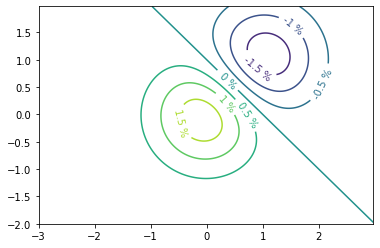

In [57]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'


class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'

ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
plt.show()